<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Differential Geometry**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.2.0


![geometry](https://raw.githubusercontent.com/deltorobarba/repo/master/geometry_header.png)

## **Variationsrechnung**

https://youtu.be/KpLno70oYHE

https://youtu.be/VCHFCXgYdvY

#### **Geometrie**

http://www.joergresag.privat.t-online.de/mybk2htm/chap514.htm

In jeder Geometrie interessiert man sich für diejenigen **Transformationen, die bestimmte Eigenschaften nicht zerstören** (also ihre **Automorphismen**): Zum Beispiel ändern weder eine Parallelverschiebung noch eine Drehung oder Spiegelung in einer zweidimensionalen euklidischen Geometrie die Abstände von Punkten. Umgekehrt ist jede Transformation, die die Abstände von Punkten nicht ändert, eine Zusammensetzung von Parallelverschiebungen, Drehungen und Spiegelungen. Man sagt, dass diese Abbildungen die **Transformationsgruppe** bilden, die zu einer ebenen euklidischen Geometrie gehört, und dass der Abstand zweier Punkte eine euklidische **Invariante** darstellt.

**Typen an Geometrien**

https://de.m.wikipedia.org/wiki/Analytische_Geometrie

* [Projektive Geometrie](https://de.wikipedia.org/wiki/Projektive_Geometrie) und [Affine Geometrie](https://de.wikipedia.org/wiki/Affine_Geometrie): Solche Geometrien bestehen meist aus Punkten und Geraden, und die Axiome betreffen Verbindungsgeraden von Punkten und die Schnittpunkte von Geraden. Affine und projektive Geometrien kommen meist in Paaren: Das Hinzufügen von Fernelementen macht eine affine Geometrie zu einer projektiven, und das Entfernen einer Geraden bzw. einer Ebene mit ihren Punkten macht aus einer zwei- bzw. dreidimensionalen projektiven Geometrie eine affine. In wichtigen Fällen können die Punkte auf einer Geraden in der affinen Geometrie so angeordnet werden, dass sich Halbgeraden und Strecken definieren lassen. In diesen Fällen nennt man die affine Geometrie und ihren projektiven Abschluss 'angeordnet'.

  * [Projektiver_Raum](https://de.wikipedia.org/wiki/Projektiver_Raum)

  * [Affiner_Raum](https://de.wikipedia.org/wiki/Affiner_Raum)

* [Euklidische Geometrie](https://de.wikipedia.org/wiki/Euklidische_Geometrie): Darunter versteht man üblicherweise die aus den Axiomen und Postulaten Euklids abgeleitete Geometrie. Weil der seit Euklid überlieferte Aufbau der Theorie noch Lücken enthielt, hat David Hilbert in seinen Grundlagen der Geometrie (1899 und viele weitere Auflagen) ein Axiomensystem aufgestellt, aus dem er die euklidische Geometrie bis auf Isomorphie eindeutig aufbauen konnte. Danach kann diese eindeutig beschrieben werden als der dreidimensionale reelle Vektorraum, in dem die Punkte durch die Vektoren dargestellt werden und die Geraden durch die Nebenklassen der eindimensionalen Unterräume. Strecken, Senkrechtstehen, Winkel usw. werden wie in der seit Descartes üblichen analytischen Geometrie erklärt.

  * [Euklidischer_Raum](https://de.wikipedia.org/wiki/Euklidischer_Raum)

* [Nichteuklidische Geometrie](https://de.wikipedia.org/wiki/Nichteuklidische_Geometrie): Geometrien, deren Eigenschaften in vielem analog zur euklidischen Geometrie sind, in denen jedoch das Parallelenpostulat (auch Parallelenaxiom genannt) nicht gilt. Man unterscheidet elliptische und hyperbolische Geometrien.

* [Absolute Geometrie](https://de.wikipedia.org/wiki/Absolute_Geometrie): ist der gemeinsame Unterbau der euklidischen und der nichteuklidischen Geometrien, d. h. die Menge aller Sätze, die ohne das Parallelenpostulat bewiesen werden.

* [Synthetische Geometrie](https://de.wikipedia.org/wiki/Synthetische_Geometrie) führt den klassischen Ansatz der „reinen“ Geometrie fort, indem anstelle algebraischer Objekte (Koordinaten, Morphismen …) abstrakte geometrische Objekte (Punkte, Geraden) und deren Beziehungen (Schnitt, Parallelität, Orthogonalität …) zugrunde gelegt werden. Die Inzidenzstruktur gehört hier heute zu den allgemeinsten Ansätzen. Beispiele von nicht linearen Inzidenzstrukturen sind die Benz-Ebenen.


**Grundlegende Sätze**

https://de.wikipedia.org/wiki/Satz_des_Pythagoras

https://de.wikipedia.org/wiki/Kosinussatz

https://de.wikipedia.org/wiki/Trigonometrischer_Pythagoras

Zusatzlich siehe auch [Zentralprojektion](https://de.wikipedia.org/wiki/Zentralprojektion) und [Zykloide](https://de.wikipedia.org/wiki/Zykloide)

**Differentialgeometrie**

Die [Differentialgeometrie](https://de.wikipedia.org/wiki/Differentialgeometrie) stellt die Synthese von Analysis und Geometrie dar.

#### **Gegenstand der Variationsrechnung**

**Variation**

![cc](https://upload.wikimedia.org/wikipedia/commons/1/10/Total_variation.gif)

*As the green ball travels on the graph of the given function, the length of the path travelled by that ball's projection on the y-axis, shown as a red ball, is the total variation of the function.*

* the [total variation](https://en.wikipedia.org/wiki/Total_variation) identifies several slightly different concepts, related to the (local or global) structure of the codomain of a function or a measure. For a real-valued continuous function f, defined on an interval [a, b] ⊂ ℝ, its total variation on the interval of definition is a measure of the one-dimensional [arclength](https://en.wikipedia.org/wiki/Arc_length) of the curve with parametric equation x ↦ f(x), for x ∈ [a, b].

* In der Variationsrechnung und der Theorie der stochastischen Prozesse ist die [Variation](https://de.wikipedia.org/wiki/Variation_(Mathematik)) (auch totale Variation genannt) einer Funktion **ein Maß für das lokale Schwingungsverhalten der Funktion**. 

* Bei den stochastischen Prozessen ist die Variation von besonderer Bedeutung, da sie die Klasse der zeitstetigen Prozesse in zwei fundamental verschiedene Unterklassen unterteilt: jene mit endlicher und solche mit unendlicher Variation.

Die [erste Variation](https://de.wikipedia.org/wiki/Erste_Variation) ist eine verallgemeinerte Richtungsableitung eines Funktionals. Ihre Eigenschaften sind in der angewandten Mathematik und der theoretischen Physik relevant. Die erste Variation spielt eine zentrale Rolle in der Variationsrechnung und wird in der analytischen Mechanik genutzt. Ein verwandtes Konzept ist die Funktionalableitung.

In der Analysis ist eine Funktion von [beschränkter Variation](https://de.wikipedia.org/wiki/Beschränkte_Variation) (beschränkter Schwankung), wenn ihre totale Variation (totale Schwankung) endlich ist, sie also in gewisser Weise nicht beliebig stark oszilliert. Diese Begriffe hängen eng mit der Stetigkeit und der Integrierbarkeit von Funktionen zusammen.

**Variational Principle**

* a [variational principle](https://en.wikipedia.org/wiki/Variational_principle) is one that enables a problem to be solved using calculus of variations, which concerns finding such functions which optimize the values of quantities that depend upon those functions. 

* For example, the problem of determining the shape of a hanging chain suspended at both ends—a catenary—can be solved using variational calculus, and in this case, the variational principle is the following: The solution is a function that minimizes the gravitational potential energy of the chain.

* Any physical law which can be expressed as a variational principle describes a **self-adjoint operator.** These expressions are also called Hermitian. Such an expression describes an invariant under a Hermitian transformation.

**Variationsrechnung**



* **Find [stationary points](https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/core-mathematics/calculus/stationary-points.html) (=derivative is zero, local minima or maxima) of a functional, like an integral I[f] (=here for example the path lenghts, or time spent travelling) is minimal between two points a and b.**

  * A stationary point of a function $f(x)$ is a point where the derivative of $f(x)$ is equal to 0 . 
  * These points are called "stationary" because at these points the function is neither increasing nor decreasing. 
  * Graphically, this corresponds to points on the graph of $f(x)$ where the tangent to the curve is a horizontal line.
 * The stationary points of a function $y=f(x)$ are the solutions to $
\frac{d y}{d x}=0 $. This repeats in mathematical notation the definition given above: "points where the gradient of the function is zero".

* **The integral is a functional (=function of functions), its stationary point is a fix point / minima of a functional (not function). Solve (usually differential) equations for stationary function f(x) (via calculus of variations)**

* from regular calculus to calculus of variations: find stationary functions, not only stationary points, a function becomes a functional.

* **Typical problem in variational calculus: find minimal path between points A and B, not necessarily a linear one (in physics for examples check Brachistochrone !)**. 

* Also consider that velocity depending on position changes the minimum paths or time to travel (later in vector analysis relevant for Kurvenintegral)

In general, Calculus of variations seeks to find y = f(x) such that this integral:

> $I[f]=\int_{x_{1}}^{x_{2}} F\left(x, y, \frac{d y}{d x}\right) d x$

is stationary (ps: $\frac{d y}{d x}$ = $y'$)

https://www.youtube.com/watch?v=6HeQc7CSkZs&list=PLdgVBOaXkb9CD8igcUr9Fmn5WXLpE8ZE_

https://www.youtube.com/playlist?list=PLdgVBOaXkb9CD8igcUr9Fmn5WXLpE8ZE_

1. Die [Variationsrechnung](https://de.wikipedia.org/wiki/Variationsrechnung) ist eine **Erweiterung der Funktionalanalysis und beschaeftigt sich mit <u>nichtlinearen Funktionalen</u>** (in der Funktionalanalysis sind es linear Funktionale)

2. The [calculus of variations](https://en.m.wikipedia.org/wiki/Calculus_of_variations) is a field that **uses variations, which are small changes in functions and functionals, to find maxima and minima of functionals**: mappings from a set of functions to the real numbers. Functionals are often expressed as definite integrals involving functions and their derivatives. <u>**Functions that maximize or minimize functionals may be found using the Euler–Lagrange equation of the calculus of variations.**</u>

* In calculus of variations we are **NOT concerned with finding fix points of functions (like local maxima in a function), but rather fix points of functionals.**


* dann führt eine Variation der Wirkung: https://de.m.wikipedia.org/wiki/Feldtheorie_(Physik)#Formalismus

* Beispiel: https://de.wikipedia.org/wiki/Fluiddynamik

* Martin: formulier problem in variationelle formulierung (dann bist du in sobolove räume), und dann Eigenschaften von Testfunktionen ausnutzen

**Variation der Elemente**

* die [Variation der Elemente](https://de.wikipedia.org/wiki/Variation_der_Elemente) ist eine im 19. Jahrhundert entwickelte Methode zur genauen Bahnbestimmung von Himmelskörpern. Sie dient bis heute zur Modellierung von [Bahnstörungen](https://de.wikipedia.org/wiki/Bahnstörung).

**Brachistochrone & Tautochronie**

https://www.youtube.com/watch?v=zYOAUG8PxyM

* Brachistochrone: Path between 2 points $A$ and $B$ which minimizes the time taken by a particle falling from $A$ to $B$ under the influence of gravity.

* Time = distance / speed. Goal: Mix of minimize distance and maximize speed

* Johann I Bernoulli hat sich mit dem **Problem des schnellsten Falles** beschäftigt. Im Jahre 1696 fand er schließlich die Lösung in der **Brachistochrone**. Heute sieht man dies oft als die **Geburtsstunde der Variationsrechnung**.

[**Brachistochrone Curve**](https://en.wikipedia.org/wiki/Brachistochrone_curve) (in rot): Der Körper gleitet auf einer solchen Bahn schneller zum Ziel als auf jeder anderen Bahn, beispielsweise auf einer geradlinigen, obwohl diese kürzer ist.


![vv](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

**Tautochronie** der Brachistochrone – von jedem Startpunkt auf der Kurve erreichen die Kugeln das „Ziel“ gleichzeitig.

![ff](https://upload.wikimedia.org/wikipedia/commons/b/bd/Tautochrone_curve.gif)

**Gâteaux-Differential**

* [Gâteaux-Differential](https://de.wikipedia.org/wiki/Gâteaux-Differential) ist eine **Verallgemeinerung des gewöhnlichen Differentiationsbegriffes** dar, indem es die Richtungsableitung auch in unendlichdimensionalen Räumen definiert.

#### **Principle of Stationary Action & Hamilton'sches Prinzip**

![ff](https://raw.githubusercontent.com/deltorobarba/repo/master/lagrange_01.png)

![ff](https://raw.githubusercontent.com/deltorobarba/repo/master/lagrange_02.png)

* Total energy = kinetic energy - potential energy.

* Kinetic - potential energy = Lagrangian $L$

* Kinetic energy depends on velocity of a particle (detonated with a dot over x,y,z), potential energy depends on position of a particle x,y,z. Hence the Lagrangian of a particle depends on all of the positions and all of their time derivatives. 

* **Use and solve the three Lagrangian equations in order to determine the equation of motion of a particle (and Lagrange equations are equivalent to Newton's second law)**

* And they can easily applied to other coordinate systems than cartesian (i.e cylindric, or spherical)

* Also: **Lagrange equations are very similar to Euler-Lagrange Equations!**

* Because the three Lagrange equations very strongly resemble the Euler-Lagrange-equation, there must be some functional that's being made stationary by Lagrange equations

* **$S$ is the action integral (= a functional!)**



[The Principle of Stationary Action](https://www.youtube.com/watch?v=M05ixbSOY80): If a particle/system $P$ travels from one point to another in the time interval $\left[t_{1}, t_{2}\right]$, the path the particle traverses is such that this function:

> $
S=\int_{t_{1}}^{t_{2}} \mathcal{L} \text { dt}$

is stationary. 

$L$ is the Lagrangian of the particle: $L=E_{u}-U$. 

Need to solve Lagrange equations to make $S$ stationary:

$\frac{\partial L}{\partial q_{1}}=\frac{d}{d t}\left(\frac{\partial L}{\partial \dot{q}_{1}}\right), \frac{\partial L}{\partial q_{2}}=\frac{d}{d t}\left(\frac{\partial L}{\partial \dot{q}_{2}}\right), \frac{\partial L}{\partial q_{3}}=\frac{d}{d t}\left(\frac{\partial L}{\partial \dot{q}_{3}}\right) \quad \begin{array}{c}\\ \end{array}$

We can use a general coordinate system:
$\\ {\left[q_{1}(t), q_{2}(t), q_{3}(t)\right]}$

**Hamilton'sches Prinzip (Wirkungsfunktional)**

> Das [Hamilton'sche Prinzip](https://de.wikipedia.org/wiki/Hamiltonsches_Prinzip) zeichnet tatsachlich durchlaufene Bahnen dadurch aus, **dass bei ihnen die Wirkung (=Funktional) S[q] (verglichen mit anderen Bahnen) ein Minimum annimmt (minimal variation ??)**.

* Das Hamiltonsche Prinzip der Theoretischen Mechanik ist ein **Extremalprinzip**. Physikalische Felder und Teilchen nehmen danach für eine bestimmte Größe einen extremalen (d. h. größten oder kleinsten) Wert an. Diese Bewertung nennt man Wirkung, mathematisch ist die Wirkung ein Funktional, daher auch die Bezeichnung **Wirkungsfunktional**.

* Die Wirkung erweist sich in vielen Fällen nicht als minimal, sondern nur als **„stationär“** (d. h. extremal). Deshalb wird das Prinzip von manchen Lehrbuchautoren auch das Prinzip der **stationären Wirkung** genannt. Manche Autoren nennen das Hamiltonsche Prinzip auch **'Prinzip der kleinsten Wirkung'**, was jedoch – wie oben ausgeführt – nicht präzise ist.

* Hamilton's principle states that the true evolution of a physical system is a solution of the functional equation:

> $\frac{\delta \mathcal{S}}{\delta \mathbf{q}(t)}=0$

* That is, the system takes a path in configuration space for which the action is stationary, with fixed boundary conditions at the beginning and the end of the path.

![ff](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Least_action_principle.svg/500px-Least_action_principle.svg.png)

*As the system evolves, q traces a path through configuration space (only some are shown). The path taken by the system (red) has a stationary action (δS = 0) under small changes in the configuration of the system (δq).*

Richard Feynman zeigte in den 1940ern, dass sich das Hamiltonsche Prinzip in der Quantenfeldtheorie gerade dadurch ergibt, dass alle möglichen Pfade (auch die nicht zielgerichteten) zulässig sind und aufintegriert werden. Dabei überlagern sich Pfade mit extremaler Wirkung konstruktiv und davon abweichende destruktiv, so dass die Natur schließlich zielgerichtet erscheint.

#### **Langrange Formalismus (Lagrange Equation)**

Eingeführte Formulierung der klassischen Mechanik, in der die Dynamik eines Systems durch **eine einzige skalare Funktion, die Lagrange-Funktion**, beschrieben wird. Der Formalismus ist (im Gegensatz zu der newtonschen Mechanik, die a priori nur in Inertialsystemen gilt) auch in beschleunigten Bezugssystemen gültig. Der Lagrange-Formalismus ist invariant gegen Koordinatentransformationen.

Der [Langrange Formalismus](https://de.wikipedia.org/wiki/Lagrange-Formalismus) ist eine mögliche (von vielen!) Formulierung der klassischen Mechanik. Hier wird die Dynamik eines Systems durch die Langrange-Funktion L(${\boldsymbol{q}}$, $\dot{\boldsymbol{q}}$, $t$) beschrieben:

* ${\boldsymbol{q}}$ = (q1, q2, ..., qw) - allgemeine Koordinaten im Raum
* $\dot{\boldsymbol{q}}$ = (d / dt) q ... ($\dot{\boldsymbol{q}}$1, $\dot{\boldsymbol{q}}$2.. $\dot{\boldsymbol{q}}$n) - Vektor der Wirkung (allgemeine Geschwindigkeiten)
* $t$ - Zeit (Die explizite Zeitabhängige berücksichtigt externe, zeitabhängige Faktoren (z.B. Magnet-Felder etc). Wird auf Null gesetzt, denn bei einem Wechsel in die mikroskopische Theorie verschwindet die Zeit)

> $L_{x}(q, \dot{q}, t)$ wird zu: $L_{x}(q, \dot{q})$ = $T$<sub>kin</sub> - $V$<sub>pot</sub>

https://www.youtube.com/watch?v=V8CR4GVg5Io&t=301s

https://www.youtube.com/watch?v=EceVJJGAFFI

**Fluiddynamik**

Im Allgemeinen wird die Bewegung eines Fluids durch die Navier-Stokes-Gleichungen beschrieben. Im Falle kleiner Viskosität und damit hoher Reynolds-Zahl können Reibungseffekte vernachlässigt werden und als Bewegungsgleichung des Fluids gilt in guter Näherung die Euler-Gleichung:

> formel hier

Diese setzt die Geschwindigkeitsänderung des Fluids an einem Ort mit dem in der Umgebung herrschenden Druck 
p
p in Verbindung. Häufig wird die Euler-Gleichung für die Berechnung bewegter Gase verwendet, während bei der Berechnung bewegter Flüssigkeiten meist die Navier-Stokes-Gleichungen verwendet werden.

https://de.m.wikipedia.org/wiki/Fluiddynamik

#### **Euler–Lagrange Equation**

The Euler–Lagrange equation is an equation satisfied by a function q of a real argument t, which is a stationary point of the functional:

> $S(\boldsymbol{q})=\int_{a}^{b} L(t, \boldsymbol{q}(t), \dot{\boldsymbol{q}}(t)) \mathrm{d} t$

* ${\boldsymbol{q}}$ - Koordinaten im Raum
* $\dot{\boldsymbol{q}}$ - Vektor der Wirkung
* t - Zeit (wird auf Null gesetzt, den bei einem Wechsel in die mikroskopische Theorie verschwindet die Zeit)

The Euler–Lagrange equation, then, is given by

> $L_{x}(t, q(t), \dot{q}(t))-\frac{\mathrm{d}}{\mathrm{d} t} L_{v}(t, q(t), \dot{q}(t))=0$

* partial derivative of one dimension, then second dimension and then time

Youtube: [Derivation of the Euler-Lagrange Equation](https://www.youtube.com/watch?v=sFqp2lCEvwM&list=PLdgVBOaXkb9CD8igcUr9Fmn5WXLpE8ZE_&index=2)

https://www.youtube.com/watch?v=V0wx0JBEgZc

* the [Euler equation](https://en.m.wikipedia.org/wiki/Euler–Lagrange_equation) is a **second-order partial differential** equation whose **solutions are the functions for which a given functional is stationary**.

* Because **a differentiable functional is stationary at its local extrema**, the Euler–Lagrange equation is useful for solving optimization problems in which, given some functional, one seeks the function minimizing or maximizing it. 

* This is analogous to [Fermat's theorem](https://en.m.wikipedia.org/wiki/Fermat%27s_theorem_(stationary_points)) in calculus, stating that at any point where a differentiable function attains a local extremum its derivative is zero.

* In Lagrangian mechanics, according to [Hamilton's principle](https://en.m.wikipedia.org/wiki/Hamilton%27s_principle) of stationary action, the evolution of a physical system is described by the solutions to the Euler equation for the action of the system. In this context Euler equations are usually called Lagrange equations. In classical mechanics, it is equivalent to Newton's laws of motion, but it has the advantage that it takes the same form in any system of generalized coordinates, and it is better suited to generalizations.

  * Hamilton's principle is William Rowan Hamilton's formulation of the [principle of stationary action](https://en.m.wikipedia.org/wiki/Principle_of_least_action) (also called: 'Principle of least action'). It states that the **dynamics of a physical system are determined by a variational problem for a functional based on a single function**, the Lagrangian, which may contain all physical information concerning the system and the forces acting on it. The variational problem is equivalent to and allows for the derivation of the differential equations of motion of the physical system


https://de.wikipedia.org/wiki/Variationsrechnung#Euler-Lagrange-Gleichung;_Variationsableitung;_weitere_notwendige_bzw._hinreichende_Bedingungen

#### **Fundamentallemma & -satz**

**Fundamentallemma der Variationsrechnung**

https://de.wikipedia.org/wiki/Fundamentallemma_der_Variationsrechnung

**Fundamentalsatz der Variationsrechnung**

* Fundamental Theorem of the Calculus of Variations - [Fundamentalsatz der Variationsrechnung](https://de.wikipedia.org/wiki/Fundamentalsatz_der_Variationsrechnung)

* eng verwandt mit dem [weierstraßschen Satz vom Minimum](https://de.wikipedia.org/wiki/Satz_vom_Minimum_und_Maximum)

* Er behandelt die in der Variationsrechnung zentrale Frage, unter welchen Bedingungen reellwertige Funktionale ein Minimum annehmen.

## **Vektoranalysis**

#### **Grundbegriffe**

https://youtube.com/playlist?list=PLBh2i93oe2quqhn4TZjMnBM2v7lG5QhDD

* Die [Vektoranalysis](https://de.m.wikipedia.org/wiki/Vektoranalysis) ist ein **Teilgebiet der Tensoranalysis**, beschäftigt sich hauptsächlich mit **Vektorfeldern in zwei oder mehr Dimensionen** 

* Die Vektoranalysis **verallgemeinert die Differential- und der Integralrechnung** (z.B. werden Verzerrungen auf Oberflachen bei der Integration berucksichtigt, oder Stroemungen bei Wegen)

* Betrachtet werden **Vektorfelder**, die jedem Punkt des Raumes einen Vektor zuordnen, und **Skalarfelder**, die jedem Punkt des Raumes einen Skalar zuordnen.

*  Die Temperatur eines Swimmingpools ist ein Skalarfeld: Jedem Punkt wird der Skalarwert seiner Temperatur zugeordnet. Die Wasserbewegung entspricht dagegen einem Vektorfeld, da jedem Punkt ein Geschwindigkeitsvektor zugeordnet wird, der Betrag und Richtung hat.

https://de.m.wikipedia.org/wiki/Polarkoordinaten#Vektoranalysis

* **Kurven** in $\mathbb{R}^{2}$ oder $\mathbb{R}^{3}$: Wege bzw. **parametrisierte** Kurven in $\mathbb{R}^{n}$ sind **stetige** Abbildungen $\gamma$ [a, b] -> $\mathbb{R}^{n}$

* **Reguläre Wege** bzw. Kurven: **stetig + differenzierbar** und Norm der Ableitung ist die Summe der Komponenten: $\|\dot{\gamma}(t)\|^{2}=\left|\dot{\gamma}_{1}(t)\right|^{2}+\left|\dot{\gamma}_{2}(t)\right|^{2}+\left|\dot{\gamma}_{3}(t)\right|^{2} \neq 0$ fur alle t $\in$ [a,b]. Bedeutet auch: es gibt uberall einen Tangentialvektor.

* **Bogenlänge** (Länge der Kurve / [Arc Length](https://en.wikipedia.org/wiki/Arc_length)): Integration der Geschwindigkeitsvektoren in der Norm: $L[\gamma]=\int_{a}^{b}\|\dot{\gamma}(t)\| d t$

* **Tangentialvektor**: Ableitung / Geschwindigkeitsvektor an einem Punkt, der in eine Richtung zeigt, der tangential zur Kurve zeigt. Den Vektor normiert man (dividiert durch Norm): $T_{\gamma}(t):=\frac{\dot{\gamma}(t)}{\|\dot{\gamma}(t)\|}$

* **Normalenvektor**: nur definiert in einer Ebene, also in R2. Sollte senkrecht auf der Kurve / senkrecht auf dem Tangentialvektor stehen (man muss also diesen Punkt $\dot{\gamma}(t)=\left(\begin{array}{l}\dot{\gamma}_{1}(t) \\ \dot{\gamma}_{2}(t)\end{array}\right)$ um 90 Grad drehen, damit er senkrech steht): $N_{\gamma}(t):=\frac{1}{\|\dot{\gamma}(t)\|}\left(\begin{array}{c}-\dot{\gamma}_{2}(t) \\ \dot{\gamma}_{2}(t)\end{array}\right)$. 

* **Die Norm im Normalenvektor (Jacobi-Determinante) gibt zB die Kruemmung / Verzerrung einer Flaeche an, die bei der Integration beruecksichtigt werden muss.**

* Eine [**vektorielle Größe**](https://de.wikipedia.org/wiki/Vektorielle_Größe) oder gerichtete Größe ist eine physikalische Größe, die – im Gegensatz zu den skalaren Größen – einen Richtungscharakter hat. 
  * Typische vektorielle Größen sind die kinematischen Größen Geschwindigkeit und Beschleunigung, die dynamischen Größen Impuls und Kraft bzw. Drehimpuls und Drehmoment sowie die Feldstärken der elektrischen und magnetischen Felder der Elektrodynamik. 
  * Vektorielle Größen werden sowohl zeichnerisch als auch rechnerisch wie geometrische Vektoren behandelt, wobei einige Besonderheiten zu beachten sind.

**Beispielaufgabe in der Vektoranalysis**

* Betrachten Sie die folgende parametrisierte Kurve: $
\gamma:[0, \infty) \rightarrow \mathbb{R}^{2}, \quad \gamma(t)=\left(\begin{array}{c}
t \cos (t) \\
t \sin (t)
\end{array}\right)
$

  * (a) Skizzieren Sie die Kurve, d. h. das Bild der Abbildung.

  * (b) Handelt es sich um einen regulären Weg?

  * (c) Geben Sie Tangenteneinheitsvektor und Normaleneinheitsvektor für jeden Punkt an.

#### **Felder (Skalar, Vektor, Gradient)**

**Skalarfeld**

* In der mehrdimensionalen Analysis, der Vektorrechnung und der Differentialgeometrie ist ein [skalares Feld (kurz Skalarfeld)](https://de.wikipedia.org/wiki/Skalarfeld) $\varphi$ **eine Funktion, die jedem Punkt eines Raumes eine reelle Zahl (Skalar) zuordnet**, z. B. eine Temperatur, Luftdruck.

* Wichtige Operationen im Zusammenhang mit Skalarfeldern sind: 

  * **[Gradient](https://de.wikipedia.org/wiki/Gradient_(Mathematik)) eines Skalarfeldes, der ein Vektorfeld ist**.

  * [Richtungsableitung](https://de.wikipedia.org/wiki/Richtungsableitung) eines Skalarfeldes: die Richtungsableitung einer von mehreren Variablen abhängigen Funktion ist die **momentane Änderungsrate dieser Funktion in einer durch einen Vektor vorgegebenen Richtung**. (Eine Verallgemeinerung der Richtungsableitung auf unendlichdimensionale Räume ist das [Gâteaux-Differential](https://de.m.wikipedia.org/wiki/G%C3%A2teaux-Differential).)
  * Ein Skalarfeld ist das einfachste [Tensorfeld](https://de.m.wikipedia.org/wiki/Tensorfeld).

* Skalarfelder sind von großer Bedeutung in der Feldbeschreibung der Physik und in der mehrdimensionalen Vektoranalysis.

* Man unterscheidet dabei zwischen **reellwertigen** Skalarfeldern $\varphi\colon M\to \mathbb {R}$ und **komplexwertigen** Skalarfeldern $\displaystyle \varphi \colon M\to \mathbb {C} $.

* Man spricht von einem **stationären Skalarfeld**, wenn die Funktionswerte nur vom Ort abhängen. Hängen sie auch von der Zeit ab, handelt es sich um ein **instationäres Skalarfeld**.

* Beispiele für Skalarfelder in der Physik sind der Luftdruck, die Temperatur, Dichte oder allgemein **Potentiale (= Skalarpotentiale)**.

* Im Gegensatz zum Skalarfeld ordnet ein Vektorfeld jedem Punkt einen Vektor zu. Ein Skalarfeld ist das einfachste Tensorfeld

**Vektorfeld**

**Der Gradient eines Skalarfeldes ist ein Vektorfeld (zB: Skalar ist die Temperatur in einem Pool, und Temperaturveranderung uber Zeit ist die erste Ableitung dessen und dann ein Vektorfeld), und die zweite Ableitung ist die Beschleunigung der Temperaturveranderung.**

* In der mehrdimensionalen Analysis und der Differentialgeometrie ist ein [Vektorfeld](https://de.m.wikipedia.org/wiki/Vektorfeld) eine Funktion, die jedem Punkt eines Raumes einen Vektor zuordnet.

* Eine Abbildung $V: D \rightarrow \mathbb{R}^{n}, D \subseteq \mathbb{R}^{n}$ mit n = 1,2,3..

* Die Temperatur eines Swimmingpools ist ein Skalarfeld: Jedem Punkt wird der Skalarwert seiner Temperatur zugeordnet. Die Wasserbewegung entspricht dagegen einem Vektorfeld, da jedem Punkt ein Geschwindigkeitsvektor zugeordnet wird, der Betrag und Richtung hat.

* Meist sind Vektorfelder stetig differenzierbar = Komponenten sind stetig differenzierbar, zB Vektor $v1$ mit (x,y,z) und ihren drei Ableitungen als Komponente des Vektorfeldes $V$

* Das duale Konzept zu einem Vektorfeld ist eine Funktion, die jedem Punkt eine [Linearform](https://de.m.wikipedia.org/wiki/Linearform), [zB [stetige lineare Funktionale](https://de.m.wikipedia.org/wiki/Funktional#Stetige_lineare_Funktionale)] zuordnet, eine solche Abbildung wird [pfaffsche Form](https://de.m.wikipedia.org/wiki/Pfaffsche_Form) (One-Form) genannt. (Pfaffsche Formen sind die natürlichen Integranden für Wegintegrale.)

*Beispiele von Vektorfeldern*

**Gradientenfeld**: Ist $f: \Omega \rightarrow \mathbb{R}$ eine differenzierbare Funktion auf einer offenen Menge $\Omega \subset \mathbb{R}^{n},$ so wird das Gradientenfeld grad $f: \Omega \rightarrow \mathbb{R}^{n}$ von $f$ definiert durch die Zuordnung

>$
x \mapsto \operatorname{grad} f(x)=\left(\frac{\partial f}{\partial x_{1}}(x), \ldots, \frac{\partial f}{\partial x_{n}}(x)\right)
$

Oft schreibt man es mit dem Nabla-Symbol: grad $f=\nabla f$. **Ist ein Vektorfeld $v$ das Gradientenfeld einer Funktion $f$ (=Skalarfeld ist abgeleitet nach Ort), das heißt $v=\nabla f,$ so bezeichnet man $f$ als Potential**. Man sagt auch $v$ besitzt ein Potential. Beispiele von Gradientenfeldern sind das von einer Punktquelle nach allen Seiten
gleichmäßig fließende Feld einer Strömung und das elektrische Feld um eine Punktladung.

**Zentralfelder**: Sei $I$ ein Intervall, welches die Null enthält, und $K(I)=\left\{x \in \mathbb{R}^{n}:\|x\| \in I\right\} \subset \mathbb{R}^{n}$ eine Kugelschale. Zentralfelder auf der Kugelschale sind definiert durch $v(x)=a(\|x\|) \cdot x$ mit $a: I \rightarrow \mathbb{R}$. In $\mathbb{R}^{3} \backslash\{0\}$ ist das **Gravitationsfeld** $v(x)=-\frac{x}{\|x\|^{3}}$ ein solches Zentralfeld.


Weitere Beispiele sind im $\mathbb{R}^{3}$ die mathematisch diffizileren sogenannten **"Wirbelfelder"**. Sie lassen sich als Rotation eines Vektorpotentials A beschreiben, nach der Formel $\mathbf{v}(\mathbf{r})=\operatorname{rot} \mathbf{A}(\mathbf{s} . \mathbf{u}) .$
Prägnantes Beispiel eines Wirbelfeldes ist das in Kreislinien um den
Ausfluss einer , Badewanne" herumwirbelnde Strömungsfeld, oder das Magnetfeld um einen stromdurchflossenen Draht.

*Konservatives bzw. wirbelfreies Vektorfeld*

* In Physik sind conservative forces jene, wo es keine Friktion, Air resistance etc. gibt

* Vektorfelder, die Gradienten eines Skalarfelds sind, werden in Anlehnung an den Begriff des „konservativen Kraftfelds“ oft auch als konservative Vektorfelder bezeichnet (siehe Eigenschaften unten unter Gradientenfeld)

* Als [wirbelfrei bzw. konservativ](https://de.wikipedia.org/wiki/Wirbelfreies_Vektorfeld) wird in der Physik und Potentialtheorie ein Vektorfeld $\vec{X}(\vec{r})$ bezeichnet, in dem das **Kurvenintegral** $
\oint_{S} \vec{X}(\vec{r}) \cdot \mathrm{d} \vec{s}=0$ für beliebige in sich geschlossene Randkurven $S$ stets den Wert null liefert. 

* Deutet man $\vec{X}(\vec{r})$ als Kraftfeld, so ist das Kurvenintegral die gesamte längs der Randkurve $S$ gegen die Kraft $\vec{X}(\vec{r})$ verrichtete Arbeit.

* Wirbelfrei sind z. B. das ruhende elektrische Feld in der Elektrostatik und das Gravitationsfeld, aber auch Felder wie das Geschwindigkeitsfeld einer Potentialströmung.

> Ist $\vec{X}(\vec{r})$ wirbelfrei, dann gilt: $\operatorname{rot} \vec{X}(\vec{r})=\overrightarrow{0}$
d. h. die Rotation des Vektorfeldes ist gleich null. 

* Ist der Definitionsbereich einfach **zusammenhängend, so gilt auch die Umkehrung**.

> Wirbelfreie Vektorfelder lassen sich stets als **Gradient eines zugrundeliegenden skalaren Felds** $\Phi(\vec{r})$ formulieren (siehe Gradientenfeld): $
\vec{X}(\vec{r})=\operatorname{grad} \Phi(\vec{r})=\vec{\nabla} \Phi(\vec{r})
$

* Daraus folgt, dass für das skalare Feld $\Phi$ gilt: 
$\operatorname{rot}(\operatorname{grad} \Phi(\vec{r}))=\overrightarrow{0}$ (**siehe auch unten auch Gradientfeld & Skalarpotenzial**)

*Quellenfreie und wirbelfreie Vektorfelder; Zerlegungssatz*

Ein mindestens **zweimal stetig differenzierbares Vektorfeld** $\mathbf{v}(\mathbf{r})$ im $\mathbb{R}^{3}$ heißt quellenfrei (beziehungsweise wirbelfrel), wenn seine **Quellendichte (Divergenz) beziehungsweise Wirbeldichte (Rotation) dort überall Null ist**. Unter der weiteren
Voraussetzung, dass die Komponenten von $\mathbf{v}$ im Unendlichen hinreichend rasch verschwinden, gilt der sogenannte Zerlegungssatz: Jedes Vektorfeld $\mathbf{v}(\mathbf{r})$ ist
eindeutig durch seine Quellen bzw. Wirbel bestimmt, und zwar gilt die folgende
Zerlegung in einen wirbelfreien beziehungsweise quellenfreien Anteil:

> $
\mathbf{v}(\mathbf{r}) \equiv-\operatorname{grad}_{\mathbf{r}} \int_{\mathbb{R}^{3}} d^{3} \mathbf{r}^{\prime} \frac{\operatorname{div}^{\prime} \mathbf{v}\left(\mathbf{r}^{\prime}\right)}{4 \pi\left|\mathbf{r}-\mathbf{r}^{\prime}\right|}+\operatorname{rot}_{\mathbf{r}} \int_{\mathbb{R}^{3}} d^{3} \mathbf{r}^{\prime} \frac{\operatorname{rot}^{\prime} \mathbf{v}\left(\mathbf{r}^{\prime}\right)}{4 \pi\left|\mathbf{r}-\mathbf{r}^{\prime}\right|}
$

Dies entspricht der Zerlegung eines statischen elektromagnetischen Feldes in den elektrischen beziehungsweise magnetischen Anteil (siehe Elektrodynamik). Es sind also genau die Gradientenfelder (d. h. die , elektrischen Feldkomponenten") wirbelfrei bzw. genau die Wirbelfelder (d. h. die ,magnetischen Feldkomponenten") quellenfrei. Dabei sind grad $\phi(\mathbf{r}):=\nabla \phi,$ div $\mathbf{v}:=\nabla \cdot \mathbf{v}$ und rot $\mathbf{v}:=\nabla \times \mathbf{v}$ die bekannten, mit dem Nabla-Operator $(\nabla)$ der Vektoranalysis
gebildeten Operationen.

**Gradientenfeld**

* Ein [Gradientenfeld](https://de.wikipedia.org/wiki/Gradientenfeld) **ist ein Vektorfeld, das aus einem Skalarfeld durch Differentiation nach dem Ort abgeleitet wurde**, bzw. – kürzer formuliert – der Gradient des Skalarfelds (= **ein Skalarfeld, das nach dem Ort abgeleitet wird, ist ein Gradientenfeld**, mit Skalarpotenzial inkl. angegeben).

* Zur besseren Abgrenzung zwischen dem Gradienten als mathematischem Operator und dem Resultat seiner Anwendung bezeichnen manche Autoren die Vektoren, aus denen sich Gradientenfelder zusammensetzen, auch als Gradientvektoren, andere dagegen mit Blick auf die Potentiale, aus denen sie sich herleiten, als Potentialvektoren.

* Analog verwendet die überwiegende Zahl der Autoren den Begriff Potentialfeld nicht für das skalare Feld des Potentials selbst, sondern das sich aus ihm ableitende Gradientenfeld

> Ein Vektorfeld $\vec{F}: \vec{r} \mapsto \vec{F}(\vec{r})$ heißt Gradientenfeld, wenn es ein Skalarfeld $\Phi: \vec{r} \mapsto \Phi(\vec{r})$ gibt, so dass
$
\vec{F}(\vec{r})=\vec{\nabla} \Phi(\vec{r})
$

*  Dabei nennt man $\Phi$  das zu $F$ gehörige **Skalarpotential** oder einfach kurz das „Potential“ des Gradientenfelds 
${\vec {F}}$. (*Der Begriff darf jedoch nicht mit dem physikalischen Begriff des „Potentials“ verwechselt werden, mit dem die Fähigkeit eines konservativen Kraftfelds bezeichnet wird, einen dem Feld ausgesetzten Körper eine Arbeit verrichten zu lassen.*)

**Vektorfelder, die Gradienten eines Skalarfelds sind**, werden in Anlehnung an den Begriff des „konservativen Kraftfelds“ oft auch als **konservative Vektorfelder** bezeichnet - ihnen allen gemeinsam sind dabei die folgenden drei einander äquivalenten Eigenschaften:

1. **Wegunabhängigkeit des Kurvenintegrals**: Der Wert des Kurvenintegrals entlang einer beliebigen Kurve $S$ innerhalb des Feldes ist nur von ihrem Anfangs- und Endpunkt abhängig, nicht dagegen von ihrer Länge.

2. **Verschwinden des Ringintegrals für beliebige Randkurven** $S$ :
$
\oint_{S} \operatorname{grad} \Phi(\vec{r}) \mathrm{d} \vec{r}=\oint_{S} \vec{F}(\vec{r}) \mathrm{d} \vec{r}=0
$

3. **Generelle Rotationsfreiheit bzw. Wirbelfreiheit** des Feldes:
$\operatorname{rot}(\operatorname{grad} \Phi(\vec{r}))=\operatorname{rot} \vec{F}(\vec{r})=\vec{\nabla} \times \vec{F}(\vec{r})=\overrightarrow{0}$


#### **Potentiale (Skalar, Vektor)**

**Skalarpotential**

Das [Skalarpotential](https://de.wikipedia.org/wiki/Skalarpotential), oft einfach auch nur Potential genannt, ist in der Mathematik ein - im Unterschied zum Vektorpotential - skalares Feld $\Phi(\vec{r})$, dessen Gradient gemäß folgender Formel

> $
\vec{F}(\vec{r})=\operatorname{grad} \Phi(\vec{r})=\vec{\nabla} \Phi(\vec{r})
$

ein als "Gradientenfeld" genanntes Vektorfeld $\vec{F}(\vec{r})$ liefert. 

Kurz: **Die erste Ableitung des Skalarpotentials (= ein Skalarfeld) ergibt das Gradientenfeld (= ein spezielles Vektorfeld).**

* Ist $\vec{F}(\vec{r})$ ein **konservatives** Kraftfeld, in dem die Kraft $\vec{F}$ dem Prinzip des kleinsten Zwanges folgend stets der Richtung des maximalen Anstiegs des Potentials $\Phi$ entgegengerichtet ist, gilt alternativ die Definition
$
\vec{F}(\vec{r})=-\operatorname{grad} \Phi(\vec{r})=-\vec{\nabla} \Phi(\vec{r})
$

* Skalarpotentiale bilden u. a. die mathematische Grundlage der Untersuchung konservativer Kraftfelder wie des elektrischen und des Gravitationsfelds, aber auch von wirbelfreien sogenannten Potentialströmungen.

**Ein Skalarfeld $\Phi: \vec{r} \mapsto \Phi(\vec{r})$ ist genau dann ein Skalarpotential**, wenn es in einem einfach zusammenhängenden Gebiet

1. zweimal stetig differenzierbar ist, das heißt keine , Sprünge", Stufen oder andere
Unstetigkeitsstellen enthält;

2. zu ihm ein Vektorfeld $\vec{F}: \vec{r} \mapsto \vec{F}(\vec{r})$ existiert, so dass gilt:
$\vec{F}(\vec{r})=\operatorname{grad} \Phi(\vec{r})=\vec{\nabla} \Phi(\vec{r})$

$\vec{F}$ wird daher oft auch das zugehörige Gradientenfeld genannt, das als Gradient des Skalarpotentials $\Phi$ seinerseits stets folgende Bedingungen erfüllt:

1. **Wegunabhängigkeit des Kurvenintegrals**: Der Wert des Kurvenintegrals entlang einer beliebigen Kurve S innerhalb des Feldes ist nur von ihrem Anfangs- und Endpunkt abhängig, nicht dagegen von ihrer Länge.

2. **Verschwinden des geschlossenen Kurvenintegrals für beliebige Randkurven S**:
$\oint_{S} \operatorname{grad} \Phi(\vec{r}) \mathrm{d} \vec{r}=\oint_{S} \vec{F}(\vec{r}) \mathrm{d} \vec{r}=0$

3. **Generelle Rotationsfreiheit bzw. Wirbelfreiheit des Feldes**:
$\operatorname{rot}(\operatorname{grad} \Phi(\vec{r}))=\operatorname{rot} \vec{F}(\vec{r})=\vec{\nabla} \times \vec{F}(\vec{r})=\overrightarrow{0}$

![cc](https://upload.wikimedia.org/wikipedia/commons/d/d9/GravityPotential.jpg)

*Das Gravitationspotential einer homogenen Kugel*

*(Skalar-) Potential bei Kurvenintegralen in $\mathbb{R}^{3}$*

* Ein [Skalarpotential](https://de.wikipedia.org/wiki/Skalarpotential) ist eine reelle Funktion, die auf einem einfach zusammenhängenden Gebiet zwei mal stetig differenzierbar ist. 

* **Wenn ein Vektorfeld so ein Potential besitzt, lassen sich viele Rechnungen mit z.B. Kurvenintegralen vereinfachen**. Man kann dieses Potential berechnen.

Wenn es eine Funktion F : d -> $\mathbb{R}$ gibt, mit (Nabla ist der Tangent der Funktion mit den drei Komponenten x,y,z): 

> $\vec{\nabla} F(x, y, z)=\vec{v}(x, y, z)=\left(\begin{array}{l}v_{1}(x, y, z) \\ v_{2}(x, y, z) \\ v_{3}(x, y, z)\end{array}\right)$

* Anmerkungen:

  * leiten wir Nabla in die x-Richtung ab, bekommt man v1, fur y-Richtung v2 und fur z-Richtung v3

  * ist wie die Stammfunktion, bezeichnet man hier aber als Potential

> so gilt fur Kurve $\gamma:[a, b] \rightarrow R^{3}$,

  * Kurvenintegral ist unabhängig vom gewaehlten Weg, man kann verschiedene gehen. Wichtig ist nur von a nach b zu kommen.

* Nabla berechnen und es kommt Vektorfeld als Ergebnis heraus. **Solch eine Funktion F heisst Stammfunktion bzw. Potenzial zum Vektorfeld $\vec{v}$.**

* Ein Vektorfeld $\vec{v}$ das eine solche Stammfunktion hat, nennt man '**konservativ**' (dann kann man so ein Kointegral leicht ausrechnen).

Wichtiger Satz: Auf einem **einfach zusammenhängenden** Gebiet $G \subseteq \mathbb{R}^{3}$ (=keine Löcher, alle Kurven die geschlossen sind kann man immer kleiner zusammenziehen) hat ein stetig differenzierbares Vektorfeld $\vec{v}$ : G -> ${R}^{3}$ genau dann ein Potential, wenn $\frac{\partial v_{j}}{\partial x_{k}}=\frac{\partial v_{k}}{\partial x_{j}} \quad$ fur alle $j, k=1,2,3$. 

In drei Dimension, weil man das oft in Rotationen anwendet / ist aquivalent zu $\operatorname{rot}(\vec{v})=0$ (ich muss nur die Rotation ausrechnen, und weiss dann ob das Vektorfeld ein konservatives ist oder nicht, hat also eine Stammfunktion oder nicht).

https://www.youtube.com/watch?v=KPRvYY9WXGg&list=PLBh2i93oe2quqhn4TZjMnBM2v7lG5QhDD&index=9

https://www.youtube.com/watch?v=aM4ktp8yO-s

https://de.wikipedia.org/wiki/Skalarpotential

**Vektorpotential**

**Ist ein Vektorfeld $v$ das Gradientenfeld einer Funktion $f,$ das heißt $v=\nabla f$  (=Skalarfeld ist abgeleitet nach Ort), so bezeichnet man $f$ als Potential**.

* Wirbelfelder, die Rotationen eines anderen Vektorfelds sind, sind stets quellenfrei – quellenfreie Vektorfelder können daher umgekehrt immer auch als Rotation eines anderen Vektorfelds interpretiert werden, das man in diesem Fall als „Vektorpotential“ des betreffenden quellenfreien Vektorfelds bezeichnet

* Mathematisch ist das Vektorpotential (im Unterschied zum Skalarpotential) ein Vektorfeld $\mathbf{A}(\mathbf{r}),$ dessen Rotation ein zweites Vektorfeld $\mathbf{B}(\mathbf{r})$ liefert gemäß folgender Formel:

> $
\mathbf{B}(\mathbf{r}) \stackrel{\text { def }}{=} \operatorname{rot} \mathbf{A}(\mathbf{r})=\nabla \times \mathbf{A}(\mathbf{r})
$

Vektorpotentiale lassen sich u. a. dazu verwenden, die zur Beschreibung des elektromagnetischen Felds verwendeten Maxwell-Gleichungen zu entkoppeln und dadurch leichter lösbar zu machen.

Obwohl es zunächst nur als mathematisches Hilfsmittel eingeführt wurde, kommt ihm in der Quantenmechanik physikalische Realität zu, wie das [Aharonov-Bohm-Experiment](https://de.wikipedia.org/wiki/Aharonov-Bohm-Effekt) zeigte.

**Beziehungen zwischen Vektor- und Skalarpotential**: Gemäß dem helmholtzschen Theorem kann (fast) jedes Vektorfeld $\mathrm{K}(\mathrm{r})$ 

* als **Superposition zweier Komponenten $\mathbf{F}(\mathbf{r})$ und $\mathbf{G}(\mathbf{r})$ aufgefasst werden**, 

* deren erste der Gradient eines Skalarpotentials $\Phi(\mathbf{r})$ ist, die zweite dagegen die Rotation eines Vektorpotentials $\mathbf{\Gamma}(\mathbf{r}):$

> $
\mathbf{K}(\mathbf{r})=\mathbf{F}(\mathbf{r})+\mathbf{G}(\mathbf{r})=\operatorname{grad} \Phi(\mathbf{r})+\operatorname{rot} \mathbf{\Gamma}(\mathbf{r})=\nabla \Phi(\mathbf{r})+\nabla \times \mathbf{\Gamma}(\mathbf{r})
$

* Ist $\mathbf{F}(\mathbf{r})$ ein konservatives Kraftfeld, in dem die Kraft $\mathbf{F}$ dem [Prinzip des kleinsten Zwanges](https://de.wikipedia.org/wiki/Prinzip_des_kleinsten_Zwanges) folgend stets der Richtung des maximalen Anstiegs des Potentials $\Phi$ entgegengerichtet ist, gilt alternativ die Schreibweise

> $
\mathbf{K}(\mathbf{r})=\mathbf{F}(\mathbf{r})+\mathbf{G}(\mathbf{r})=-\operatorname{grad} \Phi(\mathbf{r})+\operatorname{rot} \mathbf{\Gamma}(\mathbf{r})=-\nabla \Phi(\mathbf{r})+\nabla \times \mathbf{\Gamma}(\mathbf{r})
$

https://de.wikipedia.org/wiki/Skalarpotential#Beziehungen_zwischen_Skalar-_und_Vektorpotential

https://de.wikipedia.org/wiki/Vektorpotential

#### **Differentialoperatoren (Rotation, Divergenz, Gradient)**

Die drei kovarianten Differentialoperatoren

**Differentialoperator**

Rechenoperationen in der Vektoranalysis

**Folgende drei Rechenoperationen sind in der Vektoranalysis von besonderer Bedeutung**, weil sie Felder produzieren, die sich bei räumlicher Drehung des ursprünglichen Feldes mitdrehen. Operativ formuliert: Bei Gradient, Rotation und Divergenz **spielt es keine Rolle, ob sie vor oder nach einer Drehung angewendet werden**. Diese Eigenschaft folgt aus den **koordinatenunabhängigen** Definitionen. 

**Differential**: Der [**Differentialoperator**](https://de.wikipedia.org/wiki/Differentialoperator) $\frac{\mathrm{d}}{\mathrm{d} x}$ zur Bildung von [Differentialen](https://de.wikipedia.org/wiki/Differential_(Mathematik)) (ist eine Funktion, die einer Funktion eine Funktion zuordnet und die Ableitung nach einer oder mehreren Variablen enthält.).

  * [Gradient](https://de.wikipedia.org/wiki/Gradient_(Mathematik)): Gibt die Richtung und Stärke des steilsten Anstiegs eines Skalarfeldes an. Der Gradient eines Skalarfeldes ist ein Vektorfeld. $\operatorname{grad} \phi:=\vec{\nabla} \phi=\left(\begin{array}{c}\frac{\partial \phi}{\partial x} \\ \frac{\partial \phi}{\partial y} \\ \frac{\partial \phi}{\partial z}\end{array}\right)$

  * [Divergenz](https://de.wikipedia.org/wiki/Divergenz_eines_Vektorfeldes): Gibt die Tendenz eines Vektorfeldes an, von Punkten wegzufließen. $\operatorname{div} \vec{F}:=\vec{\nabla} \cdot \vec{F}=\frac{\partial F_{x}}{\partial x}+\frac{\partial F_{y}}{\partial y}+\frac{\partial F_{z}}{\partial z}$

  * [Rotation](https://de.wikipedia.org/wiki/Rotation_eines_Vektorfeldes): Gibt die Tendenz eines Vektorfeldes an, um Punkte zu rotieren. $\operatorname{rot} \vec{F}:=\vec{\nabla} \times \vec{F}=\left(\begin{array}{c}\frac{\partial F_{z}}{\partial y}-\frac{\partial F_{y}}{\partial z} \\ \frac{\partial F_{x}}{\partial z}-\frac{\partial F_{z}}{\partial x} \\ \frac{\partial F_{y}}{\partial x}-\frac{\partial F_{x}}{\partial y}\end{array}\right)$

Interpretiert man das Vektorfeld als Strömungsfeld einer Größe, für die die Kontinuitätsgleichung gilt, dann ist die [Divergenz](https://physik.cosmos-indirekt.de/Physik-Schule/Divergenz_eines_Vektorfeldes) die Quelldichte. Senken haben negative Divergenz. Ist die Divergenz überall gleich null, so bezeichnet man das Feld als quellenfrei.

Der [**Laplace-Operator**](https://de.wikipedia.org/wiki/Laplace-Operator) ist ein linearer Differentialoperator innerhalb der [mehrdimensionalen Analysis](https://de.wikipedia.org/wiki/Analysis#Mehrdimensionale_reelle_Analysis) ($\Delta \colon D(\Delta )\to L^{2}(\mathbb{R} ^{n})$ und ein unbeschränkter Operator). Der Laplace-Operator kommt in vielen Differentialgleichungen vor, die das Verhalten physikalischer Felder beschreiben. Beispiele sind die Poisson-Gleichung der Elektrostatik, die **Navier-Stokes-Gleichungen** für Strömungen von Flüssigkeiten oder Gasen und die Diffusionsgleichung für die Wärmeleitung.

Der Laplace-Operator ordnet einem zweimal differenzierbaren Skalarfeld $f$ **die Divergenz seines Gradienten zu**,

>$
\Delta f=\operatorname{div}(\operatorname{grad} f)
$

oder mit dem Nabla-Operator notiert

>$
\Delta f=\nabla \cdot(\nabla f)=(\nabla \cdot \nabla) f=\nabla^{2} f
$

[**Kovariant**](https://de.wikipedia.org/wiki/Kovarianz_(Physik)) nennt man ein Transformationsverhalten, bei dem sich die Basisvektoren und die darin dargestellten Vektoren (Größen) in gleicher Weise transformieren. **Kontravariant** nennt man ein Transformationsverhalten, wenn sich die Basisvektoren und die darin dargestellten Vektoren (Größen) in unterschiedlicher Weise transformieren.

Das kovariante Transformationsverhalten garantiert die Formerhaltung von Gleichungen beim Wechsel des Bezugsystems (Koordinatensystems) bzw. bei Gruppentransformationen. Diese Aussagen gelten auch für die tensorielle Schreibweise.

Zum Beispiel: Unter Galilei-Transformationen transformieren sich die Beschleunigung und die Kraft in den newtonschen Bewegungsgleichungen im gleichen Sinne wie die Ortsvektoren. Daher sind die Newtonschen Bewegungsgleichungen und damit die klassische Mechanik kovariant bzgl. der Gruppe der Galilei-Transformationen.

**Nabla-Operator**

*Koordinatenunabhängige Definition mit dem Nabla-Operator*

* Der [Nabla-Operator](https://de.wikipedia.org/wiki/Nabla-Operator) ist ein Symbol, das in der Vektor- und Tensoranalysis benutzt wird, um kontextabhängig einen der drei Differentialoperatoren Gradient, Divergenz oder Rotation zu notieren.

* [**Nabla Operator**](https://de.wikipedia.org/wiki/Nabla-Operator) $\nabla$ zur Bestimmung des Gradienten einer mehrdimensionalen Funktion. Mit einem der drei **Differentialoperatoren**.

* Der Nabla-Operator ist auch in anderen Koordinatensystemen definiert und so kann mit ihm zum Beispiel die Rotation [koordinatenunabhängig](https://de.wikipedia.org/wiki/Rotation_eines_Vektorfeldes#Koordinatenunabhängige_Definition_mit_dem_Nabla-Operator) durch 

> $\operatorname{rot} \vec{F}:=\nabla \times \vec{F}$

definiert werden. Mit dem Nabla-Operator können auch der Gradient- sowie die Divergenz eines Vektorfeldes dargestellt und Produktregeln hergeleitet werden.

Formal ist der Nabla-Operator ein Vektor, dessen Komponenten die partiellen
Ableitungsoperatoren $\frac{\partial}{\partial x_{i}}$ sind:

> $
\vec{\nabla}=\left(\frac{\partial}{\partial x_{1}}, \ldots, \frac{\partial}{\partial x_{n}}\right)
$

**Rotation**

* Als [Rotation oder Rotor](https://de.wikipedia.org/wiki/Rotation_eines_Vektorfeldes) bezeichnet man in der Vektoranalysis, einem Teilgebiet der Mathematik, einen bestimmten Differentialoperator, der einem Vektorfeld im dreidimensionalen euklidischen Raum mit Hilfe der Differentiation ein neues Vektorfeld zuordnet.

* Die Rotation eines [Strömungsfeldes](https://de.wikipedia.org/wiki/Strömungsfeld) gibt für jeden Ort das Doppelte der Winkelgeschwindigkeit an, mit der sich ein mitschwimmender Körper dreht („rotiert“). Dieser Zusammenhang ist namensgebend.

* Es muss sich aber nicht immer um ein Geschwindigkeitsfeld und eine Drehbewegung handeln; beispielsweise betrifft das Induktionsgesetz die Rotation des elektrischen Feldes.

* [Rotation](https://de.wikipedia.org/wiki/Rotation_eines_Vektorfeldes): Gibt die Tendenz eines Vektorfeldes an, um Punkte zu rotieren. $\operatorname{rot} \vec{F}:=\vec{\nabla} \times \vec{F}=\left(\begin{array}{c}\frac{\partial F_{z}}{\partial y}-\frac{\partial F_{y}}{\partial z} \\ \frac{\partial F_{x}}{\partial z}-\frac{\partial F_{z}}{\partial x} \\ \frac{\partial F_{y}}{\partial x}-\frac{\partial F_{x}}{\partial y}\end{array}\right)$

* Siehe auch [Koordinatentransformation](https://de.wikipedia.org/wiki/Koordinatentransformation#Drehung_(Rotation)) sowie [Drehmatrix](https://de.wikipedia.org/wiki/Drehmatrix)

**Divergenz**

* Die [Divergenz eines Vektorfeldes](https://de.wikipedia.org/wiki/Divergenz_eines_Vektorfeldes) ist ein Skalarfeld, das an jedem Punkt angibt, wie sehr die Vektoren in einer kleinen Umgebung des Punktes auseinanderstreben (lateinisch divergere). 

* Interpretiert man das Vektorfeld als Strömungsfeld einer Größe, für die die Kontinuitätsgleichung gilt, dann ist die Divergenz die Quelldichte. Senken haben negative Divergenz. Ist die Divergenz überall gleich null, so bezeichnet man das Feld als quellenfrei.

* Man betrachtet zum Beispiel eine ruhige Wasseroberfläche, auf die ein dünner Strahl Öl trifft. Die Bewegung des Öls auf der Oberfläche kann durch ein zweidimensionales (zeitabhängiges) Vektorfeld beschrieben werden: An jedem Punkt ist zu jedem beliebigen Zeitpunkt die Fließgeschwindigkeit des Öls in Form eines Vektors gegeben. Die Stelle, an der der Strahl auf die Wasseroberfläche trifft, ist eine „Ölquelle“, da von dort Öl wegfließt, ohne dass es einen Zufluss auf der Oberfläche geben würde. Die Divergenz an dieser Stelle ist positiv. Im Gegensatz dazu bezeichnet man eine Stelle, an der das Öl beispielsweise am Rand aus dem Wasserbecken abfließt, als Senke. Die Divergenz an dieser Stelle ist negativ.


**Gradient**

* Der Gradient als Operator verallgemeinert die bekannten Gradienten, die den Verlauf von physikalischen Größen beschreiben. 

* **Als Differentialoperator kann er beispielsweise auf ein Skalarfeld angewandt werden und wird in diesem Fall ein Vektorfeld liefern, das Gradientenfeld genannt wird.**

* Der Gradient ist eine Verallgemeinerung der Ableitung in der mehrdimensionalen Analysis. Zur besseren Abgrenzung zwischen Operator und Resultat seiner Anwendung bezeichnet man solche Gradienten skalarer Feldgrößen in manchen Quellen auch als Gradientvektoren.

*Gradientenfeld*

Ein [Gradientenfeld](https://de.wikipedia.org/wiki/Gradientenfeld) **ist ein Vektorfeld**, das aus einem Skalarfeld durch Differentiation nach dem Ort abgeleitet wurde, bzw. – kürzer formuliert – der Gradient des Skalarfelds.

https://de.wikipedia.org/wiki/Gradient_(Mathematik)

https://de.wikipedia.org/wiki/Gradient

https://de.wikipedia.org/wiki/Partielle_Ableitung

**Fundamentalzerlegung (Fundamentalsatz der Vektoranalysis)**

* der [Helmholtzscher Zerlegungssatz](https://de.m.wikipedia.org/wiki/Helmholtz-Theorem) ist der Fundamentalsatz der Vektoranalysis. Beschreibt den allgemeinen Fall. 

* Jedes Vektorfeld $\vec{F}$ lässt sich als eine Überlagerung eines Quellenanteils $\vec{F}_{Q}$ und eines Wirbelanteils $\vec{F}_{W}$ beschreiben.

#### **Mehrdimensionale Integration (Kurven, Oberflächen, Volumen)**

Mehrdimensionale Integration im Skalar- & Vektorfeld

* zB zur Berechnung der Laenge einer Kurve (zB an einer Spirale), die Oberflache eines Volumens, der Masse eines Koerpers

https://www.youtube.com/watch?v=H1Pj4SMVZ8s

##### **Kurvenintegral**

https://www.youtube.com/watch?v=d_UX4_0KIGY

* z.B. zur Berechnung des Umfangs eines Objekts. welche Kraft ist noetig, um durch ein Vektorfeld auf einer Kurve entlang zu gehen?

* Das [Kurven-, Linien-, Weg- oder Konturintegral](https://de.wikipedia.org/wiki/Kurvenintegral) erweitert den gewöhnlichen Integralbegriff für die Integration 

  * in der komplexen Ebene (Funktionentheorie) oder 
  
  * im mehrdimensionalen Raum (Vektoranalysis).

* Den Weg, die Linie oder die Kurve, über die integriert wird, nennt man den Integrationsweg.

* Wegintegrale über geschlossene Kurven werden auch als Ringintegral, Umlaufintegral oder Zirkulation bezeichnet und mit dem Symbol 
∮ bzw. $\textstyle \oint$  geschrieben.

Auch Linienintegral. Berechne z.B. den kurzesten Weg zwischen zwei Punkten unter Berucksichtigung der Geschwindigkeit (eine gerade Linie ist nicht immer der kurzeste Weg oder ein moglicher Weg).

![ff](https://upload.wikimedia.org/wikipedia/commons/4/42/Line_integral_of_scalar_field.gif)

*The line integral over a scalar field f can be thought of as the area under the curve C along a surface z = f(x,y), described by the field*

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_01.png)

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_02.png)

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_03.png)

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_04.png)

![xx](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_05.png)

**Kurvenintegral 1. Art (über Skalarfelder, nicht-orientiert)**

* zB zur Berechnung der Masse eines Drahtes [entlang einer Helix](https://www.youtube.com/watch?v=8XcqTg1NPKg) mit einer gegebenen Dichte

Wegintegral erster Art ist das **Wegintegral einer stetigen Funktion**, $
f: \mathbb{R}^{n} \rightarrow \mathbb{R}
$ entlang eines stückweise stetig differenzierbaren Weges $
\gamma:[a, b] \rightarrow \mathbb{R}^{n}
$ ist definiert als

> $\int_{\mathcal{C}} f \mathrm{~d} s:=\int_{a}^{b} f(\gamma(t))\|\dot{\gamma}(t)\|_{2} \mathrm{~d} t$

Für eine stetige Funktion $f: \mathbb{R}^{n} \rightarrow \mathbb{R}$ und einem regulären Weg $\gamma:[a, b] \rightarrow \mathbb{R}^{n}$ definiert man das Kurvenintegral von $f$ längs $\gamma$ durch: $\int_{\gamma} f d s:=\int_{a}^{b} f(\gamma(t))\|\dot{\gamma}(t)\| d t$

  * $ds$ sowie $ \|\dot{\gamma}(t)\| d t$ sind das '**Linienelement**'

  * $ \|\dot{\gamma}(t)\|$ ist die Norm von der Ableitung, die man berucksichtigen muss beim Integrieren wie schnell man durch die Kurve lauft (Gewichtungsfaktor)

**Kurvenintegral 2. Art (über Vektorfelder, orientiert)**

* nicht mehr skalare, sondern vektorielle Funktion integrieren (Vektorfeld)

* ps: jedes Kurvenintegral zweiter Art ist auch ein Kurvenintegral erster Art

* z.B. um eine Arbeit, Zirkulation oder elektrische Spannung [zu berechnen](https://www.youtube.com/watch?v=HmgkyI_Q0Oo)

* nennt man daher auch "Arbeitsintegral", wenn man sich zB ein Kraftfeld v vorstellt. Oder Zirkulation mit Integral entlang des Weges berechnen, wenn v ein Geschwindigkeitsfeld ist. Oder elektrische Spannung, wenn es ein elektrisches Feld ist.

* Zunächst fragen: hat v ein Skalarpotential? Ist die betrachtete Menge einfach zusammenhängend und ist zB die Rotation des Vektorfeldes gleich der Nullvektor? Berechnung des Skalarpotentials: mit der Ansatzmethode oder mit der Kurvenintegralmethode

* Danach fragen, ob der Weg geschlossen oder offen ist? (geschlossen: Anfangspunkt = Endpunkt, wie bei Kreis oder Dreieck). Ist er geschlossen, ist der Wert des Kurvenintegrals gleich Null. (**Remember**: Als [wirbelfrei bzw. konservativ](https://de.wikipedia.org/wiki/Wirbelfreies_Vektorfeld) wird in der Physik und Potentialtheorie ein Vektorfeld $\vec{X}(\vec{r})$ bezeichnet, in dem das **Kurvenintegral** $
\oint_{S} \vec{X}(\vec{r}) \cdot \mathrm{d} \vec{s}=0$ für beliebige in sich geschlossene Randkurven $S$ stets den Wert null liefert.)

Das Wegintegral zweiter Art ist das **Wegintegral über ein stetiges Vektorfeld** $\mathbf{f}: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ mit einer ebenfalls so parametrisierten Kurve ist definiert als das Integral über das Skalarprodukt aus $\mathrm{f} \circ \gamma$ und $\dot{\gamma}$ :

> $\int_{\mathcal{C}} \mathbf{f}(\mathbf{x}) \cdot \mathrm{d} \mathbf{x}:=\int_{a}^{b} \mathbf{f}(\gamma(t)) \cdot \dot{\gamma}(t) \mathrm{d} t$

* Ist ein **Kurvenintegral 2. Art (weil man Vektorfelder integriert)** und ist orientiert (es ist wichtig, wie man den Weg durchlauft wegen den Vektoren!)

* Für ein stetiges Vektorfeld $\mathbf{v}: D \rightarrow \mathbb{R}^{3}$ mit $D \subset \mathbb{R}^{3}$ und einen regulären Weg $\gamma:[a, b] \rightarrow \mathbb{R}^{3}$ definiert man das Kurvenintegral von v längs $\gamma$ durch:

> $\int_{\gamma} v \cdot d \vec{s}$ $:=\int_{a}^{b} v(\gamma(t)) \cdot \dot{\gamma}(t) d t$

$v$ ist die Kraft

$d \vec{s}$ ist der Weg

Kraft * Weg = Arbeit, aber Weg ist nicht geradlinig, sondern eine verschnoerkelte Kurve. Man nimmt unendlich kleine Wegelemente und berechnet die Arbeit, und summieren die Teile auf (Integral).

* Anmerkungen:

  * der dicke Punkt steht fur das Skalarprodukt. 

  * $\dot{\gamma}(t) d t$ - keine Norm der Ableitung der Kurve notig (dieser Tangentialvektor ist nicht normiert), wie bei Kurvenintegralen uber Funktionen

  * $ d \vec{s}$ ist ein **vektorielles Linienelement**

* **Komponente des Vektorfeldes in Richtung des Weges - Das ist, was man berücksichtigen will im Integral: Wie viel von dem Vektorfeld ist in Wegrichtung? Und nur das macht einen Einfluss in das Integral.**

* Beim Durchlaufen des Weges werden wir entweder mit dem Vektorfeld (in Richtung des Vektorfeldes) getrieben, oder es haelt uns zurück. = die Energie, die wir brauchen, um den Weg zu durchlaufen (wenn das Vektorfeld uns hilft oder daran hindert, wie eine Strömung).

* **Die Komponente in Richtung des Weges ist wichtig, und die Komponente bekommt man durch das Skalarprodukt.** (siehe Bild unten)

![vv](https://raw.githubusercontent.com/deltorobarba/repo/master/kurvenintegral_vektorfeld.png)

##### **Oberflächenintegral**

* z.B. zur Berechnung der Oberfläche eines Balls

* Durch Parametrisierung wird z.B. die Kruemmung einer Ebene in $R^3$ beruecksichtigt. Man berechnet naemlich die Flaeche, in dem man von $R^3$ auf $R^2$ projiziert und dann das Integral berechnet (das geht, weil Flaeche in $R^3$ ist offen, stetig differenzierbar und bijektiv)

* Das Oberflächenintegral oder Flächenintegral ist eine Verallgemeinerung des Integralbegriffes auf ebenen oder gekrümmten Flächen. Das Integrationsgebiet $\mathcal{F}$ ist also nicht ein eindimensionales Intervall, sondern eine zweidimensionale Menge im dreidimensionalen Raum $\mathbb{R}^{3}$. Für eine allgemeinere Darstellung im $\mathbb{R}^{n}$ mit $n \geq 2$ siehe: Integration auf Mannigfaltigkeiten.

Es wird generell zwischen einem skalaren und einem vektoriellen Oberflächenintegral unterschieden, je nach Form des Integranden und
des sogenannten Oberflächenelements. Sie lauten

> $\iint_{\mathcal{F}} f \mathrm{~d} \sigma$ mit skalarer Funktion $f$ und skalarem Oberflächenelement $\mathrm{d} \sigma$ sowie 

> $\iint_{\mathcal{F}} \vec{v} \cdot \mathrm{d} \vec{\sigma}$ mit vektorwertiger Funktion $\vec{v}$ und vektoriellem Oberflächenelement $\mathrm{d} \vec{\sigma}$.

Allgemein lässt sich eine Fläche im $\mathbb{R}^{3}$ mit zwei Parametern $u$ und $v$ in
folgender Form darstellen:

> $
\varphi: B \rightarrow \mathbb{R}^{3}, \quad(u, v) \mapsto \vec{\varphi}(u, v)=\left(\begin{array}{l}
x(u, v) \\
y(u, v) \\
z(u, v)
\end{array}\right)
$

Auf der Fläche $\vec{\varphi}(u, v)$ bilden die Kurvenscharen $u=$ const bzw. $v=$ const die Koordinatenlinien. Diese überziehen die Fläche mit einem Koordinatennetz.
wobei durch jeden Punkt zwei Koordinatenlinien verlaufen. Somit hat ieder Punkt auf der Fläche eindeutige Koordinaten $\left(u_{0}, v_{0}\right)$.

Mit den Parametrisierungen und den Oberflächenelementen kann man nun die Oberflächenintegrale definieren. Diese mehrdimensionalen Integrale sind Lebesgue-Integrale, können aber in den meisten Anwendungsfällen als mehrfache Riemann-Integrale berechnet werden.

https://de.wikipedia.org/wiki/Oberflächenintegral

##### **Volumenintegrale**

* z.B. zur Berechnung des Volumeninhaltes eines Objektes

* Das [Volumenintegral](https://de.wikipedia.org/wiki/Volumenintegral) erweitert das Oberflächenintegral auf die Integration über ein beliebiges dreidimensionales Integrationsgebiet, wobei eine Funktion dreimal hintereinander integriert wird, jeweils über eine Richtung eines dreidimensionalen Raumes. 

* **Dabei muss es sich jedoch nicht notwendigerweise um ein Volumen eines geometrischen Körpers handeln**. 

* Zur vereinfachten Darstellung wird oft nur ein einziges Integralzeichen geschrieben und die Volumenintegration lediglich durch das Volumenelement $\mathrm {d} V$ angedeutet:

> $\iiint_{V} f(r) d^{3} r=\int_{V} f(\vec{x}) \mathrm{d} V$

* wobei die zu integrierende Funktion zumindest von drei Variablen ${\vec {x}}=(x,y,z)$ für eine (kartesische) Beschreibung im dreidimensionalen Raum $\mathbb{R^3}$ abhängt, **es sind aber auch höherdimensionale Räume möglich**.

* Es handelt sich um ein **skalares Volumenintegral**, wenn der Integrand $f$ und das Volumenelement $\mathrm{d} V$ skalar sind. Bei einem **vektoriellen Integranden**, z. B. einem Vektorfeld $\vec{f}$, ist auch das Volumenelement $\mathrm{d} \vec{V}$ ein Vektor, sodass sich ein vektorielles Volumenintegral ergibt.

* Um ein Volumenintegral zu berechnen, ist meist eine Parametrisierung des Integrationsgebiets nötig.

##### **Integralsätze (Gauss, Stokes, Green)**

[Integralsatz](https://de.wikipedia.org/wiki/Integralsatz) ist ein Namensbestandteil bestimmter mathematischer Sätze, in deren Aussage ein Integral vorkommt.

Unter dem Begriff der klassischen Integralsätze werden der **Satz von Gauß, der Satz von Green, der Satz von Stokes** und einige ihrer Spezialfälle zusammengefasst. Diese Sätze der Vektoranalysis hängen eng miteinander zusammen: der Integralsatz von Stokes umfasst die anderen beiden Sätze als Spezialfälle.

Außerdem gibt es neben den klassischen Integralsätzen noch weitere Sätze, die man kurz als Integralsätze bezeichnet. Zu diesen zählt beispielsweise der cauchysche Integralsatz, der ein zentrales Resultat aus der Funktionentheorie ist.

[Integralsatz von Gauß](https://de.m.wikipedia.org/wiki/Gaußscher_Integralsatz)

* Im Folgenden sei das „Integrationsvolumen“ V n-dimensional. 

* Das [Volumenintegral](https://de.m.wikipedia.org/wiki/Volumenintegral) über den Gradienten einer skalaren Größe $\phi$, kann dann in ein [Oberflächenintegral](https://de.m.wikipedia.org/wiki/Oberflächenintegral) (bzw. Hyperflächenintegral) über den Rand dieses Volumens umgewandelt werden:

> $
\int_{V} \operatorname{grad} \phi(\vec{x}) \mathrm{d} V=\oint_{\partial V} \phi \mathrm{d} \vec{A}
$

[Satz von Stokes](https://de.m.wikipedia.org/wiki/Satz_von_Stokes)

* sehr grundlegenden Satz über die Integration von Differentialformen, der den Hauptsatz der Differential- und Integralrechnung erweitert

*  eine Verbindungslinie von der Differentialgeometrie zur Algebraischen Topologie eröffnet. 

* Dieser Zusammenhang wird durch den Satz von de Rham beschrieben, für den der Satz von Stokes grundlegend ist.

* Im Folaenden ist $n=3$ und es wird die Schreibweise mit Mehrfachintegralen
verwendet.

Das qeschlossene Kurvenintegral einer vektoriellen Größe (rechte Seite) kann
mittels der Rotation in ein Flächenintegral über eine von dem geschlossenen
Integrationsweg $\Gamma=\partial A$ berandete, nicht notwendig ebene Fläche
umgewandelt werden (linke Seite). Dabei werden - wie auch beim
Gauß'schen Satz - die gewöhnlichen Orientierungseigenschaften
vorausgesetzt. Es gilt:

> $
\iint_{A} \operatorname{rot} \vec{F} \cdot \mathrm{d} \vec{A}=\oint_{\Gamma=\partial A} \vec{F}(\vec{r}) \cdot \mathrm{d} \vec{r}
$

Der Vektor $\mathrm{d} \vec{A}$ ist gleich dem Betrag der zur betrachteten Fläche $A$ bzw. zu
$\partial V$ gehörenden infinitesimalen Flächenelemente multipliziert mit dem
zugehörigen Normalenvektor. Auf der rechten Seite wird durch das
Kreissymbol im Integralzeichen daran erinnert, dass über eine geschlossene
Kurve integriert wird.

[Satz von Green](https://de.wikipedia.org/wiki/Satz_von_Green)

* Der Satz von Green (auch Green-Riemannsche Formel oder Lemma von Green, gelegentlich auch Satz von Gauß-Green) 

* **erlaubt es, das Integral über eine ebene Fläche durch ein Kurvenintegral auszudrücken**. 

* Der Satz ist ein Spezialfall des Satzes von Stokes.



Integrals ̈atze (Gauss, Stokes, Greenschen Formeln, Lo ̈sung der Poissongleichung, Fundamentalsatz der Vektoranalysis II)

#### **Volumenform, Koordinatentransformationen und Funktionaldeterminante**

**Volumenform**

* Eine [Volumenform](https://de.m.wikipedia.org/wiki/Volumenform) ist ein mathematisches Objekt, welches zur Integration über Raumbereiche benötigt wird, insbesondere bei der Verwendung spezieller Koordinatensysteme, also ein Spezialfall eines Volumens.

* In der Physik und im Ingenieurwesen sind auch Bezeichnungen wie infinitesimales Volumenelement oder Maßfaktor gebräuchlich.

* Beispiele in 3 Dimensionen:

  * [Kartesische Koordinaten](https://de.m.wikipedia.org/wiki/Kartesisches_Koordinatensystem): $\mathrm{d} V=\mathrm{d} x \cdot \mathrm{d} y \cdot \mathrm{d} z$
  
  * [Zylinderkoordinaten](https://de.m.wikipedia.org/wiki/Polarkoordinaten#Zylinderkoordinaten) (ebene Polarkoordinaten um eine dritte Koordinate ergänzt): $\mathrm{d} V=\rho \cdot \mathrm{d} \rho \cdot \mathrm{d} \varphi \cdot \mathrm{d} z$
  
  * [Kugelkoordinaten](https://de.m.wikipedia.org/wiki/Kugelkoordinaten): $\mathrm{d} V=r^{2} \cdot \sin \theta \cdot \mathrm{d} r \cdot \mathrm{d} \theta \cdot \mathrm{d} \varphi$

* Das Volumenelement in drei Dimensionen lässt sich nach dem [Transformationssatz](https://de.m.wikipedia.org/wiki/Transformationssatz) mit Hilfe der [Funktionaldeterminante](https://de.m.wikipedia.org/wiki/Funktionaldeterminante) det $J$ berechnen. Die [Jacobi-Matrix](https://de.m.wikipedia.org/wiki/Jacobi-Matrix) für die Transformation von den Koordinaten $\left\{x_{1}, x_{2}, x_{3}\right\}$ zu $\left\{x_{1}^{\prime}, x_{2}^{\prime}, x_{3}^{\prime}\right\}$ ist hierbei definiert durch

>$
J=\frac{\partial\left(x_{1}, x_{2}, x_{3}\right)}{\partial\left(x_{1}^{\prime}, x_{2}^{\prime}, x_{3}^{\prime}\right)}
$

* Das Volumenelement ist dann gegeben durch

>$
\mathrm{d} V^{\prime}=|\operatorname{det} J| \mathrm{d} x_{1}^{\prime} \mathrm{d} x_{2}^{\prime} \mathrm{d} x_{3}^{\prime}
$

* Aus mathematischer Sicht ist **eine Volumenform auf einer $n$-dimensionalen Mannigfaltigkeit eine nirgends verschwindende Differentialform vom Grad $n$**. Im Fall einer orientierten riemannschen Mannigfaltigkeit ergibt sich eine kanonische Volumenform aus der verwendeten Metrik, die den Wert 1 auf einer positiv orientierten Orthonormalbasis annimmt. Diese wird [Riemann'sche Volumenform](https://de.m.wikipedia.org/wiki/Hodge-Stern-Operator#Riemannsche_Volumenform) genannt (Hodge-Stern-Operator in der Differentialgeometrie).

**Koordinatentransformation**

https://de.wikipedia.org/wiki/Differentialgeometrie#Koordinatentransformationen

* Fur die Berechnung des Flächen- oder Volumenintegrals eine geeignete Substitutionsfunktion zu finden ist nicht trivial. Sie transformiert das Volumenintegral oft von einem Koordinatensystem in ein anderes, um die Berechnung zu vereinfachen oder überhaupt zu ermöglichen. 

* Bei der Integration über geometrische Objekte ist es sogar oft unpraktisch, über kartesische Koordinaten zu integrieren. So lässt sich in der Physik das Integral über ein radialsymmetrisches Potentialfeld, dessen Wert nur von einem Radius r abhängt, wesentlich leichter in Kugelkoordinaten berechnen. Um dies zu tun, wendet man eine Koordinatentransformation $\Phi$  an.

* Um dies zu tun, wendet man eine Koordinatentransformation $\Phi$ an. Nach dem [Transformationssatz](https://de.wikipedia.org/wiki/Transformationssatz) gilt dann in diesem Beispiel:

> $
\int_{\Omega} U(\vec{r}) d V=\int_{\Phi^{-1}(\Omega)} U(\Phi(r, \theta, \varphi)) \cdot|\operatorname{det} D \Phi(r, \theta, \varphi)| \mathrm{d} r \mathrm{~d} \theta \mathrm{d} \varphi
$

* Der vektorielle Faktor ist das [Spatprodukt](https://de.wikipedia.org/wiki/Spatprodukt) aller partiellen Ableitungen von $\vec{\xi}(u, v, w)$

> $
\vec{N}=\left(\frac{\partial \vec{\xi}}{\partial u} \times \frac{\partial \vec{\xi}}{\partial v}\right) \cdot \frac{\partial \vec{\xi}}{\partial w}
$

Generell lassen sich Spatprodukte auch als Determinanten schreiben, so gilt hier:

> $
\vec{N}=\left(\frac{\partial \vec{\xi}}{\partial u} \times \frac{\partial \vec{\xi}}{\partial v}\right) \cdot \frac{\partial \vec{\xi}}{\partial w}=\operatorname{det}\left(\frac{\partial \vec{\xi}}{\partial u} \frac{\partial \vec{\xi}}{\partial v} \frac{\partial \vec{\xi}}{\partial w}\right)=\operatorname{det}\left(J_{\vec{\xi}}\right)
$

Die aneinandergereihten partiellen Gradienten $(\vec{\xi}$ ist eine vektorwertige Funktion)
formen gerade die Elemente der $3 \times 3$ Jacobi-Matrix. Die zugehörige Jacobi-Determinante, auch als [**Funktionaldeterminante**](https://de.wikipedia.org/wiki/Funktionaldeterminante) bezeichnet, berechnet genau den
zusätzlichen Faktor für eine Koordinatentransformation.

Ist das Volumenelement skalar, reduziert sich der Faktor auf dessen euklidische Norm $\|\vec{N}\| .$ Nachdem das Volumenintegral parametrisiert ist, kann mit Hilfe des [Satzes von Fubini](https://de.wikipedia.org/wiki/Satz_von_Fubini) das Integral Schritt für Schritt berechnet werden.

**Transformationssatz**

* Der [Transformationssatz](https://de.wikipedia.org/wiki/Transformationssatz) (auch Transformationsformel) beschreibt in der Analysis das Verhalten von Integralen unter Koordinatentransformationen. Er ist somit die Verallgemeinerung der Integration durch Substitution auf Funktionen höherer Dimensionen. 

* Der Transformationssatz wird als Hilfsmittel bei der Berechnung von Integralen verwendet, wenn sich das Integral nach Überführung in ein anderes Koordinatensystem leichter berechnen lässt.

* Es sei $\Omega \subseteq \mathbb{R}^{d}$ eine offene Menge und $\Phi: \Omega \rightarrow \Phi(\Omega) \subseteq \mathbb{R}^{d}$ ein [Diffeomorphismus](https://de.wikipedia.org/wiki/Diffeomorphismus) (=eine bijektive, stetig differenzierbare Abbildung, deren Umkehrabbildung auch stetig differenzierbar ist). Dann ist die Funktion $f$ auf $\Phi(\Omega)$ genau dann integrierbar, wenn die Funktion $x \mapsto f(\Phi(x)) \cdot|\operatorname{det}(D \Phi(x))|$ auf $\Omega$ integrierbar ist. In diesem Fall gilt:

> $
\int_{\Phi(\Omega)} f(y) \mathrm{d} y=\int_{\Omega} f(\Phi(x)) \cdot|\operatorname{det}(D \Phi(x))| \mathrm{d} x
$

* Dabei ist $D \Phi(x)$ die Jacobi-Matrix und $\operatorname{det}(D \Phi(x))$ die Funktionaldeterminante von $\Phi$.

**Funktionaldeterminante**

* Die [Funktionaldeterminante oder Jacobi-Determinante](https://de.wikipedia.org/wiki/Funktionaldeterminante) ist eine mathematische Größe, die in der mehrdimensionalen Integralrechnung, also der Berechnung von **Oberflächen- und Volumenintegralen**, eine Rolle spielt. Insbesondere findet sie in der [Flächenformel](https://de.wikipedia.org/wiki/Flächenformel) und dem aus dieser hervorgehenden Transformationssatz Verwendung.

* [Exkurs Determinante](https://de.wikipedia.org/wiki/Determinante): *die Determinante eine Zahl (ein Skalar), die einer quadratischen Matrix zugeordnet wird und aus ihren Einträgen berechnet werden kann. Sie gibt an, wie sich das **Volumen (oder der Flächeninhalt)** bei der durch die Matrix beschriebenen linearen Abbildung ändert*

* **Lokales Verhalten einer Funktion**: Die Funktionaldeterminante gibt zu einem gegebenen Punkt wichtige Informationen über das Verhalten der Funktion $f$ in der Nähe dieses Punktes. 

  * Wenn beispielsweise die Funktionaldeterminante einer stetig differenzierbaren Funktion in einem Punkt $p$ ungleich null ist, so ist die Funktion in einer Umgebung von $p$ invertierbar. 
  
  * Weiterhin gilt, dass bei positiver Determinante in $p$ die Funktion ihre Orientierung beibehält und bei negativer Funktionaldeterminante die Orientierung umkehrt. 
  
  * Der absolute Wert der Determinante im Punkt $p$ gibt den Wert an, mit dem die Funktion in der Nähe von $p$ expandiert oder schrumpft.

* Für eine differenzierbare Funktion $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ ist die Funktionaldeterminante definiert als die Determinante der Jacobi-Matrix von $f,$ also als
det $D f(x)$
mit

> $
D f(x)=\left(\frac{\partial f_{i}}{\partial x_{j}}(x)\right)_{i, j=1, \ldots, n}
$


**Beispiel: Polarkoordinaten**

**1. Koordinatentransformation**: Die Umrechnungsformeln von Polarkoordinaten in kartesische Koordinaten lauten:

> $
\begin{array}{l}
x=r \cos \varphi \\
y=r \sin \varphi
\end{array}
$

**2. Funktionaldeterminante** lautet also:

> $
\operatorname{det} \frac{\partial(x, y)}{\partial(r, \varphi)}=\operatorname{det}\left(\begin{array}{ll}
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \varphi} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \varphi}
\end{array}\right)=\operatorname{det}\left(\begin{array}{cc}
\cos \varphi & -r \sin \varphi \\
\sin \varphi & r \cos \varphi
\end{array}\right)=r \cdot(\cos \varphi)^{2}+r \cdot(\sin \varphi)^{2}=r
$

**3. Flächen- oder Volumenintegral**: Folglich ergibt sich für das Flächenelement $\mathrm{d} A$ (alternativ kann man bei dreidimensionalen Kugelkoordinaten an dieser Stelle auch das Volumenelement $\mathrm {d} V$ mit der Funktionaldeterminante berechnen):

> $
\mathrm{d} A=\left|\operatorname{det} \frac{\partial(x, y)}{\partial(r, \varphi)}\right| \mathrm{d} r \mathrm{~d} \varphi=r \mathrm{~d} r \mathrm{~d} \varphi
$



## **Differentialgeometrie**

#### **Allgemeine Relativitätstheorie**

* Gravitation als geometrische Eigenschaft der gekrümmten vierdimensionalen Raumzeit. 

* Zur Beschreibung der **Raumzeit und ihrer Krümmung bedient man sich der Differentialgeometrie**, die die Euklidische Geometrie des uns vertrauten „flachen“ dreidimensionalen Raumes der klassischen Mechanik umfasst und erweitert. 

* Die Differentialgeometrie verwendet zur Beschreibung gekrümmter Räume, wie der Raumzeit der ART, sogenannte **Mannigfaltigkeiten**. Wichtige **Eigenschaften werden mit sogenannten Tensoren beschrieben**, die Abbildungen auf der Mannigfaltigkeit darstellen.

* Die gekrümmte Raumzeit wird als [Lorentz-Mannigfaltigkeit](https://de.wikipedia.org/wiki/Pseudo-riemannsche_Mannigfaltigkeit) (Pseudo-riemannsche Mannigfaltigkeit) beschrieben.

* Eine besondere Bedeutung kommt dem [**metrischen Tensor**](https://de.wikipedia.org/wiki/Metrischer_Tensor) zu. Wenn man in den metrischen Tensor zwei Vektorfelder einsetzt, erhält man für jeden Punkt der Raumzeit eine reelle Zahl. 

  * In dieser Hinsicht kann man den metrischen Tensor als ein verallgemeinertes, punktabhängiges Skalarprodukt für Vektoren der Raumzeit verstehen. 
  
  * Mit seiner Hilfe werden Abstand und Winkel definiert und er wird daher kurz als Metrik bezeichnet.

* Ebenso bedeutend ist der [riemannsche Krümmungstensor](https://de.wikipedia.org/wiki/Riemannscher_Krümmungstensor) zur Beschreibung der Krümmung der Mannigfaltigkeit, 

  * der eine Kombination von ersten und zweiten Ableitungen des metrischen Tensors darstellt. 

  * Wenn ein beliebiger Tensor in irgendeinem Koordinatensystem in einem Punkt nicht null ist, kann man überhaupt kein Koordinatensystem finden, sodass er in diesem Punkt null wird. Dies gilt dementsprechend auch für den Krümmungstensor. 
  
  * Umgekehrt ist der Krümmungstensor in allen Koordinatensystemen null, wenn er in einem Koordinatensystem null ist. Man wird also in jedem Koordinatensystem bezüglich der Frage, ob eine Mannigfaltigkeit an einem bestimmten Punkt gekrümmt ist oder nicht, zum gleichen Ergebnis gelangen.

* Die maßgebliche Größe zur Beschreibung von Energie und Impuls der Materie ist der [Energie-Impuls-Tensor](https://de.wikipedia.org/wiki/Energie-Impuls-Tensor). Dieser Tensor bestimmt die Krümmungseigenschaften der Raumzeit. Siehe auch [Vierertensor](https://de.wikipedia.org/wiki/Vierertensor)



https://de.wikipedia.org/wiki/Allgemeine_Relativitätstheorie#Mathematische_Beschreibung

#### **Normal Plane**

The plane spanned by the normal vector N and the binormal vector B.

* A [normal plane](https://en.wikipedia.org/wiki/Normal_plane_(geometry)#Normal_section) is any plane containing the normal vector of a surface at a particular point.

* The normal plane also refers to the plane that is perpendicular to the tangent vector of a space curve; (this plane also contains the normal vector) see Frenet–Serret formulas.

*Saddle surface with **normal planes** in directions of **principal curvatures**:*

![gg](https://upload.wikimedia.org/wikipedia/commons/e/eb/Minimal_surface_curvature_planes-en.svg)

*(a) Normal section of a surface. The surface crops out at points A and B , distance 2 d apart. The distance depends on the radius of curvature, r , and the distance between the tangent plane and the section plane, h . (b) In the section plane, the distances d 1 and d 2 are in a ratio that relates to the ratio of the values of :*

![jj](https://raw.githubusercontent.com/deltorobarba/repo/master/normalsection.png)

**Normal section**

* The normal section of a surface at a particular point is the curve produced by the intersection of that surface with a normal plane

* The curvature of the normal section is called the normal curvature.

* If the surface is bow or cylinder shaped the maximum and the minimum of these curvatures are the principal curvatures.

* If the surface is saddle shaped the maxima of both sides are the principal curvatures.

* The product of the principal curvatures is the Gaussian curvature of the surface. (negative for saddle shaped surfaces)

* The mean of the principal curvatures is the mean curvature of the surface, if (and only if) the mean curvature is zero the surface is a minimal surface.

> At any point on a surface, we can find a normal vector that is at right angles to the surface; planes containing the normal vector are called normal planes. The intersection of a normal plane and the surface will form a curve called a **normal section** and the curvature of this curve is the **normal curvature**. **For most points on most surfaces, different normal sections will have different curvatures; the maximum and minimum values of these are called the principal curvatures, call these κ1, κ2.**

**Normal**

* In geometry, a [normal](https://en.wikipedia.org/wiki/Normal_(geometry)) is an object such as a line, ray, or vector that is perpendicular to a given object. 

* For example, in two dimensions, **the normal line to a curve at a given point is the line perpendicular to the tangent line to the curve at the point**. 

* A normal vector may have 

  * length one (a unit vector) or 
  * its length may represent the curvature of the object, a [curvature vector](https://en.wikipedia.org/wiki/Differentiable_curve#Normal_or_curvature_vector),
  * its algebraic sign may indicate sides (interior or exterior).

* In three dimensions, a surface normal, or simply normal, to a surface at point P is a vector perpendicular to the tangent plane of the surface at P. 

* The word "normal" is also used as an adjective: a line normal to a plane, the normal component of a force, the normal vector, etc. 

* **The concept of normality generalizes to orthogonality (right angles)**.



*A normal to a surface at a point is the same as a normal to the tangent plane to the surface at the same point.*

![fgggg](https://upload.wikimedia.org/wikipedia/commons/5/53/Surface_normal_illustration.svg)

* The concept has been generalized to differentiable manifolds of arbitrary dimension embedded in a Euclidean space. The normal vector space or normal space of a manifold at point P is the set of vectors which are orthogonal to the tangent space at P. 

* Normal vectors are of special interest in the case of smooth curves (Differential curves) and smooth surfaces (Differential geometry of surfaces).

* The normal is often used in 3D computer graphics (notice the singular, as only one normal will be defined) to determine a surface's orientation toward a light source for flat shading, or the orientation of each of the surface's corners (vertices) to mimic a curved surface with Phong shading.


*A vector field of normals to a surface*

![hh](https://upload.wikimedia.org/wikipedia/commons/c/cc/Surface_normals.svg)

*Choice of normal*

* The normal to a (hyper)surface is usually scaled to have unit length, **but it does not have a unique direction, since its opposite is also a unit normal**. 

* For a surface which is the topological boundary of a set in three dimensions, one can **distinguish between the inward-pointing normal and outer-pointing normal**. 

* For an oriented surface, the normal is usually determined by the **right-hand rule** or its analog in higher dimensions.

* **If the normal is constructed as the cross product of tangent vectors (as described in the text above), it is a [pseudovector](https://en.wikipedia.org/wiki/Pseudovector).**

  * a pseudovector (or axial vector) is a quantity that transforms like a vector under a proper rotation, **but in three dimensions gains an additional sign flip under an improper rotation such as a reflection**. 
  
  * Geometrically, the direction of a reflected pseudovector is opposite to its mirror image, but with equal magnitude. In contrast, the reflection of a true (or polar) vector is exactly the same as its mirror image.

  * Ein Pseudovektor, auch Drehvektor, Axialvektor oder axialer Vektor genannt, ist in der Physik eine [vektorielle Größe](https://de.wikipedia.org/wiki/Vektorielle_Größe), die bei einer Punktspiegelung des betrachteten physikalischen Systems ihre Richtung beibehält. Im Gegensatz dazu kehren polare oder Schubvektoren bei einer Punktspiegelung ihre Richtung um.


*Der Drehimpuls L als Beispiel eines Pseudovektors: während der Ortsvektor r und Impuls m·v bei einer Punktspiegelung ihre Richtung umkehren, bleibt die des Drehimpulses L=m·r×v unverändert.*

![gjgjg](https://upload.wikimedia.org/wikipedia/commons/a/af/Angular_momentum_as_pseudo-vector.png)

**Mannigfaltigkeit**

Unter einer [Mannigfaltigkeit](https://de.wikipedia.org/wiki/Mannigfaltigkeit) versteht man in der Mathematik einen topologischen Raum, der lokal dem euklidischen Raum 
$\mathbb {R} ^{n}$ gleicht. Global muss die Mannigfaltigkeit jedoch nicht einem euklidischen Raum gleichen (nicht zu ihm homöomorph sein).

> Siehe auch: [Klassifizierung und Invarianten von Mannigfaltigkeiten](https://de.wikipedia.org/wiki/Mannigfaltigkeit#Klassifizierung_und_Invarianten_von_Mannigfaltigkeiten)

**Topologische Mannigfaltigkeiten**

Sei $M$ ein topologischer Raum. Man nennt $M$ eine (topologische) Mannigfaltigkeit der Dimension $n$ oder kurz eine $n$ -Mannigfaltigkeit, falls die folgenden Eigenschaften erfüllt werden:

1. $M$ ist ein Hausdorff-Raum.

2. $M$ erfüllt das zweite Abzählbarkeitsaxiom.

3. $M$ ist lokal euklidisch, das heißt, jeder Punkt besitzt eine Umgebung, 

welche homöomorph zu einer offenen Teilmenge des $\mathbb{R}^{n}$ ist.
Mannigfaltigkeiten erben viele lokale Eigenschaften vom Euklidischen Raum: sie sind lokal wegzusammenhängend, lokalkompakt und lokal metrisierbar. Mannigfaltigkeiten, welche homöomorph zueinander sind, werden als gleich (beziehungsweise äquivalent) angesehen. Daraus entstand die Frage nach der Klassifikation, also die Frage, wie viele nicht äquivalente Mannigfaltigkeiten es gibt.

> **Um differenzierbare Funktionen zu betrachten, reicht die Struktur einer topologischen Mannigfaltigkeit nicht aus.** Dafur braucht man eine Differenzierbare Mannigfaltigkeiten.

**Differenzierbare Mannigfaltigkeit (Einleitung)**

* [Differenzierbare Mannigfaltigkeiten](https://de.wikipedia.org/wiki/Differenzierbare_Mannigfaltigkeit) sind ein Oberbegriff für Kurven, Flächen und andere geometrische Objekte, die – aus der Sicht der Analysis – lokal aussehen wie ein [euklidischer Raum](https://de.m.wikipedia.org/wiki/Euklidischer_Raum) (differenzierbare Mannigfaltigkeiten sind per Definition lokal diffeomorph zum euklidischen Raum)

* Im Unterschied zu topologischen Mannigfaltigkeiten ist es auf differenzierbaren Mannigfaltigkeiten möglich, über Ableitungen und verwandte Konzepte zu sprechen. 

* Sie spielen auch eine zentrale Rolle in der Differentialgeometrie, der Differentialtopologie, in der theoretischen Physik, insbesondere in der klassischen Mechanik bei Systemen, die Zwangsbedingungen unterliegen, und bei der Beschreibung der Raumzeit in der allgemeinen Relativitätstheorie.

* Es gibt zwei Herangehensweisen an differenzierbare Mannigfaltigkeiten: 

  * einerseits als Teilmengen eines höherdimensionalen euklidischen Raumes, die entweder durch Gleichungen oder durch [Parametrisierungen](https://de.wikipedia.org/wiki/Parameterdarstellung) beschrieben sind und im Artikel [Untermannigfaltigkeit des $\mathbb {R} ^{n}$](https://de.wikipedia.org/wiki/Untermannigfaltigkeit_des_ℝn) behandelt werden, und 
  
  * andererseits als abstrakte Mannigfaltigkeiten, deren differenzierbare Struktur durch einen [Atlas](https://de.wikipedia.org/wiki/Atlas_(Mathematik)) gegeben ist. 
  
* Die Äquivalenz der beiden Sichtweisen wird durch den [Einbettungssatz von Whitney](https://de.m.wikipedia.org/wiki/Einbettungssatz_von_Whitney) sichergestellt.

**Karte & differenzierbarer Atlas**

Eine Karte eines topologischen Raums $M$ ist ein Paar $(U, \phi)$ bestehend aus einer in $M$ offenen, nichtleeren Menge $U \subseteq M$ und einem Homöomorphismus

>$
\phi: U \rightarrow \phi(U) \subseteq \mathbb{R}^{n}
$

Sind $(U, \phi)$ und $(V, \psi)$ zwei Karten von $M$ mit $U \cap V \neq \emptyset$, so nennt man die Abbildung

>$
\psi \circ \phi^{-1}: \phi(U \cap V) \rightarrow \psi(U \cap V)
$

einen Kartenwechsel. 

Ein Atlas für $M$ ist dann eine Familie $\left(U_{i}, \phi_{i}\right)_{i \in I}$ von Karten ( $I$ ist eine Indexmenge), so dass 

>$M=\bigcup_{i \in I} U_{i}$

gilt. Man nennt einen Atlas $C^{k}$ -differenzierbar mit $k \geq 1$, wenn alle seine Kartenwechsel $C^{k}$ Diffeomorphismen sind.

**Differenzierbare Struktur**

* Zwei $C^{k}$ -differenzierbare Atlanten sind äquivalent, wenn auch ihre Vereinigung ein $C^{k}$. differenzierbarer Atlas ist. 

* Eine Äquivalenzklasse von Atlanten bezüglich dieser Äquivalenzrelation wird $C^{k}$ -differenzierbare Struktur der Mannigfaltigkeit genannt.

* Ist $k=\infty$, so spricht man auch von einer glatten Struktur.

**Differenzierbare Mannigfaltigkeit (Definition)**

> Eine k-mal differenzierbare Mannigfaltigkeit ist ein topologischer [Hausdorffraum](https://de.wikipedia.org/wiki/Hausdorff-Raum) (=ein [topologischer Raum](https://de.wikipedia.org/wiki/Topologischer_Raum) $M$, in dem das [Trennungsaxiom](https://de.wikipedia.org/wiki/Trennungsaxiom) $T_{2}$), der das zweite Abzählbarkeitsaxiom erfüllt, zusammen mit einer 
$C^{k}$-differenzierbaren Struktur. Die differenzierbare Mannigfaltigkeit hat die Dimension 
n, wenn eine Karte und damit alle Karten in eine Teilmenge des $\mathbb {R} ^{n}$ abbilden.

> Eine differenzierbare Mannigfaltigkeit mit einer riemannschen Metrik heißt [Riemannsche Mannigfaltigkeit](https://de.wikipedia.org/wiki/Mannigfaltigkeit#Riemannsche_Mannigfaltigkeiten). (*Um auf einer differenzierbaren Mannigfaltigkeit von Längen, Abständen, Winkeln und Volumen zu sprechen, benötigt man eine zusätzliche Struktur. Eine Riemannsche Metrik (auch Metrischer Tensor genannt) definiert im Tangentialraum jedes Punktes der Mannigfaltigkeit ein Skalarprodukt.*)

**Glatte Mannigfaltigkeit**

Eine [glatte Mannigfaltigkeit](https://de.wikipedia.org/wiki/Differenzierbare_Mannigfaltigkeit#Glatte_Mannigfaltigkeit) ist ebenfalls ein topologischer Hausdorffraum, der das zweite Abzählbarkeitsaxiom erfüllt, zusammen mit einer glatten Struktur.

**Beispiele**

* Der euklidische Vektorraum $\mathbb {R} ^{n}$ kann auch als n-dimensionale differenzierbare Mannigfaltigkeit verstanden werden. Einen differenzierbaren Atlas bestehend aus einer Karte erhält man mittels der identischen Abbildung.

* Das wahrscheinlich einfachste, aber nichttriviale Beispiel einer differenzierbaren Mannigfaltigkeit ist die 
n-dimensionale Sphäre. Die zweidimensionale Sphäre kann man sich als Hülle einer Kugel vorstellen. Einen differenzierbaren Atlas der Sphäre erhält man schon mit Hilfe von zwei Karten beispielsweise mit Hilfe der [stereographischen Projektion](https://de.wikipedia.org/wiki/Stereografische_Projektion) (=eine Abbildung einer Kugelfläche in eine Ebene mit Hilfe einer Zentralprojektion, deren Projektionszentrum (PZ) auf der Kugel liegt). Auf der Sphäre ist es allerdings je nach Dimension möglich, unterschiedliche nicht kompatible differenzierbare Atlanten zu definieren.

#### **Differenzierbare Kurven (Frenet-Frame)**

**Definition**

* Differenzierbare Kurven deals with [smooth curves](https://en.wikipedia.org/wiki/Differentiable_curve) in the plane and the Euclidean space by methods of differential and integral calculus.

* Background: Many [specific curves](https://en.wikipedia.org/wiki/List_of_curves) have been thoroughly investigated using the [synthetic approach](https://en.wikipedia.org/wiki/Synthetic_geometry). 

> Differential geometry takes another path: curves are represented in a parametrized form, and their geometric properties and various quantities associated with them, such as the **curvature and the arc length, are expressed via derivatives and integrals using vector calculus**. 

* One of the most important tools used to analyze a curve is the **Frenet frame**, a moving frame that provides a coordinate system at each point of the curve that is "best adapted" to the curve near that point.

* The theory of curves is much simpler and narrower in scope than the theory of surfaces and its higher-dimensional generalizations **because a regular curve in a Euclidean space has no intrinsic geometry**.

* Any regular curve may be parametrized by the arc length (the natural parametrization). 

* From the point of view of a theoretical point particle on the curve that does not know anything about the ambient space, all curves would appear the same. Different space curves are only distinguished by how they bend and twist. Quantitatively, this is **measured by the differential-geometric invariants called the curvature and the torsion of a curve**. The [fundamental theorem of curves](https://en.wikipedia.org/wiki/Fundamental_theorem_of_curves) asserts that the knowledge of these invariants completely determines the curve.

  * the fundamental theorem of space curves states that every regular curve in three-dimensional space, with non-zero curvature, has its shape (and size) completely determined by its [curvature (Krümmung)](https://en.wikipedia.org/wiki/Curvature) and [torsion (Windung)](https://en.wikipedia.org/wiki/Torsion_of_a_curve).

  * **A curve can be described, and thereby defined, by a pair of scalar fields: curvature $\kappa$  and torsion $\tau$**, both of which depend on some parameter which parametrizes the curve but which can ideally be the arc length of the curve. 
  
  * From just the curvature and torsion, the vector fields for the tangent, normal, and binormal vectors can be derived using the Frenet–Serret formulas. Then, integration of the tangent field (done numerically, if not analytically) yields the curve.


See also: https://en.wikipedia.org/wiki/Curve

**Definition**

A parametric $C^{r}$ -curve or a $C^{r}$ - parametrization is a vector-valued function

>$\gamma: I \rightarrow \mathbb{R}^{n}$

that is $r$ -times continuously differentiable (that is, the component functions of $\gamma$ are continuously differentiable), where $n \in \mathbb{N}, r \in \mathbb{N} \cup\{\infty\},$ and $I$ be a non-empty interval of real numbers. 

* The image of the parametric curve is $\gamma[I] \subseteq \mathbb{R}^{n}$. **The parametric curve $\gamma$ and its image $\gamma[I]$ must be distinguished because a given subset of $\mathbb{R}^{n}$ can be the image of several distinct parametric curves.** 

* The parameter $t$ in $\gamma(t)$ can be thought of as representing time, and $\gamma$ the trajectory of a moving point in space. When $I$ is a closed interval $[a, b], \gamma(a)$ is called the starting point and $\gamma(b)$ is the endpoint of $\gamma$. 

* If the starting and the end points coincide (that is, $\gamma(a)=\gamma(b)$ ), then $\gamma$ is a closed curve or a loop. For being a $C^{r}$ -loop, the function $\gamma$ must be $r$ -times continuously differentiable and satisfy $\gamma^{(k)}(a)=\gamma^{(k)}(b)$ for $0 \leq k \leq r$.

**Re-parametrization and equivalence relation**

* Given the image of a parametric curve, there are several different parametrizations of the parametric curve. 

* **Differential geometry aims to describe the properties of parametric curves that are invariant under certain reparametrizations**. 

  *  A suitable equivalence relation on the set of all parametric curves must be defined.
  
  * The differential-geometric properties of a parametric curve (such as its length, its Frenet frame, and its generalized curvature) are invariant under reparametrization and therefore properties of the equivalence class itself. 
  
>  **The equivalence classes are called $C$<sup>r</sup>-curves and are central objects studied in the differential geometry of curves.**

Two parametric $C^{r}$ -curves, $\gamma_{1}: I_{1} \rightarrow \mathbb{R}^{n}$ and $\gamma_{2}: I_{2} \rightarrow \mathbb{R}^{n}$, are
said to be equivalent if and only if there exists a bijective $C^{r}$ -map $\varphi: I_{1} \rightarrow I_{2}$ such that

>$
\forall t \in I_{1}: \quad \varphi^{\prime}(t) \neq 0
$

and

>$
\forall t \in I_{1}: \quad \gamma_{2}(\varphi(t))=\gamma_{1}(t)
$

$\gamma_{2}$ is then said to be a re-parametrization of $\gamma_{1}$.

Re-parametrization defines an equivalence relation on the set of all parametric $C^{r}$ -curves of class $C^{r}$. The equivalence class of this
relation simply a $C^{r}$ -curve.
An even finer equivalence relation of oriented parametric $C^{r}-$ curves can be defined by requiring $\varphi$ to satisfy $\varphi^{\prime}(t)>0$.

Equivalent parametric $C^{r}$ -curves have the same image, and equivalent oriented parametric $C^{r}$ -curves even traverse the image in the same direction.

More details [see here](https://en.wikipedia.org/wiki/Differentiable_curve#Re-parametrization_and_equivalence_relation)

**Osculating circle**

https://en.m.wikipedia.org/wiki/Osculating_circle

defines the curvature of the given curve at that point

**Frenet–Serret formulas ('Frenet-Frame')**

![ghjg](https://upload.wikimedia.org/wikipedia/commons/3/32/Frenet_frame.png)

*An illustration of the Frenet frame for a point on a space curve. T is the unit tangent, P the unit normal, and B the unit binormal (=cross product of T and P).*

* The [Frenet frame](https://en.m.wikipedia.org/wiki/Frenet–Serret_formulas), see also [Moving Frame](https://en.wikipedia.org/wiki/Moving_frame), and the generalized curvatures are invariant under reparametrization and are therefore differential geometric properties of the curve.

* A Frenet frame is a [moving reference frame](https://en.wikipedia.org/wiki/Moving_frame) of $n$
orthonormal vectors $e_{i}(t)$ which are used to describe a curve locally at each point $\gamma(t)$. 

* **It is the
main tool in the differential geometric treatment of
curves because it is far easier and more natural to
describe local properties (e.g. curvature, torsion)
in terms of a local reference system than using a
global one such as Euclidean coordinates**.

* The Frenet–Serret frame is a moving frame defined on a curve which can be constructed purely from the velocity and acceleration of the curve.

* The Frenet–Serret frame plays a key role in the differential geometry of curves, ultimately leading to a more or less complete classification of smooth curves in Euclidean space up to [congruence (Geometry](https://en.wikipedia.org/wiki/Congruence_(geometry)).

* The Frenet–Serret formulas show that **there is a pair of functions defined on the curve**, the torsion and curvature, which are **obtained by differentiating the frame**, and which describe completely how the frame evolves in time along the curve. A key feature of the general method is that a preferred moving frame, provided it can be found, gives a complete kinematic description of the curve.


Given a $C^{n+1}$ -curve $\gamma$ in $\mathbb{R}^{n}$ which is regular of order $n$ the Frenet frame for the curve is the set of orthonormal
vectors

>$
\mathbf{e}_{1}(t), \ldots, \mathbf{e}_{n}(t)
$

called Frenet vectors. They are constructed from the derivatives of $\gamma(t)$
using the [Gram-Schmidt orthogonalization](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process) algorithm with

>$
\begin{aligned}
\mathbf{e}_{1}(t) &=\frac{\gamma^{\prime}(t)}{\left\|\gamma^{\prime}(t)\right\|} \\
\mathbf{e}_{j}(t) &=\frac{\overline{\mathbf{e}_{j}}(t)}{\left\|\overline{\mathbf{e}_{j}}(t)\right\|}, \quad \overline{\mathbf{e}_{j}}(t)=\gamma^{(j)}(t)-\sum_{i=1}^{j-1}\left\langle\gamma^{(j)}(t), \mathbf{e}_{i}(t)\right\rangle \mathbf{e}_{i}(t)
\end{aligned}
$

The Frenet frame and the generalized curvatures are invariant under reparametrization and are therefore differential geometric properties of the curve.



![hh](https://upload.wikimedia.org/wikipedia/commons/0/01/FrenetTN.svg)

*The $\mathrm{T}$ and $\mathrm{N}$ vectors at two points on a plane curve, a translated version of the second frame (dotted), and the change in $\mathrm{T}: \delta \mathrm{T}^{\prime}$. $\delta$ s is the distance between the points. In the limit $\frac{d \mathrm{~T}}{d s}$ will be in the direction $\mathrm{N}$ and the curvature describes the speed of rotation of the frame.*

The **tangent unit vector** $\mathrm{T}$ is defined as

>$
\mathbf{T}=\frac{d \mathbf{r}}{d s}
$

*If a curve γ represents the path of a particle, then the instantaneous **velocity** of the particle at a given point P is expressed by a vector, called the tangent vector to the curve at P.*


The **normal unit vector** $\mathrm{N}$ is defined as

>$
\mathbf{N}=\frac{\frac{d \mathbf{T}}{d s}}{\left\|\frac{d \mathbf{T}}{d s}\right\|} .
$

*The normal vector, sometimes called the **curvature** vector, indicates the deviance of the curve from being a straight line.*

Note that by calling curvature $\kappa=\left\|\frac{d \mathbf{T}}{d s}\right\|$ we automatically obtain the first relation.


The **binormal unit vector** $\mathrm{B}$ is defined as the cross product of $\mathrm{T}$ and $\mathrm{N}$ :
$\mathbf{B}=\mathbf{T} \times \mathbf{N}$

**See more details about all three here**: https://en.wikipedia.org/wiki/Differentiable_curve#Special_Frenet_vectors_and_generalized_curvatures

*Example of a moving Frenet basis (T in blue, N in green, B in purple) along [Viviani's curve](https://en.wikipedia.org/wiki/Viviani%27s_curve):*

![ggg](https://upload.wikimedia.org/wikipedia/commons/1/14/Frenet-Serret-frame_along_Vivani-curve.gif)

**The three unit vectors T, N, and B are all perpendicular to each other.** The Frenet–Serret formulas are a set of ordinary differential equations of first order. The solution is the set of Frenet vectors describing the curve specified by the generalized curvature functions χi. The Frenet-Serret formulas are:

>$
\begin{array}{lc}
\frac{d \mathbf{T}}{d s}= & \kappa \mathbf{N} \\
\frac{d \mathbf{N}}{d s}=-\kappa \mathbf{T} & \quad+\tau \mathbf{B} \\
\frac{d \mathbf{B}}{d s}= & -\tau \mathbf{N}
\end{array}
$

where $\kappa$ is the curvature and $\tau$ is the torsion.

See more details: https://en.wikipedia.org/wiki/Frenet%E2%80%93Serret_formulas#Definitions

Special Cases:

* If the curvature is always zero then the curve will be a straight line. Here the vectors N, B and the torsion are not well defined.

* If the torsion is always zero then the curve will lie in a plane.

* A helix has constant curvature and constant torsion.


![ggg](https://upload.wikimedia.org/wikipedia/commons/8/87/Frenetframehelix.gif)

*The Frenet-Serret frame moving along a helix. The T is represented by the blue arrow, N is represented by the red arrow while B is represented by the black arrow.*

* The Frenet–Serret frame consisting of the tangent T, normal N, and binormal B collectively forms an **orthonormal basis of 3-space**. At each point of the curve, this attaches a frame of reference or rectilinear coordinate system

* The Frenet–Serret formulas admit a **kinematic interpretation**. Imagine that an observer moves along the curve in time, using the attached frame at each point as their coordinate system. The Frenet–Serret formulas mean that this coordinate system is constantly rotating as an observer moves along the curve. Hence, this coordinate system is always [non-inertial](https://en.wikipedia.org/wiki/Non-inertial_reference_frame) (*A non-inertial reference frame is a frame of reference that undergoes acceleration with respect to an inertial frame*). The angular momentum of the observer's coordinate system is proportional to the Darboux vector of the frame.

* In the life sciences, particularly in models of microbial motion, considerations of the Frenet-Serret frame have been used to explain the mechanism by which a moving organism in a viscous medium changes its direction.

* In physics, the Frenet-Serret frame is useful when it is impossible or inconvenient to assign a natural coordinate system for a trajectory. Such is often the case, for instance, in relativity theory. Within this setting, Frenet-Serret frames have been used to model the precession of a gyroscope in a gravitational well.


*On the example of a torus knot, the tangent vector T, the normal vector N, and the binormal vector B, along with the curvature κ(s), and the torsion τ(s) are displayed. 
At the peaks of the torsion function the rotation of the Frenet-Serret frame (T,N,B) around the tangent vector is clearly visible.*

![ggg](https://upload.wikimedia.org/wikipedia/commons/7/70/Torus-Knot_nebeneinander_animated.gif)

Repeatedly differentiating the curve and applying the Frenet–Serret formulas gives the following Taylor approximation to the curve near s = 0:

> $\mathbf{r}(s)=\mathbf{r}(0)+\left(s-\frac{s^{3} \kappa^{2}(0)}{6}\right) \mathbf{T}(0)+\left(\frac{s^{2} \kappa(0)}{2}+\frac{s^{3} \kappa^{\prime}(0)}{6}\right) \mathbf{N}(0)+\left(\frac{s^{3} \kappa(0) \tau(0)}{6}\right) \mathbf{B}(0)+o\left(s^{4}\right)$

See [more here](https://en.wikipedia.org/wiki/Frenet–Serret_formulas#Taylor_expansion)

**Ribbons and tubes**

The Frenet–Serret apparatus allows one to define certain optimal ribbons and tubes centered around a curve. These have diverse applications in materials science and elasticity theory, as well as to computer graphics.

*A ribbon defined by a curve of constant torsion and a highly oscillating curvature. The arc length parameterization of the curve was defined via integration of the Frenet-Serret equations.*

![hhh](https://upload.wikimedia.org/wikipedia/commons/d/dd/Ribbon-Frenet.png)

**Congruence of curves**

* In classical Euclidean geometry, one is interested in studying the properties of figures in the plane which are invariant under congruence, so that if two figures are congruent then they must have the same properties. The Frenet-Serret apparatus presents the curvature and torsion as numerical invariants of a space curve.

* Roughly speaking, two curves C and C′ in space are congruent if one can be rigidly moved to the other. A rigid motion consists of a combination of a translation and a rotation. A translation moves one point of C to a point of C′. The rotation then adjusts the orientation of the curve C to line up with that of C′. Such a combination of translation and rotation is called a Euclidean motion. In terms of the parametrization r(t) defining the first curve C, a general [Euclidean motion](https://en.wikipedia.org/wiki/Rigid_transformation) of C is a composite of the following operations:

  * (Translation) r(t) → r(t) + v, where v is a constant vector.

  * (Rotation) r(t) + v → M(r(t) + v), where M is the matrix of a rotation.

* The Frenet–Serret frame is particularly well-behaved with regard to Euclidean motions. First, since T, N, and B can all be given as successive derivatives of the parametrization of the curve, each of them is insensitive to the addition of a constant vector to r(t). Intuitively, the TNB frame attached to r(t) is the same as the TNB frame attached to the new curve r(t) + v.



#### **Differenzierbare Oberflächen (Gaussian Curvature for $\mathbb{R}^{3}$)**

##### **Summary**

**Intrinsic vs Extrinsic Properties**

* [Differential geometry of surfaces (smooth surfaces)](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces) deals with the differential geometry of smooth surfaces with various additional structures, most often, a Riemannian metric.

* What's so special? Surfaces have been extensively studied from various perspectives: 

  * extrinsically, relating to their embedding in Euclidean space and 
  
  * intrinsically, reflecting their properties determined solely by the distance within the surface as measured along curves on the surface.



**Intrinsic Properties**

* intrinsic geometry of a surface: the properties which are determined only by the geodesic distances between points on the surface independently of the particular way in which the surface is located in the ambient Euclidean space.
  
* One of the fundamental concepts investigated is the [Gaussian curvature](https://en.m.wikipedia.org/wiki/Gaussian_curvature), first studied in depth by Carl Friedrich Gauss, who showed that curvature was an intrinsic property of a surface, independent of its isometric embedding in Euclidean space.

* Surfaces naturally arise as graphs of functions of a pair of variables, and sometimes appear in parametric form or as loci associated to space curves. 

* An important role in their study has been played by Lie groups (in the spirit of the Erlangen program), namely the [symmetry groups](https://en.m.wikipedia.org/wiki/Symmetry_group) of the Euclidean plane, the sphere and the hyperbolic plane. 

* **These Lie groups can be used to describe surfaces of constant Gaussian curvature**; they also provide an essential ingredient in the modern approach to intrinsic differential geometry through [connections](https://en.m.wikipedia.org/wiki/Connection_(mathematics)).

**Extrinsic Properties**

* On the other hand, extrinsic properties relying on an embedding of a surface in Euclidean space have also been extensively studied. 

* This is well illustrated by the non-linear [Euler–Lagrange equations](https://en.m.wikipedia.org/wiki/Euler–Lagrange_equation) in the [calculus of variations](https://en.m.wikipedia.org/wiki/Calculus_of_variations): although Euler developed the one variable equations to understand [geodesics](https://en.m.wikipedia.org/wiki/Geodesic), defined independently of an embedding, one of Lagrange's main applications of the two variable equations was to [minimal surfaces](https://en.m.wikipedia.org/wiki/Minimal_surface), a concept that can only be defined in terms of an embedding.

**Summary of Differential geometry of surfaces (smooth surfaces)**

* The essential mathematical object is that of a regular surface (form a general class of subsets of three-dimensional Euclidean space ℝ3). 

* By analyzing the class of curves which lie on such a surface, and the **degree to which the surfaces force them to curve in ℝ3**, one can associate to each point of the surface two numbers, called the **principal curvatures**. Their average is called the  **mean curvature** of the surface, and their product is called the **Gaussian curvature**.


There are many classic examples of regular surfaces, including:

* familiar examples such as planes, cylinders, and spheres
minimal surfaces, which are defined by the property that their mean curvature is zero at every point. The best-known examples are catenoids and helicoids, although many more have been discovered. 

* Minimal surfaces can also be defined by properties to do with surface area, with the consequence that they provide a mathematical model for the shape of soap films when stretched across a wire frame

* [ruled surfaces](https://en.m.wikipedia.org/wiki/Ruled_surface), which are surfaces that have at least one straight line running through every point; examples include the cylinder and the hyperboloid of one sheet.

A surprising result of Carl Friedrich Gauss, known as the theorema egregium, showed that the Gaussian curvature of a surface, which by its definition has to do with how curves on the surface change directions in three dimensional space, 

* can actually be measured by the lengths of curves lying on the surfaces together with the angles made when two curves on the surface intersect. Terminologically, this says that the Gaussian curvature can be calculated from the **first fundamental form**, also called [metric tensor](https://en.m.wikipedia.org/wiki/Metric_tensor) of the surface.

* The **second fundamental form**, by contrast, is an object which encodes how lengths and angles of curves on the surface are distorted when the curves are pushed off of the surface.

* Despite measuring different aspects of length and angle, the **first and second fundamental forms are not independent from one another**, and they satisfy certain constraints called the **Gauss-Codazzi equations**. A major theorem, often called the **fundamental theorem of the differential geometry of surfaces**, asserts that whenever two objects satisfy the Gauss-Codazzi constraints, they will arise as the first and second fundamental forms of a regular surface.



Using the first fundamental form, it is possible to **define new objects on a regular surface**. 

  * Geodesics are curves on the surface which satisfy a certain second-order ordinary differential equation which is specified by the first fundamental form. 
  
  * They are very directly connected to the study of lengths of curves; a geodesic of sufficiently short length will always be the curve of shortest length on the surface which connects its two endpoints. 
  
  * Thus, geodesics are fundamental to the optimization problem of determining the shortest path between two given points on a regular surface.



One can also define **parallel transport** along any given curve, 

  * which gives a prescription for how to deform a tangent vector to the surface at one point of the curve to tangent vectors at all other points of the curve. 
  
  * The prescription is determined by a first-order [ordinary differential equation](https://en.m.wikipedia.org/wiki/Ordinary_differential_equation) which is specified by the first fundamental form.

The above concepts are essentially all to do with multivariable calculus. The **Gauss-Bonnet theorem** is a more global result, which relates the Gaussian curvature of a surface together with its topological type. It asserts that **the average value of the Gaussian curvature is completely determined by the Euler characteristic of the surface together with its surface area**.

The notion of **Riemannian manifold and Riemann surface are two generalizations of the regular surfaces discussed above**. 

  * In particular, essentially all of the theory of regular surfaces as discussed here has a generalization in the theory of Riemannian manifolds. 
  
  * This is not the case for Riemann surfaces, although every regular surface gives an example of a Riemann surface.

**First and second fundamental forms, shape operator, and Gaussian / Mean / Principle curvature(s***

http://wordpress.discretization.de/geometryprocessingandapplicationsws19/a-quick-and-dirty-introduction-to-the-curvature-of-surfaces/

https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature

Source: https://www.researchgate.net/figure/Measures-of-surface-curvature-a-The-principal-curvatures-are-calculated-from-the_fig6_321165318

![jj](https://raw.githubusercontent.com/deltorobarba/repo/master/gaussiancurvature.png)

##### **Principal curvature, Gaussian curvature, Shape Operator, Weingarten Map, Darboux_frame, Covariant Derivatives, First & Second Fundamental Form, Christoffel symbols & Isometry**

[a-quick-and-dirty-introduction-to-the-curvature-of-surfaces](http://wordpress.discretization.de/geometryprocessingandapplicationsws19/a-quick-and-dirty-introduction-to-the-curvature-of-surfaces/)

**Principal curvature**

* The two [principal curvatures](https://en.m.wikipedia.org/wiki/Principal_curvature) at a given point of a surface are the eigenvalues of the **shape operator** at the point. They measure how the surface bends by different amounts in different directions at that point.

![jj](https://upload.wikimedia.org/wikipedia/commons/e/eb/Minimal_surface_curvature_planes-en.svg)

* At each point p of a differentiable surface in 3-dimensional Euclidean space one may choose a unit normal vector. 

  * A normal plane at p is one that contains the normal vector, and will therefore also contain a unique direction tangent to the surface 
  
  * and cut the surface in a plane curve, called **normal section**.
  
  * This curve will in general have different curvatures for different normal planes at p. 
  
  * **The principal curvatures at p, denoted k1 and k2, are the maximum and minimum values of this curvature.**

* Here the curvature of a curve is by definition the [reciprocal](https://en.m.wikipedia.org/wiki/Multiplicative_inverse) of the radius (1/r) of the [osculating circle](https://en.m.wikipedia.org/wiki/Osculating_circle) (defines the curvature of the given curve at that point). 

*An osculating circle (osculating circle of a sufficiently smooth plane curve at a given point p on the curve has been traditionally defined as the circle passing through p and a pair of additional points on the curve infinitesimally close to p. Its center lies on the inner normal line, and its curvature defines the curvature of the given curve at that point)*

![hh](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Osculating_circle.svg/440px-Osculating_circle.svg.png)

* **The curvature is taken to be positive if the curve turns in the same direction as the surface's chosen normal, and otherwise negative.**

* **The directions in the normal plane where the curvature takes its maximum and minimum values are always perpendicular**, if k1 does not equal k2, a result of Euler (1760), and are called **principal directions**. From a modern perspective, this theorem follows from the spectral theorem because these directions are as the principal axes of a symmetric tensor—the second fundamental form. A systematic analysis of the principal curvatures and principal directions was undertaken by Gaston Darboux, using [Darboux frames](https://en.m.wikipedia.org/wiki/Darboux_frame).

* The product k1k2 of the two principal curvatures is the Gaussian curvature, K, and the average (k1 + k2)/2 is the mean curvature, H. For a minimal surface, the mean curvature is zero at every point.

* **If at least one of the principal curvatures is zero at every point, then the Gaussian curvature will be 0 and the surface is a developable surface**. 

*Formal definition of principal curvatures* 

Let $M$ be a surface in Euclidean space with **second fundamental form** $\Pi(X, Y)$. Fix a point $p \in M$, and an orthonormal basis $X_{1}, X_{2}$ of tangent vectors at $p$. Then the principal
curvatures are the eigenvalues of the symmetric matrix

>$
\left[I_{i j}\right]=\left[\begin{array}{ll}
\Pi\left(X_{1}, X_{1}\right) & \Pi\left(X_{1}, X_{2}\right) \\
\Pi\left(X_{2}, X_{1}\right) & \Pi\left(X_{2}, X_{2}\right)
\end{array}\right]
$

If $X_{1}$ and $X_{2}$ are selected so that the matrix $\left[I_{i j}\right]$ is a diagonal matrix, then they are called the principal directions. If the surface is oriented, then one often requires that
the pair $\left(X_{1}, X_{2}\right)$ be positively oriented with respect to the given orientation.

Without reference to a particular orthonormal basis, the principal curvatures are the
eigenvalues of the shape operator, and the principal directions are its eigenvectors.

*An example [taken from here](http://wordpress.discretization.de/geometryprocessingandapplicationsws19/a-quick-and-dirty-introduction-to-the-curvature-of-surfaces/)*

Along one direction the bottle quickly curves around in a circle; along another direction it’s completely flat and travels along a straight line: 

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/curvature_01.png)

* This way of looking at curvature - in terms of curves traveling along the surface $-$ is often how we treat curvature in general. 

* In particular, let $X$ be a unit tangent direction at some distinguished point on the surface, and consider a plane containing both $d f(X)$ and the corresponding normal $N$. 

* This plane intersects the surface in a curve, and the curvature $\kappa_{n}$ of this curve is called the normal curvature in the direction $X$ (note here also the above mentioned: *curvature of a curve is by definition the reciprocal of the radius (1/r) of the osculating circle*): 

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/curvature_02.png)

Remember the Frenet-Serret formulas (Theorem 1.1)? They tell us that the change in the normal along a curve is given by $d N=\kappa T+\tau B$ (with kappa for curvature and tau for torsion). We can therefore get the normal curvature along $X$ by extracting the tangential part of $d N$ :

>$
\kappa_{n}(X)=\frac{d f(X) \cdot d N(X)}{|d f(X)|^{2}}
$

The factor $|d f(X)|^{2}$ in the denominator simply normalizes any "stretching out" that occurs as we go from the domain $M$ into $\mathbb{R}^{3}$ - a derivation of this formula can be found in Appendix A. Note
that normal curvature is signed, meaning the surface can bend toward the normal or away from it.

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/curvature_03.png)

* At any given point we can ask: **along which directions does the surface bend the most?** 

* The unit vectors $X_{1}$ and $X_{2}$ along which
we find the maximum and minimum normal curvatures $\kappa_{1}$ and $\kappa_{2}$ are called the **principal directions**; the curvatures $\kappa_{i}$ are called the principal curvatures. 

* For instance, the beer bottle above might have principal curvatures $\kappa_{1}=1, \kappa_{2}=0$ at the marked point.

*Shape Operator and Weingarten Map*

* We can also talk about principal curvature in terms of the **shape operator**, which is the unique map $S: T M \rightarrow T M$ satisfying

>$
d f(S X)=d N(X)
$

* for all tangent vectors $X$. **The shape operator $S$ and the Weingarten map $d N$ essentially represent the same idea: they both tell us how the normal changes as we travel along a direction $X$**. 

* The only difference is that $S$ specifies this change in terms of a tangent vector on $M$, whereas $d N$ gives us the change as a tangent vector in $\mathbb{R}^{3}$. 

* It's worth noting that many authors do not make this distinction, and simply assume an isometric identification of tangent vectors on $M$ and the corresponding tangent vectors in $\mathbb{R}^{3}$. 

* However, we choose to be more careful so that we can explicitly account for the dependence of various quantities on the immersion $f$ - this dependence becomes particularly important if you actually want to compute something! (By the way, why can we always express the change in $N$ in terms of a tangent vector? It's because iv is the unit normal, hence it cannot grow or shrink in the normal direction.)

* One important fact about the principal directions and principal curvatures is that they correspond to eigenvectors and eigenvalues (respectively) of the shape operator:

>$
S X_{i}=\kappa_{i} X_{i}
$

* Moreover, the principal directions are orthogonal with respect to the induced metric: 

> $g\left(X_{1}, X_{2}\right)=d f\left(X_{1}\right) \cdot d f\left(X_{2}\right)=0$. 

* The **principal curvatures therefore tell us everything there is to know about normal curvature at a point**, since we can express any tangent vector $Y$ as a linear combination of the principal directions $X_{1}$ and $X_{2}$.

* In particular, if $Y$ is a unit vector offset from $X_{1}$ by an angle $\theta$, then the associated normal curvature is

>$
\kappa_{n}(Y)=\kappa_{1} \cos ^{2} \theta+\kappa_{2} \sin ^{2} \theta
$

* as you should be able to easily verify using the relationships above. **Often, however, working directly with principal curvatures is fairly inconvenient - especially in the discrete setting**.

*Mean curvature and the Gaussian curvature*

* On the other hand, two closely related quantities - called the mean curvature and the Gaussian curvature will show up over
and over again (and have some particularly nice interpretations in the discrete world). 

* The mean curvature $H$ is the arithmetic
mean of principal curvatures:

> $
H=\frac{\kappa_{1}+\kappa_{2}}{2}
$

* and the Gaussian curvature is the (square of the) geometric mean:

>$
K=\kappa_{1} \kappa_{2}
$

* What do the values of $H$ and $K$ imply about the shape of the surface? Perhaps the most elementary interpretation is that Gaussian curvature is like a logical "and" (is there curvature along both directions?) whereas mean curvature is more like a logical "or" (is there curvature along at least one direction?) Of course, you have to be a little careful here since you can also get zero mean curva-
ture when $\kappa_{1}=-\kappa_{2}$.

* It also helps to see pictures of surfaces with zero mean and Gaussian curvature. Zero-curvature surfaces are so well-studied in
mathematics that they have special names. Surfaces with zero Gaussian curvature are called **developable surfaces** because they can be "developed" or flattened out into the plane without any
stretching or tearing. For instance, any piece of a cylinder is developable since one of the principal curvatures is zero.

**Gaussian Curvature (Kruemmung)**

* At any point on a surface, we can find a normal vector that is at right angles to the surface; planes containing the normal vector are called normal planes. 

* **The intersection of a normal plane and the surface will form a curve called a normal section and the curvature of this curve is the normal curvature**. 

* For most points on most surfaces, different normal sections will have different curvatures; the maximum and minimum values of these are called the principal curvatures, call these κ1, κ2. 

* The Gaussian curvature is the product of the two principal curvatures Κ = κ1κ2.

[Gaussian curvature](https://en.wikipedia.org/wiki/Gaussian_curvature), also see [here](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature), is an intrinsic invariant, i.e. invariant under local [isometries](https://en.m.wikipedia.org/wiki/Isometry). **This point of view was extended to higher-dimensional spaces by Riemann and led to what is known today as [Riemannian geometry](https://en.m.wikipedia.org/wiki/Riemannian_geometry).** 

In differential geometry, the Gaussian curvature or Gauss curvature $K$ of a surface at a point is
the product of the principal curvatures, $\kappa_{1}$ and $\kappa_{2}$, at the given point:

>$
K=\kappa_{1} \kappa_{2}
$

https://en.wikipedia.org/wiki/Gaussian_curvature

*From left to right: a surface of negative Gaussian curvature (hyperboloid), a surface of zero Gaussian curvature (cylinder), and a surface of positive Gaussian curvature (sphere).*

![gg](https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/Gaussian_curvature.svg/240px-Gaussian_curvature.svg.png)

**Gauss Map**

* The [Gauss map](https://en.wikipedia.org/wiki/Gauss_map) provides a mapping from every point on a curve or a surface to a corresponding point on a unit sphere

* The differential dn of the Gauss map n can be used to define a type of extrinsic curvature, known as the shape operator or Weingarten map.


![jj](https://upload.wikimedia.org/wikipedia/commons/8/8e/Gauss_map.svg)

*See also: [osculating circle](https://en.m.wikipedia.org/wiki/Osculating_circle) (osculating circle of a sufficiently smooth plane curve at a given point p on the curve has been traditionally defined as the circle passing through p and a pair of additional points on the curve infinitesimally close to p. Its center lies on the inner normal line, and its curvature defines the curvature of the given curve at that point)*

![hh](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Osculating_circle.svg/440px-Osculating_circle.svg.png)

**Shape Operator**

* The **differential dn of the Gauss map n** can be used to define a type of **extrinsic curvature**, known as the [**shape operator**](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature) or Weingarten map.

* Since at each point $x$ of the surface, the tangent space is an inner product space, the shape operator $S_{x}$ can be defined as a linear operator on this space by the following formula for tangent vectors $v, w$ (the inner product makes sense because $d n(v)$ and $w$ both lie in $\mathbf{E}^{3}$ ):

>$
\left(S_{x} v, w\right)=(d n(v), w)
$

* The right hand side is symmetric in $v$ and $w$, so the shape operator is [**self-adjoint**](https://en.wikipedia.org/wiki/Symmetric_matrix) on the tangent space. 

* The eigenvalues of $S_{x}$ are just the principal curvatures $k_{1}$ and $k_{2}$ at $x$. 

* In particular **the determinant of the shape operator at a point is the Gaussian curvature**, but it also contains other information, since the mean curvature is half the trace of the shape operator. 

* The **mean curvature** is an extrinsic invariant. In intrinsic geometry, a cylinder is developable, meaning that every piece of it is intrinsically indistinguishable from a piece of a plane since its Gauss curvature vanishes identically. Its mean curvature is not zero, though; hence extrinsically it is different from a plane.

* Equivalently, the shape operator can be defined as a linear operator on tangent spaces, $S_{p}: T_{p} M \rightarrow T_{p} M$ If $n$ is a unit normal field to $M$ and $v$ is a tangent vector then

>$
S(v)=\pm \nabla_{v} n
$

* **In general, the eigenvectors and eigenvalues of the shape operator at each point determine the directions in which the surface bends at each point**. The eigenvalues correspond to the principal curvatures of the surface and the eigenvectors are the corresponding principal directions. The principal directions specify the directions that a curve embedded in the surface must travel to have maximum and minimum curvature, these being given by the principal curvatures.


**Mean curvature**

* The [mean curvature](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature) H is the arithmetic mean of principal curvatures:

> $H=\frac{\kappa_{1}+\kappa_{2}}{2}$

**Minimal surface**

* A surface is a [minimal surface](https://en.wikipedia.org/wiki/Minimal_surface) / [Minimalfläche](https://de.wikipedia.org/wiki/Minimalfläche) if and only if the **mean curvature is zero**. 

* Surfaces with zero mean curvature are called minimal surfaces because (as we’ll see later) they minimize surface area (with respect to certain constraints). Minimal surfaces tend to be saddle-like since principal curvatures have equal magnitude but opposite sign:

**Darboux_frame**

https://en.wikipedia.org/wiki/Darboux_frame#Geodesic_curvature,_normal_curvature,_and_relative_torsion

**Covariant derivatives**

https://www.youtube.com/watch?v=BHKd6-IJgVI

* Connections on a surface can be defined from various equivalent but equally important points of view. The Riemannian connection or Levi-Civita connection. is perhaps most easily understood in terms of lifting vector fields, considered as first order differential operators acting on functions on the manifold, to differential operators on the tangent bundle or frame bundle. 

> In the case of an embedded surface, the lift to an operator on vector fields, called the [**covariant derivative**](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Covariant_derivative), is very simply described in terms of orthogonal projection. 

* Indeed, a vector field on a surface embedded in R3 can be regarded as a function from the surface into R3. Another vector field acts as a differential operator component-wise. The resulting vector field will not be tangent to the surface, but this can be corrected taking its orthogonal projection onto the tangent space at each point of the surface. As Ricci and Levi-Civita realised at the turn of the twentieth century, this process depends only on the metric and can be locally expressed in terms of the Christoffel symbols.


Covariant derivative of a vector in a given direction:

$\nabla \frac{\partial}{\partial x^{i}} \vec{v}=\nabla_{\vec{e}_{i}} \vec{v}=\underbrace{\left(\frac{\partial v^{k}}{\partial x^{i}}+v^{j} \Gamma_{i j}^{k}\right) \overrightarrow{e_{k}}}$

Gammas are connection coefficients:

$\nabla \overrightarrow{e_{i}} \overrightarrow{e_{j}}=\Gamma_{i j}^{k} \overrightarrow{e_{k}}$

**First fundamental form**

* In differential geometry, the [first fundamental form](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature) is the inner product on the tangent space of a surface in three-dimensional Euclidean space which is induced canonically from the dot product of $\mathbf{R}^{3}$. 

* It permits the calculation of curvature and metric properties of a surface such as length and area in a manner consistent with the ambient space. The first fundamental form is denoted by the Roman numeral I,

> $\mathrm{I}(x, y)=\langle x, y\rangle .$

**Second fundamental form**

* In differential geometry, the [second fundamental form](https://en.wikipedia.org/wiki/Second_fundamental_form) (or shape tensor), also see [here](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#First_and_second_fundamental_forms,_the_shape_operator,_and_the_curvature), is a quadratic form on the tangent plane of a smooth surface in the three-dimensional Euclidean space, usually denoted by $\mathrm {I\!I}$ .

* Together with the first fundamental form, it serves to define extrinsic invariants of the surface, **its principal curvatures**. More generally, such a quadratic form is defined for a smooth immersed submanifold in a Riemannian manifold.

* The second fundamental form at the origin in the
coordinates $(x, y)$ is the quadratic form

>$
L d x^{2}+2 M d x d y+N d y^{2}
$

*Definition of second fundamental form*

![ggg](https://upload.wikimedia.org/wikipedia/commons/5/5e/Second_fundamental_form.svg)

**Tangent vectors and normal vectors**

[Source here](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Tangent_vectors_and_normal_vectors)

Let $S$ be a regular surface in $\mathbb{R}^{3}$, and let $p$ be an element of $S$. Using any of the above definitions, one can single out certain vectors in $\mathbb{R}^{3}$ as being tangent to $S$ at $p$, and certain vectors in $\mathbb{R}^{3}$ as being orthogonal to $S$ at $p$.

* the tangent space to $S$ at $p$, which is defined to consist of all tangent vectors to $S$ at $p$, is a two-dimensional linear subspace of $\mathbb{R}^{3} ;$ it is often denoted by $T_{p} S .$ 

* The normal space to $S$ at $p$, which is defined to consist of all normal vectors to $S$ at $p$, is a one-dimensional linear subspace of $\mathbb{R}^{3}$ which is orthogonal to the tangent space $T_{p} S$. 

* As such, at each point $p$ of $S$, there are two normal vectors of unit length, called unit normal vectors. 

**Christoffel symbols, Gauss–Codazzi equations, and the Theorema Egregium**

* the [Christoffel symbols](https://en.wikipedia.org/wiki/Christoffel_symbols), also see [here](https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Christoffel_symbols,_Gauss–Codazzi_equations,_and_the_Theorema_Egregium), are an array of numbers describing a metric connection. The metric connection is a specialization of the affine connection to surfaces or other manifolds endowed with a metric, allowing distances to be measured on that surface. 

* In differential geometry, an **affine connection can be defined without reference to a metric**, and many additional concepts follow: parallel transport, covariant derivatives, geodesics, etc. **also do not require the concept of a metric**.

* However, when a metric is available, these concepts can be directly tied to the "shape" of the manifold itself; **that shape is determined by how the tangent space is attached to the cotangent space by the metric tensor**.

* Abstractly, one would say that the manifold has an associated (orthonormal) frame bundle, with each "frame" being a possible choice of a coordinate frame. An invariant metric implies that the structure group of the frame bundle is the [orthogonal group O(p, q)](https://en.wikipedia.org/wiki/Orthogonal_group). As a result, such a manifold is necessarily a (pseudo-)Riemannian manifold.

> **The Christoffel symbols provide a concrete representation of the connection of (pseudo-)Riemannian geometry in terms of coordinates on the manifold. Additional concepts, such as parallel transport, geodesics, etc. can then be expressed in terms of Christoffel symbols.**

* the arrays represented by the Christoffel symbols track how the basis changes from point to poin

* For example, in Euclidean spaces, the Christoffel symbols describe how the local coordinate bases change from point to point.

* In general, there are an infinite number of metric connections for a given metric tensor; however, there is a unique connection that is free of torsion, the Levi-Civita connection. It is common in physics and general relativity to work almost exclusively with the **Levi-Civita connection**, by working in coordinate frames (called [holonomic coordinates](https://en.wikipedia.org/wiki/Holonomic_basis)) where the torsion vanishes. 

Let $S$ be a regular surface in $\mathbb{R}^{3}$. The Christoffel symbols assign, to each local parametrization $f: V \rightarrow S$, eight functions on $V$, defined by

>$
\left(\begin{array}{cccc}
\Gamma_{11}^{1} & \Gamma_{12}^{1} & \Gamma_{21}^{1} & \Gamma_{22}^{1} \\
\Gamma_{11}^{2} & \Gamma_{12}^{2} & \Gamma_{21}^{2} & \Gamma_{22}^{2}
\end{array}\right)=\left(\begin{array}{cc}
E & F \\
F & G
\end{array}\right)^{-1}\left(\begin{array}{cccc}
\frac{1}{2} \frac{\partial E}{\partial u} & \frac{1}{2} \frac{\partial E}{\partial v} & \frac{1}{2} \frac{\partial E}{\partial v} & \frac{\partial F}{\partial v}-\frac{1}{2} \frac{\partial G}{\partial u} \\
\frac{\partial F}{\partial u}-\frac{1}{2} \frac{\partial E}{\partial v} & \frac{1}{2} \frac{\partial G}{\partial u} & \frac{1}{2} \frac{\partial G}{\partial u} & \frac{1}{2} \frac{\partial G}{\partial v}
\end{array}\right)
$

They can also be defined by the following formulas, in which $n$ is a unit normal vector field along $f(V)$ and $L, M, N$ are the corresponding components of the second fundamental form:

$
\begin{aligned}
\frac{\partial^{2} f}{\partial u^{2}} &=\Gamma_{11}^{1} \frac{\partial f}{\partial u}+\Gamma_{11}^{2} \frac{\partial f}{\partial v}+L n \\
\frac{\partial^{2} f}{\partial u \partial v} &=\Gamma_{12}^{1} \frac{\partial f}{\partial u}+\Gamma_{12}^{2} \frac{\partial f}{\partial v}+M n \\
\frac{\partial^{2} f}{\partial v^{2}} &=\Gamma_{22}^{1} \frac{\partial f}{\partial u}+\Gamma_{22}^{2} \frac{\partial f}{\partial v}+N n
\end{aligned}
$

The key to this definition is that $\frac{\partial f}{\partial u}, \frac{\partial f}{\partial v}$, and $n$ **form a basis of $\mathbb{R}^{3}$ at each point, relative to which each of the three equations uniquely specifies the Christoffel symbols as coordinates of the second partial derivatives of $f$**. The choice of unit normal has no effect on the Christoffel symbols, since if $n$ is exchanged for its negation, then the components of the second fundamental form are also negated, and so the signs of $L n, M n, N n$ are left unchanged.

**Isometrie (Riemannsche Geometrie)**

https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Isometries

* In der Differentialgeometrie bezeichnet man Abbildungen als lokale [Isometrien](https://de.wikipedia.org/wiki/Isometrie_(Riemannsche_Geometrie)), wenn sie die Riemannsche Metrik erhalten. Als Isometrien bezeichnet man Diffeomorphismen, die lokale Isometrien sind.

  * Ein [Diffeomorphismus](https://de.wikipedia.org/wiki/Diffeomorphismus) ist eine bijektive, stetig differenzierbare Abbildung, deren Umkehrabbildung auch stetig differenzierbar ist

* Beispiel: Die [Isometrien des euklidischen Raumes](https://de.wikipedia.org/wiki/Euklidischer_Raum#Isometrien_2) sind Drehungen, Spiegelungen und Verschiebungen.

* Die Isometrien eines metrischen Raumes bilden immer eine Gruppe. 

  * Steenrod und Myers bewiesen 1939, dass die IsometrieGruppe einer Riemannschen Mannigfaltigkeit immer eine LieGruppe ist (Satz von Myers-Steenrod).
Beispiele:

  * Die Isometrie-Gruppe der n-dimensionalen [Sphäre](https://de.wikipedia.org/wiki/Sphäre) ist die [orthogonale Gruppe(https://de.wikipedia.org/wiki/Orthogonale_Gruppe) $\mathrm{O}(\mathrm{n}+1)$.

  * Die Isometrie-Gruppe des n-dimensionalen [hyperbolischen Raumes](https://de.wikipedia.org/wiki/Hyperbolischer_Raum) ist die [Lorentz-Gruppe](https://de.wikipedia.org/wiki/Lorentz-Gruppe) $\mathrm{O}(\mathrm{n}, 1)$.

  * Die Dimension der Isometriegruppe einer n-dimensionalen kompakten Mannigfaltigkeit ist höchstens $\frac{1}{2} n(n+1)$.


**Hodge-Stern-Operator**

https://de.m.wikipedia.org/wiki/Hodge-Stern-Operator#Riemannsche_Volumenform

**Exkurs: Parameterdarstellungen (Parametric equation)**

Unter einer Parameterdarstellung versteht man in der Mathematik eine Darstellung, bei der die Punkte einer Kurve oder Fläche als Funktion einer oder mehrerer Variablen, der Parameter, durchlaufen werden. Für die Beschreibung einer Kurve in der Ebene oder im Raum wird ein Parameter benötigt, für die Beschreibung einer Fläche ein Satz von zwei Parametern.

**Eine Kurve/Fläche mit Parametern zu beschreiben, wird Parametrisierung genannt. Die Zuweisung von konkreten Werten zu den einzelnen Parametern wird Parametrierung genannt**.

* [Parameterdarstellungen](https://de.wikipedia.org/wiki/Parameterdarstellung) werden auch in der Differentialgeometrie verwendet. 

* Mit Hilfe von Ableitungen der Ortsvektoren nach den Parametern lassen sich Längen, Tangentenvektoren oder Tangentialebenen, Krümmungen, Winkel oder Flächeninhalte bestimmen. 

* Zur Berechnung von Längen, Winkeln und Flächeninhalten in Flächen ist es nicht nötig, eine explizite Parameterdarstellung der Fläche im Raum zu kennen. Es reicht, wenn die Metrik (erste Fundamentalform) der Fläche, die die Längen entlang den Parameterlinien und die Winkel zwischen den Parameterlinien beschreibt, bekannt ist. Dies kann bei gekrümmten Flächen vorteilhaft sein.


* In der Physik eignet sich die Parameterdarstellung zur Beschreibung der Bahn bewegter Objekte, **wobei meist die Zeit $t$ als Parameter gewählt wird**. 

  * Die Ableitung des Ortsvektors $\vec{r}(t)$ nach der Zeit ergibt dann die zeitabhängige Geschwindigkeit $\vec{v}(t)=\vec{r}^{\prime}(t),
  * $ die zweite Ableitung die Beschleunigung $\vec{a}(t)=\vec{r}^{\prime \prime}(t) .$ 

* Ist umgekehrt eine Anfangsposition $\vec{r}_{0}$ und Anfangsgeschwindigkeit $\vec{v}_{0}$ zum Zeitpunkt $t_{0}$ sowie ein (möglicherweise ortsund zeitabhängiges) Beschleunigungsfeld $\vec{a}(\vec{r}, t)$ gegeben, erhält man die Parameterdarstellung der Bahnkurve durch Integration. Bei einer konstanten
Beschleunigung wie beim schrägen Wurf ohne Luftwiderstand ergibt sich beispielsweise folgende Bahnkurve:

>$
\vec{r}(t)=\vec{r}_{0}+\vec{v}_{0} \cdot\left(t-t_{0}\right)+\frac{1}{2} \vec{a} \cdot\left(t-t_{0}\right)^{2}
$

##### **Paralleltransport, Zusammenhang, Bündel, Schnitte & Differentialformen**

**Paralleltransport**

https://en.wikipedia.org/wiki/Differential_geometry_of_surfaces#Covariant_derivative

* [Paralleltransport](https://de.wikipedia.org/wiki/Paralleltransport) oder Parallelverschiebung bezeichnet ein Verfahren, geometrische Objekte entlang glatter Kurven in einer Mannigfaltigkeit zu transportieren.

* Tullio Levi-Civita erweiterte 1917 die riemannsche Geometrie um diesen Begriff, der dann zur Definition des **Zusammenhangs** führte

*Paralleltransport eines Vektors auf der Kugeloberfläche entlang eines geschlossenen Weges von A nach $N$ und $\mathrm{B}$ und wieder zurück nach $\mathrm{A}$. Der
Winkel $\alpha,$ um den der Vektor dabei gedreht wird, ist proportional zur eingeschlossenen Fläche innerhalb des Weges.*

![ggg](https://upload.wikimedia.org/wikipedia/commons/7/7d/Parallel_Transport.svg)

**Connection / Levi-Civita-Zusammenhang & Hauptsatz der riemannschen Geometrie**

*Zusammenhang (Connection)*

* Der [Zusammenhang](https://de.wikipedia.org/wiki/Zusammenhang_(Differentialgeometrie)) (Connection) ist in der Differentialgeometrie ein Hilfsmittel, um Richtungsänderungen im Laufe einer Bewegung zu quantifizieren und Richtungen in verschiedenen Punkten miteinander in Beziehung zu setzen.

* Dieser Artikel behandelt im Wesentlichen den Zusammenhang auf einer differenzierbaren Mannigfaltigkeit beziehungsweise auf einem [Vektorbündel](https://de.wikipedia.org/wiki/Vektorbündel). Ein ausgezeichneter Zusammenhang auf einem Tensorbündel, einem besonderen Vektorbündel, heißt kovariante Ableitung. 

* Allgemeiner existieren auch [Zusammenhänge auf Prinzipalbündeln](https://de.wikipedia.org/wiki/Zusammenhang_(Prinzipalbündel)) mit analogen definierenden Eigenschaften.

* In der Differentialgeometrie interessiert man sich für die Krümmung von Kurven, insbesondere von Geodäten. In euklidischen Räumen ist die Krümmung einfach durch die zweite Ableitung gegeben. 

* **Auf differenzierbaren Mannigfaltigkeiten ist die zweite Ableitung nicht direkt zu bilden. Ist $\gamma$ eine Kurve, so muss man für die zweite Ableitung dieser Kurve den Differenzenquotienten mit den Vektoren $\gamma^{\prime}(t)$ und $\gamma^{\prime}\left(t_{0}\right)$ bilden. Diese Vektoren befinden sich jedoch in unterschiedlichen Vektorräumen, daher kann man nicht einfach die Differenz der beiden bilden**. 

* **Um das Problem zu lösen, hat man eine Abbildung definiert, welche man Zusammenhang nennt. Diese Abbildung soll einen Zusammenhang zwischen den beteiligten Vektorräumen bereitstellen und trägt daher auch diesen Namen**.

In diesem Abschnitt bezeichnet $M$ eine glatte Mannigfaltigkeit, $T M$ das Tangentialbündel und $\pi: E \rightarrow M$ ein Vektorbündel. Mit $\Gamma(E)$ wird die Menge der glatten Schnitte im Vektorbündel $E$ notiert.

* **Indem man sagt, was die Richtungsableitung eines Vektorfeldes in Richtung eines Tangentialvektors ist, erhält man einen Zusammenhang auf einer differenzierbaren Mannigfaltigkeit $M$**. Demgemäß definiert man einen Zusammenhang auf einem Vektorbündel als eine Abbildung

>$
\begin{aligned}
\nabla: \Gamma(T M) \times \Gamma(E) & \rightarrow \Gamma(E) \\
(X, s) & \mapsto \nabla_{X} s
\end{aligned}
$

* die einem Vektorfeld $X$ auf $M$ und einem Schnitt $s$ im Vektorbündel $E$ wieder einen Schnitt in $E$ zuordnet.


*Levi-Civita-Zusammenhang*

* Der [Levi-Civita-Zusammenhang](https://de.wikipedia.org/wiki/Levi-Civita-Zusammenhang#Hauptsatz_der_riemannschen_Geometrie) ist ein wesentliches Hilfsmittel zum Aufbau der riemannschen Krümmungstheorie. Denn der Krümmungstensor wird mit Hilfe eines Zusammenhangs definiert, daher bietet es sich an, in der riemannschen Geometrie den eindeutig ausgezeichneten Levi-Civita-Zusammenhang für die Definition des riemannschen Krümmungstensors zu verwenden.

*Anwendungen*

Die zentralen Begriffe dieses Artikels betreffen in der Physik u. a. die Allgemeine Relativitätstheorie und die Eichtheorien (z. B. Quantenelektrodynamik, Quantenchromodynamik und Yang-Mills-Theorie) der Hochenergiephysik, sowie in der Festkörperphysik die BCS-Theorie der Supraleitung. Das Gemeinsame an diesen Theorien ist, dass „Zusammenhang“ und „kovariante Ableitung“ durch Vektorpotentiale generiert werden, die gewissen Eichbedingungen genügen, und dass sie explizit in bestimmter Weise in die Energiefunktion des Systems eingehen.


**Vektorbündel, Tensorbündel & Tangentialbündel**

https://en.wikipedia.org/wiki/Normal_bundle

**Tangentialbündel**

https://de.wikipedia.org/wiki/Tangentialbündel

**Vektorbündel & Tensorbündel**

* [Vektorbündel](https://de.wikipedia.org/wiki/Vektorbündel) oder manchmal auch Vektorraumbündel sind Familien von Vektorräumen, die **durch die Punkte eines topologischen Raumes parametrisiert sind**.

* Vektorbündel gehören damit auch zu den [Faserbündeln](https://de.m.wikipedia.org/wiki/Faserbündel). Remind: Faser ist ein Urbild von einem Element ("Faser der Abbildung über einem Element") - surjektiv! kann also mehrere Elemente im Urbild haben. Daher Faser $\mathbb{R}$<sup>2</sup> zu Punkt auf $\mathbb{R}$ (siehe [hier](https://de.m.wikipedia.org/wiki/Vektorbündel) die Illustration:


![cc](https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Vectorbundle.svg/320px-Vectorbundle.svg.png)

*Illustration des Vektorbündels $(E, B, \pi)$. Hier ist der **Totalraum** $E=\mathbb{R}^{2}$ und der **Basisraum** $B=\mathbb{R} .$ Die Abbildung $\pi: E \rightarrow B$ projiziert jede Gerade $E_{x}$ auf den Punkt $x$. Der Raum $E_{x}=\{p \in E \mid \pi(p)=x\}$ wird **Faser über $x$** genannt. Außerdem ist der Totalraum $E$ die Vereinigung aller Fasern.* (Comment: also Totalraum E ist Urbild mit Faser und Basisraum B ist Zielbild mit Element das von der Faser stammt)

* [Tensorbündel](https://de.m.wikipedia.org/wiki/Tensoranalysis#Tensorbündel) ist ein bestimmtes Vektorbündel. Tensorfelder sind dann besondere glatte Abbildungen, die in dieses Vektorbündel hinein abbilden.

**Schnitt (Faserbündel)**

* [Schnitte](https://de.m.wikipedia.org/wiki/Schnitt_(Faserbündel)) sind Abbildungen, welche in der algebraischen Topologie, insbesondere in der Homotopietheorie, untersucht werden. Insbesondere interessiert man sich dafür, unter welchen Bedingungen solche Abbildungen existieren. 

* Das bekannteste Beispiel von Schnitten sind die [**Differentialformen**](https://de.m.wikipedia.org/wiki/Differentialform).

* Ein Schnitt kann als **Verallgemeinerung des Graphen einer Funktion** aufgefasst werden. 



![cc](https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Bundle_section.svg/187px-Bundle_section.svg.png)

*Die Abbildung s ist ein Schnitt in einem Faserbündel $p: E \rightarrow B$. Dieser Schnitt s erlaubt es, den Basisraum $B$ mit dem Teilraum $s(B)$ von $E$ zu identifizieren.*

*Schnittkrümmung*

* Die [Schnittkrümmung](https://de.wikipedia.org/wiki/Schnittkrümmung) ist eine Größe der riemannschen Geometrie, eines Teilgebiets der Mathematik. Mit ihrer Hilfe kann man die Krümmung einer n-dimensionalen riemannschen Mannigfaltigkeit beschreiben. 

* Dabei wird jeder (zweidimensionalen) Ebene im Tangentialraum an einem Punkt dieser Mannigfaltigkeit eine Zahl als Krümmung zugeordnet. Die Schnittkrümmung kann als Verallgemeinerung der gaußschen Krümmung verstanden werden. 

* Der Name kommt daher, dass man sozusagen einen Schnitt durch die Mannigfaltigkeit in Richtung der gegebenen Ebene legt und die gaußsche Krümmung der so entstandenen Fläche bestimmt.

* Siehe weiter unten auch 'Schnitt (Faserbündel)'

**Zusammenhang im Tensorbündel**

https://de.m.wikipedia.org/wiki/Zusammenhang_(Differentialgeometrie)#Zusammenhänge_auf_dem_Tensorbündel

**Differential Form**

* [Differentialform](https://de.wikipedia.org/wiki/Differentialform) erlauben eine koordinatenunabhängige Integration auf allgemeinen orientierten differenzierbaren Mannigfaltigkeiten.

* [Youtube Video](https://www.youtube.com/watch?v=CYz_s82JnY8)

* Das bekannteste Beispiel von Schnitten sind die Differentialformen.

* Beispiele:

  * Glatte Funktionen sind 0-Formen.
  * Pfaffsche Formen sind 1-Formen.

**Glatte Funktionen (Smoothness)**

* Eine [glatte Funktion](https://de.wikipedia.org/wiki/Glatte_Funktion) ist eine mathematische Funktion, die unendlich oft differenzierbar (insbesondere stetig) ist

* Zum Beispiel ist jede [holomorphe Funktion](https://de.m.wikipedia.org/wiki/Holomorphe_Funktion) (=in jedem Punkt komplex differenzierbar) auch eine glatte Funktion. Außerdem werden glatte Funktionen als Abschneidefunktionen oder als Testfunktionen für Distributionen verwendet.

* Eine Funktion $f: D \rightarrow \mathbb{R}$ heißt unendlich oft (stetig) differenzierbar oder glatt, wenn $f \in C^{n}(D)$ für alle $n \in \mathbb{N}$ gilt. Die Menge aller glatten Funktionen auf $D$ wird mit $C^{\infty}(D)$ notiert und es gilt
$
C^{\infty}(D):=\bigcap_{n \in \mathbb{N}} C^{n}(D)
$

#### **Riemannsche Mannigfaltigkeit (Riemanntensor for $\mathbb{R}^{4}$ and higher)**

##### **Riemannsche Geometrie**

https://www.youtube.com/watch?v=BHKd6-IJgVI

* Die [riemannsche Geometrie](https://de.m.wikipedia.org/wiki/Riemannsche_Geometrie) ist ein Teilgebiet der Differentialgeometrie. 

* In dieser Theorie werden die geometrischen Eigenschaften einer [riemannschen Mannigfaltigkeit](https://de.m.wikipedia.org/wiki/Riemannsche_Mannigfaltigkeit) untersucht. 

* Dies sind [glatte Mannigfaltigkeiten](https://de.m.wikipedia.org/wiki/Differenzierbare_Mannigfaltigkeit#Glatte_Mannigfaltigkeit) mit einer Art [Skalarprodukt](https://de.m.wikipedia.org/wiki/Skalarprodukt). Mit Hilfe dieser Funktion **kann man Winkel, Längen, Abstände und Volumen messen**.

* Die ersten Arbeiten der Differentialgeometrie: Gauß begründete die **Theorie der gekrümmten Flächen**, die im dreidimensionalen Raum eingebettet waren.

* 1854: Einfuhrung der **riemannschen Metriken**. Im Gegensatz zu Gauß betrachtete er nicht nur Flächen, sondern höherdimensionale, **gekrümmte Räume**. Diese Räume waren jedoch **immer noch in einen euklidischen Raum** eingebettet

* Die abstrakte topologische Definition von differenzierbaren und damit insbesondere von riemannschen Mannigfaltigkeiten wurde erst in den 1930er Jahren von Hassler Whitney entwickelt. Besonders bekannt ist die Aussage, dass jede differenzierbare Mannigfaltigkeit eingebettet werden kann. Dieses Resultat ist heute unter dem Namen [Einbettungssatz von Whitney](https://de.m.wikipedia.org/wiki/Einbettungssatz_von_Whitney) bekannt.

* Auftrieb erhielt die Theorie durch die allgemeine Relativitätstheorie von Albert Einstein (1916), deren Grundlage die pseudo-riemannschen Mannigfaltigkeiten sind. In diesem Zusammenhang wurde die Theorie insbesondere von Hermann Weyl und Élie Cartan weiterentwickelt, die die Rolle affiner [Zusammenhänge](https://de.m.wikipedia.org/wiki/Zusammenhang_(Differentialgeometrie)) und des [Paralleltransports](https://de.m.wikipedia.org/wiki/Paralleltransport) herausstellten.

##### **Riemannsche Mannigfaltigkeit**

Gauß’ Theorie der gekrümmten Flächen verwendet eine extrinsische Beschreibung, das heißt, die gekrümmten Flächen werden mit Hilfe eines umgebenden, euklidischen Raumes beschrieben. Riemann vertritt dagegen einen abstrakteren Ansatz (= instrinsic geometry of surfaces).

* Eine [riemannsche Mannigfaltigkeit](https://de.wikipedia.org/wiki/Riemannsche_Mannigfaltigkeit) oder ein riemannscher Raum ist **ein Objekt** aus dem mathematischen Teilgebiet der riemannschen Geometrie. 

* Diese Mannigfaltigkeiten haben die zusätzliche Eigenschaft, dass sie eine **Metrik ähnlich wie ein [Prähilbertraum](https://de.wikipedia.org/wiki/Prähilbertraum) besitzen** (=Vektorraum mit Skalarprodukt). Mit Hilfe dieser riemannschen Metrik lassen sich dann die wesentlichen geometrischen Eigenschaften der Mannigfaltigkeit beschreiben. 

* So gelten auf jeder riemannschen Mannigfaltigkeit die folgenden, teilweise äquivalenten, Eigenschaften:

  * Die kürzesten Strecken zwischen unterschiedlichen Punkten (die sogenannten Geodäten) sind nicht zwingend Geradenstücke, sondern können gekrümmte Kurven sein.

  * Die Winkelsumme von Dreiecken kann, im Gegensatz zur Ebene, auch größer (z. B. Kugel) oder kleiner (hyperbolische Räume) als 180° sein.

  * Die Parallelverschiebung von Tangentialvektoren entlang geschlossener Kurven kann die Richtung des Vektors ändern.

  * Das Ergebnis einer Parallelverschiebung eines Tangentialvektors hängt auch vom Weg ab, entlang dessen der Tangentialvektor verschoben wird.

  * Die Krümmung ist im Allgemeinen eine Funktion des Ortes auf der Mannigfaltigkeit.
Abstandsmessungen zwischen unterschiedlichen Punkten sind nur mit Hilfe einer Metrik möglich, die vom Ort auf der Mannigfaltigkeit abhängen kann.



Eine riemannsche Mannigfaltigkeit ist eine differenzierbare $n$ -dimensionale Mannigfaltigkeit $M$ mit einer Funktion $g$, die jedem Punkt $p \in M$ ein Skalarprodukt des Tangentialraums $T_{p} M$ zuordnet, das heißt eine positiv definite, symmetrische Bilinearform

>$
g_{p}: T_{p} M \times T_{p} M \rightarrow \mathbb{R}
$

die differenzierbar von $p$ abhängt. 

Das heißt, bei gegebenen differenzierbaren Vektorfeldern $X, Y \in \mathfrak{X}(M)$ ist

>$
\begin{aligned}
M & \rightarrow \mathbb{R} \\
p & \mapsto g_{p}\left(X_{p}, Y_{p}\right)
\end{aligned}
$

eine differenzierbare Funktion. Die Funktion $g$ heißt riemannsche Metrik oder auch [metrischer Tensor](https://de.wikipedia.org/wiki/Metrischer_Tensor), ist aber keine Metrik im Sinne der metrischen Räume.

*Beispiel: Euklidischer Vektorraum*

* Ein euklidischer Vektorraum ist isometrisch isomorph zum $\mathbb{R}^{n}$ mit dem Standardskalarprodukt

>$
\left\langle\left(x_{1}, \ldots, x_{n}\right),\left(y_{1}, \ldots, y_{n}\right)\right\rangle=x_{1} y_{1}+\cdots+x_{n} y_{n}
$

* Der Vektorraum $\mathbb{R}^{n}$ kann als differenzierbare Mannigfaltigkeit verstanden werden und zusammen mit dem [Standardskalarprodukt](https://de.wikipedia.org/wiki/Standardskalarprodukt), =positiv definite symmetrische [Bilinearform](https://de.wikipedia.org/wiki/Bilinearform), wird er zu einer riemannschen Mannigfaltigkeit. 

* In diesem Fall ist der Tangentialraum $T_{x} \mathbb{R}^{n}$ identisch mit dem Ausgangsraum, also wieder der $\mathbb{R}^{n}$.

*Beispiel: Induzierte Metrik*

* Da das Tangentialbündel $T N$ einer Untermannigfaltigkeit einer riemannschen Mannigfaltigkeit $M$ auch eine Teilmenge des Tangentialbündels $T M$ von $M$ ist, kann die Metrik von $M$ auch auf die Tangentialvektoren der Untermannigfaltigkeit $N$ angewendet werden. 

* Die so erhaltene Metrik der Untermannigfaltigkeit wird deswegen auch induzierte Metrik genannt. Die Untermannigfaltigkeit $N$ bildet zusammen mit der induzierten Metrik wieder eine riemannsche Mannigfaltigkeit.

* Induzierte Metriken finden insbesondere bei der geometrischen Untersuchung von Kurven und Flächen als Untermannigfaltigkeit des $\mathbb{R}^{n}$ Verwendung.

*Riemannsche Mannigfaltigkeiten als metrische Räume*

* Die riemannsche Metrik ist keine Metrik im Sinne der Theorie der metrischen Räume, sondern ein Skalarprodukt. Man kann jedoch ähnlich wie in der Theorie der Skalarprodukträume aus dem Skalarprodukt eine Metrik gewinnen. **Somit können riemannsche Mannigfaltigkeiten als metrische Räume verstanden werden.** 

* Auf riemannschen Mannigfaltigkeiten sind also im Gegensatz zu differenzierbaren Mannigfaltigen Begriffe wie Abstand, Durchmesser oder Vollständigkeit definiert.



*Abstandsfunktion (riemannsche Metrik)*

* Im Folgenden sei $(M, g)$ eine riemannsche Mannigfaltigkeit. Die Abstandsfunktion auf einer (zusammenhängenden) riemannschen Mannigfaltigkeit wird dann definiert durch

>$
d(x, y):=\inf \{L(\gamma) \mid \gamma:[0,1] \rightarrow M, \gamma(0)=x, \gamma(1)=y\}
$

* Dabei durchläuft $\gamma$ alle (stückweise) differenzierbaren Wege, die $x$ und $y$ verbinden, und $L(\gamma)$ bezeichnet die Länge von $\gamma$, die gemäß

>$
L(\gamma)=\int_{0}^{1} \sqrt{g_{\gamma(t)}(\dot{\gamma}(t), \dot{\gamma}(t))} \mathrm{d} t
$

* definiert ist. Das Funktional $L$ wird auch Längenfunktional genannt. Ein mit konstanter Geschwindigkeit durchlaufener Weg, der lokal (das heißt für ausreichend nahe beieinander liegende Punkte) die kürzeste Verbindung realisiert, heißt [Geodätische](https://de.wikipedia.org/wiki/Geodäte).

* Die so definierte Metrik $d$ induziert wieder die ursprüngliche Topologie von $M$. Da man zeigen kann, dass jede differenzierbare $n$ -dimensionale Mannigfaltigkeit riemannsche Metriken besitzt, lässt sich so auch zeigen, dass jede differenzierbare $n$ -dimensionale Mannigfaltigkeit metrisierbar ist. Ähnlich wie bei metrischen Vektorräumen kann man auch von
vollständigen riemannschen Mannigfaltigkeiten sprechen. Der [Satz von Hopf-Rinow](https://de.wikipedia.org/wiki/Satz_von_Hopf-Rinow) ist das zentrale Resultat bezüglich der Vollständigkeit riemannscher Mannigfaltigkeiten.

*Durchmesser (riemannsche Metrik)*

* Genauso wie in der Theorie der metrischen Räume wird durch

>$
\operatorname{diam}(M):=\sup \{d(p, q) \mid p, q \in M\} \in \mathbb{R}_{\geq 0} \cup\{\infty\}
$

* der Durchmesser einer riemannschen Mannigfaltigkeiten $(M, g)$ definiert.
Der Durchmesser ist eine Invariante einer riemannschen Mannigfaltigkeit unter globalen Isometrien. 

* Außerdem gilt für (endlichdimensionale) riemannsche Mannigfaltigkeiten die Heine-Borel-Eigenschaft, das heißt, eine vollständige riemannsche Mannigfaltigkeit ist genau dann kompakt, wenn der Durchmesser endlich ist.

##### **Untermannigfaltigkeit des $\mathbb{R}^{n}$**

* Da die [Untermannigfaltigkeiten](https://de.wikipedia.org/wiki/Untermannigfaltigkeit_des_ℝn) Teilmengen eines euklidischen Raumes sind, erben sie von diesem viele Eigenschaften wie zum Beispiel die Möglichkeit Abstände zu messen. 

* Jedoch kann man jede Untermannigfaltigkeit auch als abstrakte differenzierbare Mannigfaltigkeit (ohne umgebenden Raum) betrachten. Die Äquivalenz der beiden Sichtweisen wird durch den Einbettungssatz von Whitney sichergestellt.

*  Ausgewählte Beispiele, in denen Untermannigfaltigkeiten des
$\mathbb {R} ^{n}$ eine Rolle spielen, sind:

  * Optimierung unter Nebenbedingungen

  * Mechanische Systeme mit Zwangsbedingungen

  * Algebro-Differentialgleichungssysteme, beispielsweise bei der numerischen Netzwerkanalyse in der Elektrotechnik

* In all diesen Anwendungen wird die Menge der betrachteten Punkte von vornherein auf eine Teilmenge $M$ des $\mathbb{R}^{n}$ eingeschränkt, die sich lokal durch [Diffeomorphismen](https://de.wikipedia.org/wiki/Diffeomorphismus) auf Gebiete eines $\mathbb{R}^{m}$ mit $0 \leq m \leq n$ abbilden lässt. 

* Diese Teilmenge $M$ wird als $m$ -dimensionale Untermannigfaltigkeit des $\mathbb{R}^{n}$ bezeichnet. Mit Hilfe der Diffeomorphismen kann man auf der Untermannigfaltigkeit im differentialgeometrischen Sinne genauso rechnen wie in Gebieten des $\mathbb{R}^{m}$.

* Meistens wird die Menge $M$ durch Nebenbedingungen beschrieben. Das heißt, $M$ enthält gerade diejenigen Punkte $x,$ die mit einer vorgegeben stetig differenzierbaren Funktion $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{n-m}$ mit $0<m<n$ die Gleichung $f(x)=0$ erfüllen. Außerdem wird noch gefordert, dass 0 ein regulärer Wert von $f$ ist, also die Jacobi-Matrix $D f(x)$ von $f$ für alle Punkte $x \in M$ den Maximalrang $n-m$
hat.

##### **Pseudo-riemannsche & Einsteinsche Mannigfaltigkeit**

*Pseudo-riemannsche Mannigfaltigkeit (Lorentz-Mannigfaltigkeit )*

* Der etwas allgemeinere Begriff der [pseudo-riemannschen](https://de.wikipedia.org/wiki/Pseudo-riemannsche_Mannigfaltigkeit) oder semi-riemannschen Mannigfaltigkeit ist in der [allgemeinen Relativitätstheorie](https://de.wikipedia.org/wiki/Allgemeine_Relativitätstheorie) von entscheidender Bedeutung, da in dieser die [Raumzeit](https://de.wikipedia.org/wiki/Raumzeit) als solche beschrieben wird.

* Mit $T_{p} M$ wird im Folgenden der Tangentialraum an einem Punkt $p$ einer differenzierbaren Mannigfaltigkeit $M$ bezeichnet. 

* **Eine pseudo-riemannsche Mannigfaltigkeit ist eine differenzierbare Mannigfaltigkeit $M$ zusammen mit einer Funktion:** 

> $g_{p}: T_{p} M \times T_{p} M \rightarrow \mathbb{R}$.

* Diese Funktion ist tensoriell, symmetrisch und nicht ausgeartet, das heißt für alle Tangentialvektoren $X, Y, Z \in T_{p} M$ und Funktionen $a, b \in C^{\infty}(M)$ gilt

1. $g_{p}(a X+b Y, Z)=a(p) g_{p}(X, Z)+b(p) g_{p}(Y, Z)$ (tensoriell),
2. $g_{p}(X, Y)=g_{p}(Y, X)$ (symmetrisch),
3. falls für $X \in T_{p} M$ gilt, dass $g_{p}(X, Y)=0$ für alle $Y$, so folgt $X=0$.

Außerdem ist $g_{p}$ differenzierbar abhängig von $p$. Die Funktion $g$ ist also ein differenzierbares Tensorfeld $g: T M \times T M \rightarrow C^{\infty}(M)$ und heißt pseudoriemannsche Metrik oder metrischer Tensor.



*Einsteinsche Mannigfaltigkeit*

* Die [Einsteinsche Mannigfaltigkeit](https://de.wikipedia.org/wiki/Einsteinsche_Mannigfaltigkeit) oder Einsteinmannigfaltigkeit ist ein Begriff aus dem mathematischen Teilgebiet der Differentialgeometrie sowie aus der allgemeinen Relativitätstheorie. 

* Es handelt sich um einen Spezialfall einer (pseudo-)riemannschen Mannigfaltigkeit und wurde nach dem Physiker Albert Einstein benannt.

* Eine pseudo-riemannsche Mannigfaltigkeit $(M, g)$ heißt Einsteinmannigfaltigkeit, falls eine reelle Konstante $\lambda$ existiert, so dass

>$
\operatorname{Ric}_{p}(X, Y)=\lambda g_{p}(X, Y)
$

* gilt. Dabei ist $\operatorname{Ric}_{p}$ der (0,2) -Ricci-Tensor und $X, Y \in T_{p} M$ für jedes $p \in M$. Die pseudo-riemannsche Metrik $g$ heißt unter diesen Gegebenheiten Einsteinmetrik.



##### **Metrischer Tensor**

> $\left[\begin{array}{cc}1 & 0 \\ 0 & \left(\sin \left(u^{1}\right)\right)^{2}\end{array}\right]$ = Metric Tensor $g_{i j}$ 

* measures lengths and angles, and whether space is curved or flat

* or using Connection coefficients $\Gamma_{i j}^{k}$, derivates of metric tensor

In the mathematical field of differential geometry, one definition of a metric tensor is a type of **function which takes as input a pair of tangent vectors v and w at a point of a surface (or higher dimensional differentiable manifold) and produces a real number scalar g(v, w)** in a way that **generalizes many of the familiar properties of the dot product of vectors in Euclidean space**. 

In the same way as a dot product, metric tensors are used to **define the length of and angle between tangent vectors**. 

**Through integration, the metric tensor allows one to define and compute the length of curves on the manifold**.

* Der [metrische Tensor](https://de.wikipedia.org/wiki/Metrischer_Tensor) (auch Metriktensor oder Maßtensor) bzw [metric tensor](https://en.m.wikipedia.org/wiki/Metric_tensor) dient dazu, mathematische Räume, insbesondere differenzierbare Mannigfaltigkeiten, mit einem **Maß für Abstände und Winkel auszustatten**.

* **Dieses Maß muss nicht notwendig alle Bedingungen erfüllen**, die in der Definition eines metrischen Raums an eine Metrik gestellt werden: im Minkowski-Raum der Speziellen Relativitätstheorie gelten diese Bedingungen nur für Abstände, die entweder einheitlich raumartig oder einheitlich zeitartig sind.

* Für die Differentialgeometrie und die Allgemeine Relativitätstheorie bedeutsam ist, dass der metrische Tensor, **anders als eine über inneres Produkt und Norm definierte Metrik, vom Ort abhängen kann**.



Der metrische Tensor $g$ über einem [affinen Punktraum](https://de.wikipedia.org/wiki/Affiner_Raum) $A$ mit reellem Verschiebungsvektorraum $V$ ist eine Abbildung von $A$ in den Raum der Skalarprodukte auf $V$. 

Das heißt, für jeden Punkt $P \in A$ ist

> $g(P): V \times V \rightarrow \mathbb{R}$

eine positiv definite, symmetrische [Bilinearform](https://de.wikipedia.org/wiki/Bilinearform): cross product of two vectors, normal and tangent, see [Frenet–Serret_formulas](https://en.m.wikipedia.org/wiki/Frenet–Serret_formulas).

##### **Riemannscher Krümmungstensor (Riemanntensor)**

> $R(\vec{u}, \vec{v}) \vec{w}=\nabla_{\vec{u}} \nabla_{\vec{v}} \vec{w}-\nabla_{\vec{v}} \nabla_{\vec{u}} \vec{w}-\nabla_{[\vec{u}, \vec{v}]} \vec{w}$

* Riemann curvature tensor: $R^{d} a b c$ (1-contra, 3-co-Tensor)

* Paralle transport vector and then make parallelogram smaller up to limit

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/riemanntensor_01.png)

https://www.youtube.com/watch?v=-Il2FrmJtcQ

* Der [riemannsche Krümmungstensor](https://de.wikipedia.org/wiki/Riemannscher_Krümmungstensor) (kürzer auch Riemanntensor, riemannsche Krümmung oder Krümmungstensor) beschreibt die Krümmung von Räumen beliebiger Dimension, genauer gesagt riemannscher oder pseudo-riemannscher Mannigfaltigkeiten. 

* Er ist eines der wichtigsten Hilfsmittel der riemannschen Geometrie. Eine andere wichtige Anwendung findet er im Zusammenhang mit der Krümmung der Raumzeit in der allgemeinen Relativitätstheorie.

  * Zur Beschreibung der Krümmung der Mannigfaltigkeit, der eine Kombination von ersten und zweiten Ableitungen des metrischen Tensors darstellt.
  * Wenn ein beliebiger Tensor in irgendeinem Koordinatensystem in einem Punkt nicht null ist, kann man überhaupt kein Koordinatensystem finden, sodass er in diesem Punkt null wird. Dies gilt dementsprechend auch für den Krümmungstensor.

  * Umgekehrt ist der Krümmungstensor in allen Koordinatensystemen null, wenn er in einem Koordinatensystem null ist. Man wird also in jedem Koordinatensystem bezüglich der Frage, ob eine Mannigfaltigkeit an einem bestimmten Punkt gekrümmt ist oder nicht, zum gleichen Ergebnis gelangen.
* Der riemannsche Krümmungstensor ist ein Tensor der Stufe 4. Man kann seine Koeffizienten zum Beispiel in der Form $R_{i k p}^{m}$ angeben. In diesem Artikel wird die einsteinsche Summenkonvention verwendet.


https://en.m.wikipedia.org/wiki/Riemann_curvature_tensor

##### **Flache Mannigfaltigkeit**

* Eine riemannsche Mannigfaltigkeit $(M, g)$ heißt flach( [Flache Mannigfaltigkeit](https://de.wikipedia.org/wiki/Flache_Mannigfaltigkeit) ), **falls sie lokal isometrisch zum euklidischen Raum ist**. 

* Flache Mannigfaltigkeiten sind Riemannsche Mannigfaltigkeiten mit [Schnittkrümmung](https://de.wikipedia.org/wiki/Schnittkrümmung) konstant null.

* Das heißt, für jeden Punkt $p \in M$ gibt es eine Umgebung $U$ und eine Abbildung $\phi: U \rightarrow V \subset \mathbb{R}^{n},$ welche isometrisch ist, also für welche $g(X, Y)=\phi^{*} \bar{g}(X, Y)=\bar{g}\left(\phi_{*} X, \phi_{*} Y\right)$ gilt. Hier bezeichnet $\bar{g}$ das
euklidische Skalarprodukt und $\phi_{*}$ den Pushforward von $\phi$.

* Verbindung zum Krümmungstensor: Eine riemannsche Mannigfaltigkeit mit Levi-Civita-Zusammenhang $\nabla$ ist genau dann flach, wenn der riemannsche Krümmungstensor identisch null ist. Daher ist die abwickelbare Fläche das
zweidimensionale Analogon zur flachen Mannigfaltigkeit.

*Schnittkrümmung*

* Die [Schnittkrümmung](https://de.wikipedia.org/wiki/Schnittkrümmung) ist eine Größe der riemannschen Geometrie, eines Teilgebiets der Mathematik. Mit ihrer Hilfe kann man die Krümmung einer n-dimensionalen riemannschen Mannigfaltigkeit beschreiben. 

* Dabei wird jeder (zweidimensionalen) Ebene im Tangentialraum an einem Punkt dieser Mannigfaltigkeit eine Zahl als Krümmung zugeordnet. Die Schnittkrümmung kann als Verallgemeinerung der gaußschen Krümmung verstanden werden. 

* Der Name kommt daher, dass man sozusagen einen Schnitt durch die Mannigfaltigkeit in Richtung der gegebenen Ebene legt und die gaußsche Krümmung der so entstandenen Fläche bestimmt.

* Siehe weiter unten auch 'Schnitt (Faserbündel)'

## **Tensoranalysis**

### **Introduction**

##### **Summary**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_overview.png)

The forward matrix for example is constructed from the scaling coefficients (=basis vector coiefficients) in this case from the new basis * the old basis coefficients:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_89.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_35.png)

**Summary of all transformations for vectors and covectors (for example between Cartesian and polar coordinate system):**


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_136.png)

**Summary of all transformations for vector fields and covector fields / differential forms (not single vectors!) (for example between Cartesian and polar coordinate system):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_138.png)

##### **Motivation for Tensor Algebra**

**Motivation**

**First Example for Tensors: Einstein Field Equations in General Relativity:**

> $
R_{\mu \nu}-\frac{1}{2} R g_{\mu \nu}+\Lambda {g_{\mu v}}=\frac{8 \pi G}{c^{4}} T_{\mu \nu}
$

4x4 rank 2 metric tensor: ${g_{\mu v}}$ (measure lengths and angles in the curved geometry of spacetime)

**Second Example for Tensors: Quantum Mechanics & Quantum Computing**

Quantum Superposition: 

> $\vec{\psi}=a \vec{v}+b \vec{w}$

* linear combination, physical quantum states are just vectors, using linear combinations to give more complicated states


Quantum Entanglement

> $\vec{\psi} \otimes \vec{\phi}$

* two states are 'entangled' together means state these state vectors have been combined together using the 'tensor product' (circle X)

* Takes the geometrical space where the first system lives and the second system and combines them together to create a more complicated geometrical space, and that's where the entangled system lives

**Definition of a Tensor**

> **Tensor = an object that is invariant under a change of coordinates, and... has components that change in a special, predictable way under a change of coordinates**

* the direction and the lengths of an object are invariant (=vector)

> **The vector components are NOT invariant. They change  depending on the coordinate system they use.**

* if you know how to switch between coordinate system, you should be able to know how to switch between vector components (forward and backward)


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_07.png)

https://www.youtube.com/watch?v=8ptMTLzV4-I&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG

> **Tensor: A collection of vectors and convectors combined together using the tensor product.** (abstract definition)

> **Tensors as partial derivatives and gradients that transform with the Jacobian matrix.**

##### **Tensor Product, Outer Product, Kronecker Product $\otimes$ and Tensor vs Matrix**

[Tensoranalyse](https://de.m.wikipedia.org/wiki/Tensoranalysis) mit [Tensoren](https://de.m.wikipedia.org/wiki/Tensor) ist ein Teilgebiet der Differentialgeometrie bzw. der Differentialtopologie. Sie verallgemeinert die Vektoranalysis. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_61.png)

**The 2 different tensor product use cases**

* the "little" tensor product which combines individual tensors

* the "big" tensor product which combines entire tensor vector spaces

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_62.png)

**Tensor vs Matrix**

- A tensor of rank n is a mathematical object that has n indices and m^n components
- Matrix is a tensor rank 2, because you need 2 basis vectors 
- Tensors rank 3 are the boxes with several stacked matrices
- Matrix is just and array of numbers, meanwhile a tensor (like stress tensor) obeys specific transformation rules and has a rules physical meaning. We can use a matrix to represent a tensor, but a tensor has a deeper physical significance.
- Matrix: I can just write down the matrix and its elements, but don’t have to add anything else
- Tensor: I need to specify the coordinate system, the components, and the basis vectors that each of those components correspond to. A tensor requires more detailed specification than a matrix. And it has these transformation properties where it’s invariant under a change of coordinate system, it has physical significance.

https://www.youtube.com/watch?v=uaQeXi4E7gA&list=PLdgVBOaXkb9D6zw47gsrtE5XqLeRPh27_&index=1&t=187s 

**Tensor Product, Outer Product and process-state duality**

Technically, $\mathbf{v} \otimes \mathbf{w}$ is called the outer product of $\mathbf{v}$ and $\mathbf{w}$ and is defined by

>$
\mathbf{v} \otimes \mathbf{w}:=\mathbf{v} \mathbf{w}^{\top}
$

where $\mathbf{w}^{\top}$ is the same as $\mathbf{w}$ but written as a row vector. (And if the entries of $\mathbf{w}$ are complex numbers, then we also replace each entry by its complex conjugate.) So technically the tensor product of vectors is matrix.


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/outerproduct.jpg)



See duality also here: https://en.m.wikipedia.org/wiki/Outer_product
Flattening is kronecker, matrix form is outer product! To find under ‚Connection with Kronecker product‘:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/kronecker_outer.png)

* **In the case of column vectors, the Kronecker product can be viewed as a form of [vectorization](https://en.m.wikipedia.org/wiki/Vectorization_(mathematics)) (or flattening) of the outer product**. 

* In particular, for two column vectors $\mathbf{u}$
and $\mathbf{v}$, we can write:

> $\mathbf{u} \otimes_{\text {Kron }} \mathbf{v}=\operatorname{vec}\left(\mathbf{v} \otimes_{\text {outer }} \mathbf{u}\right)$

* Note that the order of the vectors is reversed in the right side of the equation.

* Another similar identity that further highlights the similarity between the operations is 

> $\mathbf{u} \otimes_{\text {Kron }} \mathbf{v}^{\top}=\mathbf{u v}^{\top}=\mathbf{u} \otimes_{\text {outer }} \mathbf{v}$ 

* where the order of vectors needs not be flipped. The middle expression uses matrix multiplication, where the vectors are considered as column/row matrices.

It's a little like a process-state duality. On the one hand, a matrix $\mathbf{v} \otimes \mathrm{w}$ is a process-it's a concrete representation of a (linear) transformation. On the other hand, $\mathbf{v} \otimes \mathbf{w}$ is, abstractly speaking, a vector. And a vector is the mathematical gadget that physicists use to describe the state of a quantum system. So matrices encode processes; vectors encode states. The upshot is that a vector in a tensor product $V \otimes W$ can be viewed in either way simply by reshaping the numbers as a list or as a rectangle.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensorduality.jpg)

https://www.math3ma.com/blog/the-tensor-product-demystified

https://www.math3ma.com/blog/matrices-as-tensor-network-diagrams

**Kronecker product vs outer product vs matrix multiplication**

* the Kronecker product, sometimes denoted by ⊗,[1] is an operation on two matrices of arbitrary size resulting in a block matrix. 
* It is a generalization of the outer product (which is denoted by the same symbol) from vectors to matrices, and gives the matrix of the tensor product with respect to a standard choice of basis. 
* The Kronecker product is to be distinguished from the usual matrix multiplication, which is an entirely different operation. The Kronecker product is also sometimes called matrix direct product.
* The Kronecker product is a special case of the tensor product, so it is bilinear and associative


https://en.m.wikipedia.org/wiki/Kronecker_product

https://en.m.wikipedia.org/wiki/Tensor_product

##### **Exkurs: Einstein Notation**

> $\sum_{i=1}^{3} a_{i} x_{i}=a_{1} x_{1}+a_{2} x_{2}+a_{3} x_{3}$

is in this case the same as saying:

> $a_{i} x_{i}$

Dummy vs free index: free indices cannot be replaced, dummy indices are those that come up twice or more and where the summation sign can be removed.

See 4 rules of Einetsine notation:

https://www.youtube.com/watch?v=CLrTj7D2fLM&list=PLdgVBOaXkb9D6zw47gsrtE5XqLeRPh27_&index=3

https://www.youtube.com/watch?v=SSSGA6ohkfw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=11

This derivation to transform matrix components is pretty complex and can be written in a much easier way:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_25.png)

If we have the same index on and top and on the bottom we end up summing over that index letter and can drop the summation sign, in this case: $\color{red}{\sum_{k=1}^{n}}$:

> $L\left(\overrightarrow{e_{j}}\right)= \color{red}{\sum_{k=1}^{n}} L_{j}^{\color{red}{k}} \overrightarrow{e_{\color{red}{k}}}$

and rewrite it to:

 > $L\left(\overrightarrow{e_{j}}\right)= L_{j}^{\color{red}{k}} \overrightarrow{e_{\color{red}{k}}}$

**Because when we see an index repeated on the top and bottom we know that there is a summation that's going to happen.**

Another examples:

> $\color{red}{\sum_{q=1}^{n}} \widetilde{L_{i}^{\color{red}{q}}} \widetilde{e_{\color{red}{q}}}$

can be rewritten by dropping the summation sign because ${\color{red}{q}}$ (to which the sum sign refers to) is on the top and bottom:

> $\widetilde{L_{i}^{\color{red}{q}}} \widetilde{e_{\color{red}{q}}}$

And as for the total formula: 

> $\widetilde{L_{i}^{l}}= \sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j}$

> $\widetilde{L_{i}^{l}}=  B_{k}^{l} L_{j}^{k} F_{i}^{j}$


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_26.png)

* According to the [Einstein notation](https://en.wikipedia.org/wiki/Einstein_notation), when an index variable appears twice in a single term and is not otherwise defined (see free and bound variables), it implies summation of that term over all the values of the index. So where the indices can range over the set \{1,2,3\} ,

> $
y=\sum_{i=1}^{3} c_{i} x^{i}=c_{1} x^{1}+c_{2} x^{2}+c_{3} x^{3}
$

is simplified by the convention to:

>$
y=c_{i} x^{i}
$

* The upper indices are not exponents but are indices of coordinates, coefficients or basis vectors. 

In [general relativity](https://en.wikipedia.org/wiki/General_relativity), a common convention is that

* the Greek alphabet is used for space and time components, where indices take on values 0,1,2 ,
or 3 (frequently used letters are $\mu, v, \ldots),$ 

* the Latin alphabet is used for spatial components only, where indices take on values $1,2,$ or 3 (frequently used letters are $i, j, \ldots)$

##### **Tensors**

https://de.wikipedia.org/wiki/Pseudovektor#Zusammenhang_mit_Tensoren

* Tensoren sind Grössen, mit deren Hilfe man **Skalare, Vektoren und weitere Grössen analoger Struktur in ein einheitliches Schema** zur Beschreibung mathematischer und physikalischer Zusammenhänge einordnen kann. 

* Sie sind **definiert durch ihre Transformationseigenschaften gegenüber orthogonalen Transformationen wie z.B. Drehungen**. Es geht darum, was ändert sich, was ändert sich nicht, wenn man das Bezugssystem ändert?

* Die Besonderheit von Tensorgleichungen ist, dass sie **transformations-invariant** sind. Wenn es gelingt, einen physikalischen Sachverhalt in Tensorschreibweise zu formulieren, so kann man wegen der speziellen Art, wie Tensoren transformieren, sicher sein, **dass die Gleichungen in jedem beliebigen Koordinatensystem gelten**.

**Rang oder Stufe eines Tensors und Indizes**

* Tensoren haben **Indizes**. Die Anzahl der Indizes gibt den Rang oder die Stufe des Tensors an.

* Die Indizes laufen entsprechend der **Dimension** $D$ des Raumes über $1 . . D$. Bei der 4-dimensionalen Raumzeit beginnt die Nummerierung bei $0,$ wobei der Index 0 die zeitliche Komponente betrifft.

* Beim Arbeiten mit den Tensoren muss die **Reihenfolge der Indices** immer klar sein.
Das Element $t_{12}$ eines Tensors ist in der Regel vom Element $t_{21}$ verschieden.

* Der einfachste Tensor ist ein Tensor mit Rang 0 . Dabei handelt es sich einfach um
einen **Skalar**. Ein Skalar hat eigentlich keine Komponenten, sondern ist nur ein
einzelner Wert und benötigt somit keinen Index; daher der Rang $0 .$

* Ein Tensor mit nur einem Index nennt man auch **Vektor**. Man sagt, der Vektor ist ein Tensor mit dem Rang 1. Der Index hat so viele Werte, wie die Dimension des Vektors. Bei einem 3 -dimensionalen Vektor hat der Index also 3 Werte (z.B: 1,2,3$),$ weil der Vektor 3 Komponenten hat: $\vec{V}=\left(V^{1}, V^{2}, V^{3}\right)$.

* Ein Tensor vom Rang 2 hat 2 Indizes und stellt eine quadratische **Matrix** dar usw.

* Jede Tensor-Komponente kann eine Funktion oder eine Zahl sein. In der AR (allgemeinen Relativitatstheorie) sind die Komponenten in der Regel Funktionen der Raumzeit.

**Dimension eines Tensors**

* Ein Vektor oder Tensor ist ein Objekt, welches Komponenten hat. Die Anzahl der Komponenten eines Vektors enstpricht der Dimension D des Raumes. 

* Ein 3-dimensionaler Vektor besteht somit aus 3 Komponenten. Ein 3-dimensionaler Tensor der Stufe 2 besteht aus 3x3 Komponenten usw.

**Tensoren und Koordinatensysteme**

* In der Anwendung steht das Tensorsymbol immer für eine bestimmte Bedeutung. Zum Beispiel den Ort eines Teilchens. Der Ort kann in verschiedenen Koordinatensystemen gemessen werden. Entsprechend haben die Komponenten des Tensors in jedem Koordinatensystem andere Werte. Doch der Tensor bleibt der Selbe, egal in welchem Koordinatensystem er gemessen wird. 

* So ist z.B. die Länge eines Vektors in jedem Koordinatensystem dieselbe, auch wenn sich die Komponenten in den verschiedenen Koordinatensystemen unterscheiden.

* Man unterscheidet bei Tensoren zwei Arten von Komponenten:

  * **Kontravariante** Komponenten Index oben z.B. $v^{i}$
  
  * **Kovariante** Komponenten Index unten Z.B. $v_{i}$

* Bei **Tensoren ab Rang 2** können kontravariante und kovariante Komponenten gleichzeitig vorkommen. Ein solcher Tensor hat dann Indizes sowohl oben als auch unten: $T^{m}{ }_{n} .$

* Jeder Tensor kann sowohl in kontravarianten, als auch in kovarianten Komponenten
dargestellt werden. Der Wechsel von einem Tensor in kontravarianter Darstellung zu einem Tensor in kovarianter Darstellung, wird [**"Index ziehen" oder Index Manipulation**](http://walter.bislins.ch/physik/index.asp?page=Index%2DManipulation+per+Metrik%2DTensor) genannt. Die Umrechnung geht durch Multiplikation mit dem sog. **Metrischen Tensor**.

* Ob die Indizes oben oder unten sind, es handelt sich jeweils um ein und denselben
Tensor mit derselben physikalischen Bedeutung. Lediglich die Werte der
Komponenten unterscheiden sich, weil sie sich auf verschiedene Koordinatensysteme beziehen.


**Typ eines Tensors**

* Wenn Rang, Dimension und Komponenten-Arten (Anzahl Indizes oben und unten) von Tensoren übereinstimmen, dann sagt man, die Tensoren sind vom selben Typ. Dies muss bei der Tensor-Arithmetik beachtet werden.

**Index ziehen bzw. Index Manipulation**

http://walter.bislins.ch/physik/index.asp?page=Index%2DManipulation+per+Metrik%2DTensor

**Tensor-Arithmetik**

Weil Skalare und Vektoren Subklassen von Tensoren sind ist zu erwarten, dass Tensoren denselben bekannten Rechenregeln für Addition, Subtraktion, Multiplikation und Division folgen. Dies stimmt meistens, jedoch mit einigen Änderungen und Einschränkungen. Tensoren zeigen zudem neue Eigenschaften, die es bei Skalaren und Vektoren nicht gibt.


http://walter.bislins.ch/physik/index.asp?page=Tensor%2DArithmetik

**Tensornotation**

Transformation von einer Basis zur naechsten, dann ist das ein Tensor

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_06.png)

http://walter.bislins.ch/physik/index.asp?page=Kovariante+und+Kontravariante+Komponenten

http://walter.bislins.ch/physik/index.asp?page=Kovarianz+und+Kontravarianz+von+Vektoren

*Tensor Notation*

* Kovarianz und Kontravarianz beschreiben wie die Werte bzw. Komponenten von geometrischen oder physikalischen Dingen mit der Wahl einer Basis ändern. In der Physik denkt man sich die Basis als eine Gruppe von Referenz-Achsen. Ändert man die Skalierung der Achsen, ändern sich die Einheiten der Dinge.

* Damit ein Vektor, wie zum Beispiel ein Richtungsvektor oder ein Geschwindigkeitsvektor, basis-unabhängig ist, müssen die Komponenten zur Änderung der Basis contra-vary (gegen-variieren), um diese Änderung zu kompensieren. 

http://walter.bislins.ch/physik/index.asp?page=Kovarianz+und+Kontravarianz+von+Vektoren

*Ko- und kontravariante Darstellung*

https://www.math.tugraz.at/~ganster/lv_vektoranalysis_ss_10/20_ko-_und_kontravariante_darstellung.pdf

> In multilinear algebra and tensor analysis, [covariance and contravariance](https://en.wikipedia.org/wiki/Covariance_and_contravariance_of_vectors) describe how the quantitative description of certain geometric or physical entities changes with a [change of basis](https://en.wikipedia.org/wiki/Change_of_basis).

* [Tensor notation](https://en.wikipedia.org/wiki/Tensor_calculus#Syntax) makes use of upper and lower indexes on objects that are used to label a variable object as 

  * **covariant** - lower index: $x_{1}$
  
  * **contravariant** - upper index: $c^{1}$
  
  * [**mixed**](https://en.wikipedia.org/wiki/Mixed_tensor) covariant and contravariant (having both upper and lower indexes). 

* In conventional math syntax we make **use of covariant indexes when dealing with Cartesian coordinate systems** $(x_{1},x_{2},x_{3})$ frequently without realizing this is a limited use of tensor syntax as covariant indexed components.

* Tensor notation allows upper index on an object that may be confused with normal power operations from conventional math syntax. In tensor syntax a parenthesis should be used around an object before raising it to a power to disambiguate the use of a tensor index versus a normal power operation. For example:

  * In normal math syntax: $e=m c^{2}=m c c,$ 
  * In tensor syntax: $e=m\left(c^{1}\right)^{2}=m\left(c^{1}\right)\left(c^{1}\right)$ and $e=m\left(c^{2}\right)^{2}=m\left(c^{2}\right)\left(c^{2}\right)$. 
  * The number in the inner parenthesis distinguishes the contravariant component where the outer parenthesis number distinguishes the power to raise the quantities to.

* On a manifold, a tensor field will typically have multiple, upper and lower indices, where Einstein notation is widely used.

* The distinction between covariance and contravariance is particularly important for computations with tensors, **which often have mixed variance**, which means that they have both covariant and contravariant components, or both vector and covector components.

* The explanation in geometric terms is that a general tensor will have contravariant indices as well as covariant indices, because it has parts that live in the [tangent bundle](https://en.wikipedia.org/wiki/Tangent_bundle) as well as the [cotangent bundle](https://en.wikipedia.org/wiki/Cotangent_bundle).

* **The reason of having covariant or contravariant tensors is because you want to represent the same thing in a different coordinate system. Such a new representation is achieved by a transformation using a set of partial derivatives. In tensor analysis, a good transformation is one that leaves invariant the quantity you are interested in.**

* **In category theory**, covariance and contravariance are properties of functors; unfortunately, it is the lower-index objects (covectors) that generically have pullbacks, which are contravariant, while the upper-index objects (vectors) instead have pushforwards, which are covariant. This terminological conflict may be avoided by calling contravariant functors "cofunctors"—in accord with the "covector" terminology, and continuing the tradition of treating vectors as the concept and covectors as the coconcept.

* [Curvilinear coordinate systems](https://en.wikipedia.org/wiki/Curvilinear_coordinates), such as **cylindrical or spherical coordinates**, are often used in physical and geometric problems. Associated with any coordinate system is a natural choice of coordinate basis for vectors based at each point of the space, and **covariance and contravariance are particularly important for understanding how the coordinate description of a vector changes by passing from one coordinate system to another**.

**Invariance**

* A third concept related to covariance and contravariance is invariance. An example of a physical observable that does not change with a change of scale on the reference axes is the mass of a particle, which has units of mass (that is, no units of distance). 
  
* The single, scalar value of mass is independent of changes to the scale of the reference axes and consequently is called invariant.

**Mathematische Darstellung**

In einem engeren Wortsinn bezeichnet kovariant in der mathematischen Physik Größen, **die wie Differentialformen transformieren**. Diese kovarianten Größen $P$ bilden einen Vektorraum
$\mathcal{V}$, auf dem eine Gruppe von linearen Transformationen wirkt.

Die Menge der linearen Abbildungen der kovarianten Größen in die reellen Zahlen

$
Q: P \mapsto Q(P) \in \mathbb{R}, \quad Q(a P+b \tilde{P})=a Q(P)+b Q(\tilde{P})
$

bildet den zu $\mathcal{V}$ dualen Vektorraum $\mathcal{V}^{*}$. Schreiben wir die transformierten, kovarianten Größen $P^{\prime}$ mit einer Matrix $\Lambda$ als

$
P^{\prime}=\Lambda P
$

dann definiert $Q^{\prime}\left(P^{\prime}\right)=Q(P)$ das kontravariante oder kontragrediente Transformationsgesetz des Dualraumes

$
Q^{\prime}=\Lambda^{-1 \mathrm{~T}} Q
$

Wegen

$
\left(\Lambda_{2}\right)^{-1 \mathrm{~T}}\left(\Lambda_{1}\right)^{-1 \mathrm{~T}}=\left(\Lambda_{2} \Lambda_{1}\right)^{-1 \mathrm{~T}}
$

genügt die kontravariante Transformation derselben Gruppenverknüpfung wie die kovariante Transformation.

Tensoren aus dem $u$ -fachen Tensorprodukt von $\mathcal{V}^{*}$ mit dem $o$ -fachen Tensorprodukt von $\mathcal{V}$ heißen $u$ -fach kovariant und $o$ -fach kontravariant.
In Indexschreibweise macht man an der Indexstellung mit unten und oben stehenden Indizes deutlich, ob es sich um die Komponenten eines kovarianten oder eines kontravarianten Vektors handelt,

$
P_{m}^{\prime}=\sum_{n} \Lambda_{m}{ }^{n} P_{n}, \quad Q^{\prime m}=\sum_{r}\left(\Lambda^{-1 \mathrm{~T}}\right)^{m}{ }_{r} Q^{r}
$

Dass $Q^{\prime}\left(P^{\prime}\right)=Q(P)$ gilt, zeigen die Rechenschritte

$
\begin{aligned}
Q^{\prime}\left(P^{\prime}\right) &=\sum_{m} Q^{\prime m} P_{m}^{\prime} \\
&=\sum_{m n r}\left(\Lambda^{-1 \mathrm{~T}}\right)_{r}^{m} Q^{r} \Lambda_{m}{ }^{n} P_{n} \\
&=\sum_{m n r} \Lambda^{-1}{ }_{r}^{m} \Lambda_{m}{ }^{n} Q^{r} P_{n} \\
&=\sum_{n r} \delta_{r}{ }^{n} Q^{r} P_{n} \\
&=\sum_{n} Q^{n} P_{n} \\
&=Q(P) .
\end{aligned}
$

https://de.wikipedia.org/wiki/Kovarianz_(Physik)

**Tensor contraction**

* In multilinear algebra, a [tensor contraction](https://en.wikipedia.org/wiki/Tensor_contraction) is an operation on a tensor that arises from the natural pairing of a finite-dimensional vector space and its dual. 

* In components, it is expressed as a sum of products of scalar components of the tensor(s) caused by applying the summation convention to a pair of dummy indices that are bound to each other in an expression. 

* The contraction of a single mixed tensor occurs when a pair of literal indices (one a subscript, the other a superscript) of the tensor are set equal to each other and summed over. In the Einstein notation this summation is built into the notation. **The result is another tensor with order reduced by 2.**

* Es ist eine Verallgemeinerung der Spur einer linearen Abbildung auf Tensoren, die mindestens einfach kovariant und einfach kontravariant sind.


**Higher rank generalizations**

Accordingly, a reasonable generalization is having a quantity which transforms like the **product of the components of two contravariant tensors**, that is

> $A^{i k}=\frac{\partial x^{i}}{\partial x^{\prime} l} \frac{\partial x^{k}}{\partial x^{\prime m}} A^{\prime l m}$

which is called a **contravariant tensor of rank two**. The same applies to **covariant tensors of rank n or mixed tensor of rank n**.

Having in mind the analogy to coordinate differentials and derivative of a scalar, take a look at this picture, which I think will help to make it clearer:

![ddd](https://raw.githubusercontent.com/deltorobarba/repo/master/covariant.gif)

> The contravariant components of a vector are obtained by projecting onto the coordinate axes.

> The covariant components are obtained by projecting onto the normal lines to the coordinate hyperplanes.

**Mixed Tensor**

* In tensor analysis, a [mixed tensor](https://en.wikipedia.org/wiki/Mixed_tensor) is a tensor which is neither strictly covariant nor strictly contravariant; at least one of the indices of a mixed tensor will be a subscript (covariant) and at least one of the indices will be a superscript (contravariant).

* A mixed tensor of type or valence $\left(\begin{array}{l}M \\ N\end{array}\right),$ also written "type $(M, N)$", with both $M>0$ and $N>0,$ is a tensor which has $M$ contravariant indices and $N$ covariant indices. 

* Such a tensor can be defined as a linear function which maps an $(M+N)$ -tuple of $M$ one-forms and $N$ vectors to a scalar.


Consider the following octet of related tensors:

> $
T_{\alpha \beta \gamma}, T_{\alpha \beta}^{\gamma}, T_{\alpha}{ }^{\beta}{ }_{\gamma}, T_{\alpha}{ }^{\beta \gamma}, T_{\beta \gamma}^{\alpha}, T^{\alpha}{ }_{\beta}^{\gamma}, T^{\alpha \beta}{ }_{\gamma}, T^{\alpha \beta \gamma}
$


* The first one is covariant, the last one contravariant, and the remaining ones mixed.

* Notationally, these tensors differ from each other by the covariance/contravariance of their indices. 

* A given **contravariant index of a tensor can be lowered using the [metric tensor](https://en.wikipedia.org/wiki/Metric_tensor)** $g_{\mu v}$ and a given covariant index can be raised using the inverse metric tensor $g^{\mu v}$. 

* Thus, $g_{\mu v}$ could be called the index lowering operator and $g^{\mu v}$ the index raising operator.

**Tensoranalyse**

https://de.wikipedia.org/wiki/Tensoranalysis

**Motivation**

*In our subject of differential geometry, where you talk about manifolds, **one difficulty is that the geometry is described by coordinates, but the coordinates do not have meaning**. They are allowed to undergo transformation. And in order to handle this kind of situation, an important tool is the so-called tensor analysis, or Ricci calculus, which was new to mathematicians. In mathematics you have a function, you write down the function, you calculate, or you add, or you multiply, or you can differentiate. You have something very concrete. In geometry the geometric situation is described by numbers, but you can change your numbers arbitrarily. So to handle this, you need the Ricci calculus.*

* Die [Tensoranalysis](https://de.wikipedia.org/wiki/Tensoranalysis) ist ein Teilgebiet der Differentialgeometrie beziehungsweise der Differentialtopologie.

* In der Tensoranalysis wird **das Verhalten von geometrischen Differentialoperatoren auf Tensorfeldern untersucht**.

* Sie ist eine **Verallgemeinerung der Vektoranalysis**

* Zum Beispiel kann der Differentialoperator Rotation in diesem Kontext auf n Dimensionen verallgemeinert werden. 

* Zentrale Objekte der Tensoranalysis sind Tensorfelder. Es wird untersucht, wie Differentialoperatoren auf diesen Feldern wirken.

* Vektoren und Matrizen, sofern sie geometrische oder physikalische Groessen reprasentieren, koennen unter dem begriff eines tensors subsumiert werden

* tensorrechnung in 2 teilen: anschauungsraum fur ingenieure (kartesische tensoren). Fur schiefwinklige (also affine) oder krummlinige Koordinaten sind begriffe wie kovariant und kontravariant wichtig (zur arbeit mit metriken, deren skalarproduktauf einer nicht positiv definiten bilinearform beruht). 

https://en.wikipedia.org/wiki/Raising_and_lowering_indices

https://en.wikipedia.org/wiki/Tensor_calculus

https://en.wikipedia.org/wiki/Ricci_calculus

https://en.wikipedia.org/wiki/Glossary_of_tensor_theory

https://youtube.com/playlist?list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx

https://de.wikipedia.org/wiki/Weingartenabbildung

https://de.wikipedia.org/wiki/Hauptkr%C3%BCmmung

https://de.m.wikipedia.org/wiki/Krummlinige_Koordinaten

https://www.britannica.com/science/differential-geometry

https://www.google.com/imgres?imgurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fe%2Feb%2FMinimal_surface_curvature_planes-en.svg%2F220px-Minimal_surface_curvature_planes-en.svg.png&imgrefurl=https%3A%2F%2Fde.wikipedia.org%2Fwiki%2FWeingartenabbildung&tbnid=uSAqTnfjJUzAwM&vet=12ahUKEwjys97wlNjvAhUR5IUKHbgZAToQMygMegUIARCuAQ..i&docid=mqvKH_RaU3T2mM&w=220&h=150&q=Tangentialraum&ved=2ahUKEwjys97wlNjvAhUR5IUKHbgZAToQMygMegUIARCuAQ#imgrc=vJHgf3rzRtthxM&imgdii=GmYL3yE9Rq13KM

https://de.wikipedia.org/wiki/Pushforward

https://de.wikipedia.org/wiki/Rücktransport

https://en.wikipedia.org/wiki/Cotangent_space#The_pullback_of_a_smooth_map

**Vector Decomposition**

Tensors notation allows a vector $(\vec{V})$ to be decomposed into an [Einstein summation](https://en.wikipedia.org/wiki/Einstein_notation) representing the [tensor contraction](https://en.wikipedia.org/wiki/Tensor_contraction) of a [basis vector](https://en.wikipedia.org/wiki/Basis_(linear_algebra)) $\left(\vec{Z}_{i}\right.$ or $\left.\vec{Z}^{i}\right)$ with a component vector $\left(V_{i}\right.$ or $\left.V^{i}\right)$.

> $\vec{V}=V^{i} \vec{Z}_{i}=V_{i} \vec{Z}^{i}$

Every vector has two different representations, one referred to as contravariant component $\left(V^{i}\right)$ with a covariant basis $\left(\vec{Z}_{i}\right),$ and the other as a covariant component $\left(V_{i}\right)$ with a contravariant basis $\left(\vec{Z}^{i}\right)$. 

The need to distinguish between contravariant and covariant arises from the fact that when we dot an arbitrary vector with its basis vector related to a particular coordinate system, there are two ways of interpreting this dot product, 

* either we view it as the projection of the basis vector onto the arbitrary vector, 

> $\vec{V} \cdot \vec{Z}_{i}=V_{i}=\vec{V}^{T} \vec{Z}_{i}=\vec{Z}_{i}^{T} \vec{V}=\operatorname{proj}_{\vec{Z}^{i}}(\vec{V}) \cdot \vec{Z}_{i}=\operatorname{proj}_{\vec{V}}\left(\vec{Z}^{i}\right) \cdot \vec{V}$

* or we view it as the projection of the arbitrary vector onto the basis vector.

> $\vec{V} \cdot \vec{Z}^{i}=V^{i}=\vec{V}^{T} \vec{Z}^{i}=\vec{Z}^{i T} \vec{V}=\operatorname{proj}_{\vec{Z}_{i}}(\vec{V}) \cdot \vec{Z}^{i}=\operatorname{proj}_{\vec{V}}\left(\vec{Z}_{i}\right) \cdot \vec{V}$

Both views of the dot product are entirely equivalent, but have different component elements and different basis vectors.

> **For example, in physics you start with a vector field, you decompose it with respect to the covariant basis, and that's how you get the contravariant coordinates.**

* For **orthonormal cartesian coordinates, the covariant and contravariant basis are identical**, since the basis set in this case is just the identity matrix.

* However, for **non-affine coordinate system such as polar or spherical there is a need to distinguish between decomposition by use of contravariant or covariant basis** set for generating the components of the coordinate system.

Covariant vector decomposition:

> $\vec{V}=V^{i} \vec{Z}_{i}$

$V^{i}$ contravariant components (ordered set of scalars)

$\vec{Z}_{i}$ covariant bases (ordered set of vectors)

Contravariant vector decomposition

$\vec{V}=V_{i} \vec{Z}^{i}$

$V_{i}$ covariant components (ordered set of scalars)

$\vec{Z}^{i}$ contravariant bases (ordered set of covectors)

**Metric Tensor**

The metric tensor represents a matrix with scalar elements $\left(Z_{i j}\right.$ or $Z^{i j}$ ) and is a tensor object which is used to raise or lower the index on another tensor object by an operation called
contraction, thus allowing a covariant tensor to be converted to
a contravariant tensor, and vice versa.

Example of lowering index using metric tensor:

$T_{i}=Z_{i j} T^{j}$

Example of raising index using metric tensor:

$T^{i}=Z^{i j} T_{j}$

The metric tensor is defined as:

$Z_{i j}=\vec{Z}_{i} \cdot \vec{Z}_{j}$

$Z^{i j}=\vec{Z}^{i} \cdot \vec{Z}^{j}$

Two flavors of metric tensors exist: (1) the contravariant metric tensor $\left(Z^{i j}\right),$ and (2) the covariant metric tensor $\left(Z_{i j}\right.$). These two flavors of metric tensor are related by the identity:

> $Z_{i k} Z^{j k}=\delta_{i}^{j}$

For an orthonormal [Cartesian coordinate system](https://en.wikipedia.org/wiki/Cartesian_coordinate_system), the metric
tensor is just the [kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) $\delta_{i j}$ or $\delta^{i j},$ which is just a tensor equivalent of the identity matrix, and $\delta_{i j}=\delta^{i j}=\delta_{j}^{i}$.

**Jacobian**

In addition a tensor can be readily converted from an
unbarred $(x)$ to a barred coordinate $(\bar{x})$ system having different sets of basis vectors:

> $f\left(x^{1}, x^{2}, \ldots, x^{n}\right)=f\left(x^{1}(\bar{x}), x^{2}(\bar{x}), \ldots, x^{n}(\bar{x})\right)=\bar{f}\left(\bar{x}^{1}, \bar{x}^{2}, \ldots, \bar{x}^{n}\right)=\bar{f}\left(\bar{x}^{1}(x), \bar{x}^{2}(x), \ldots, \bar{x}^{n}(x)\right)$

by use of Jacobian matrix relationships between the barred and unbarred coordinate system $\left(\bar{J}=J^{-1}\right)$. The Jacobian between the barred and unbarred system is
instrumental in defining the covariant and contravariant basis vectors, in that in order
for these vectors to exist they need to satisfy the following relationship relative to the
barred and unbarred system:

*Unbarred and barred basically means the old and new system respectively here. The name Unbarred comes from the bar over the $\bar{x}$ and $\bar{y}$.*

Contravariant vectors are required to obey the laws:

$v^{i}=\bar{v}^{r} \frac{\partial x^{i}(\bar{x})}{\partial \bar{x}^{r}}$

$\bar{v}^{i}=v^{r} \frac{\partial \bar{x}^{i}(x)}{\partial x^{r}}$

Covariant vectors are required to obey the laws:

$v_{i}=\bar{v}_{r} \frac{\partial \bar{x}^{i}(x)}{\partial x^{r}}$

$\bar{v}_{i}=v_{r} \frac{\partial x^{r}(\bar{x})}{\partial \bar{x}^{i}}$

There are two flavors of Jacobian matrix:

1. The J matrix representing the change from unbarred to barred coordinates. To find
J, we take the "barred gradient", i.e. partial derive with respect to $\bar{x}^{i}$ :
$J=\bar{\nabla} f(x(\bar{x}))$

2. The $\bar{J}$ matrix, representing the change from barred to unbarred coordinates. To find $\bar{J},$ we take the "unbarred gradient", i.e. partial derive with respect to $x^{i}$ :
$\bar{J}=\nabla \bar{f}(\bar{x}(x))$

**Gradient Vector**

Tensor calculus provides a generalization to the gradient vector formula from standard calculus **that works in all coordinate systems**:

> $\nabla F=\nabla_{i} F \vec{Z}^{i}$

where:

> $\nabla_{i} F=\frac{\partial F}{\partial Z^{i}}$

* In contrast, for standard calculus, the gradient vector formula is dependent on the coordinate system in use (example: Cartesian gradient vector formula vs. the polar gradient vector formula vs. the spherical gradient vector formula, etc.). 

* In standard calculus, each coordinate system has its own specific formula, unlike **tensor calculus that has only one gradient formula that is equivalent for all coordinate systems**. This is made possible by an understanding of the metric tensor that tensor calculus makes use of.

**Tensorfeld**

* Tensorfelder sind Funktionen, **die jedem Punkt einen Tensor zuordnen** (Tensor meint in diesem Fall ein rein algebraisches Objekt)

* Tensorfelder werden auf ihre analytischen Eigenschaften untersucht (zB differenziert). Man erhält durch Differenzieren eines Tensorfeldes wieder ein Tensorfeld. Tensorfelder sind besondere glatte Abbildungen, die in Tensorbündel hinein abbilden (siehe unten).

* Sei $M$ eine differenzierbare Mannigfaltigkeit. Ein [Tensorfeld](https://de.wikipedia.org/wiki/Tensorfeld) vom Typ (r,s) ist ein glatter [Schnitt](https://de.m.wikipedia.org/wiki/Schnitt_(Faserbündel)) im Tensorbündel $T_{s}^{r}(M)$. 

  * Ein Tensorfeld ist also ein glattes Feld $M \rightarrow T_{s}^{r}(M),$ welches jedem Punkt der Mannigfaltigkeit einen (r,s)-Tensor zuordnet. 

  * Die Menge der Tensorfelder wird oft mit $\Gamma^{\infty}\left(T_{s}^{r}(M)\right)$ bezeichnet.

**Tensordichte**

* [Tensordichte](https://de.wikipedia.org/wiki/Tensordichte) ist die Quantitätsgröße eines Tensorfeldes (Generalisierung)

* die Tensordichte ist eine **Verallgemeinerung der Tensorfelder** in der Tensoranalysis 

* wurde eingeführt, um den „Unterschied zwischen Quantität und Intensität, soweit er physikalische Bedeutung hat“, zu erfassen: „die Tensoren sind die Intensitäts-, die Tensordichten die Quantitätsgrößen“. 

* eine **Tensordichte** ordnet einem Koordinatensystem ein Tensorfeld derart zu, dass es bei einem Koordinatenwechsel mit dem Absolutbetrag der Funktionaldeterminante multipliziert wird. Eine Tensordichte der Stufe null ist demnach eine skalare Dichte, deren Integral gemäß dem Transformationssatz eine Invariante liefert.

##### **Multilinear Algebra**

* [Multilineare Abbildung](https://de.m.wikipedia.org/wiki/Multilineare_Abbildung): Abbildung, die für jedes ihrer Argumente linear ist

* [multilinear algebra](https://en.m.wikipedia.org/wiki/Multilinear_algebra) extends the methods of linear algebra. Just as linear algebra is built on the concept of a vector and develops the theory of vector spaces, multilinear algebra builds on the concepts of [p-vectors and multivectors](https://en.m.wikipedia.org/wiki/Multivector) with [Exterior algebra](https://en.m.wikipedia.org/wiki/Exterior_algebra) bzw. [Grassmann-Algebra](https://de.m.wikipedia.org/wiki/Graßmann-Algebra).

* Abbildung von Modul in einen Ring (also Verallgemeinerung der K-Algebra von Vektorraum in den Korper, zB bei Integration oder Differential)

  * Die Determinante in einem n-dimensionalen Vektorraum ist eine n-lineare Multilinearform.

  * Jede lineare Abbildung ist eine 1-lineare Abbildung.

  * Jede bilineare Abbildung ist eine 2-lineare Abbildung. (Sämtliche gemeinhin übliche Produkte sind bilineare Abbildungen: die Multiplikation in einem Körper (reelle, komplexe, rationale Zahlen) oder einem Ring (ganze Zahlen, Matrizen), aber auch das Vektor- oder Kreuzprodukt, und das Skalarprodukt auf einem reellen Vektorraum. Ein Spezialfall der bilinearen Abbildungen sind die Bilinearformen. Bei diesen ist der Wertebereich G mit dem Skalarkörper K der Vektorräume E und F identisch.)

  * Sparprodukt ist eine 3-lineare Abbildung

*  Multilinearform: wie linear- oder bilinearform, nur mehr argumente. 

**Multivector (Clifford number)**

* In multilinear algebra, a [multivector](https://en.m.wikipedia.org/wiki/Multivector), sometimes called **Clifford number**,  is an element of the exterior algebra $\Lambda(V)$ of a vector space $V$. 

* This algebra is graded, associative and alternating, and consists of linear combinations of simple $k$ -vectors  (also known as decomposable $k$ -vectors  or $k$ -blades) of the form

> $v_{1} \wedge \cdots \wedge v_{k}$

where $v_{1}, \ldots, v_{k}$ are in $V$.

* A $k$ -vector is such a linear combination that is homogeneous of degree $k$ (all terms are
$k$ -blades for the same $k$ ). Depending on the authors, a "multivector" may be either a $k-$
vector or any element of the exterior algebra (any linear combination of $k$ -blades with potentially differing values of $k$ ).

* In differential geometry, a $k$ -vector is a vector in the exterior algebra of the tangent
vector space; that is, it is an antisymmetric tensor obtained by taking linear
combinations of the exterior product of $k$ tangent vectors, for some integer $k \geq 0 .$ 

* A differential $k$ -form is a $k$ -vector in the exterior algebra of the dual of the tangent space,
which is also the dual of the exterior algebra of the tangent space.

* **For $k=0,1,2$ and $3, k$ -vectors are often called respectively scalars, vectors, bivectors and trivectors; they are respectively dual to 0 -forms, 1 -forms, 2 -forms and 3 forms.**

**Outer Product**

* In linear algebra, the [outer product](https://en.m.wikipedia.org/wiki/Outer_product) of two coordinate vectors is a matrix. 

* If the two vectors have dimensions n and m, then their outer product is an n × m matrix. More generally, given two tensors (multidimensional arrays of numbers), their outer product is a tensor. 

* The outer product of tensors is also referred to as their tensor product, and can be used to define the tensor algebra.

* **Not to be confused with Exterior product**. 





##### **Exterior Algebra**

**Graßmann-Algebra bzw. äußere Algebra (exterior algebra with exterior algebra / wedge product)**

* the [exterior product or wedge product of vectors](https://en.m.wikipedia.org/wiki/Exterior_algebra) is an algebraic construction used in geometry to study areas, volumes, and their higher-dimensional analogues.

![gg](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/N_vector_positive.svg/417px-N_vector_positive.svg.png)

* Die [Graßmann-Algebra](https://de.m.wikipedia.org/wiki/Graßmann-Algebra) oder **äußere Algebra** eines Vektorraums V ist eine assoziative, schiefsymmetrisch-graduierte Algebra mit Einselement. 

> Sie ist – je nach Definition – **Unteralgebra oder eine Faktoralgebra einer antisymmetrisierten** [**Tensoralgebra**](https://de.m.wikipedia.org/wiki/Tensoralgebra) von V und wird durch $\Lambda V$ dargestellt.

* Die Multiplikation wird als **äußeres Produkt, Keilprodukt, Dachprodukt oder Wedgeprodukt** bezeichnet. Ein Spezialfall dieses Produkts ist mit dem Kreuzprodukt verwandt.

* Anwendung findet dieser Kalkül in der elementaren linearen Algebra (zum Beispiel in der Theorie der Determinanten), und vor allem in der algebraischen Geometrie und der Differentialgeometrie als Algebra der Differentialformen. 

* In dieser Form geht die Theorie der alternierenden Differentialformen auf Élie Cartan zurück, der damit die bestehenden Begriffe der Flächentheorie vereinheitlichte. Antikommutative Produkte von Vektoren wie auch abstrakte Vektorräume überhaupt wurden erstmals 1846 von Hermann Graßmann betrachtet.

https://towardsdatascience.com/exterior-product-ecd5836c28ab

##### **Tensor Algebra**

**Tensoralgebra**

* Die [Tensoralgebra](https://de.m.wikipedia.org/wiki/Tensoralgebra) ist ein mathematischer Begriff, der in vielen Bereichen der Mathematik wie der linearen Algebra, der Algebra, der Differentialgeometrie sowie in der Physik verwendet wird. 

* Sie fasst "alle Tensoren" über einem Vektorraum in der Struktur einer graduierten Algebra zusammen.

* Es sei $V$ ein Vektorraum über einem Körper $K$ oder allgemeiner ein Modul über einem kommutativen Ring mit Einselement. Dann ist die Tensoralgebra (als Vektorraum) definiert durch die direkte Summe aller Tensorprodukte des Raums mit sich selbst.

>$
\mathrm{T}(V):=\bigoplus_{n \geq 0} V^{\otimes n}=K \oplus V \oplus(V \otimes V) \oplus(V \otimes V \otimes V) \oplus \ldots
$

* Mit der Multiplikation, die auf den homogenen Bestandteilen durch das Tensorprodukt gegeben ist, wird $\mathrm{T}(V)$ zu einer $\mathbb{N}_{0}$ -graduierten, unitären, assoziativen Algebra.

* Quotientenräume der Tensoralgebra: Durch Herausteilen eines bestimmten Ideals kann man aus der Tensoralgebra beispielsweise die symmetrische Algebra, die äußere Algebra oder die **Clifford-Algebra** gewinnen. Diese Algebren sind in der Differentialgeometrie von Bedeutung.



**Tensor Product**

* the [tensor product V ⊗ W](https://en.m.wikipedia.org/wiki/Tensor_product) of two vector spaces V and W (over the same field) is a vector space which can be thought of as the space of all tensors that can be built from vectors from its constituent spaces using an additional operation which can be **considered as a generalization and abstraction of the outer product**. 

##### **Miscellaneous**

**Graduierung (Algebra)**

https://de.m.wikipedia.org/wiki/Graduierung_(Algebra)

**Differentialform (Tangent Spaces)**

*Beispiele fur Differentialformen*:

* [Glatte Funktionen](https://de.m.wikipedia.org/wiki/Glatte_Funktion) sind 0-Formen.

* [Pfaffsche Formen](https://de.m.wikipedia.org/wiki/Pfaffsche_Form) sind 1-Formen (= zB Wegintegral)

https://www.youtube.com/watch?app=desktop&v=CYz_s82JnY8

https://www.youtube.com/watch?v=ziD8ewQjaf4

* [Differentialformen](https://de.m.wikipedia.org/wiki/Differentialform) sind ein grundlegendes Konzept der Differentialgeometrie. Sie erlauben eine koordinatenunabhängige Integration auf allgemeinen orientierten differenzierbaren Mannigfaltigkeiten.

Es sei $U$
- eine offene Teilmenge des $\mathbb{R}^{n}$
- oder eine differenzierbare Untermannigfaltigkeit des $\mathbb{R}^{n}$
- oder eine differenzierbare Mannigfaltigkeit.

In jedem dieser Fälle gibt es:
- den Begriff der differenzierbaren Funktion auf $U$; der Raum der beliebig oft differenzierbaren Funktionen auf $U$ werde mit $C^{\infty}(U)$ bezeichnet;
- den Begriff des Tangentialraums $\mathrm{T}_{p} U$ an $U$ in einem Punkt $p \in U$;
- den Begriff der Richtungsableitung $\frac{\partial f}{\partial X}$ für einen Tangentialvektor $X \in \mathrm{T}_{p} U$ und eine differenzierbare Funktion $f$;
- den Begriff des differenzierbaren Vektorfeldes auf $U$; der Raum der Vektorfelder auf $U$ sei mit $\Gamma(\mathrm{T} U)$ bezeichnet.
- Der Dualraum des Tangentialraums $\mathrm{T}_{p} U$ wird als Kotangentialraum $\mathrm{T}_{p}^{*} U$
bezeichnet.

*Definition*

Eine Differentialform vom Grad $k$ auf $U$ oder kurz $k$ -Form $\omega$ ist ein glatter Schnitt in der $k$ -ten äußeren Potenz des Kotangentialbündels von $U$. In symbolischer Schreibweise bedeutet dies $\omega \in \Gamma\left(\Lambda^{k}\left(T^{*} U\right)\right)$, wobei $T^{*} U$ das Kotangentialbündel von $U, \Lambda^{k}\left(T^{*} U\right)$ die $k$ -te äußere Potenz von $T^{*} U$ und $\Gamma\left(\Lambda^{k}\left(T^{*} U\right)\right)$ somit die Menge der glatten Schnitte von $\Lambda^{k}\left(T^{*} U\right)$ bezeichnet.

Dies bedeutet, dass jedem Punkt $p \in U$ eine alternierende Multilinearform $\omega_{p}$ auf dem Tangentialraum $T_{p} U$ zugeordnet wird; und zwar so, dass für $k$ glatte Vektorfelder $X_{1}, \ldots, X_{k}$ die Funktion

$
p \mapsto \omega_{p}\left(\left(X_{1}\right)_{p}, \ldots,\left(X_{k}\right)_{p}\right) \in \mathbb{R}
$

glatt, also beliebig oft differenzierbar, ist.

Alternativ dazu kann man eine $k$ -Form $\omega$ als eine alternierende, glatte multilineare Abbildung $\omega:(\Gamma T U)^{k} \rightarrow C^{\infty}(U)$ auffassen. Das bedeutet: $\omega$ ordnet $k$ Vektorfeldern $X_{1}, \ldots, X_{k}$ eine Funktion $\omega\left(X_{1}, \ldots, X_{k}\right)$ zu, sodass

* $\omega\left(X_{1}, \ldots, X_{i}^{\prime}+X_{i}^{\prime \prime}, \ldots, X_{k}\right)=\omega\left(X_{1}, \ldots, X_{i}^{\prime}, \ldots, X_{k}\right)+\omega\left(X_{1}, \ldots, X_{i}^{\prime \prime}, \ldots, X_{k}\right)$

* $\omega\left(X_{1}, \ldots, f \cdot X_{i}, \ldots, X_{k}\right)=f \cdot \omega\left(X_{1}, \ldots, X_{i}, \ldots, X_{k}\right)$ für $f \in C^{\infty}(U), 1 \leq i \leq k$

und

* $\omega\left(X_{1}, \ldots, X_{i}, \ldots, X_{j}, \ldots, X_{k}\right)=-\omega\left(X_{1}, \ldots, X_{j}, \ldots, X_{i}, \ldots, X_{k}\right)$
gilt.

Alternative unter Rückgriff auf Tensorfelder: Eine $k$ -Form ist ein alternierendes, kovariantes Tensorfeld der Stufe $k$.

*Raum der Differentialformen*

Die Menge der $k$ -Formen auf $U$ bildet einen Vektorraum und wird mit $\Omega^{k}(U)$ bezeichnet. Weiterhin setzt man

> $
\Omega(U)=\bigoplus_{k=1}^{\infty} \Omega^{k}(U) .
$

Für endlichdimensionale Mannigfaltigkeiten ist diese Summe endlich, da für $k>\operatorname{dim} U$ der Vektorraum $\Omega^{k}(U)$ der Nullvektorraum ist. Die Menge $\Omega(U)$ ist eine Algebra mit dem äußeren Produkt als Multiplikation und somit auch wieder ein Vektorraum. Aus topologischer Sicht ist dieser Raum auch eine [Garbe](https://de.m.wikipedia.org/wiki/Garbe_(Mathematik)).

Man kann $\omega_{p}$ als Element der äußeren Potenz $\Lambda^{k}\left(T_{p}^{*} U\right)$ auffassen; infolgedessen definiert das äußere Produkt (d. h. das Produkt $\wedge$ in der äußeren Algebra) Abbildungen

$
\Omega^{k}(U) \times \Omega^{\ell}(U) \rightarrow \Omega^{k+\ell}(U), \quad(\omega, \eta) \mapsto \omega \wedge \eta
$

wobei $\omega \wedge \eta$ durch

$
(\omega \wedge \eta)_{p}=\omega_{p} \wedge \eta_{p}
$

punktweise definiert ist.
Dieses Produkt ist graduiert-kommutativ, es gilt

$
\omega \wedge \eta=(-1)^{\operatorname{deg} \omega \cdot \operatorname{deg} \eta} \cdot \eta \wedge \omega ;
$

dabei bezeichnet $\operatorname{deg} \omega$ den Grad von $\omega, d$. h.: Ist $\omega$ eine $k$ -Form, so ist $\operatorname{deg} \omega=k$. Demnach ist das Produkt zweier Formen ungeraden Grades antikommutativ und in allen anderen Kombinationen kommutativ.

**Äußere Ableitung**

* Die [äußere Ableitung](https://de.m.wikipedia.org/wiki/Äußere_Ableitung) ist ein Operator, der einer k-Differentialform eine $(k+1)$-Differentialform zuordnet. 

* Betrachtet man sie auf der Menge der $0$-Differentialformen, also auf der Menge der glatten Funktionen, so entspricht die äußere Ableitung der üblichen Ableitung für Funktionen.

Die äußere Ableitung $\mathrm{d} \omega$ einer $k$ -Form $\omega$ wird induktiv mithilfe der [Lie-Ableitung](https://de.m.wikipedia.org/wiki/Lie-Ableitung) (=die Ableitung eines Vektorfeldes oder allgemeiner eines Tensorfeldes entlang eines Vektorfeldes. ) und der Cartan-Formel

> $
\mathcal{L}_{X}=i_{X} \circ \mathrm{d}+\mathrm{d} \circ i_{X}
$

definiert; dabei ist $X$ ein Vektorfeld, $\mathcal{L}_{X}$ die Lie-Ableitung und $i_{X}$ die Einsetzung von $X$.

[Cross product as an external product](https://en.m.wikipedia.org/wiki/Cross_product#Cross_product_as_an_external_product)

**Geometric algebra**

* the [geometric algebra](https://en.m.wikipedia.org/wiki/Geometric_algebra) (GA) of a vector space with a quadratic form (usually the Euclidean metric or the Lorentz metric) is an algebra over a field, the Clifford algebra of a vector space with a quadratic form with its multiplication operation called the geometric product. 

* The algebra elements are called multivectors, which contains both the scalars F and the vector space V.

[*Comparison of vector algebra and geometric algebra*](https://en.m.wikipedia.org/wiki/Comparison_of_vector_algebra_and_geometric_algebra)

* Geometric algebra is an extension of vector algebra, providing additional algebraic structures on vector spaces, with geometric interpretations.

* Vector algebra uses all dimensions and signatures, as does geometric algebra, notably 3+1 spacetime as well as 2 dimensions.

**Spacetime algebra**

* In mathematical physics, [spacetime algebra (STA)](https://en.m.wikipedia.org/wiki/Spacetime_algebra) is a name for the Clifford algebra Cl1,3(R), or equivalently the geometric algebra G(M4). 

* According to David Hestenes, spacetime algebra can be particularly closely associated with the geometry of special relativity and relativistic spacetime.



---


Multilinear algebra, p-vectors / multivectors & Grassmann algebra (Exterior algebra)

* [Satz von Stokes](https://de.m.wikipedia.org/wiki/Satz_von_Stokes) (Vektoranalysis): sehr grundlegenden Satz über die Integration von Differentialformen, der den Hauptsatz der Differential- und Integralrechnung erweitert

* [Volumenform](https://de.m.wikipedia.org/wiki/Volumenform) (sowie Koordinatentransformationen und Funktionaldeterminante in der Vektoranalysis): Aus mathematischer Sicht ist eine Volumenform auf einer $n$-dimensionalen Mannigfaltigkeit eine nirgends verschwindende Differentialform vom Grad $n$. Im Fall einer orientierten riemannschen Mannigfaltigkeit ergibt sich eine kanonische Volumenform aus der verwendeten Metrik, die den Wert 1 auf einer positiv orientierten Orthonormalbasis annimmt. Diese wird Riemann'sche Volumenform genannt (**Hodge-Stern-Operator in der Differentialgeometrie**).


https://en.m.wikipedia.org/wiki/Vector_algebra

https://en.m.wikipedia.org/wiki/Multivector

https://de.m.wikipedia.org/wiki/Tensorprodukt

https://de.m.wikipedia.org/wiki/Tensorprodukt_von_Moduln

https://en.m.wikipedia.org/wiki/Grassmann–Cayley_algebra

https://en.m.wikipedia.org/wiki/Comparison_of_vector_algebra_and_geometric_algebra

### **Basis**

##### **Globale vs lokale Basisvektoren (orthogonal vs krummlinig)**

**Orthogonale Koordinaten = globale Basisvektoren**

https://en.wikipedia.org/wiki/Orthogonal_coordinates

https://en.wikipedia.org/wiki/Cartesian_tensor

* In der linearen Algebra ist eine [Basis](https://de.wikipedia.org/wiki/Basis_(Vektorraum)), siehe auch hier [english basis](https://en.wikipedia.org/wiki/Basis_(linear_algebra)), eine Teilmenge eines Vektorraumes, mit deren Hilfe sich jeder Vektor des Raumes eindeutig als **endliche Linearkombination darstellen lässt**. Die Koeffizienten dieser Linearkombination heißen die Koordinaten des Vektors bezüglich dieser Basis. Ein Element der Basis heißt Basisvektor. 

> **Es koennen sehr viele verschiedene Vektorbasen in einem Vektorraum existieren (im Ggs zur Koordinatenbasis), zB im zweidimensionalen linearen Untervektorraum eines dreidimensionalen Vektorraumens, und ein [Basiswechsel wird mit einer Transformationsmatrix](https://www.youtube.com/watch?v=CR7e7Zc0QLg) gemacht.**

* Wenn Verwechslungen mit anderen Basisbegriffen (z. B. der Schauderbasis) zu befürchten sind, nennt man eine solche Teilmenge auch Hamelbasis (nach Georg Hamel). 

* Ein Vektorraum besitzt im Allgemeinen verschiedene Basen, ein Wechsel der Basis erzwingt eine [Koordinatentransformation](https://de.wikipedia.org/wiki/Basiswechsel_(Vektorraum)). 

* Eigenschaften - Eine Basis eines Vektorraums $V$ ist eine Teilmenge $B$ von $V$ mit folgenden gleichwertigen Eigenschaften:

  1. Jedes Element von $V$ lässt sich als Linearkombination von Vektoren aus $B$ darstellen und diese Darstellung ist eindeutig.

  2. $B$ ist ein minimales Erzeugendensystem von $V$, jeder Vektor aus $V$ lässt sich also als Linearkombination aus $B$ darstellen ( $V$ ist lineare Hülle von $B$ ) und diese Eigenschaft gilt nicht mehr, wenn ein Element aus $B$ entfernt wird.

  3. $B$ ist eine maximale linear unabhängige Teilmenge von $V$. Wird also ein weiteres Element aus $V$ zu $B$ hinzugefügt, ist die neue Menge nicht mehr linear unabhängig.

  4. $B$ ist ein linear unabhängiges Erzeugendensystem von $V$.

* Beispiele

  * In der euklidischen Ebene $\mathbb {R} ^{2}$ gibt es die so genannte [Standardbasis](https://de.wikipedia.org/wiki/Standardbasis) $\{(1,0),(0,1)\}$. Darüber hinaus bilden in dieser Ebene zwei Vektoren genau dann eine Basis, wenn sie nicht in dieselbe (oder die entgegengesetzte) Richtung zeigen.

*Deep Dive: Basistransformation im Vektorraum*

**Jeder beliebige Vektor kann als Linearkombination der Basisvektoren dargestellt werden, wobei die Koeffizienten der Linearkombination die Komponenten des Vektors genannt werden.**

* Ein Vektorraum besitzt im Allgemeinen verschiedene Basen, ein Wechsel der Basis erzwingt eine [Koordinatentransformation](https://de.wikipedia.org/wiki/Basiswechsel_(Vektorraum)). 

* Mit welcher Linearkombination der Vektoren von Basis B lassen sich die Vektoren aus Basis A erschaffen? (Gauss-Verfahren, Einheitsmatrix von B + Transformationsmatrix von Basis A nach Basis B)

* Source: [Video](https://www.youtube.com/watch?v=CR7e7Zc0QLg)

*Step 1: Ein Zielvektor = Basisvektor B * Koeffizienten von B oder Basisvektor A * Koeffizienten von A (hier ist: Koordinatenvektor = Koeffizienten)*

![hh](https://raw.githubusercontent.com/deltorobarba/repo/master/transformationsmatrix_01.png)

*Step 2: Transformationsmatrix * Koeffizienten von A = Koeffizienten von B* 

*Die Transformationsmatrix 'vermitteln' also zwischen den Koeffizienten (=Koordinatenvektoren) zu den verschiedenen Basen, damit immer der gleiche Zielvektor am Ende entsteht.*

![hh](https://raw.githubusercontent.com/deltorobarba/repo/master/transformationsmatrix_02.png)

> **Die Hamelbasis (im Vektorraum) sollte nicht mit der [Basis eines Koordinatensystems](https://de.wikipedia.org/wiki/Koordinatensystem#Basisvektoren_im_Koordinatensystem) verwechselt werden, da diese Begriffe unter bestimmten Bedingungen nicht gleichgesetzt werden können (z. B. bei [krummlinigen Koordinaten](https://de.wikipedia.org/wiki/Krummlinige_Koordinaten)).**

**Basis im Koordinatensystem**

* Für [Koordinatensysteme kommt dem Begriff "Basisvektor"](https://de.wikipedia.org/wiki/Koordinatensystem#Basisvektoren_im_Koordinatensystem) eine etwas andere Bedeutung als für die Basisvektor eines Vektorräume zu. 

* Ein Basisvektor (für einen beliebigen Punkt) ist dann ein Vektor, der tangential zu einer bestimmten Koordinatenlinie an diesem Punkt verläuft. Daraus folgt, dass Basisvektoren im Koordinatensystem eine Basis im Koordinatensystem bilden, die im Allgemeinen von der Basis eines Vektorraums zu unterscheiden ist.

**Orthogonal Coordinates & Cartesian Tensor**

* Orthogonal coordinates are a **special but extremely common case of curvilinear coordinates**.

https://en.m.wikipedia.org/wiki/Cartesian_tensor

https://en.wikipedia.org/wiki/Orthogonal_coordinates

https://en.m.wikipedia.org/wiki/Orthogonal_transformation

https://de.wikipedia.org/wiki/Bezugssystem

https://en.wikipedia.org/wiki/Orthogonal_coordinates#Basis_vectors

**Curvilinear Coordinates (Krummlinige Koordinaten) / Krummlinigen Koordinaten (Ortsabhängigkeit) = Lokale Basisvektoren**

https://www.youtube.com/watch?v=rr5qEb_kT6c&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=3

* [Krummlinige Koordinaten](https://de.wikipedia.org/wiki/Krummlinige_Koordinaten) bzw. [Curvilinear coordinates](https://en.wikipedia.org/wiki/Curvilinear_coordinates) sowie [Tensors_in_curvilinear_coordinates](https://en.wikipedia.org/wiki/Tensors_in_curvilinear_coordinates) sind Koordinatensysteme auf dem euklidischen Raum $E^{n}$, bei denen die Koordinatenlinien gekrümmt sein können und die diffeomorph zu kartesischen Koordinaten sind.

* Das heißt, die Transformation zwischen kartesischen Koordinaten und krummlinigen Koordinaten muss lokal invertierbar sein, wobei die Abbildung wie auch die Umkehrabbildung stetig differenzierbar sein müssen.

* Die am häufigsten verwendeten krummlinigen Koordinatensysteme, die beide zu den orthogonalen Koordinatensystemen zählen, sind:

  * ebene [Polarkoordinaten](https://de.wikipedia.org/wiki/Polarkoordinaten) (2D) 
  
  * bzw. deren 3-dimensionale Entsprechung, die [Zylinderkoordinaten](https://de.wikipedia.org/wiki/Polarkoordinaten#Zylinderkoordinaten)

  * [Kugelkoordinaten](https://de.wikipedia.org/wiki/Kugelkoordinaten), auch sphärische Koordinaten genannt (3D)

* Je nach Problemstellung sind Berechnungen in krummlinigen Koordinatensystemen einfacher als in kartesischen durchzuführen. Zum Beispiel sind physikalische Systeme mit [Radialsymmetrie](https://de.wikipedia.org/wiki/Radialsymmetrie) oft einfacher in Kugelkoordinaten zu behandeln.


**Lokale Basisvektoren**

* Die Koordinatenachsen sind als Tangenten an die **Koordinatenlinien** definiert. Da die Koordinatenlinien im Allgemeinen gekrümmt sind, sind die Koordinatenachsen nicht räumlich fest, wie es für kartesische Koordinaten gilt. 

* Dies führt auf das Konzept der [**lokalen Basisvektoren**](https://de.wikipedia.org/wiki/Krummlinige_Koordinaten#Koordinatenflächen,_-linien_und_-achsen), **deren Richtung vom betrachteten Raumpunkt abhängt** – im Gegensatz zu globalen Basisvektoren der kartesischen oder affinen Koordinaten.

[**Verschiedene Basen bei krummlinigen Koordinaten**:](https://de.wikipedia.org/wiki/Krummlinige_Koordinaten#Verschiedene_Basen) 

* Um einen Vektor mittels Koordinaten darstellen zu können, ist eine Basis nötig. Im 
n-dimensionalen Raum besteht diese aus 
n linear unabhängigen Vektoren, den Basisvektoren. 

* **Jeder beliebige Vektor kann als Linearkombination der Basisvektoren dargestellt werden, wobei die Koeffizienten der Linearkombination die <u>Komponenten des Vektors</u> genannt werden**.

* Für echt **krummlinige (also nicht-geradlinige) Koordinaten variieren Basisvektoren und Komponenten von Punkt zu Punkt**, weshalb die Basis als **lokale Basis** bezeichnet wird. Die Ortsabhängigkeit eines Vektorfeldes verteilt sich auf die Koordinaten sowie auf die Basisvektoren. 

* Im Gegensatz dazu zeichnen sich **globale Basen** dadurch aus, dass die Basisvektoren in jedem Punkt identisch sind, was nur für lineare bzw. affine Koordinaten (die Koordinatenlinien sind geradlinig, aber im Allgemeinen schiefwinklig) möglich ist. 

> **Die Ortsabhängigkeit eines Vektorfeldes steckt bei geradlinigen Koordinatensystemen allein in den Koordinaten (und nicht in den Basen)**.

**Die <u>Koordinatenachsen sind als Tangenten an die Koordinatenlinien</u> definiert**. 

**Da die Koordinatenlinien im Allgemeinen gekrümmt sind, sind die Koordinatenachsen nicht räumlich fest, wie es für kartesische Koordinaten gilt.**

**Dies führt auf das Konzept der <u>lokalen Basisvektoren</u>, deren Richtung vom betrachteten Raumpunkt abhängt – im Gegensatz zu globalen Basisvektoren der kartesischen oder affinen Koordinaten.**

https://de.m.wikipedia.org/wiki/Krummlinige_Koordinaten#Koordinatenflächen,_-linien_und_-achsen

![fff](https://upload.wikimedia.org/wikipedia/commons/5/57/General_curvilinear_coordinates_1.svg)

##### **Basis (kovariante Basisvektoren)**

*Forward and Backward Transformation with Kronecker Delta*

**Forward:  build the new basis vectors (not any vector!) from the old basis vectors**

$
\begin{array}{l}
\text { Old Basis: }\left\{\overrightarrow{e_{1}}, \overrightarrow{e_{2}}\right\} \\
\text { New Basis: }\left\{\widetilde{e_{1}}, \widetilde{e_{2}}\right\}
\end{array}
$



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_08.png)

Forward transformation (create new basis vectors):

$
\begin{array}{ll}
\widetilde{e_{1}}= & \overrightarrow{e_{1}}+\overrightarrow{e_{2}} \\
\widetilde{e_{2}}= & \overrightarrow{e_{1}}+\overrightarrow{e_{2}}
\end{array}
$

Which gives us for the image above:

$\begin{equation}
\begin{array}{l}
\widetilde{e_{1}}=2 \overrightarrow{e_{1}}+1 \overrightarrow{e_{2}} \\
\widetilde{e_{2}}=-1 / 2 \overrightarrow{e_{1}}+1 / 4 \overrightarrow{e_{2}}
\end{array}
\end{equation}$

Result is in the forward matrix (Notice how the coefficient from the first equation end up in the first column (2 and 1), and how the coefficients from the second equation end up in the second column)

$\begin{equation}
F=\left[\begin{array}{cc}
2 & -1 / 2 \\
1 & 1 / 4
\end{array}\right]
\end{equation}$

Backward transformation:

$\begin{equation}
\begin{array}{l}
\overrightarrow{e_{1}}=1 / 4 \widetilde{e_{1}}+(-1) \widetilde{\overrightarrow{e_{2}}} \\
\overrightarrow{e_{2}}=1 / 2 \widetilde{e_{1}}+2 \widetilde{e_{2}}
\end{array}
\end{equation}$

Which gives as the backward matrix:

$\begin{equation}
B=\left[\begin{array}{cc}
1 / 4 & 1 / 2 \\
-1 & 2
\end{array}\right]
\end{equation}$

How do forward and backward matrices relate to each other? They are inverses, and matrix multiplication (dot product) leads to the identity matrix:

$
\begin{aligned}
F B &=\left[\begin{array}{cc}
2 & -1 / 2 \\
1 & 1 / 4
\end{array}\right]\left[\begin{array}{cc}
1 / 4 & 1 / 2 \\
-1 & 2
\end{array}\right] 
\\
&=\left[\begin{array}{ll}
(2*1/4)+(-1/2*-1) & (2*1/2)+(-1/2*2) \\
(1*1/4)+(1/4*-1) & (1*1/2)+(1/4*2)
\end{array}\right]
\\
&=\left[\begin{array}{ll}
1 & 0 \\
0 & 1
\end{array}\right]
\end{aligned}
$

> This means: $
B=F^{-1}
$

**Reminder: Matrix Multiplication Rules**

$\begin{aligned}
&=\left[\begin{array}{cc}
a & b \\
c & d
\end{array}\right]\left[\begin{array}{cc}
e & f \\
g & h
\end{array}\right] 
\\
&=\left[\begin{array}{ll}
ae+bg & af+bh \\
ce+dg & cf+dh
\end{array}\right]
\end{aligned}
$

**That was an example in 2 dimensions. What if we generalize it to n dimensions?**

First construct the new basis vectors from the old ones with right coefficients:

$\begin{equation}
\begin{array}{l}
\widetilde{e_{1}}=F_{11} \overrightarrow{e_{1}}+F_{21} \overrightarrow{e_{2}}+\cdots+F_{n 1} \overrightarrow{e_{n}} \\
\widetilde{e_{2}}={F_{12} \overrightarrow{e_{1}}+F_{22} \overrightarrow{e_{2}}+\cdots+F_{n 2} \overrightarrow{e_{n}}}\\
{\ldots} \\
\widetilde{e_{n}}=F_{1 n} \overrightarrow{e_{1}}+F_{2 n} \overrightarrow{e_{2}}+\cdots+F_{n n} \overrightarrow{e_{n}}
\end{array}
\end{equation}$

Write it as a n x n coefficient matrix $F$ (notice again **how it's transposed to the coefficients above**!)

$\begin{equation}
\left[\begin{array}{cccc}
F_{11} & F_{12} & \ldots & F_{1 n} \\
F_{21} & F_{22} & \ldots & F_{2 n} \\
\vdots & \vdots & \ddots & \vdots \\
F_{n 1} & F_{n 2} & \ldots & F_{n n}
\end{array}\right]
\end{equation}
$

**How to facilitate it without writing all these equations above?**

Let’s take an example: in the following equation taken from the table above (not the coefficient matrix, because there the values are transposed!):

$F_{12}$ tells us how much of $\overrightarrow{e_{1}}$ is in $\widetilde{e_{2}}$:

$\begin{equation}
\widetilde{e_{2}}=F_{12} \overrightarrow{e_{1}}
\end{equation}$

**So what I want is $\sum F_{k j}$ that tells us how much of $\overrightarrow{e_{k}}$ makes up $\widetilde{{e}_{j}}$**:

> $\begin{equation}
\widetilde{e_{j}}=\sum_{k=1}^{n} F_{k j} \overrightarrow{e_{k}}
\end{equation}$

**Exkurs: later we will use the Einstein notation and drop the summation sign to make it easier:**

> $L\left(\overrightarrow{e_{j}}\right)= \color{red}{\sum_{k=1}^{n}} L_{j}^{\color{red}{k}} \overrightarrow{e_{\color{red}{k}}}$

and rewrite it to:

 > $L\left(\overrightarrow{e_{j}}\right)= L_{j}^{\color{red}{k}} \overrightarrow{e_{\color{red}{k}}}$

Now we do the same for the backward transformation:

$\begin{equation}
\begin{aligned}
\overrightarrow{e_{1}} &=B_{11} \widetilde{e_{1}}+B_{21} \widetilde{e_{2}}+\cdots+B_{n 1} \widetilde{e_{n}} \\
\overrightarrow{e_{2}} &=B_{1 2} \widetilde{e_{1}}+B_{22} \widetilde{e_{2}}+\cdots+B_{n 2} \widetilde{e_{n}} \\
{\ldots} \\
\overrightarrow{e_{n}} & =B_{1 n} \widetilde{e_{1}}+B_{2 n} \widetilde{e_{2}}+\cdots+B_{n n} \widetilde{e_{n}}
\end{aligned}
\end{equation}$

Write it as a n x n coefficient matrix $B$:

$\begin{equation}
\left[\begin{array}{cccc}
B_{11} & B_{12} & \ldots & B_{1 n} \\
B_{21} & B_{22} & \ldots & B_{2 n} \\
\vdots & \vdots & \ddots & \vdots \\
B_{n 1} & B_{n 2} & \ldots & B_{n n}
\end{array}\right]
\end{equation}$

Summarize the backward transformation as well:

> $\begin{equation}
\overrightarrow{e_{i}}=\sum_{j=1}^{n} B_{j i} \widetilde{e_{j}}
\end{equation}$

Now both together forward and backward transformation:

> $\begin{equation}
\widetilde{e_{j}}=\sum_{k=1}^{n} F_{k j} \overrightarrow{e_{k}}
\end{equation}$

> $\begin{equation}
\overrightarrow{e_{i}}=\sum_{j=1}^{n} B_{j i} \widetilde{e_{j}}
\end{equation}$

* The index that we do the summation over (here: k = 1 and j = 1 under the summation sign) is the first letter of the forward or backward transform and **corresponds to the index of the basis vector that we’re transforming**.

* The second index of the transform (j and i at F, B and e) **corresponds to the output basis vector**


**How are they related to each other?**

How are they related to each other? (once again proving)

$\begin{equation}
\overrightarrow{e_{i}}=\sum_{j=1}^{n} B_{j i} \widetilde{e_{j}}
\end{equation}$

Replacing with following at the last term above:

$\begin{equation}
\stackrel{\sim}{e_{j}}=\sum_{k=1}^{n} F_{k j} \overrightarrow{e_{k}}
\end{equation}$

And you get: 

$\begin{equation}
\overrightarrow{e_{i}}=\sum_{j=1}^{n} B_{j i} \sum_{k=1}^{n} F_{k j} \overrightarrow{e_{k}}
\end{equation}$

Rearranging summation signs:

$\begin{equation}
\overrightarrow{e_{i}}=\sum_{k}\left(\sum_{j} F_{k j} B_{j i}\right) \overrightarrow{e_{k}}
\end{equation}$

So now we build the old basis vectors $\overrightarrow{e_{i}}$ using the summation of the old basis vectors $\overrightarrow{e_{k}}$

Now the following middle part should be an identity matrix:

$\begin{equation}
\left(\sum_{j}  F_{k j} B_{j i }\right)
\end{equation}$ = $I$

so that:

$\begin{equation}
\overrightarrow{e_{i}}=\sum_{k} \overrightarrow{e_{k}}
\end{equation}$

Which means then that:

$\begin{equation}
\begin{aligned}
\overrightarrow{e_{1}} &=\overrightarrow{e_{1}} \\
\overrightarrow{e_{2}} &=\overrightarrow{e_{2}} \\
& \vdots \\
\overrightarrow{e_{n}} &=\overrightarrow{e_{n}}
\end{aligned}
\end{equation}$

In order to achieve that we want for this part the following conditions:

for this $\begin{equation}
\left(\sum_{j}  F_{k j} B_{j i }\right)
\end{equation}$ we want:

* it is 1 when i = k

* it is 0 when i ≠ k

because that will give us the identity matrix (because 1 is where row is equal to the columns, so i = k, and all else 0):

$\begin{equation}
I_{n}=\left[\begin{array}{ccccc}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{array}\right]
\end{equation}$

So for this operation we have the Kronecker Delta:

$\begin{equation}
\sum_{j} F_{k j} B_{j i}=\delta_{i k}=\left\{\begin{array}{l}
1 \text { if } i=k \\
0 \text { if } i \neq k
\end{array}\right.
\end{equation}$

https://www.youtube.com/watch?v=sdCmW5N1LW4&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=3

https://www.youtube.com/watch?v=ipRrCPvftTk&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=4

##### **Dualbasis (kontravariante Basisvektoren)**

Um Basisvektoren mit einem Koordinatensystem zu verknüpfen gibt es zwei gebräuchliche Methoden:

* **kovariante Basisvektoren (= "kontravarianten Vektor", weil Koordinaten kontravariant, dazu später mehr)**: Tangential an die Koordinatenlinien, d. h. kollinear zu den Koordinatenachsen (da, wie oben beschrieben, die Koordinatenachsen als Tangenten an die Koordinatenlinien definiert sind).

* **kontravariante Basisvektoren (= "kovarianten Vektor", weil Koordinaten kovariant, dazu später mehr)**: Normal zu den Koordinatenflächen

* Die beiden Klassen von Basisvektoren sind dual bzw. reziprok zueinander (siehe [duale Basis](https://de.wikipedia.org/wiki/Duale_Basis)). Diese beiden Basen bezeichnet man als **holonome Basen**. 

> Sie unterscheiden sich in ihrem Transformationsverhalten unter Koordinatenwechsel. **Dabei sind die Transformationen invers zueinander**.

**Zwei Basen**:

* $\left\{\overrightarrow{g_{i}}\right\}$ **kovariant** und 
  
* $\left\{\overrightarrow{g^{j}}\right\}$ **kontravariant** und **Dualbasis** zu $\left\{\overrightarrow{g_{i}}\right\}$

Wenn $\vec{g}_{i} \cdot \vec{g}^{j}=\delta_{i}^{j}$ (**Kronecker Delta / Skalarprodukt ist Null**) dann heissen $\left\{\overrightarrow{g_{i}}\right\}$ und $\left\{\overrightarrow{g^{j}}\right\}$ **reziprok** zueinander

**Geometrische Interpretation** ("paarweise Orthogonalitat")

$\left\{\overrightarrow{g_{1}}\right\}$ (kovariant von Basis 1) muss senkrecht stehen zu $\left\{\overrightarrow{g^{2}}\right\}$ (kontravariant von Basis 2) und

$\left\{\overrightarrow{g_{2}}\right\}$ (kovariant von Basis 2) muss senkrecht stehen zu $\left\{\overrightarrow{g^{1}}\right\}$ (kontravariant von Basis 1)

![dd](https://raw.githubusercontent.com/deltorobarba/repo/master/paarweise_orthogonalitat.png)

https://av.tib.eu/media/19916

https://www.youtube.com/watch?v=PNRoBOzije8

![gg](https://upload.wikimedia.org/wikipedia/commons/5/57/General_curvilinear_coordinates_1.svg)

**Bestimmung der Dualbasen aus den Basen**

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_01.png)

Bestimmung der Dualbasen in diesem zweidimensionalen Fall in $\mathbb{R}$:

$e^{1}\left(e_{1}\right)=1$

$e^{1}\left(e_{2}\right)=0$

$e^{2}\left(e_{1}\right)=0$

$e^{2}\left(e_{2}\right)=1$

Verallgemeinert kann man sie folgendermassen berechnen mit dem Kronecker-Delta:

$e^{k}\left(e_{l}\right)=\left\{\begin{array}{l}1, \text { wenn } k=l \\ 0, \text { sonst }\end{array}\right.$

$=\delta_{l}^{k}$ Kronecker-Delta

##### **Koordinatentransformation auf neue Basisvektoren**

* Grundfrage: Wie werden alte Basisvektoren zu neuen Basivektoren?

* Antwort: mittels der dualen Basen der alten Basisvektoren !

* Basis ist beliebig ausgewahlt, aber physikalische Prozesse sollten jedesmal identisch abgebildet sein

* Den neuen Basisvektor muss man mit den alten ausdruecken koennen

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_02.png)

Verallgemeinerung dessen:

> $e_{l}^{\prime}=\sum_{k=1}^{n} e^{k}\left(e_{l}^{\prime}\right) e_{k}$

das nennt sich: **kovariantes Transformationsverhalten**, weil sie mit der Basis gehen.

**Exkurs: Koordinatentransformation (Geometric transformation)**

* Bei einer [Koordinatentransformation](https://de.wikipedia.org/wiki/Koordinatentransformation) werden aus den Koordinaten eines Punktes in einem Koordinatensystem dessen Koordinaten in einem anderen Koordinatensystem berechnet.

* Typische Koordinatentransformationen entstehen im Koordinatensystems, die auch kombiniert werden können, durch:

  * [Drehung](https://de.wikipedia.org/wiki/Drehung) (Rotation), 
  
  * [Skalierung](https://de.wikipedia.org/wiki/Skalar_(Mathematik)) (Veränderung des Maßstabs), 
  
  * [Scherung](https://de.wikipedia.org/wiki/Scherung_(Geometrie))
  
  * [Verschiebung](https://de.wikipedia.org/wiki/Parallelverschiebung) (Translation)

* In der Regel verwendet man spezielle Transformationen, bei denen diese Funktionen gewissen Einschränkungen – z. B. Differenzierbarkeit, Linearität oder Formtreue – unterliegen. 

* Koordinatentransformationen können angewendet werden, wenn sich ein Problem in einem anderen Koordinatensystem leichter lösen lässt, z. B. bei der Transformation von kartesischen Koordinaten in Kugelkoordinaten oder umgekehrt.

**Beispiele von Koordinatentransformationen**

Bei **lineare Transformationen** ([Lineare Abbildung](https://de.wikipedia.org/wiki/Lineare_Abbildung)) sind die neuen Koordinaten lineare Funktionen der ursprünglichen:

$x_{1}^{\prime}=a_{11} x_{1}+a_{12} x_{2}+\cdots+a_{1 n} x_{n}$

$x_{2}^{\prime}=a_{21} x_{1}+a_{22} x_{2}+\cdots+a_{2 n} x_{n}$

$\cdots$

$x_{n}^{\prime}=a_{n 1} x_{1}+a_{n 2} x_{2}+\cdots+a_{n n} x_{n} .$
  
* Dies kann man kompakt als [Matrixmultiplikation](https://de.wikipedia.org/wiki/Matrizenmultiplikation) des alten Koordinatenvektors $\vec{x} = (x_1, \dots, x_n)$ mit der Matrix $A$, die die Koeffizienten $a_{ij}$ enthält, darstellen ${\vec {x}}'=A{\vec {x}}$.

* Wichtige Typen linearer Koordinatentransformationen:

  * [Drehung](https://de.wikipedia.org/wiki/Drehung) (Rotation), 
  
  * [Skalierung](https://de.wikipedia.org/wiki/Skalar_(Mathematik)) (Veränderung des Maßstabs), 
  
  * [Scherung](https://de.wikipedia.org/wiki/Scherung_(Geometrie))


[**Affine Transformationen**](https://de.wikipedia.org/wiki/Affine_Abbildung) bestehen aus einer linearen Transformation und einer Translation.

* [Verschiebung](https://de.wikipedia.org/wiki/Parallelverschiebung) (Translation) - Die Translation ist ein Spezialfall einer affinen Transformation, bei der A die Einheitsmatrix ist.

Der [**Basiswechsel im Vektorraum (Transformationsmatrix)**](https://de.wikipedia.org/wiki/Basiswechsel_(Vektorraum)) (lineare Algebra) ist der Übergang zwischen zwei verschiedenen Basen eines endlichdimensionalen Vektorraums über einem Körper $K$. Dadurch ändern sich im Allgemeinen die Koordinaten der Vektoren und die Abbildungsmatrizen von linearen Abbildungen. 

* **Ein Basiswechsel ist somit ein Spezialfall einer Koordinatentransformation**.

* [Youtube Video 1](https://www.youtube.com/watch?v=CR7e7Zc0QLg) und [Youtube Video 2](https://www.youtube.com/watch?v=FFVauAY_FMI)

[Kartesische Koordinaten und Polarkoordinaten](https://de.wikipedia.org/wiki/Koordinatentransformation#Beispiele): Ein Punkt in der Ebene wird im kartesischen Koordinatensystem durch seine Koordinaten $(\mathrm{x}, \mathrm{y})$ und im Polarkoordinatensystem durch den Abstand $r$ vom Ursprung und dem (positiven) Winkel $\varphi$ zur $x$ -Achse bestimmt.

* Dabei gilt für die Umrechnung von Polarkoordinaten in kartesische Koordinaten:

* $x=r \cdot \cos \varphi$

* $y=r \cdot \sin \varphi$

* Für die Umrechnung von kartesischen Koordinaten in Polarkoordinaten gilt:

$\begin{aligned} \text { - } r &=\sqrt{x^{2}+y^{2}} \\ \text { - } \varphi &=\left\{\begin{array}{ll}\arctan \frac{y}{x} & \text { für } x>0 \\ \arctan \frac{y}{x}+\pi & \text { für } x<0, y \geq 0 \\ \arctan \frac{y}{x}-\pi & \text { für } x<0, y<0 \\ \pi / 2 & \text { für } x=0, y>0 \\ -\pi / 2 & \text { für } x=0, y<0 \\ \arccos \frac{x}{r} & \text { für } y \geq 0 \\ -\arccos \left(\frac{x}{r}\right) & \text { für } y<0\end{array}\right.\end{aligned}$


* Bei der Implementierung der Variante mit arccos ist mit
Rundungsfehlern zu rechnen, welche bei Nutzung des arctan deutlich geringer ausfallen.


Die [Transformation von Differential-Operatoren](https://de.wikipedia.org/wiki/Kugelkoordinaten#Transformation_von_Differentialen) (Jacobi-Matrix)

* Die lokalen Eigenschaften der Koordinatentransformation werden durch die Jacobi-Matrix beschrieben. 

Die [Transformation von Vektorfeldern](https://de.wikipedia.org/wiki/Kugelkoordinaten#Transformation_von_Vektorfeldern_und_-Operatoren)

Die [Galilei-Transformation](https://de.wikipedia.org/wiki/Galilei-Transformation) ist die einfachste Koordinatentransformation, mit der physikalische Aussagen von einem Bezugssystem in ein anderes umgerechnet werden können. 

* Sie ist anwendbar, wenn die beiden Bezugssysteme sich durch eine geradlinig-gleichförmige Bewegung, Drehung und/oder eine Verschiebung in Raum oder Zeit unterscheiden. 
  
* Alle Beobachtungen von Strecken, Winkeln und Zeitdifferenzen stimmen in beiden Bezugssystemen überein; alle beobachteten Geschwindigkeiten unterscheiden sich um die konstante Relativgeschwindigkeit der beiden Bezugssysteme.

Die [Lorentz-Transformationen](https://de.wikipedia.org/wiki/Lorentz-Transformation), nach Hendrik Antoon Lorentz, sind eine Klasse von Koordinatentransformationen, die in der Physik Beschreibungen von Phänomenen in verschiedenen Bezugssystemen ineinander überführen. 

* Sie verbinden in einer vierdimensionalen Raumzeit die Zeit- und Ortskoordinaten, mit denen verschiedene Beobachter angeben, wann und wo Ereignisse stattfinden. 

* Die Lorentz-Transformationen bilden daher die Grundlage der Speziellen Relativitätstheorie von Albert Einstein.

* **Das Äquivalent zu den Lorentz-Transformationen im dreidimensionalen euklidischen Raum sind die Galilei-Transformationen**.

* Genauso wie diese Abstände und Winkel erhalten, erhalten die Lorentz-Transformationen die Abstände in der nichteuklidischen Raumzeit ([Minkowskiraum](https://de.wikipedia.org/wiki/Minkowski-Raum)). Winkel werden im Minkowskiraum nicht erhalten, da der Minkowskiraum kein normierter Raum ist.


Eine [Eichtransformation](https://de.wikipedia.org/wiki/Eichtransformation) verändert die Eichfelder einer physikalischen Theorie (z. B. die elektromagnetischen Potentiale oder die potentielle Energie) dergestalt, dass die physikalisch wirksamen Felder (z. B. das elektromagnetische Feld oder ein Kraftfeld) und damit alle beobachtbaren Abläufe dabei die gleichen bleiben. Dies wird als Eichfreiheit bezeichnet. Man unterscheidet:

* globale Eichtransformationen: sie werden an jedem Ort mit gleichem Wert durchgeführt, z. B. die Verschiebung des Nullpunkts der potentiellen Energie, die Wahl des Referenzpotentials bei der Messung elektrischer Spannungen, ein konstanter Phasenfaktor an der komplexen Wellenfunktion der Quantenmechanik.

* lokale Eichtransformationen: dabei werden die Veränderungen an einem Parameter nicht durch einen einzigen Wert bestimmt, sondern mit Hilfe einer örtlich und/oder zeitlich variierenden Funktion.


Siehe auch [Liste von Transformationen in der Mathematik](https://de.wikipedia.org/wiki/Liste_von_Transformationen_in_der_Mathematik)

http://walter.bislins.ch/physik/index.asp?page=Koordinatentransformation

### **Vector**

##### **Tangential-, Kotangential- & Normalvektor (Linear/Bilinear)**

**Tangential and Normal Components (Koordinaten)**

* **Given a vector at a point on a curve (just a vector, not a tangential vector!), that vector can be decomposed uniquely as a sum of two vectors**, 

  * $\mathbf{v}_{\|}$ : one tangent to the curve, called the **tangential component** of the vector
  * $\mathbf{v}_{\perp}$  : another one perpendicular to the curve, called the **normal component** of the vector

  * Zusatzlich gibt es noch: The binormal unit vector B is defined as the cross product of T and N ([Source](https://en.m.wikipedia.org/wiki/Frenet%E2%80%93Serret_formulas))

* More formally, let $S$ be a surface, and $x$ be a point on the surface. Let $\mathbf{v}$
be a vector at $x$. Then one can write uniquely $\mathbf{v}$ as a sum:

>$
\mathbf{v}=\mathbf{v}_{\|}+\mathbf{v}_{\perp}
$

* Similarly a vector at a point on a surface can be broken down the same way.

* More generally, given a submanifold $N$ of a manifold $M,$ and
a vector in the tangent space to $M$ at a point of $N$, it can be
decomposed into the component tangent to $N$ and the
component normal to $N$.

![ggg](https://upload.wikimedia.org/wikipedia/commons/7/7a/Surface_normal_tangent.svg)

*Calculate the components*

To calculate the tangential and normal components, consider a [unit normal](https://en.wikipedia.org/wiki/Normal_(geometry)) to the surface, that is, a [unit vector](https://en.wikipedia.org/wiki/Unit_vector) $\hat{n}$ perpendicular to $S$ at $x$. Then, normal component:

>$
\mathbf{v}_{\perp}=(\mathbf{v} \cdot \hat{n}) \hat{n}
$

and thus tangential component:

>$
\mathbf{v}_{\|}=\mathbf{V}-\mathbf{V}_{\perp}
$

where "." denotes the [dot product](https://en.wikipedia.org/wiki/Dot_product). 

Another formula for the tangential component is

>$
\mathbf{v}_{\|}=-\hat{n} \times(\hat{n} \times \mathbf{v})
$

where " $\times$ " denotes the [cross product](https://en.wikipedia.org/wiki/Cross_product).

Note that these formulas do not depend on the particular unit normal $\hat{n}$ used (there exist two unit normals to any surface at a given point, pointing in opposite directions, so one of the unit normals is the negative of the other one).

https://en.wikipedia.org/wiki/Tangential_and_normal_components

**Tangentialvektor & Tangentialraum**

Sei $\gamma:(-\varepsilon, \varepsilon) \rightarrow M$ eine differenzierbare Kurve mit $\gamma(0)=x$ und dem **Kurvenparameter $t$** (siehe 'Parameterdarstellungen' oben), dann ist:

>$
v=\frac{d \gamma}{d t}(0) \in T_{x} M
$

ein [Tangentialvektor](https://en.wikipedia.org/wiki/Tangent_vector). 

Die Tangentialvektoren in einem Punkt $x \in M$ spannen einen Vektorraum auf, den Tangentialraum $T_{x} M$. Siehe auch [Tangentialbündel](https://de.wikipedia.org/wiki/Tangentialbündel).

**Tangent Space (Tangentialraum)**

* Ein [Tangentialraum](https://de.wikipedia.org/wiki/Tangentialraum) ist $T_{x} M$ ein Vektorraum, der eine differenzierbare Mannigfaltigkeit $M$ am Punkt $x$ linear approximiert. 



**Normal (Vector) Space**

* The normal vector space or normal space of a manifold at point P is the **set of vectors which are orthogonal to the tangent space at P**. 

* Normal vectors are of special interest in the case of smooth curves and smooth surfaces.

*Die [Hauptkrümmungen](https://de.wikipedia.org/wiki/Hauptkr%C3%BCmmung) sind [Eigenwerte](https://de.wikipedia.org/wiki/Eigenwertproblem) der [Weingartenabbildung](https://de.wikipedia.org/wiki/Weingartenabbildung)*

![ggg](https://upload.wikimedia.org/wikipedia/commons/e/eb/Minimal_surface_curvature_planes-en.svg)

**Kotangentialraum**

* Der [Kotangentialraum](https://de.wikipedia.org/wiki/Kotangentialraum) ist der Dualraum des entsprechenden Tangentialraums. 

* Er ist ein Vektorraum, der einem Punkt einer differenzierbaren Mannigfaltigkeit $M$ zugeordnet wird.

* Sei $M$ eine differenzierbare Mannigfaltigkeit und $T_{p} M$ ihr Tangentialraum am Punkt $p \in M$. Dann ist der Kotangentialraum definiert als der Dualraum von $T_{p} M$. 

* **Das heißt, der Kotangentialraum besteht aus allen Linearformen auf dem Tangentialraum $T_{p} M$**.

In differential geometry, **one can attach to every point $x$ of a smooth (or differentiable) manifold, $\mathcal{M},$ a vector space called the cotangent space at $x .$** Typically, the cotangent space, $T_{x}^{*} \mathcal{M}$ is defined as the dual space of the tangent space at $x, T_{x} \mathcal{M},$ although there are more direct definitions. The elements of the cotangent space are **called cotangent vectors or tangent covectors**.

Let $\mathcal{M}$ be a smooth manifold and let $x$ be a point in $\mathcal{M}$. Let $T_{x} \mathcal{M}$ be
the tangent space at $x$. Then the cotangent space at $x$ is defined as the dual space of $T_{x} \mathcal{M}$ :

$
T_{x}^{*} \mathcal{M}=\left(T_{x} \mathcal{M}\right)^{*}
$

Concretely, **elements of the cotangent space are linear functionals on $T_{x} \mathcal{M}$**. That is, **every element $\alpha \in T_{x}^{*} \mathcal{M}$ is a linear map**

$
\alpha: T_{x} \mathcal{M} \rightarrow F
$

where $F$ is the underlying field of the vector space being considered, for example, the field of real numbers. 

**The elements of $T_{x}^{*} \mathcal{M}$ are called cotangent vectors.**

**Bilinearform**: cross product of normal and tangent: https://en.m.wikipedia.org/wiki/Frenet–Serret_formulas

##### **Kombination von Basisvektoren mit Koordinaten zur Darstellung von Vektoren**

Thema: Kombination von Basisvektoren mit Koordinaten zur **Darstellung** von Vektoren, noch nicht zur **Transformation** (next chapter)

* An jedem Punkt der betrachteten Mannigfaltigkeit existieren gleichzeitig beide Basen.

* **Somit kann ein beliebiger Vektor als Linearkombination entweder der kovarianten Basisvektoren <u>oder</u> der kontravarianten Basisvektoren dargestellt werden**. 

> **Dabei werden stets kontravariante Koordinaten $a_{u_{i}}$ mit kovarianten Basisvektoren $\vec{b}_{u}$ kombiniert und kovariante Koordinaten $a_{u_{i}}^{*}$ mit kontravarianten Basisvektoren $\vec{b}_{u_{i}}^{*}$.**

> $
\vec{a}=\sum_{i=1}^{n} a_{u_{i}} \vec{b}_{u_{i}}=\sum_{i=1}^{n} a_{u_{i}}^{*} \vec{b}_{u_{i}}^{*}
$

* Wahrscheinlich das hier (?): Also zB fur Vektor im Originalvektorraum mit den Koordinaten von der Basis: a = 1,3 e<sub>1</sub> + 1,2 e<sub>2</sub> (kovariante Basis), dann sind 1,3 = e<sup>1</sup> und 1,2 = e<sup>2</sup> (kontravariante Vektorkomponenten / Koordinaten)

* <u>Diese kreuzweise Paarung (kontra-ko bzw. ko-kontra) sorgt dafür, dass der Vektor $\vec{a}$ unter Koordinatentransformation invariant ist, da die Transformationen von Koordinaten
und Basisvektoren invers zueinander sind und sich gegenseitig aufheben.</u>

* Diese Eigenschaft ist für den Begriff eines Vektors in der Physik essentiell: In der Physik müssen Gesetzmäßigkeiten unabhängig vom speziellen Koordinatensystem gelten. Aus physikalischer Sicht muss ein Vektor, der z. B. die Geschwindigkeit eines Teilchens beschreibt, unabhängig vom gewählten Koordinatensystem sein.

> **Man spricht von einem kontravarianten Vektor (besser: kontravarianter Koordinatenvektor), wenn die Koordinaten kontravariant und die Basisvektoren
kovariant sind.**

> **Analog spricht man von einem kovarianten Vektor (auch Kovektor), wenn die Koordinaten kovariant und die Basisvektoren kontravariant sind. (Kovektoren als Linearformen von Normalenvektoren)**

##### **Vectors (contravariant): Transformation of vectors across two basis (with forward/backward)**

* Vectors: List of numbers in a vector are **vector components**, not vectors themself, like $\alpha$ in $\alpha$ * $v_{1}$
> **This is important because vectors are invariant under a change of coordinates, meanwhile vector components are not invariant**
* Arrows for vectors are Euclidean vectors!
* Vectors is a member of a vector space! (Vector, Scalar, + addition, * scale)

Let's take an example: here we have a vector $\vec{v}$ and defined in our two different vector bases:

* in old basis: $\begin{equation}
\vec{v}=1 \overrightarrow{e_{1}}+1.5 \overrightarrow{e_{2}}\end{equation}$

* in new basis: $\begin{equation}
\widetilde{v}=1 \widetilde{e_{1}}+2 \widetilde{e_{2}}\end{equation}$

The results written as a component vector looks like this:

$\begin{equation}
\left[\begin{array}{c}
1 \\
1.5
\end{array}\right]_{\overrightarrow{e_{i}}} \quad\left[\begin{array}{l}
1 \\
2
\end{array}\right]_{\widetilde{e_{i}}}
\end{equation}$

**Now how can you transform from one basis to the other?**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_09.png)

Remember from the last chapter that we had two transformation matrices between old basis and new basis: 

Forward Matrix

$\begin{equation}
F=\left[\begin{array}{cc}
2 & -1 / 2 \\
1 & 1 / 4
\end{array}\right]
\end{equation}$

Backward Matrix:

$\begin{equation}
B=\left[\begin{array}{cc}
1 / 4 & 1 / 2 \\
-1 & 2
\end{array}\right]
\end{equation}$

Now one could apply the forward matrix to the vector components of the old basis $\overrightarrow{e_{i}}$ and should get the vector components of the new basis $\widetilde{e_{i}}$ with

$\begin{equation}
\left[\begin{array}{c}
1 \\
1.5
\end{array}\right]_{\overrightarrow{e_{i}} (old vector components)} \quad\left[\begin{array}{l}
1 \\
2
\end{array}\right]_{\widetilde{e_{i}} (new  vector components)}
\end{equation}$

**Forward Transform in Basis Vectors and Backward Transform in Vector Components to get from old to new vector basis!**

> **Achtung: In this case (=for vector components) you need to apply the <u>backward</u> transformation to get from the old components to the new components!**. 

> **The reason is: for basis vectors, forward brings us from old to new, and backward from new to old. <u>But with vector components it’s the opposite!</u>**

> **This will be important for understanding covariance & contravariance !!**

Details: So, we take the vector components of the old basis:

$\begin{equation}
B\left[\begin{array}{c}
1 \\
1.5
\end{array}\right]_{e_{i}}
\end{equation}$

Then we multiply it with our backward transformation matrix:

$\begin{equation}
\left[\begin{array}{cc}
0.25 & 0.5 \\
-1 & 2
\end{array}\right]\left[\begin{array}{c}
1 \\
1.5
\end{array}\right]
\end{equation}$

Making a few transformations:

$\begin{equation}
\begin{array}{l}
{\left[\begin{array}{l}
0.25(1)+0.5(1.5) \\
(-1)(1)+2(1.5)
\end{array}\right]} \\
{\left[\begin{array}{c}
0.25+0.75 \\
-1+3
\end{array}\right]}
\end{array}
\end{equation}$

And the result are the correct vector components of the new basis:

$\begin{equation}
\left[\begin{array}{l}
1 \\
2
\end{array}\right]
\end{equation}$

https://www.youtube.com/watch?v=uPbBDToXjBw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=5

> **Be aware of difference between changes with basis vectors (forward from old to new, backward from new to old) and vector components (forward from new to old, backward from old to new):**



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_10.png)

**Why does this make perfect sense?**

* Look at this example: the vector components on the left (original) are [1, 1], 

* and the size of the new basis vectors $\widetilde{e_{1}}$ is just double of the old one: $\begin{equation}
\widetilde{e_{1}}=2 \overrightarrow{e_{1}}
\end{equation}$ as well as $\begin{equation}
\widetilde{e_{2}}=2 \overrightarrow{e_{2}}
\end{equation}$. 

* This corresponds to a forward transformation matrix for the basis vector $\begin{equation}
F=\left[\begin{array}{cc}
2 & 0 \\
0 & 2
\end{array}\right]
\end{equation}$ to get the new basis vector

* the vector components of the vector $\vec{v}$ are then in the new coordinate system half: [0.5, 0.5], which makes sense.

* **This is because (as said in the beginning) the <u>length and the direction of a vector should never change</u> (it's invariant!), but the vector component can change and in this case they change opposite to the change of the basis vectors to keep the vectors stable as they were in both bcoordinate systems!**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_11.png)

> **Learning: Vector components behave the opposite way that basis vectors do !**

Similar, **if you rotate the basis vector clockwise, the vector components of the vector $\vec{v}$ rotate anti-clockwise**. 

But remember: $\vec{v}$ has not moved, just its components changed opposite to the basis vector components!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_12.png)

**So we have two ways of writing a vector $\vec{v}$:**

  * **a linear combination of the old basis vectors with the coefficient being the old components,**
  
  * **or we can write it as a linear combination of the new basis vectors with the coefficient being the new components**.

> $\begin{equation}
\vec{v}=v_{1} \overrightarrow{e_{1}}+v_{2} \overrightarrow{e_{2}}+\cdots+v_{n} \overrightarrow{e_{n}}=\sum_{j=1}^{n} v_{j} \overrightarrow{e_{j}}
\end{equation}$

as well as:

> $\begin{equation}
\vec{v}=\widetilde{v_{1}} \widetilde{{e_{1}}}+\widetilde{v_{2}} \widetilde{e_{2}}+\cdots+\widetilde{v_{n}} \widetilde{e_{n}}=\sum_{j=1}^{n} \widetilde{v_{j}} \widetilde{e_{j}}
\end{equation}$

So both if these summations are equal to $\vec{v}$:

> $\begin{equation}
\vec{v}=\sum_{j=1}^{n} v_{j} \overrightarrow{e_{j}}=\sum_{i=1}^{n} \widetilde{v}_{i} \widetilde{e_{i}}
\end{equation}$

So let’s bring out the forward and backward transformations at this point. 

Forward: $\begin{equation}
\widetilde{e_{j}}=\sum_{i=1}^{n} F_{i j} \overrightarrow{e_{i}}
\end{equation}$

Backward: $\begin{equation}
\overrightarrow{e_{j}}=\sum_{i=1}^{n} B_{i j} \stackrel{\sim}{e_{i}}
\end{equation}$

If we take the old basis and the old components, what we can do is we can use the backward transformation B to replace the old basis vectors $\overrightarrow{e_{j}}$ with the new basis vectors from B:

$\begin{equation}
=\sum_{j=1}^{n} v_{j} \overrightarrow{e_{j}}=\sum_{j=1}^{n} v_{j}\left(\sum_{i=1}^{n} B_{i j} \widetilde{{e}_{i}}\right)
\end{equation}$

Rearranging the summation we get this:

> $\begin{equation}
\sum_{i=1}^{n}\left(\sum_{j=1}^{n} B_{i j} v_{j}\right) \widetilde{e_{i}}
\end{equation}$

**Now we have $\vec{v}$ written as a summation of the new basis vectors**. 

Nut now, let’s have a look at the middle part of the equation above:

$\begin{equation}
\left(\sum_{j=1}^{n} B_{i j} v_{j}\right)
\end{equation}$

If we compare that to our summation in the step before when we wrote $\vec{v}$ as a summation of new basis vectors:

> $\begin{equation}
\vec{v}=\sum_{j=1}^{n} v_{j} \overrightarrow{e_{j}}=\sum_{i=1}^{n} \widetilde{v}_{i} \widetilde{e_{i}}
\end{equation}$

the coefficients have to be the new components $\widetilde{v}_{i}$. And indeed $\widetilde{v}_{i}$ equals:

$\begin{equation}
\widetilde{v}_{i}=\sum_{j=1}^{n} B_{i j} v_{j}
\end{equation}$

we actually used the backward transformation! So, **this is the proof that to move from the old components to the new components we actually used the backwards transformation!**




**Summary**: We know how basis vectors transform and how vector components transform (opposite direction). 

* Now because vector components behave contrary to the basis vectors we say that vector components are contra variant! 

* And we see later that vectors are contra variant tensors! 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_13.png)

**This means also we make a small but important change:**

Here you can see we wrote the vector $\vec{v}$ as a linear combination of the old and the new basis:


> $\begin{equation}
\vec{v}=\sum_{i=1}^{n} v_{i} \overrightarrow{e_{i}}=\sum_{i=1}^{n} \widetilde{v}_{i} \widetilde{{e}_{i}}
\end{equation}$

But since the vector components $v_{i}$ and $\widetilde{v}_{i}$ behave contra variant we put the index up $v^{i}$ and $\widetilde{v}^{i}$:

> $\begin{equation}
\vec{v}=\sum_{i=1}^{n} v^{i} \overrightarrow{e_{i}}=\sum_{i=1}^{n} \widetilde{v}^{i} \widetilde{{e}_{i}}
\end{equation}$

https://www.youtube.com/watch?v=A1h_eucHFW4&t=177s

##### **Kontravariantes (Vektor) Transformationsverhalten**

**Vektorkoordinaten verhalten sich kontravariant**

* **Problem**: For example, we consider the transformation from one coordinate system $x^{1}, \ldots, x^{n}$ to another $x^{\prime}, \ldots, x^{\prime n}$
$x^{i}=f^{i}\left(x^{\prime}, x^{\prime 2}, \ldots, x^{\prime n}\right)$ where $f^{i}$ are certain functions.
Take a look at a couple of specific quantities. How do we transform coordinates? The answer is "**coordinate differentials**":

> $d x^{i}=\frac{\partial x^{i}}{\partial x^{\prime k}} d x^{\prime k}$ 

* **Darstellung**: $c^{1}$ (upper index, hochgestellte Indizes)

* **Definition**: 

  * Vektorkoordinaten verhalten sich kontravariant. (wahrscheinlich: kovariante Basisvektoren (= "kontravarianten Vektor", weil Koordinaten kontravariant): Tangential an die Koordinatenlinien, d. h. kollinear zu den Koordinatenachsen (da, wie oben beschrieben, die Koordinatenachsen als Tangenten an die Koordinatenlinien definiert sind).
  
  * Every quantity which under a transformation of (vector) coordinates, transforms like the coordinate differentials is called a contravariant tensor.

  * **Vectors exhibit a behavior of changing scale inversely to changes in scale to the reference axes are called contravariant** (see second example below). As a result, vectors often have units of distance or distance with other units (as, for example, velocity has units of distance divided by time).

* **Examples**: (of contravariant vectors / vectors with contravariant components)

  * position of an object relative to an observer, or any derivative of position with respect to time: velocity, acceleration, jerk, displacement, momentum, force.

  * For instance, by changing scale from meters to centimeters (that is, **dividing the scale of the reference axes by 100**), the components of a measured velocity vector are **multiplied by 100**. 

* **Extension**:

  * In physics, a basis is sometimes thought of as a set of reference axes. A change of scale on the reference axes corresponds to a change of units in the problem. 

  * A contravariant vector or tangent vector (often abbreviated simply as vector, such as a direction vector or velocity vector) has components that contra-vary with a change of basis to compensate. That is, the matrix that transforms the vector components must be the inverse of the matrix that transforms the basis vectors. The components of vectors (as opposed to those of covectors) are said to be contravariant. 
  
  * If the **reference axes** were rotated in one direction, the **component representation** of the vector would rotate in exactly the opposite way. Similarly, if the reference axes were stretched in one direction, the components of the vector, like the coordinates, would reduce in an exactly compensating way. In Einstein notation, contravariant components are denoted with upper indices as in $\mathbf{v}=v^{i} \mathbf{e}_{i}$ (note: implicit summation over index "i")


https://math.stackexchange.com/questions/8170/intuitive-way-to-understand-covariance-and-contravariance-in-tensor-algebra

*Kontravariantes Transformationsverhalten*

* Grundfrage: Wie werden Normalenvektoren in den alten Basisvektoren zu Normalenvektoren in neuen Basivektoren?

* Die normalen Vektoren gehen gegen die Basis, d.h. kontravariant

* Gegeben einen Normalenvektor a aus dem Vektorraum V, und diesen zerlegen in die Basisvektoren in alter Basis und dann transformieren in neue Basis:

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_03.png)

Nun Kovektor angewandt auf Summe von Zahlen mal Vektoren (Vektoren sind kontravariant): 

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_04.png)

Man nennt a einen "kontravarianten" Vektor, aber eigentlich muss man sagen, dass seine Komponenten kontravariant transformieren. Die eigentlichen Vektoren aus dem Originalvektorraum sind kontravariant.

* and a tangent vector of a smooth curve will transform as a contravariant tensor of order one under a change of coordinates

* The inverse of a covariant transformation is a **contravariant transformation**.

  * Whenever a vector should be invariant under a change of basis, that is to say **it should represent the same geometrical or physical object <u>having the same magnitude and direction as before</u>, its components must transform according to the contravariant rule**. 

  * Conventionally, indices identifying the components of a vector are placed as upper indices and so are all indices of entities that transform in the same way. 

* The sum over pairwise matching indices of a product with the same lower and upper indices are invariant under a transformation.

* A vector itself is a geometrical quantity, in principle, independent (invariant) of the chosen basis. A vector $\mathbf{v}$ is given, say, in components $V^{\prime}$ on a chosen basis $\mathbf{e}_{i}$. On another basis, say $\mathbf{e}^{\prime}{ }_{j}$, the same vector $\mathbf{v}$ has different components $v^{\prime j}$ and

> $
\mathbf{v}=\sum_{i} v^{i} \mathbf{e}_{i}=\sum_{j} v^{\prime j} \mathbf{e}_{j}^{\prime}
$

* As a vector, $\mathbf{v}$ should be invariant to the chosen coordinate system and independent of any chosen basis, i.e. its "real world" direction and magnitude should appear the same regardless of the basis vectors. 

* If we perform a change of basis by transforming the vectors $\mathbf{e}_{i}$ into the basis vectors $\mathbf{e}_{j}$, we must also ensure that the components $v^{i}$ transform into the new components $v$ to compensate.

* The needed transformation of $\mathbf{v}$ is called the contravariant
transformation rule.

### **Linear Form (Covector)**

##### **Linearform & Bilinearform**

* Eine [Linearform](https://de.wikipedia.org/wiki/Linearform) $f$ ist ein **kovarianter Tensor erster Stufe**; man nennt sie deshalb manchmal auch 1-Form.

* 1-Formen bilden die Grundlage für die Einführung von Differentialformen.

* Zu einem Vektorraum $V$ über einem Körper $K$ bezeichnet $V^{*}$ den zu $V$ gehörigen [Dualraum](https://de.wikipedia.org/wiki/Dualraum), das heißt die Menge aller linearen Abbildungen von $V$ nach $K$. 

  * Seine Elemente werden je nach Kontext auch Funktionale,
Linearformen oder auch 1 -Formen genannt. 

* Insbesondere in der Physik
verwendet man gerne die Sprache der Tensoralgebra; 

  * dann heißen die
Elemente von $V$ **kontravariante Vektoren** (=Koordinaten kontravariant und die Basisvektoren kovariant??), 

  * die von $V^{*}$ **kovariante Vektoren oder auch Kovektoren** (=Koordinaten kovariant und die Basisvektoren kontravariant??). 
  
* Die Abbildung $V \times V^{*} \rightarrow K,(x, f) \mapsto\langle x, f\rangle:=f(x)$ ist eine nicht ausgeartete Bilinearform und heißt duale Paarung.

- Kovektoren als Linearformen von [Normalenvektoren](https://de.wikipedia.org/wiki/Normalenvektor) (das Ergebnis ist eine Zahl), ist sowas wie ein Zeilenvektor
- Zeilenvektor (Kovektor, Linearform) c * Spaltenvektor (Normalenvektor) a = eine Zahl, zB 2
- Linearform: c(phi * a) = phi*c(a) und c (a+b) = c(a) + c(b)
- Vektorraume haben Eigenschaft, dass man nur einige wenige Vektoren braucht, um alle anderen zu bilden (das Minimum ist das eine “Basis”).
- Aus Basis fur den Vektorraum V {e<sub>1</sub>, e<sub>2</sub>} kann man nun überlegen, wie man daraus eine Basis fur den Dualraum V* bekommt {e<sup>1</sup>, e<sup>2</sup>}
- Die Dualbasis soll jetzt einen Originalvektor aus V nehmen und eine reelle Zahl als Ergebnis liefern
- Also zB fur Vektor im Originalvektorraum mit den Koordinaten von der Basis: a = 1,3 e<sub>1</sub> + 1,2 e<sub>2</sub> , dann sind 1,3 = e<sup>1</sup> und 1,2 = e<sup>2</sup>

> **Siehe auch [Level Sets](https://en.wikipedia.org/wiki/Level_set) bzw. Niveaumenge** (= die Menge aller Punkte des Definitionsbereichs einer Funktion, denen ein gleicher Funktionswert zugeordnet ist.)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_127.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_126.png)

Hier mit Niveaumenge (level sets)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_125.png)

*Example: If we think of x as a scalar field, it would look like this: it’s a scalar field where each point is given the x value at that point. And the covector field $dx$ would like like the other picture on top right: Covector fields $dx$ with level set curves being vertical lines and orientation to the right (because all x values are the same along this line, whcih aligns with the definition of a [**Level Set (Niveaumenge)**](https://de.wikipedia.org/wiki/Niveaumenge). Covector fields $dy$ with level set curves being horizontal lines and orientation upwards:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_128.png)

Another examples: Circles with constant radius are along the same lines:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_129.png)

https://www.youtube.com/watch?v=XGL-vpk-8dU&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=8&t=201s

https://av.tib.eu/media/19916

https://de.wikipedia.org/wiki/Tensor#Basiswechsel_und_Koordinatentransformation

* covectors / linear forms, like scalars (for example differentials), change with basis (=covariant)

* change of coordinate system does not change scalar (like temperature), hence linear forms =scalars) bechave covariant with basis (meanwhile direction in vectors change contravariant to keep the original position of a vector)

https://bjlkeng.github.io/posts/tensors-tensors-tensors/#id1

* Eine [Linearform](https://de.wikipedia.org/wiki/Linearform) ist ein Objekt aus dem mathematischen Teilgebiet der linearen Algebra. Es handelt sich dabei um eine lineare Abbildung von einem Vektorraum in den zugrundeliegenden Körper.

* Im Kontext der Funktionalanalysis, das heißt im Falle eines topologischen 
R
\mathbb {R} - oder 
C
{\displaystyle \mathbb {C} }-Vektorraums, sind die betrachteten Linearformen meistens stetige lineare Funktionale.

##### **Linear Forms: Transformation of covectors across two dual basis (with forward/backward)**

Covectors are also called called one-form because they take one vector and outout a scalar. 

* In math they are called Funktionale, Linearformen oder auch 1-Formen

* in physics they are more often called covariant vectors, or covectors

This scalar can be a integrand (Wegintegral) or Differential, Temperature, Speed etc..

(meanwhile a metric tensor is two-form because it takes 2 vectors to output one scalar, which is length or angle).

* vector components in vector space behave contravariant

* covector components in dual space behave covariant = covectors = covariant vectors

* Covectors are linear forms, because they take one vector as input

**How to visualise a one-form**

https://www.youtube.com/watch?v=dxz9JZPewu8

* family of surfaces that it pierces

* Integrating a one-form, we are just counting the number of surfaces that the line actually passes through

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_87.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_88.png)

https://www.youtube.com/watch?v=T04Yq1D20AM

https://www.youtube.com/watch?v=LyGKycYT2v0&t=74s

https://en.wikipedia.org/wiki/Equipotential

https://www.youtube.com/watch?v=d5da-mcVJ20&list=WL&index=1&t=9s

##### **Kovariantes (Covector) Transformationsverhalten**

**Die Koeffizienten der Linearformen (Skalare) verhalten sich kovariant**

* **Problem**: How do we transform some scalar $\Phi$ ? The answer is "**derivatives of a scalar**":

> $\frac{\partial \Phi}{\partial x^{i}}=\frac{\partial \Phi}{\partial x^{\prime k}} \frac{\partial x^{\prime k}}{\partial x^{i}}$

* **Darstellung**: $x_{1}$ (lower index, tiefgestellte Indizes)

* **Definition**: 

  * Koeffizienten der Linearformen (=zB Skalare) verhalten sich kovariant. (wahrscheinlich: kontravariante Basisvektoren (= "kovarianten Vektor", weil Koordinaten kovariant): Normal zu den Koordinatenflächen)

  * [Skalar](https://de.m.wikipedia.org/wiki/Skalar_(Mathematik)): In der Physik werden Skalare verwendet zur Beschreibung physikalischer Größen, die **richtungsunabhängig** sind. Beispiele für skalare physikalische Größen sind die **Masse eines Körpers, seine Temperatur, seine Energie und auch seine Entfernung von einem anderen Körper** (als Betrag der Differenz der Ortsvektoren). Anders gesagt: Eine skalare physikalische Größe ändert sich bei Änderungen der Lage oder Orientierung nicht. Wird hingegen für die vollständige Beschreibung der Größe eine Richtung benötigt, wie bei der Kraft oder der Geschwindigkeit, so wird ein Vektor verwendet, bei Abhängigkeit von mehreren Richtungen ein Tensor (genauer: Tensor 2. oder noch höherer Stufe).
  
  * Every quantity which under a coordinate transformation, transforms like the derivatives of a scalar is called a covariant tensor. 

  * Covectors (also called **dual vectors**) typically have units of the inverse of distance or the inverse of distance with other units. The components of covectors **change in the same way as changes to scale of the reference axes and consequently are called covariant**. 

* **Examples**:

  * Koeffizienten der [Linearformen](https://de.wikipedia.org/wiki/Linearform) (=zB Skalare)
  
  * An example of a covector is the gradient, which has units of a spatial derivative, or distance<sup>−1</sup>. 
  
  * Examples of covariant vectors generally appear when taking a gradient of a function.

* **Beispiele fur Kovarianz [in der Physik](https://de.wikipedia.org/wiki/Kovarianz_(Physik))**

  * Unter Galilei-Transformationen transformieren sich die Beschleunigung und die Kraft in den newtonschen Bewegungsgleichungen im gleichen Sinne wie die Ortsvektoren. Daher sind die Newtonschen Bewegungsgleichungen und damit die klassische Mechanik kovariant bzgl. der Gruppe der Galilei-Transformationen.

  * Im gleichen Sinne sind die Einstein-Gleichungen der Gravitation in der allgemeinen Relativitätstheorie kovariant unter beliebigen (nichtlinearen glatten) Koordinatentransformationen.

  * Ebenso ist die Dirac-Gleichung der Quantenelektrodynamik kovariant unter der Gruppe der linearen Lorentz-Transformationen.

  * Die linke Seite der Klein-Gordon-Gleichung für ein Skalarfeld ändert sich unter Lorentz-Transformationen nicht, sie ist spezieller invariant oder skalar.

* **Extension**:

  * A covariant vector or cotangent vector (often abbreviated as covector) has components that co-vary with a change of basis. 
  
  * That is, the **components must be transformed by the same matrix as the change of basis matrix**. The components of covectors (as opposed to those of vectors) are said to be covariant.  In Einstein notation, covariant components are denoted with lower indices as in $\mathbf{e}_{i}(\mathbf{v})=v_{i}$

  * A covariant vector has **components (=coordinates) that change oppositely to the coordinates or, equivalently,
transform like the reference axes**. 

  * For instance, the components of the gradient vector of a function $\nabla f=\frac{\partial f}{\partial x^{1}} \widehat{x}^{1}+\frac{\partial f}{\partial x^{2}} \widehat{x}^{2}+\frac{\partial f}{\partial x^{3}} \widehat{x}^{3}$
transform like the reference axes themselves.

  * See also [Covariant Transformation](https://en.wikipedia.org/wiki/Covariant_transformation)



Die Komponenten eines Kovektors, eines Vektors aus dem Dualraum, transformieren kovariant.

![iiu](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_05.png)

> **The derivative of a function transforms covariantly!** (and a tangent vector of a smooth curve will transform as a contravariant tensor of order one under a change of coordinates)

* In physics, a [covariant transformation](https://en.wikipedia.org/wiki/Covariant_transformation) is a rule that specifies how certain entities, such as vectors or tensors, change under a change of basis.

* The transformation that describes the new basis vectors as a linear combination of the old basis vectors is defined as a covariant transformation.

* Conventionally, indices identifying the basis vectors are placed as lower indices and so are all entities that transform in the same way.

*Covariant Derivative*

* the [covariant derivative](https://en.wikipedia.org/wiki/Covariant_derivative) is a way of specifying **a derivative along tangent vectors of a manifold**. 

* The name is motivated by the importance of changes of coordinate in physics: the covariant derivative transforms covariantly under a general coordinate transformation, that is, linearly via the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) of the transformation.

* The covariant derivative is a generalization of the [directional derivative](https://en.wikipedia.org/wiki/Directional_derivative) / [Richtungsableitung](https://de.wikipedia.org/wiki/Richtungsableitung) from vector calculus (ps: Eine Verallgemeinerung der Richtungsableitung auf unendlichdimensionale Räume ist das [Gâteaux-Differential](https://de.wikipedia.org/wiki/Gâteaux-Differential).)

* The covariant derivative is a generalization of the directional derivative from vector calculus. As with the directional derivative, the covariant derivative is a rule, 

  * $\nabla_{\mathbf{u}} \mathbf{v},$ which takes as its inputs: 

  * (1) a vector, $\mathbf{u},$ defined at a point $P$, and 
  
  * (2) a vector field, $\mathbf{v}$, defined in a neighborhood of $P$ 
  
  * The output is the vector $\nabla_{\mathbf{u}} \mathbf{v}(P)$, also at the point $P$. 


*Covariant derivative and covariant transformation*

* The primary difference from the usual directional derivative is that $\nabla_{\mathrm{u}} \mathrm{v}$ must, in a certain precise sense, **be independent of the manner in which it is expressed in a coordinate system**.

* A vector may be described as a list of numbers in terms of a basis, **but as a geometrical object a vector retains its own identity regardless of how one chooses to describe it in a basis**. 

* This persistence of identity is reflected in the fact that when a vector is written in one basis, and then the basis is changed, the components of the vector transform according to a change of basis formula. Such a transformation law is known as a covariant transformation. 

> **The covariant derivative is required to transform, under a change in coordinates, in the same way as a basis does: <u>the covariant derivative must change by a covariant transformation</u>.**

*In the Euclidean Space*

* In the case of Euclidean space, one tends to define the derivative of a vector field in terms of the difference between two vectors at two nearby points. In such a system one translates one of the vectors to the origin of the other, keeping it parallel. 

* **With a Cartesian (fixed orthonormal) coordinate system "keeping it parallel" amounts to keeping the components constant**. 

* Euclidean space provides the simplest example: a covariant derivative which is obtained by taking the ordinary directional derivative of the components in the direction of the displacement vector between the two nearby points.


*In other (more general) Spaces*

* In the general case, however, one must take into account the change of the coordinate system. For example, if the same covariant derivative is written in **polar coordinates** in a two dimensional Euclidean plane, **then it contains extra terms that describe how the coordinate grid itself "rotates"**. 

* **In other cases the extra terms describe how the coordinate grid expands, contracts, twists, interweaves**, etc. 

* **In this case "keeping it parallel" does NOT amount to keeping components constant under translation**.


##### **Dual Space: How do Covector Components transform?**

> **A column vector $\begin{equation}
\left[\begin{array}{l}
x \\
y
\end{array}\right]
\end{equation}$ represents the components of a <u>vector</u>.**

> **A row vector $\begin{equation}
\left[\begin{array}{ll}
2 & 1
\end{array}\right]
\end{equation}$ represents the components of a <u>covector</u>.**




And just like with vectors: Covectors are invariant (don't depend on a coordinate system), covector components are NOT invariant!

$\begin{equation}
\left[\begin{array}{ll}
2 & 1
\end{array}\right]\left(\left[\begin{array}{l}
x \\
y
\end{array}\right]\right)=2 x+1 y
\end{equation}$

[2, 1] can the thought of as a function, rather than a row vector, that acts on another vector.

$\begin{equation}
\begin{array}{l}
\text { Vector Space }
(V, S,+, \cdot)\\
\text { Dual Vector Space }\left(V^{*}, S,+,^{\circ}\right)
\end{array}
\end{equation}$

$\begin{equation}
\begin{array}{l}
\text { Elements of } V^{*} \text { are covectors, } V \rightarrow \mathbb{R}\\
(n \cdot \alpha)(\vec{v})=n \alpha(\vec{v})\\
(\beta+\gamma)(\vec{v})=\beta(\vec{v})+\gamma(\vec{v})
\end{array}
\end{equation}$

= Linearity

**Covectors are functions from vectors to real numbers**

Functions $\alpha: V \rightarrow \mathbb{R}$ that map a vector to a number and also obey the following rules:

$
\begin{array}{l}
\alpha(\vec{v}+\vec{w})=\alpha(\vec{v})+\alpha(\vec{w}) \\
\alpha(n \vec{v})=n \alpha(\vec{v})
\end{array}
$

https://www.youtube.com/watch?v=LNoQ_Q5JQMY

* Zu einem Vektorraum $V$ über einem Körper $K$ bezeichnet $V^{*}$ den zu $V$ gehörigen Dualraum, das heißt die Menge aller linearen Abbildungen von $V$ nach $K$. 

* Seine Elemente werden je nach Kontext auch **Funktionale, Linearformen oder auch 1-Formen** genannt (zB natürlichen Integranden für Wegintegrale)

* Insbesondere in der Physik verwendet man gerne die Sprache der Tensoralgebra; dann heißen die Elemente von $V$ kontravariante Vektoren, und die **Elemente von $V^{*}$ kovariante Vektoren oder auch Kovektoren**. 

* Die Abbildung $V \times V^{*} \rightarrow K,(x, f) \mapsto\langle x, f\rangle:=f(x)$ ist eine nicht ausgeartete Bilinearform und heißt duale Paarung.

https://de.wikipedia.org/wiki/Dualraum

**Exkurs: Beispiel fur Dualraum (Menge aller Linearformen / Kovektoren) und Bidualraum**

> **A typical example of a linear functional is integration** [Source](https://en.m.wikipedia.org/wiki/Linear_form)

*In Quantum mechanics: Linear functionals are particularly important in quantum mechanics. Quantum mechanical systems are represented by Hilbert spaces, which are anti–isomorphic to their own dual spaces. A state of a quantum mechanical system can be identified with a linear functional. For more information see bra–ket notation.*

> **All covectors can be written as the linear combination of the dual basis vectors!**


(Fun fact: wenn V endlichdimensional ist, dann kann man den Bidualraum bilden: V = (V*) * (isomorph)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_17.png)

Dualraum: https://www.youtube.com/watch?v=2vvjrBbcTZU&t=480s

**What does it mean when we say the covector has components?**

* Look at this example: $\begin{equation}
\left[\begin{array}{l}
2 \\
1
\end{array}\right]_{\vec{e}_{i}} \text { = } 2 \overrightarrow{e_{1}}+1 \overrightarrow{e_{2}}
\end{equation}$

* So when we write a **column** vector $\begin{equation}
\left[\begin{array}{l}
2 \\
1
\end{array}\right]_{\vec{e}_{i}}
\end{equation}$

* What we mean is: This vector is given by the **linear combination of** $2 \overrightarrow{e_{1}}+1 \overrightarrow{e_{2}}$

> **It tells you how much of each basis vector is needed to make the vector**


**So what exactly are we measuring with when we write [2 1] ?**

**2 of what and 1 of what?**

* Remember: Covectors are functions $\begin{equation}
\alpha: V \rightarrow \mathbb{R}
\end{equation}$ (Linearformen, Funktionale etc)

* **Covectors don't live in vector space $V$. They take vectors in $V$ as inputs.** (and then spit out scalar number etc, like integral or differential)

* **We use can't basis vectors in $V$ like $\left\{\overrightarrow{e_{1}}, \overrightarrow{e_{2}}\right\}$ to measure covectors !!**

**Epsilon $\epsilon^{n}$ as dual basis**

Take the basis $\begin{equation}
\left\{\overrightarrow{e_{1}}, \overrightarrow{e_{2}}\right\} \text { for } V \text { . }
\end{equation}$

We introduce two special covectors: $\epsilon^{1},\epsilon^{2}: V \rightarrow \mathbb{R}$, which are both functions from vectors to numbers (notice how the labels 1 and 2 are now above instead of below).

> $\begin{equation}
\begin{array}{ll}
\epsilon^{1}\left(\overrightarrow{e_{1}}\right)=1 & \epsilon^{1}\left(\overrightarrow{e_{2}}\right)=0 \\
\epsilon^{2}\left(\overrightarrow{e_{1}}\right)=0 & \epsilon^{2}\left(\overrightarrow{e_{2}}\right)=1
\end{array}
\end{equation}$

(Hint: kovariant basis from $V$ with kontravariant basis from $V*$ equals the identity)

this means we can use the Kronecker-Delta:

$\begin{equation}
\epsilon^{i}\left(\overrightarrow{e_{j}}\right)=\delta_{i j}=\left\{\begin{array}{l}
1 \text { if } i=j \\
0 \text { if } i \neq j
\end{array}\right.
\end{equation}$

**So what does this epsilon $\epsilon$ mean?**

$\begin{equation}
\epsilon^{1}(\vec{v})=\epsilon^{1}\left(v^{1} \overrightarrow{e_{1}}+v^{2} \overrightarrow{e_{2}}\right)
\end{equation}$

We can rewrite this like this (this addition and scaling can be brought outside the function since it's a linear combination):

$\begin{equation}
=v^{1} \epsilon^{1}\left(\overrightarrow{e_{1}}\right)+v^{2} \epsilon^{1}\left(\overrightarrow{e_{2}}\right)
\end{equation}$

From the previous part we know that: 

$\begin{equation}
\begin{array}{ll}
\epsilon^{1}\left(\overrightarrow{e_{1}}\right)=1 & \epsilon^{1}\left(\overrightarrow{e_{2}}\right)=0
\end{array}
\end{equation}$

So we can rewrite the equation above as:

$\begin{equation}
=v^{1} * 1 +v^{2} * 0
\end{equation}$

> $\begin{equation}
v^{1} = \epsilon^{1}(\vec{v})
\end{equation}$

And the same goes for $\begin{equation}
\epsilon^{2}(\vec{v})
\end{equation}$:

$\begin{equation}
\epsilon^{2}(\vec{v})=\epsilon^{2}\left(v^{1} \overrightarrow{e_{1}}+v^{2} \overrightarrow{e_{2}}\right)=v^{1} \epsilon^{2}\left(\overrightarrow{e_{1}}\right)+v^{2} \epsilon^{2}\left(\overrightarrow{e_{2}}\right)=v^{2}
\end{equation}$

> $\begin{equation}
v^{2} = \epsilon^{2}(\vec{v})
\end{equation}$

> The epsilons are projecting out vector components

*Directions of epsilon basis vectors*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_15.png)

See image below: Write a general covector alpha $\alpha$ (which can be any covector of our choice) as a linear combination of the epsilon covectors. 

**This means that epsilon covectors form a basis for the set of all covectors!**

> **And for that reason we call these epsilons the dual basis, because they are basis for the dual space $V*$.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_16.png)

> **We can't just flip column vectors on their side to get the row vectors! This works only in an orthonormal basis**.

**Learnings**

> **All covectors can be written as the linear combination of the dual basis vectors!**

> **Covector components can be obtained by counting how many covector lines that the basis vector pierces**

> **Covector components transform in the opposite way that vector components do**

https://www.youtube.com/watch?v=rG2q77qunSw&t=10s

**Dual Space**

https://youtu.be/2MC4xMhscjQ

* How can we build the new dual basis out of the old dual basis?

Dual Space: How do Covectors transform? (This is open)

https://www.youtube.com/watch?v=d5da-mcVJ20&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=9

**Summary**

**Important Differentiation**

> $\begin{equation}
\left[\begin{array}{cc}
\overrightarrow{e_{i}} \text{Old Basis V with Vectors} \quad \vec{v} &  \widetilde{e_{i}} \text{New Basis V with Vectors} \quad \widetilde{v}\\
\overrightarrow{\epsilon_{i}} \text{Old Dual Basis V* with Covectors} \quad \vec{\alpha} & \widetilde{\epsilon_{i}} \text{New Dual Basis V* with Covectors} \quad \widetilde{\alpha}
\end{array}\right]
\end{equation}$

**Rules not to forget:**

* Vector Space $V$ to get from old to new: Forward Transform in Basis Vectors (covariant) and Backward Transform in Vector Components (contravariant)

* Vector Space $V*$ to get from old to new: Backward Transform in Basis Vectors (contravariant) and Forward Transform in Vector Components (covariant)

**Fun facts**

* Covectors are functions $\begin{equation}
\alpha: V \rightarrow \mathbb{R}
\end{equation}$ (Linearformen, Funktionale etc)

* **Covectors don't live in vector space $V$. They take vectors in $V$ as inputs.** (and then spit out scalar number etc, like integral or differential)

* **We use can't basis vectors in $V$ like $\left\{\overrightarrow{e_{1}}, \overrightarrow{e_{2}}\right\}$ to measure covectors !!** We need Epsilon $\epsilon^{n}$ as dual basis.


* **Basis Vector in $V$ - Upper-left**: we started with the transformation rules for basis vectors = covariant: from old to new with the forward transform.

* **Vector Components in $V$ - Bottom-left**: The transformation rules for vector components are the opposite compared to the basis vectors (from old to new with the backward transform). So they are contra variant.

* **Basis Covector in $V*$ - Upper-right (Dual Space)**: Transformation rules for basis covectors are also opposite compared to basis vectors. So basis covectors also transform by the contra variant rule.


* **Covector Components in $V*$ - Bottom-right (Dual Space)**: Covector components transform in the same way that basis vectors do = This means that covectors transform covariantly. (and contravariant to vectors components)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_18.png)

> **Wie man sieht: man konstruiert (neue) basisvektoren aus (alten) basisvektoren und (neue) vektorkomponenten aus (alten) vektorkomponenten**

> Man kann nicht (neue) basisvektoren in $V*$ aus (alten) basisvektoren in $V$ konstruieren ????????

##### **Examples**

![ff](https://raw.githubusercontent.com/deltorobarba/repo/master/covariant_transformation.png)

* In the shown example, a vector $\mathbf{v}=\sum_{i \in\{x, y\}} v^{i} \mathbf{e}_{i}=\sum_{j \in\{r, \phi\}} v^{\prime j} \mathbf{e}_{j}^{\prime} .$ is described by two different coordinate
systems:
  * a rectangular coordinate
system (the black grid), 
  * and a radial
coordinate system (the red grid). 

* Basis vectors have been chosen for both
coordinate systems: $\mathbf{e}_{x}$ and $\mathbf{e}_{\mathbf{y}}$ for the rectangular coordinate system, and $\mathbf{e}_{\mathrm{r}}$
and $\mathbf{e}_{\phi}$ for the radial coordinate system. 

* The radial basis vectors $\mathbf{e}_{\mathrm{r}}$ and $\mathbf{e}_{\phi}$ appear
rotated anticlockwise with respect to the
rectangular basis vectors $\mathbf{e}_{\mathrm{x}}$ and $\mathbf{e}_{\mathrm{y}}$.

> **The covariant transformation, performed to the basis vectors, is thus an anticlockwise rotation, rotating from the first basis vectors to the second basis vectors**.

* The coordinates of $v$ must be transformed into the new coordinate system, **but the vector $v$ itself, as a mathematical object, remains independent of the basis chosen, appearing to point in the same direction and with the same magnitude, invariant to the change of coordinates**. 

* The contravariant transformation ensures this, by compensating for the rotation between the different bases. If we view $v$ from the context of the radial coordinate system, it appears to be rotated more clockwise from the basis vectors $\mathbf{e}_{\mathbf{r}}$ and $\mathbf{e}_{\Phi}$. compared to how it appeared relative to the rectangular basis vectors $\mathbf{e}_{x}$ and $\mathbf{e}_{y}$. 

* **Thus, the needed contravariant transformation to $v$ in this example is a clockwise rotation.**

*Example*

* Consider the example of moving along a curve $\gamma(t)$ in the Euclidean plane. In polar coordinates, $\gamma$ may be written in terms of its radial and angular coordinates by $\gamma(t)=(r(t), \theta(t))$. 

* A vector at a particular time $t$ (for instance, the acceleration of the curve) is expressed in terms of $\left(\mathbf{e}_{r}, \mathbf{e}_{\theta}\right),$ where $\mathbf{e}_{r}$ and $\mathbf{e}_{\theta}$ are unit tangent vectors for the polar coordinates, serving as a basis to decompose a vector in terms of radial and [tangential components](https://en.wikipedia.org/wiki/Tangential_and_normal_components). 

* At a slightly later time, the new basis in polar coordinates appears slightly rotated with respect to the first set. The covariant derivative of the basis vectors (the [Christoffel symbols](https://en.wikipedia.org/wiki/Christoffel_symbols)) serve to express this change.

*Another Example*

* In a curved space, such as the surface of the Earth (regarded as a sphere), the translation is not well defined and its analog, parallel transport, depends on the path along which the vector is translated.

* A vector e on a globe on the equator at point Q is directed to the north. Suppose we parallel transport the vector first along the equator until at point P and then (keeping it parallel to itself) drag it along a meridian to the pole N and (keeping the direction there) subsequently transport it along another meridian back to Q. 

* **Then we notice that the parallel-transported vector along a closed circuit does not return as the same vector**; instead, it has another orientation. **This would not happen in Euclidean space and is caused by the curvature of the surface of the globe**. The same effect can be noticed if we drag the vector along an infinitesimally small closed surface subsequently along two directions and then back. The infinitesimal change of the vector is a measure of the curvature.

### **Linear Map**

###### **Lineare Abbildungen & lineare Operatoren**

> **Linear Maps: Linear combinations of vector-covector-pairs** $L=L_{j}^{i} (\overrightarrow{e_{i}} \otimes \epsilon^{j})$


Linear map is a (1,1) tensor, because they transform using one contravariant rule (= vector components) and one covariant rules (= basis components)

**Case 1: Linear Maps for Transformations of vectors within one basis (with linear maps)**

* rank 1 tensor (1,0)-tensor, 1 axe

**Case 2: Linear Maps for Transformations of vectors across two basis (with linear maps + forward/backward)**

* Linear Transformation as a (1,1)-Tensor - rank 2 tensor, which usually is represented as a matrix (e.g. 2 axes)

* for example changing the linear map $L$ in one basis (i.e. Euclidean basis) and rotate basis where we define a new linear map $\widetilde{L}$

* we're not just multiplying by the inverse transform (contravariant), nor just the forward transform (covariant), we're doing both, which hints that this is a (1,1)-tensor!

Linear Maps = [Lineare Abbildung](https://de.wikipedia.org/wiki/Lineare_Abbildung): Eine lineare Abbildung (auch lineare Transformation oder Vektorraumhomomorphismus genannt) ist in der linearen Algebra ein wichtiger Typ von **Abbildung zwischen zwei Vektorräumen über demselben Körper**. Bei einer linearen Abbildung ist es unerheblich, ob man zwei Vektoren zuerst addiert und dann deren Summe abbildet oder zuerst die Vektoren abbildet und dann die Summe der Bilder bildet. Gleiches gilt für die Multiplikation mit einem Skalar aus dem Grundkörper.

In der Funktionalanalysis, bei der Betrachtung unendlichdimensionaler Vektorräume, die eine Topologie tragen, spricht man meist von [linearen Operatoren](https://de.wikipedia.org/wiki/Linearer_Operator) statt von linearen Abbildungen. Formal gesehen sind die Begriffe gleichbedeutend.

![ggg](https://upload.wikimedia.org/wikipedia/commons/3/33/Reflection_of_a_triangle_about_the_y_axis.svg)

Bildung des Vektorraums L(V,W):

![gg](https://upload.wikimedia.org/wikipedia/commons/4/49/Vektorraum_linearer_Abbildungen.svg)

[**Besondere lineare Abbildungen:**](https://de.wikipedia.org/wiki/Lineare_Abbildung#Besondere_lineare_Abbildungen)

* Monomorphismus
Ein Monomorphismus zwischen Vektorräumen ist eine lineare Abbildung $f: V \rightarrow W$, die injektiv ist. Dies trifft genau dann zu, wenn die Spaltenvektoren der Darstellungsmatrix linear unabhängig sind. 

* Epimorphismus
Ein Epimorphismus zwischen Vektorräumen ist eine lineare Abbildung $f: V \rightarrow W$, die surjektiv ist. Das ist genau dann der Fall, wenn der Rang der Darstellungsmatrix gleich der Dimension von $W$ ist.


* Isomorphismus
Ein Isomorphismus zwischen Vektorräumen ist eine lineare Abbildung $f: V \rightarrow W$, die bijektiv ist. Das ist genau der Fall, wenn die Darstellungsmatrix regulär ist. Die beiden Räume $V$ und $W$ bezeichnet man dann als isomorph.

* Endomorphismus
Ein Endomorphismus zwischen Vektorräumen ist eine lineare Abbildung, bei der die Räume $V$ und $W$ gleich sind: $f: V \rightarrow V$. Die Darstellungsmatrix dieser Abbildung ist eine quadratische Matrix. 

* Automorphismus
Ein Automorphismus zwischen Vektorräumen ist eine bijektive lineare Abbildung, bei der die Räume $V$ und $W$ gleich sind. Er ist also sowohl ein Isomorphismus als auch ein Endomorphismus. Die Darstellungsmatrix dieser
Abbildung ist eine reguläre Matrix.

###### **Linear Maps as Tensor Product $\otimes$ (Vector-Covector-Pairs) (Case 1: Transformations of vectors within one basis)**

*Challenges of working with row vectors & column vectors to get matrices (and reverse)*

https://www.youtube.com/watch?v=YK2zVcWpROA&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=14

> **Tensor: a collection of vectors and covectors combined together using the tensor product**.

* All other tensors are just vectors and covectors combined together! 

* **They are the fundamental building blocks of all other tensors.**

* **This means linear maps and bilinear forms can be built out of vectors and covectors** (for exmaple linear maps are Vector-Covector Pairs)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_35.png)

**When we multiply a row vector and a column vector in this order we get a scalar:**

$\begin{aligned} &\left[\begin{array}{ll}2 & 1\end{array}\right]\left[\begin{array}{c}3 \\ -4\end{array}\right] \\=&(2)(3)+(1)(-4) \\=& 6-4 \\=& 2 \end{aligned}$

**But if we reverse the order we get a matrix (which is basically a linear map):**

$\left[\begin{array}{c}3 \\ -4\end{array}\right]\left[\begin{array}{ll}2 & 1\end{array}\right]$

= $\left[\begin{array}{cc}6 & 3 \\ -8 & -4\end{array}\right]$

**Can we do this the other way around (get the row and column vector from the matrix)?** (Answer: not always so easy)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_36.png)

Here is the proof why it doesn't work for this matrix:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_37.png)

**Pure & Impure Matrices & how Vector-Covectors-Pairs help**

**There are some matrices that can be broken up into column vectors and row vectors, and others not. We call them pure and impure matrices!**

* Pure matrices are boring when they are used as linear maps, because all the output vectors exist along the same direction. 

* The reason behind is that the columns of the matrices are all scalable multiples of each other (as shown below). Output vectors point all to the same direction.

* The set of transformations a pure matrix can do as linear map is really limited

* Impure matrices as linear maps are more interesting because they can send basis vectors into different directions.

> **Question: Since impure matrices are more interesting, how can we construct impure matrices using column vector, row vector and products**?

> **Solution: We define four special vector-covector-pairs using the old e basis $\left\{\overrightarrow{e_{1}}, \overrightarrow{e_{2}}\right\}$  and the old epsilon dual basis $\left\{\epsilon^{1}, \epsilon^{2}\right\}$** (Hint: this will be the transition from 'classic' linear maps to vector-covector-tensor products with another way of writing them!)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_38.png)

For example the 1 on top left can be written using the column and row vector via $\overrightarrow{e_{1}} \epsilon_{1}$:

> $\left[\begin{array}{ll}1 & 0 \\ 0 & 0\end{array}\right]=\left[\begin{array}{l}1 \\ 0\end{array}\right]\left[\begin{array}{ll}1 & 0\end{array}\right]=\overrightarrow{e_{1}} \epsilon_{1}$

And we can do the same for all other 3 matrix components:

> $\left[\begin{array}{ll}0 & 1 \\ 0 & 0\end{array}\right]=\left[\begin{array}{l}1 \\ 0\end{array}\right]\left[\begin{array}{ll}0 & 1\end{array}\right]=\overrightarrow{e_{1}} \epsilon_{2}$

> $\left[\begin{array}{ll}0 & 0 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0 \\ 1\end{array}\right]\left[\begin{array}{ll}1 & 0\end{array}\right]=\overrightarrow{e_{2}} \epsilon_{1}$

> $\left[\begin{array}{ll}0 & 0 \\ 0 & 1\end{array}\right]=\left[\begin{array}{ll}0 \\ 1\end{array}\right]\left[\begin{array}{ll}0 & 1\end{array}\right]=\overrightarrow{e_{2}} \epsilon_{2}$

And you’ll notice that these 4 matrices when taking in linear combination, so when we scale each matrix by a different amount and then add them together, we get any general 2x2 matrix $\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]$ that we like, just by picking the right scaling numbers a, b, c and d:

> $a\left[\begin{array}{ll}1 & 0 \\ 0 & 0\end{array}\right]+b\left[\begin{array}{ll}0 & 1 \\ 0 & 0\end{array}\right]+c\left[\begin{array}{ll}0 & 0 \\ 1 & 0\end{array}\right]+d\left[\begin{array}{ll}0 & 0 \\ 0 & 1\end{array}\right]=\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]$

So this set of 4 products forms a basis for all matrices that are linear maps from the vector space $V \mapsto V$ to itself

> $\left\{\overrightarrow{e_{1}} \epsilon^{1}, \overrightarrow{e_{1}} \epsilon^{2}, \overrightarrow{e_{2}} \epsilon^{1}, \overrightarrow{e_{2}} \epsilon^{2}\right\}$ is a basis for $V \rightarrow V$

So any general linear map $L$ can be written as this linear combination if we pick the coefficients right:

> $L=a \overrightarrow{e_{1}} \epsilon^{1}+b \overrightarrow{e_{1}} \epsilon^{2}+c \overrightarrow{e_{2}} \epsilon^{1}+d \overrightarrow{e_{2}} \epsilon^{2}$

And we can summarize this using the Einstein notation, any linear map $L$ can be written using these components

> $L=L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$


> **But this is a vector and a covector written together - how can this be a linear map**?

**Benefit of seeing linear maps as tensor products**

**Benefit of seeing linear maps as linear combinations of vector-covector pairs with the tensor product:**

*When we have a linear map acting on a vector, we can get the correct matrix vector component multiplication formula*

If you think of some linear map $L$ as a linear combination of these basis linear maps 

> $L=L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$ 

and we have also a vector $\vec{v}$ which is a linear combination of these basis vectors 

> $\vec{v}=v^{k} \overrightarrow{e_{k}}$

What would we get in $\vec{w}$ with $L$ acts on the input $\vec{v}$?

> $\vec{w}=L(\vec{v})$

To find out we substitute the components $L$ and $\vec{v}$ accordingly:

> $\vec{w}= L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}\left(v^{k} \overrightarrow{e_{k}}\right)$

The $\epsilon^{j}$ dual basis vector is now acting on the input vector! (and that's what covectors do, they act on vectors). 

So we use the linearity of $\epsilon^{j}$ to take out the scaling coefficient $v^{k}$ and put it out in front:

> $\vec{w}= L_{j}^{i} v^{k} \overrightarrow{e_{i}} \epsilon^{j}\left(\overrightarrow{e_{k}}\right)$ 

This leaves us with $\epsilon^{j}$ acting on $\left(\overrightarrow{e_{k}}\right)$. And by definition this is just a Kronecker delta:

>  $\epsilon^{j}\left(\overrightarrow{e_{k}}\right)$ = $\delta_{k}^{j}$

So we can replace this in the equation:

> $\vec{w}= L_{j}^{i} v^{k} \overrightarrow{e_{i}} \delta_{k}^{j}$

And by the kronecker delta cancellation rule, we can cancel out the $k$'s and replace it at $v$ with $j$:

> $\vec{w}= L_{j}^{i} v^{j} \overrightarrow{e_{i}} \delta^{j}$

And this is our output vector written as a linear combination of the $e$ basis vectors:

> $\vec{w}= L_{j}^{i} v^{j} \overrightarrow{e_{i}}$



And we get these coefficients:

> $L_{j}^{i} v^{j}$

from the standard matrix multiplication rule:

> $\begin{array}{l}
\vec{w}=L(\vec{v}) \\
w^{i}=L_{j}^{i} v^{j}
\end{array}$

So from our equation above:

> $L=L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$ 

**we can see that this product pair is really a linear map**:

> $ \overrightarrow{e_{i}} \epsilon^{j}$ 

It took an input vector, transformed it, and gave us an output vector.



> **Proof: vector-covector-pairs are linear maps - which are tensor products $\otimes$  !**

**BTW: These are pure matrices, so you get the boring linear maps! To get the more interesting linear maps (the impure matrices!), we need to combine a bunch of pure linear maps together in linear combination, which helps us to get more interesting impure linear maps like $\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]$!**

> $a\left[\begin{array}{ll}1 & 0 \\ 0 & 0\end{array}\right]+b\left[\begin{array}{ll}0 & 1 \\ 0 & 0\end{array}\right]+c\left[\begin{array}{ll}0 & 0 \\ 1 & 0\end{array}\right]+d\left[\begin{array}{ll}0 & 0 \\ 0 & 1\end{array}\right]=\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_39.png)

**And finally this vector-covector-pair is actually a tensor product**

> $ \overrightarrow{e_{i}} \epsilon^{j}$ normally written like this: $\overrightarrow{e_{i}} \otimes \epsilon^{j}$

> **Again: Linear maps are linear combinations of vector-covector-pairs $L=L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$ with the tensor product $\overrightarrow{e_{i}} \epsilon^{j}$ bzw. $L=L_{j}^{i} (\overrightarrow{e_{i}} \otimes \epsilon^{j})$**

* **One of 3 benefits: This way we don't need to remember the linear map transformation rules anymore**

**Tensor Product for Linear Maps: Two different ways of multiplying a row vector with a column vector (old and new)**

> **Linear Maps: Linear combinations of vector-covector-pairs** $L=L_{j}^{i} (\overrightarrow{e_{i}} \otimes \epsilon^{j})$

!! **The tensor product for linear maps gave a great change of perspective**

https://www.youtube.com/watch?v=uDRzJIaN2qw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=15

**There are two ways of multiplying a row vector with a column vector (and the second one is much better):**

* The $\otimes$ operator tells us to take the array on the left and distribute it to each of the components inside the array on the right. 

* This means take the column vector on the left and distribute a copy to each element inside the second array. And you get a row of columns (bottom right), which is basically like a matrix. 

* **This means that linear maps are rows of columns!**

**On the left is the old way (row vector & column vector both to describe vectors) and on the right side is the new better way with tensor products $\otimes$**

> the coefficients of the linear map are just the entries of an array given by the Kronecker delta of the column vector representing the vector and the row vector representing the covector

> (meanwhile combining two covectors using the tensor product can gives us a bilinear form whose coefficients are just the entries of the array given by the Kronecker product of the two row vectors associated with the covectors)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_41.png)

> **This idea of distributing arrays into each other will turn out to be very useful later on!**

> **Repetition & Outlook: With forward and backward transform we modify the vector components when we change from one basis to another, or from one dual basis to another. With linear maps now we modify the vector components when we move a vector around within a given basis! (basis doesn't change)**

> **Linear Maps: Linear combinations of vector-covector-pairs** $L=L_{j}^{i} (\overrightarrow{e_{i}} \otimes \epsilon^{j})$

> **Linear Maps are transformations that take a vector as an input and produce some new vector as an output** 

> **Coordinate representations of linear maps end up being matrices!**

* Column vectors are coordinate representation of vectors

* Row vectors are coordinate representation of covectors

> **When we transform vectors using a linear map, the basis isn’t changing, we aren’t moving the basis. While the output vector might be different than the input vector, we are still measuring the output vector using the same basis.**

check also exponential maps!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_19.png)

**Special Case / Fun fact about how matrices transform vectors:** 

When you use the column vector (1,0) as an input vector, you get the first column of the matrix as the output (3, -1):

> $\begin{equation}
\left[\begin{array}{cc}
3 & -4 \\
-1 & 2
\end{array}\right]\left[\begin{array}{l}
1 \\
0
\end{array}\right]=\left[\begin{array}{c}
3 \\
-1
\end{array}\right]
\end{equation}$

When you use the column vector (0,1) as an input vector, you get the second column of the matrix as the output (-4, 2):

> $\begin{equation}
\left[\begin{array}{cc}
3 & -4 \\
-1 & 2
\end{array}\right]\left[\begin{array}{l}
0 \\
1
\end{array}\right]=\left[\begin{array}{c}
-4 \\
2
\end{array}\right]
\end{equation}$

The column vectors 1, 0 and 0,1 are like copies of the basis vectors e1 and e2. Because: **Linear maps transform input vectors. But linear maps don't transform the basis!**

**So when we transform vectors using a linear map, the basis isn’t changing, we aren’t moving the basis**. While the output vector might be different than the input vector, we are still measuring the output vector using the same basis.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_20.png)

https://www.youtube.com/watch?v=dtvM-CzNe50&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=10

Linear maps:

1. maps vectors to vectors $L: V \mapsto W$, or $L: V \mapsto V$

2. Linearity (addition & scaling)

> **Both covectors and linear maps are functions.**

> **The only difference is that covectors output is a scalar, and linear maps output vectors.**

**Formula for matrix multiplication**

> $\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]\left[\begin{array}{l} \color{red}x \\ \color{blue}y\end{array}\right]=\left[\begin{array}{l}a \color{red}x+b \color{blue}y \\ c \color{red}x+d \color{blue}y\end{array}\right]$

This originates in the following abstract algebraic definition:

$L: V \rightarrow W$

$L(\vec{v}+\vec{w})=L(\vec{v})+L(\vec{w})$

$L(n \vec{v})=n L(\vec{v})$



**How to turn the $\vec{v}$ coefficients into the $\vec{w}$ coefficients?**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_21.png)

**Proof: Derive the matrix multiplication formulas just from the abstract linearity properties of linear maps**

If we have a linear map $L$ that transforms a vector v into another vector w (where w can be written as a linear combination of basis vectors)

$\vec{w}=L(\vec{v})=w^{1} \overrightarrow{e_{1}}+w^{2} \overrightarrow{e_{2}}$

and we know how $L$ transforms basis vectors (via the L coefficients)

$L\left(\overrightarrow{e_{1}}\right)=L_{1}^{1} \overrightarrow{e_{1}}+L_{1}^{2} \overrightarrow{e_{2}}$

$L\left(\overrightarrow{e_{2}}\right)=L_{2}^{1} \overrightarrow{e_{1}}+L_{2}^{2} \overrightarrow{e_{2}}$

this means we can transform the v components into  the w components using the formulas below

$w^{1}=L_{1}^{1} v^{1}+L_{2}^{1} v^{2}$

$w^{2}=L_{1}^{2} v^{1}+L_{2}^{2} v^{2}$.

And if we repeat this argument for any number of dimensions, so if we have a linear map $L$ in n-dimensions 

$\vec{w}=L(\vec{v})=\sum_{i=1}^{n} w^{i} \overrightarrow{e_{i}}$

We would get all the $L$ coefficients from this formula below

$L\left(\overrightarrow{e_{i}}\right)=\sum_{j=1}^{n} L_{i}^{j} \overrightarrow{e_{j}}$

we can transform the v components into the w components 

$w^{i}=\sum_{j=1}^{n} L_{j}^{i} v^{j}$

This is the standard matrix multiplication formula for multiplying matrices and vectors together. 

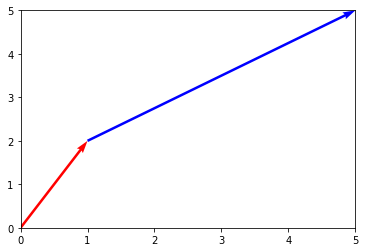

In [ ]:
# Just to play around in the future

import numpy as np
import matplotlib.pyplot as plt

plt.quiver([0, 1], [0, 2], [1, 4], [2, 3], 
           angles='xy', scale_units='xy', color=['r','b','g'], scale=1)
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

###### **Case 2: Transformations of vectors across two basis (with linear maps + forward/backward)**

! Between two vector basis, not between vector basis and dual basis !

> **We need transformation rules for linear maps when we are moving a vector AND going from one basis to another, because linear maps are only working within one basis (move vectors around within one basis), we need to find the coefficients of the linear map in the new basis when we change basis**

> **Task: How to get from the new vector components in the old basis to the new vector components in the new basis (via old vector components in old basis, then old vector components in new basis)**


https://www.youtube.com/watch?v=SSSGA6ohkfw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=11

**How do we do this?**

If you take vector components $\left[\begin{array}{l}1 \\ 1\end{array}\right]_{\overrightarrow{e_{i}}}$ from the vector $\vec{v}$ in the original basis $\overrightarrow{e_{i}}$ 

1. **apply the linear map** $\left[\begin{array}{cc}1 / 2 & 0 \\ 0 & 2\end{array}\right]_{\vec{e}_{j}}$, you get the new vector components $L(\vec{v})$ $=\left[\begin{array}{c}1 / 2 \\ 2\end{array}\right]_{\overrightarrow{e_{i}}}$ that is still **in the same original basis** $\overrightarrow{e_{i}}$.

2. then **apply the backward transform** with the matrix $\left[\begin{array}{cc}1 / 4 & 1 / 2 \\ -1 & 2\end{array}\right]$, you get the new vector components for $\vec{v}$ $\left[\begin{array}{l}3/4 \\ 1\end{array}\right]_{\widetilde{e_{i}}}$ **in the new basis** ${\widetilde{e_{i}}}$.

**We use the backward transform from old to new, since vector components behave contravariant !!**



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_22.png)

> **But how do you get the new vector components $L(\vec{v})$ in the new basis ${\widetilde{e_{i}}}$?**

> **Answer: We need to find the coefficients of the linear map ${\widetilde{L_{j}^{q}}}$ in the new basis ${\widetilde{e_{i}}}$.**

> **Again: how do you get the new vector components $L(\vec{v})$ (the transformed vector with the linear map $L$) in the new basis ${\widetilde{e_{i}}}$, and not only the components of $\vec{v}$ (the original vector) in the new basis ${\widetilde{e_{i}}}$?**

**Said differently: what are the components of the output vector in the new basis ${\widetilde{e_{i}}}$?**

* we cannot apply the linear map $L$ $\left[\begin{array}{cc}1 / 2 & 0 \\ 0 & 2\end{array}\right]_{\vec{e}_{j}}$ since it's only valid in the original basis

**We need to find a new matrix ${\widetilde{L}}$ in the new basis ${\widetilde{e_{i}}}$ that tells us how to build output vectors using the ${\widetilde{e_{1}}}$ and ${\widetilde{e_{2}}}$ basis vectors.** 

* This means we need to find the ${\widetilde{L_{j}^{q}}}$ coefficients:

  * $L\left(\color{red}{\widetilde{e_{1}}}\right)=\widetilde{L_{1}^{1}} \widetilde{e_{1}}+\widetilde{L_{1}^{2}} \widetilde{e_{2}}$ 

  * $L\left(\color{red}{\widetilde{e_{2}}}\right)=\widetilde{L_{2}^{1}} \widetilde{e_{1}}+\widetilde{L_{2}^{2}} \widetilde{e_{2}}$

**How to get the components of the output vector in the new basis ${\widetilde{e_{i}}}$:**

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=L\left(\color{red}{\widetilde{e_{i}}}\right)$

Let's first use the forward transform $\widetilde{e_{i}}=\sum_{j=1}^{n} F_{i}^{j} \overrightarrow{e_{j}}$ to rewrite the new basis vectors in terms of the old basis vectors:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=L\left(\sum_{j=1}^{n} F_{i}^{j} \color{blue}{\overrightarrow{e_{j}}}\right)$

Now we use the linearity of $L$ to take the scale and sum coefficients outside the function:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=\sum_{j=1}^{n} F_{i}^{j} L\left(\color{blue}{\overrightarrow{e_{j}}}\right)$

Now we use this definition $L\left(\color{blue}{\overrightarrow{e_{j}}}\right)=\sum_{k=1}^{n} L_{j}^{k} \color{blue}{\overrightarrow{e_{k}}}$ to write the output $L\left(\color{blue}{\overrightarrow{e_{j}}}\right)$ as linear combination of the old basis vectors:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=\sum_{j=1}^{n} F_{i}^{j} \sum_{k=1}^{n} L_{j}^{k} \color{blue}{\overrightarrow{e_{k}}}$

Then we re-arrange the sums a bit:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=\sum_{j=1}^{n} \sum_{k=1}^{n} F_{i}^{j} L_{j}^{k} \color{blue}{\overrightarrow{e_{k}}}$

Now we write the old basis in terms of the new basis vectors with $\color{blue}{\overrightarrow{e_{k}}}=\sum_{l=1}^{n} B_{k}^{l} \color{red}{\widetilde{\overrightarrow{e_{l}}}}$ using the bckward transform:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=\sum_{j=1}^{n} \sum_{k=1}^{n} F_{i}^{j} L_{j}^{k} \sum_{l=1}^{n} B_{k}^{l} \color{red}{\widetilde{e_{l}}}$

We re-arrange the sums again:

> $\sum_{q=1}^{n} \widetilde{L_{i}^{q}} \color{red}{\widetilde{e_{q}}}=\sum_{l=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j} \color{red}{\widetilde{e_{l}}}$

* So on the left we have a linear combination of ${\widetilde{e}}$ basis vectors with the summation index $q$.

* So on the right we have a linear combination of ${\widetilde{e}}$ basis vectors again but with the summation index $l$.

* So we have a linear combination of ${\widetilde{e}}$ basis vectors on both sides.

But with different summation indexes. But the choice doesn't really matter. So we change all the $q$ with $l$:

> $\sum_{l=1}^{n} \widetilde{L_{i}^{l}} \color{red}{\widetilde{e_{l}}}=\sum_{l=1}^{n} \sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j} \color{red}{\widetilde{e_{l}}}$

Now we see that the $\widetilde{L_{i}^{l}}$ coefficients on the left side are equal to this part $\sum_{j=1}^{n} \sum_{k=1}^{n} F_{i}^{j} L_{j}^{k} B_{k}^{l}$ in the middle of the right equation:

> $\sum_{l=1}^{n} \color{pink}{\widetilde{L_{i}^{l}}} \widetilde{e_{l}}=\sum_{l=1}^{n} \color{pink}{\sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j}} \widetilde{e_{l}}$

**This is saying that to transform the matrix coordinates from the old basis to the new basis we multiply the old matrix $L_{j}^{k}$ by the backward transform $B$ on the left and by the forward transform $F$ on the right:**

> $\widetilde{L_{i}^{l}}=\sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j}$

**This is what we just did (explanation below):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_23.png)

**!!! IMPORTANT SUMMARY !!!**

> **Task: How to get from the new vector components in the old basis to the new vector components in the new basis (via old vector components in old basis, then old vector components in new basis)**

**So, matrices, or linear maps, transform with both the forward transform and the backward transform. Here is why:**

* You have two ways to get the new basis vector component: you can use $\widetilde{L}$ matrix n the bottom to go from left to right directly $\left[\begin{array}{l}? \\ ?\end{array}\right]_{\widetilde{e_{j}}}$

* But it's the same thing as going the other way around: 

  1. To transform the new vector components into the old vector components you use the forward transform

  2. And here to transform the components of the input vector into components of the output vector in the old basis, we just use the matrix $L$

  3. And finally to get from the old vector components to the new vector components for the output vector we use the backward transform

  4. Now we have the components of the new basis vector $\left[\begin{array}{l}? \\ ?\end{array}\right]_{\widetilde{e_{j}}}$ with which you can describe any vector in the new vector space.

So the idea of transforming matrix components using both the forward and backward transformations makes sense.

**Let's check this on our example from above:**

This is the equation again to get from the new vector components in the old basis to the new vector components in the new basis (via old vector components in old basis, then old vector components in new basis):

> $\widetilde{L}_{i}^{l}=\sum_{j=1}^{n} \sum_{k=1}^{n} B_{k}^{l} L_{j}^{k} F_{i}^{j}$

* Backward Transform $B$: $\left[\begin{array}{cc}1 / 4 & 1 / 2 \\ -1 & 2\end{array}\right]$

* Linear Map $L$ in old basis ${\overrightarrow{e_{j}}}$: $\left[\begin{array}{cc}1 / 2 & 0 \\ 0 & 2\end{array}\right]_{\overrightarrow{e_{j}}}$

* Forward Transform $F$: $\left[\begin{array}{cc}2 & -1 / 2 \\ 1 & 1 / 4\end{array}\right]$

Now let's place them all in the equation to get the linear map in the new basis:

> $L_{\widetilde{e}_{j}}=\left[\begin{array}{cc}1 / 4 & 1 / 2 \\ -1 & 2\end{array}\right]\left[\begin{array}{cc}1 / 2 & 0 \\ 0 & 2\end{array}\right]_{\vec{e}_{j}}\left[\begin{array}{cc}2 & -1 / 2 \\ 1 & 1 / 4\end{array}\right]$

> $L_{\widetilde{e}_{j}}=\left[\begin{array}{cc}1 / 8 & 1 \\ -1 / 2 & 4\end{array}\right]\left[\begin{array}{cc}2 & -1 / 2 \\ 1 & 1 / 4\end{array}\right]$

We get this matrix the:

> $L_{\widetilde{e}_{j}}=\left[\begin{array}{cc}5 / 4 & 3 / 16 \\ 3 & 5 / 4\end{array}\right]$

And this matrix above tells us how to write the outputs of the linear map as linear combination of the new basis:

> $L\left(\widetilde{e_{1}}\right)=5 / 4 \widetilde{e_{1}}+3 \widetilde{e_{2}}$

> $L\left(\widetilde{e_{2}}\right)=3 / 16 \widetilde{e_{1}}+5 / 4 \widetilde{e_{2}}$

**Results are correct, the new matrix / linear map in the new basis is converting the vector properly from its original position to the new position (measuring both at the new basis vectors):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_24.png)

**Forward & Backward Transform of Linear Maps between different basis**

A tensor is an object that is invariant under a change of coordinates, and **has components that change in a special, predictable way under a change of coordinates**. The way we transform them is by a applying a series of forward and backward transforms!

**Forward Transform (going from old $T$ to new $\widetilde{T}$)**

> $\widetilde{T_{x y z \ldots}^{a b c \ldots}}=\left(B_{\color{red}i}^{a} B_{\color{red}j}^{b} B_{\color{red}k}^{c} \cdots\right) T_{\color{blue}{r s t} \ldots}^{\color{red}{i j k} \ldots}\left(F_{x}^{\color{blue}r} F_{y}^{\color{blue}s} F_{z}^{\color{blue}t} \cdots\right)$

* all the upstairs indices $\color{red}{i, j, k}$ will transform using the **backward transformation** in B on the bottom, because upstairs are the **contravariant components**.

* the downstairs indices $\color{blue}{r, s, t}$ will transform using the **forward transformation**, because downstairs are the **covariant components**.

**Backward Transformation (going from new $\widetilde{T}$ to old $T$)**

> $T_{r s t \ldots}^{i j k \ldots}=\left(F_{\color{red}a}^{i} F_{\color{red}b}^{j} F_{\color{red}c}^{k} \cdots\right) \widetilde{T_{\color{blue}{x y z} \ldots}^{\color{red}{a b c} \ldots}}\left(B_{r}^{\color{blue}x} B_{s}^{\color{blue}y} B_{t}^{\color{blue}z} \cdots\right)$

* all the upstairs indices $\color{red}{i, j, k}$ will transform using the **forward transformation** in B on the bottom, because upstairs are the **contravariant components**.

* the downstairs indices $\color{blue}{r, s, t}$ will transform using the **backward transformation**, because downstairs are the **covariant components**.

**Remember this illustration from the linear maps part that helps to understand the $FTB$ = $\widetilde{T}$ (oben) bzw. $FLB$ = $\widetilde{L}$ (unten) transform:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_23.png)

> !! **Below: Core Question for the next chapter also, when it gets more complicated with more basis & dual basis** !!

> $\widetilde{T_{x y z \ldots}^{a b c \ldots}}=\left(B_{\color{red}i}^{a} B_{\color{red}j}^{b} B_{\color{red}k}^{c} \cdots\right) T_{\color{blue}{r s t} \ldots}^{\color{red}{i j k} \ldots}\left(F_{x}^{\color{blue}r} F_{y}^{\color{blue}s} F_{z}^{\color{blue}t} \cdots\right)$ (forward transform)

**How many contravariant and covariant rules we need to follow during a transformation?**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_32.png)

> **Tensor: a collection of vectors and covectors combined together using the tensor product**.

https://youtu.be/C76lWSOTqnc?list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&t=845

**Summary**

* Linear map is a (1,1) tensor, because they transform using one contravariant rule (= vector components) and one covariant rules (= basis components)

* Metric tensors are (0,2) tensors, because it transforms using tow covariant rules

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_31.png)

### **Bilinear Form (inkl. Metric Tensor)**

###### **Metric Tensor: Define length of and angle between tangent vectors when basis changes**

Metric Tensor = "First Fundamental Form"

> **Bilinear Forms: Generalizations of Metric Tensors**

> **Generalisation via tensor product: Bilinear Forms as Covector-Covector-Pairs**

**Use Cases: How to measure the length of a vector when we change the vector (with a linear map) as well as when the basis changes?**

**In a given basis we compute the output of a metric tensor using this formula**:

> $g(\vec{v}, \vec{w}) \mapsto v^{i} w^{j} g_{i j}$

https://www.youtube.com/watch?v=C76lWSOTqnc&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=12

* helps to measure lengths and angles in space

* we once learnt to measure the length of a vector using the root of c<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup>

* in the old basis (orthonormal basis) it would be the following correctly:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_27.png)

but that doesn't work in the new basis: We used the side lengths of the triangle $\vec{v}$ with ${\widetilde{e_{1}}}$ and ${\widetilde{e_{2}}}$ and that's not a right-angle triangle


![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_28.png)

> **Pythagoras theorem is only valid in orthonormal bases!**

It only works when basis vectors have lengths 1 and and are orthogonal to each other.

The real formula for length is given by the dot product:

> **$\|\vec{v}\|^{2}=\vec{v} \cdot \vec{v}$**

Expanding $v$ out in the old basis we get this:

> $\|\vec{v}\|^{2}=\left(v^{1} \overrightarrow{e_{1}}+v^{2} \overrightarrow{e_{2}}\right) \cdot\left(v^{1} \overrightarrow{e_{1}}+v^{2} \overrightarrow{e_{2}}\right)$

Which can be re-arrangiert to:

> $\|\vec{v}\|^{2} =  v^{1} v^{1}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{1}}\right)+v^{1} v^{2}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{2}}\right)+v^{2} v^{1}\left(\overrightarrow{e_{2}} \cdot \overrightarrow{e_{1}}\right)+v^{2} v^{2}\left(\overrightarrow{e_{2}} \cdot \overrightarrow{e_{2}}\right)$

And re-arranging again we get this:

> $\|\vec{v}\|^{2} =  \left(v^{1}\right)^{2}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{1}}\right)+2 v^{1} v^{2}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{2}}\right)+\left(v^{2}\right)^{2}\left(\overrightarrow{e_{2}} \cdot \overrightarrow{e_{2}}\right)$

And of course the same for the new basis vectors:

> $\|\vec{v}\|^{2} =  \left(\widetilde{v^{1}}\right)^{2}\left(\widetilde{e_{1}} \cdot \widetilde{e_{1}}\right)+2 \widetilde{v^{1}} \widetilde{v^{2}}\left(\widetilde{e_{1}} \cdot \widetilde{e_{2}}\right)+\left(\widetilde{v^{2}}\right)^{2}\left(\widetilde{e_{2}} \cdot \widetilde{e_{2}}\right)$

So checking this on our example above:

First remember we can takt the Kronecker delta in this case when we have an orthonormal basis:

> $\overrightarrow{e_{i}} \cdot \overrightarrow{e_{j}}=\delta_{i j}$

Which means that we can replace a few terms in our equation:

> $\begin{aligned}\|\vec{v}\|^{2} &=\left(v^{1}\right)^{2}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{1}}\right) \\ &+2 v^{1} v^{2}\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{2}}\right) \\ &+\left(v^{2}\right)^{2}\left(\overrightarrow{e_{2}} \cdot \overrightarrow{e_{2}}\right) \end{aligned}$

With these using the Kronecker delta:

> $\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{1}}\right)$ = 1

> $\left(\overrightarrow{e_{2}} \cdot \overrightarrow{e_{2}}\right)$ = 1

> $\left(\overrightarrow{e_{1}} \cdot \overrightarrow{e_{2}}\right)$ = 0

Which leaves us with the special case of Pythagoras theorem on lengths (in orthonormal spaces):

> $\|v\|^{2}=\left(v^{1}\right)^{2}+\left(v^{2}\right)^{2}$

But to remember: the breal formula is above given by $\|\vec{v}\|^{2}$

**The Metric Tensor**

* Is a tensor whose components in a given vector basis are given by the dot products of the basis vectors.

> $g_{i j}=\overrightarrow{e_{i}} \cdot \overrightarrow{e_{j}}$

* Since the dot products don't care about the order of the input $g_{i j}=g_{j i}$, which means the tensor is symmetric along the diagonal line (spur).

> $g_{i j}=\overrightarrow{e_{i}} \cdot \overrightarrow{e_{j}}=\overrightarrow{e_{j}} \cdot \overrightarrow{e_{i}}=g_{j i}$

* when we want to get an angle, we put both vectors in

* when we want to get a lengths we out the same vector twice in

> $\vec{v} \cdot \vec{v}=\|\vec{v}\|^{2}=v^{i} v^{j} g_{i j}$

> $\vec{w} \cdot \vec{w}=\|\vec{w}\|^{2}=w^{i} w^{j} g_{i j}$

> $\vec{v} \cdot \vec{w}=\|\vec{v}\|\|\vec{w}\| \cos \theta=v^{i} w^{j} g_{i j}$

Metric tensor is a function $g: V \times V \rightarrow \mathbb{R}$

> $g(\vec{v}, \vec{w}) \mapsto v^{i} w^{j} g_{i j}$

* In differential geometry, one definition of a [metric tensor](https://en.wikipedia.org/wiki/Metric_tensor) is a type of function which takes as input a pair of tangent vectors v and w at a point of a surface (or higher dimensional differentiable manifold) and produces a real number scalar g(v, w) in a way that generalizes many of the familiar properties of the dot product of vectors in Euclidean space.

* In the same way as a dot product, **metric tensors are used to define the length of and angle between tangent vectors**. 

* Through integration, the metric tensor allows one to define and **compute the length of curves on the manifold**.

http://walter.bislins.ch/physik/index.asp?page=Metrik%2DTensor

* below you can see the formulas for the squared vector lengths

* We can write this formula for the old components as a series of matrix multiplications with the identity matrix $\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right]$ in the middle for the orthonormal basis. And if you work this out you still get $\left(v^{1}\right)^{2}+\left(v^{2}\right)^{2}$

* And the same goes for the new coordinate system (with a non-orthonormal basis) with the linear map $\left[\begin{array}{cc}5 & -3 / 4 \\ -3 / 4 & 5 / 16\end{array}\right]$.

* These two matrices $\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right]$ and $\left[\begin{array}{cc}5 & -3 / 4 \\ -3 / 4 & 5 / 16\end{array}\right]$ are the key to getting the vector lengths in any given corrdinate system.

> **These are called metric tensor $g$**

> $g_{\vec{e}_{i}}=\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right]_{\overrightarrow{e_{i}}}$ Metric tensor in the old basis

> $g_{\widetilde{e_{i}}}=\left[\begin{array}{cc}5 & -3 / 4 \\ -3 / 4 & 5 / 16\end{array}\right]_{\widetilde{e_{i}}}$ Metric tensor in the new basis

> **And just like vectors, metric tensors are invariant, but have different components in different coordinate systems!**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_29.png)

> **To get the vector lengths using these formulas we just need to know the basis vector dot products $\left(\overrightarrow{e_{n}} \cdot \overrightarrow{e_{m}}\right)$ and $\left(\widetilde{e_{n}} \cdot \widetilde{e_{m}}\right)$ and we can store these do products in a matrix which represents the metric tensor for that corrdinate system.**

**How do you get the numbers in each metric tensor?**

> **Metric tensor components are given by the dot products of the basis vectors (as shown below).**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_30.png)

**Scaling and Addition with Metric Tensors**

Metric tensor is a function $g: V \times V \rightarrow \mathbb{R}$

> $g(\vec{\color{red}v}, \vec{\color{blue}w}) \mapsto \color{red}{v^{i}} \color{blue}{w^{j}} g_{i j}$

This is the formula for computing the output of a metric tensor when it acts on two vectors

> $\left[\begin{array}{ll}\color{red}{v^{1}} & \color{red}{v^{2}}\end{array}\right]\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left[\begin{array}{l}\color{blue}{w^{1}} \\ \color{blue}{w^{2}}\end{array}\right]$

**Scaling inputs** 

(note that you can either scale with v or w but NOT with all together!)

> $a\left(\left[\begin{array}{ll}v^{1} & v^{2}\end{array}\right]\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left[\begin{array}{l}w^{1} \\ w^{2}\end{array}\right]\right)$

> Option 1 = $\left.\left(\begin{array}{ll}a\left[v^{1}\right. & v^{2}\end{array}\right]\right)\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left[\begin{array}{c}w^{1} \\ w^{2}\end{array}\right]=\left[\begin{array}{ll}a {v}^{1} & a v^{2}\end{array}\right]\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left[\begin{array}{l}w^{1} \\ w^{2}\end{array}\right]$

> Option 2 = $\left[\begin{array}{ll}v^{1} & v^{2}\end{array}\right]\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left(a\left[\begin{array}{l}w^{1} \\ w^{2}\end{array}\right]\right)=\left[\begin{array}{ll}v^{1} & v^{2}\end{array}\right]\left[\begin{array}{ll}g_{11} & g_{12} \\ g_{21} & g_{22}\end{array}\right]\left[\begin{array}{l}a w^{1} \\ a w^{2}\end{array}\right]$

Faciliate it by writing in summation notation:

> $a\left(v^{i} w^{j} g_{i j}\right)=\left(av^{i}\right) w^{j} g_{i j}=v^{i}\left(a w^{j}\right) g_{i j}$

Which brings you to:

> $a g(\vec{v}, \vec{w})=g(a \vec{v}, \vec{w})=g(\vec{v}, a \vec{w})$

But never multiply it on both sides:

> $a g(\vec{v}, \vec{w}) \neq g(a \vec{v}, a \vec{w})$


**So the metric tensor properties are**:

> $g: V \times V \rightarrow \mathbb{R}$

> $a g(\vec{v}, \vec{w})=g(a \vec{v}, \vec{w})=g(\vec{v}, a \vec{w})$

> $g(\vec{v}+\vec{u}, \vec{w})=g(\vec{v}, \vec{w})+g(\vec{u}, \vec{w})$

> $g(\vec{v}, \vec{w}+\vec{t})=g(\vec{v}, \vec{w})+g(\vec{v}, \vec{t})$

**In a given basis we compute the output of a metric tensor using this formula**:

> $g(\vec{v}, \vec{w}) \mapsto v^{i} w^{j} g_{i j}$

**Transformation of metric tensor components (under a change of the coordinate system)**



---



###### **Metric Tensor: Raising & Lowering Indexes with $g$ and $\mathfrak{g}$ metric tensors ($\flat$ and $\sharp$ operators)**

> **Problem Statement**

https://www.youtube.com/watch?v=_z9R7OMpxhY

$V$ vector space where vector lives: $\vec{v}=v^{i \overrightarrow{e_{i}}}$


$V^{*}$ dual vector space where corresponding covector live: $\alpha=\alpha_{j} \epsilon^{j}$ 

> **Is there any way to create a correspondence between the vectors of $V$ and the covectors of $V^{*}$?**

* Means: is there a way to take a vector like $\vec{v}$ and find its covector like $\alpha$

...so not between vector in basis 1 vs vector in basis 2, but between vector in basis 1 and covector in basis 2?? (isn't that the same?)

> **A column vector $\begin{equation}
\left[\begin{array}{l}
x \\
y
\end{array}\right]
\end{equation}$ represents the components of a <u>vector</u>.**

> **A row vector $\begin{equation}
\left[\begin{array}{ll}
2 & 1
\end{array}\right]
\end{equation}$ represents the components of a <u>covector</u>.**



---



> **Using basis vectors and their limitations**

* One way to create a correspondence would be to take the basis vector  $\overrightarrow{e_{i}}$ in $V$ and pair it up with the basis covector $\epsilon^{i}$ in $V^{*}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_73.png)

It works in what matter dimension the space is: 

* If we want to find the covector partner of any arbitrary vector $\vec{v}$ we can expand it as a linear combination of basis vectors 
* turn the basis vectors into covectors 
* And we can say the covector $\alpha$ which is equal to the linear combination of $v^{1} \epsilon^{1}$, $v^{2} \epsilon^{2}$ etc. is the partner of the vector $\vec{v}$ in $V^{*}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_74.png)

> **This doesn't always work well when there is a change of basis**

If you for example we expand the original basis in $V$ by factor 2, it's like using a forward transform (matrix), and the backward transform would be the opposite 1/2 with the accrding matrices:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_75.png)

The problem is now following:

* Basis vectors are covariant, so when we go from the old basis to the new basis we transform the basis vectors using the forward transform
* But with basis covectors, covectors are contra variant, so when we go from the old basis to the new basis we use the backward coefficients
* And that means to get the new basis of covectors we would multiply the old covector basis by 1/2

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_76.png)

So the method of assigning partners doesn’t work well because the correspondence might look nice in one basis, it starts to be wrong in another choice of basis. The coefficients don’t match up


Because in this case growing the vectors causes the covectors to shrink

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_77.png)



---



> **Using metric tensor (and no basis vectors at all)**

Basic idea: To get the partner covector in $V^{*}$ from of a vector $\vec{v}$ in $V$ to its  we introduce the covector ($\vec{v}$ * __) in $V^{*}$

* any vector can go in there

* the result of the multiplication would be a scalar

* linearity rules (scale and addition) work well, so it's a member of $V^{*}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_78.png)

Image below:

* Looking back on our previous example when using basis vectors: the vector-covector-partners might look nice in one basis, but a change of basis makes things ugly because growing the vectors $2 \overrightarrow{e_{i}}$ causes the covectors to shrink $1 / 2 \epsilon^{i}$

* This breaks the rule of establishing partners by replacing basis vectors $2 \overrightarrow{e_{i}}$ with basis covectors $2 \epsilon^{i}$

* on the other hand: the new correspondence where we partner the vector $\vec{v}$ in $V$ with the covector ($\vec{v}$ * __) in $V^{*}$ doesn't depend on a basis at all (so we don't run into any problems when we change basis)

* moreover when we scale the vector by 2 we also scale it's covector partner by 2 (since the linearity rules are valid!)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_79.png)

> $\vec{v} \cdot \text{__} \quad{\in} V^{*}$

If $\vec{v}$ really lives in $V^{*}$ that means should be able to build it out of basis covectors $\epsilon^{i}$:

> $\vec{v} \cdot \text{__} \quad{=} \quad x_{i} \epsilon^{i}$ where $\epsilon^{i}$ is the  basis covector

**What are the $x_{i}$ coefficients that we can use to build it as a linear combination of the $\epsilon^{i}$ epsilon covectors?**

**The metric tensor $g$**

Recall that the results of the dot product of vectors $\vec{v}$ and $\vec{w}$ is given by passing the vectors the metric tensor $g$ with 

> $\vec{v} \cdot \vec{w}=g(\vec{v}, \vec{w})$.

And to compute the output of this we just expand the metric tensor $g_{i j} \epsilon^{i} \epsilon^{j}$ and both vectors as linear combinations $v^{k} \overrightarrow{e_{k}}$ and $w^{l} \overrightarrow{e_{l}}$:

> $\vec{v} \cdot \vec{w}= g_{i j} \epsilon^{i} \epsilon^{j}\left(v^{k} \overrightarrow{e_{k}}, w^{l} \overrightarrow{e_{l}}\right)$

And now we are going to pass these vectors to these covectors like this (and the order doesn't matter because the metric tensor is symmetric: $g(\vec{v}, \vec{w})=g(\vec{w}, \vec{v})$)

> $\vec{v} \cdot \vec{w}= g_{i j} \epsilon^{i}\left(v^{k} \overrightarrow{e_{k}}\right) \epsilon^{j}\left(w^{l} \overrightarrow{e_{l}}\right)$

We bring the coefficients out in front

> $\vec{v} \cdot \vec{w}=g_{i j} v^{k} w^{l} \epsilon^{i}\left(\overrightarrow{e_{k}}\right) \epsilon^{j}\left(\overrightarrow{e_{l}}\right)$

and we can rewrite these $\epsilon^{i}\left(\overrightarrow{e_{k}}\right)\epsilon^{j}\left(\overrightarrow{e_{l}}\right)$ as kronecker deltas:

> $\vec{v} \cdot \vec{w}= g_{i j} v^{k} w^{l} \delta_{k}^{i} \delta_{l}^{j}$

And finally using the index cancellation rule for $k$ and $l$ we get this:

> $\vec{v} \cdot \vec{w}= g_{i j} v^{i} w^{j}$

And that’s the familiar summation formula we use to get the output of the metric tensor. 

**How to get the components now?**

Now to get the component of ($\vec{v} \cdot \text{__}$),  

$\vec{v} \cdot \vec{w}=g(\vec{v}, \vec{w})=g_{i j} v^{i} w^{j}$

we will do the exact same thing again except we are going to pass a single vector $\vec{v}$ to the metric tensor as the input and leave the the second inout slot empty:

> $\vec{v} \cdot{ }_{-}=g(\vec{v},{ }_{-})$

We expand $g$ and $\vec{v}$ out as linear combinations 

> $\vec{v} \cdot{ }_{-}=g(\vec{v},{ }_{-}) = g_{i k} \epsilon^{i} \epsilon^{k}\left(\vec{v}^{j} \cdot \overrightarrow{e_{j}}\right)$

And we can pass this vector $\overrightarrow{e_{j}}$ to one of these covectors (doesn't matter which one, because metric tensor is symmetric) 

> $\vec{v} \cdot{ }_{-}=g(\vec{v},{ }_{-}) = g_{i k} v^{j} \epsilon^{i} \epsilon^{k}\left(\overrightarrow{e_{j}}\right)$

And that gives us a Kronecker delta:

> $\vec{v} \cdot{ }_{-}=g(\vec{v},{ }_{-}) = g_{i k} v^{j} \epsilon^{i} \delta_{j}^{k}$

So we can cancel out the indexes $k$, here we have the components $g_{i j} v^{j}$ of ($\vec{v} \cdot{ }_{-}$) in the epsilon basis $\epsilon^{i}$:

> $g_{i j} v^{j} \epsilon^{i}$

And we can do the same in another basis and we would get that the components of ($\vec{v} \cdot{ }_{-}$) in the $\widetilde{\epsilon^{i}}$ basis are the components $\widetilde{g_{i j}} \widetilde{v^{j}}$ in here:

> $\widetilde{g_{i j}} \widetilde{v^{j}} \widetilde{\epsilon^{i}}$

Because remember this equation from above:

> $\vec{v} \cdot \text{__} \quad{=} \quad x_{i} \epsilon^{i}$

**Now we are just lowering the index:**

* if we drop $g_{i j}$ we can write $v_{j}$ instead of $v^{j}$

* it's as if the metric tensor components are lowering the index of the components of $\vec{v}$ to give the covector components of ($\vec{v} \cdot \text{__}$)

> $g_{i j} v^{j}=v_{i}$

* and the same thing can be done in any basis (see right side of image)

> $\widetilde{g_{i j}} \widetilde{v_{j}^{j}}=\tilde{v_{i}}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_80.png)

**In summary:**

* [first row] a vector $\vec{v}$ can be written with the upstairs version of of $\vec{v}$ components (like ${v}^{j}$) 

* [second row] and it's partner covector ($\vec{v} \cdot \text{__}$) can be written downstairs versions of the $\vec{v}$ components (like ${v}_{j}$)

* [third row] the way we convert between the upstairs and downstairs version of $\vec{v}$ is by doing a summation with the metric tensor components

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_81.png)

**And one more important thing:**

> ${v}_{j}$ ≠ ${v}^{j}$

If we have to switch between them we have to use the metric tensor components and do a summation:

> ${v}_{j}$ = $\color{red}{g_{i j}}$ ${v}^{j}$

The only way the equality is true is in the extremely special case of an **orthonormal coordinate system**, which means that the **metric tensor components are given by the Kronecker delta**:

> ${v}_{j}$ = ${v}^{j}$, only when: $g_{i j}$ = $\delta_{i j}$



---



> **Inverse metric tensor $\mathfrak{g}$**

* So we found a way to partner up vectors and covectors by pairing the vector $\vec{v}$ with the covector ($\vec{v} \cdot \text{__}$)

* And we way we get from the vector to the covector is by using the metric tensor


**Important learning**

* We normally think of a metric tensor as a function from a pair of vectors to scalars

> $g: V x V \rightarrow \mathbb{R}$

* But we can also think of it as a function from a single vector in $V$ to a covector in $V^{*}$

> $g: V  \rightarrow V^{*}$

**But what would be the reverse direction?** 

* So from a covector to its vector partner

* From the metric tensor we know its components have 2 lower indices, so it’s a member of $V^{*}$ tensor $V^{*}$ bzw.  

> $g \in V^{*} \otimes V^{*}$

* Now we introduce what's called the inverse metric tensor

> $\mathfrak{g} \in V \otimes V$

* The combination between both in a summation gives you the Kronecker delta:

> $\mathfrak{g}^{k i} g_{i j}=\delta_{j}^{k}$

This is how we define the inverse metric tensor

**Proof that this definition is right**

We see that if we take the standardad "lowering index equation":

> $v_{i}=g_{i j} v^{j}$

And multiply on both sides by the inverse metric tensor:

> $\mathfrak{g}^{k i} v_{i}= \mathfrak{g}^{k i} g_{i j}v^{j}$

This $\mathfrak{g}^{k i} g_{i j}$ on the right side will cancel out and give a Kronecker delta:

> $\mathfrak{g}^{k i} v_{i}= \delta^{k}_{j}v^{j}$

And then we use the index cancellation rule:

> $\mathfrak{g}^{k i} v_{i}=v^{k}$

> **So the ordinary metric tensor ('covariant metric tensor') lowers indexes, but the inverse metric tensor raises the indexes, because it goes in the other direction.**

> **The ordinary metric tensor $g_{i j}$ is also called 'covariant metric tensor' because its components are covariant.**

> **The inverse metric tensor $\mathfrak{g}^{k i}$ is also called 'contravariant metric tensor' because its components are contravariant.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_82.png)



---



**Sharp and Flat Operator**

Sharp & Flat Operator: https://de.wikipedia.org/wiki/Äußere_Ableitung#Be-_und_Kreuz-_(Flat-_und_Sharp-)_Isomorphismus

* So the ordinary metric tensor lowers indexes meanwhile the inverse metric tensor raises indexes. 
* But these raising and lowering operations don’t just apply to vector and covector components. 
* We can also raise and lower the indexes on the components of other tensors

So take this tensor $Q$ which is the member of the following vector space:

> $Q \in V \otimes V^{*} \otimes V^{*}$

Which has the following components $Q_{j k}^{I}$:

> $Q=Q_{j k}^{i} \vec{e}_{i} \epsilon^{j} \epsilon^{k}$

So if we multiply it but the inverse metric tensor and sum over $j$ like this

> $Q^{i}{ }_{j k} \mathfrak{g}^{j x}$

**then we can raise the index upward**:

> $=Q^{i x}{ }_{k}$

**And we get this new tensor Q prime**

> $Q^{\prime}=Q_{k}^{i x} \overrightarrow{e_{i} {e}_{x}} \epsilon^{k}$

Which is a member of this vector space:

> $Q^{\prime} \in V \otimes \color{red}{V} \otimes V^{*}$

And notice how that changed in the middle to before taking the inverse, corresponding with the raising of the middle index:

> $Q \in V \otimes \color{red}{V^{*}} \otimes V^{*}$

**Likewise you can also lowering the index**

> $D \in V \otimes V$

> $D=D^{a b} \overrightarrow{e_{a} e_{b}}$

> $D^{a b} g_{a x}$

> $=D_{x}^{b}$

> $D^{\prime}=D_{x}^{b} \epsilon^{x} \overrightarrow{e_{b}}$

> $D^{\prime} \in V^{*} \otimes V$

**Raising and lowering the index can be done on the component of any tensor**

All these vector spaces on this slide can be traveled between using the ordinary metric tensor to lower indexes (we travel in the direction of the blue arrow)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_83.png)

Or we can use the inverse metric tensor to raise indexes (direction of the red arrow)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_84.png)

And that really between all vector spaces:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_85.png)

**Last thing: alternate notation for converting between vector and covector partners**

**The flat $\flat$ operator**


We know that this ($\vec{v} \cdot _{-}$) is also equal to the metric tensor $g\left(\vec{v},_{-}\right)$ with just one input slot filled with the vector $\vec{v}$:


> $\vec{v} \cdot _{-}=g\left(\vec{v},_{-}\right)$

An alternative notation for writing this covector is following:

> $=\flat \vec{v}$

The flat operator $\flat$ lowers the index

So the upstairs ${v}$ components of the vector $\vec{v}$, but the downstairs ${v}$ components are the components of the covector $\flat$:

> $\vec{v}=v^{i} \overrightarrow{e_{i}}$

> $\flat \vec{v}=v_{i} \epsilon^{i}$

So you can see how the flat operator (on the left side) lowers the indexes (on the right side) from $v^{i}$ to $v_{i}$

Another way to think of it: the $\flat$ operator is transforming a vector arrow into a covector stack (like flatteing the pointy arrow into a flat stack)

**For the reverse one uses the sharp operator $\sharp$**

* On the other hand if we have a covector $\alpha$ defined like this as a vector $\vec{a}$ dot something:

> $\alpha=\vec{a} \cdot$

which is btw the same thing as the inverse metric tensor taking the covector alpha in the first input slot

> $=\mathfrak{g}(\alpha,\text{__})$

We can go from the covector alpha to the vector $\vec{a}$ using the sharp operator:

> $\sharp \alpha \mapsto \vec{a}$



So the covector alpha has components with downstairs indexes 

> $\alpha=\alpha_{i} \epsilon^{i}$

and the vector alpha sharp has components with upstairs indexes

> $\sharp \alpha=\alpha^{i} \overrightarrow{e_{i}}$

So the sharp operator is basically raising the index.

Also the sharp operator is basically turning a flat covector stack into a sharp pointy arrow vector (as seen in the image below).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_86.png)

###### **Bilinear Forms: Generalizations of Metric Tensors**

**A form is a function that takes vectors as inputs and outputs a number:**

> $V \times V \times \cdots \times V \rightarrow \mathbb{R}$



**Covectors are linear forms (=1-forms)**

* they take one vector as input to output a number (scalar):

>  $\alpha: V \rightarrow \mathbb{R}$

* and they follow the linearity properties:

  * $\alpha(\vec{v}+\vec{w})=\alpha(\vec{v})+\alpha(\vec{w})$

  * $\alpha(n \vec{v})=n \alpha(\vec{v})$

**Bilinear Forms (=2-Forms)**

* they take two vectors as input to output a number (scalar):

> $\mathcal{B}: V \times V \rightarrow \mathbb{R}$

* and they follow the linearity properties:

  * $a \mathcal{B}(\vec{v}, \vec{w})=\mathcal{B}(a \vec{v}, \vec{w})=\mathcal{B}(\vec{v}, a \vec{w})$

  * $\mathcal{B}(\vec{v}+\vec{u}, \vec{w})=\mathcal{B}(\vec{v}, \vec{w})+\mathcal{B}(\vec{u}, \vec{w})$

  * $\mathcal{B}(\vec{v}, \vec{w}+\vec{t})=\mathcal{B}(\vec{v}, \vec{w})+\mathcal{B}(\vec{v}, \vec{t})$


* **Bilinear Forms another type of tensor**

* the metric tensor is a special bilinear form

https://www.youtube.com/watch?v=jLiBCaBEB3o&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=13

**Relationship between linear and bilinear forms**

If look at the bilinear form rules and focus only on the rules that involve the first input and pretend the second input $\vec{w}$ is fixed, $\mathcal{B}$ looks very much like a covector or a linear form (scale input linearly and addition is linear):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_33.png)

Alternatively if we focus only on the rules that involve the second input and pretend the first input is fixed $\vec{v}$ also looks like a covector or linear form:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_34.png)

> **So if we say that $\mathcal{B}$ is a bilinear form, it's because it's a form where each individual input is linear while the other input is held constant!**

**Relationship between Metric Tensor and Bilinear Forms**

The properties of a bilinear form look very similar to the metric tensor properties:

* it takes two vectors as input to output a number (scalar like angle or length):

> $g: V \times V \rightarrow \mathbb{R}$

* and it follows the linearity properties:

  * $a g(\vec{v}, \vec{w})=g(a \vec{v}, \vec{w})=g(\vec{v}, a \vec{w})$

  * $g(\vec{v}+\vec{u}, \vec{w})=g(\vec{v}, \vec{w})+g(\vec{u}, \vec{w})$

  * $g(\vec{v}, \vec{w}+\vec{t})=g(\vec{v}, \vec{w})+g(\vec{v}, \vec{t})$

To compute the output of a function in a given basis where ${\mathcal{B}_{i j}}$ are the components of a matrix:

> $\mathcal{B}(\vec{v}, \vec{w}) \mapsto v^{i} w^{j} \mathcal{B}_{i j}$

The same goes for the metric tensor compute the output of a metric tensor in a given basis:

> $g(\vec{v}, \vec{w}) \mapsto v^{i} w^{j} g_{i j}$

And just like the metric tensor bilinear forms are (0,2) tensors (so they transform using 2 covariant rules when we change coordinate systems):

> $\widetilde{\mathcal{B}_{i j}}=F_{i}^{k} F_{j}^{l} \mathcal{B}_{k l}$

> $\mathcal{B}_{k l}=B_{k}^{i} B_{l}^{j} \widetilde{\mathcal{B}_{i j}}$

**So what is the difference between metric tensor and bilinear form?**



* the metric tensor is a bilinear form, but it's a very specific example of a bilinear form

* the metric tensor has 2 additional properties that other bilinear forms might not have:

  1. Metric tensor components are symmetric so we can swap i and j (commutative), hwich means that the order of the input vectors in the metric tensor doesn't matter: $\color{red}{g_{i j}} = \color{red}{g_{j i}}$ in here: $g(\vec{v}, \vec{w})=v^{i} w^{j} \color{red}{g_{i j}}=v^{i} w^{j} \color{red}{g_{j i}}=g(\vec{w}, \vec{v})$

  2. Metric tensor output must be positive (because it measures length): $g(\vec{v}, \vec{v})=\|\vec{v}\|^{2} \geq 0$

Examples of valid metric tensors (they have symmetric matrices and when we put the vector input twice in, we'll always get answers that are non-negativ):

> $\left[\begin{array}{ll}1 & 0 \\ 0 & 1\end{array}\right]\|\vec{v}\|^{2}=\left(v^{1}\right)^{2}+\left(v^{2}\right)^{2}$

> $\left[\begin{array}{cc}5 & -3 / 4 \\ -3 / 4 & 5 / 16\end{array}\right]$ = $\|\vec{v}\|^{2}=5\left(v^{1}\right)^{2}+(-6 / 4) v^{1} v^{2}+5 / 16\left(v^{2}\right)^{2}$


Non-metric bilinear forms:

> $\left[\begin{array}{ll}1 & 2 \\ 3 & 4\end{array}\right]$ because it's not symmetric

> $\left[\begin{array}{cc}1 & -5 \\ -5 & 1\end{array}\right]$ = $\|\vec{v}\|^{2}=\left(v^{1}\right)^{2}+(-10) v^{1} v^{2}+\left(v^{2}\right)^{2}$, this is symmetric, but i.e. $\left[\begin{array}{l}1 \\ 1\end{array}\right]$ would give a result of -8



---



**Generalization: Bilinear Forms as Covector-Covector-Pairs**

**Bilinear Form (Bilinearform)**

Als [Bilinearform](https://de.wikipedia.org/wiki/Bilinearform) bezeichnet man in der linearen Algebra eine Funktion, welche zwei Vektoren einen Skalarwert zuordnet und die linear in ihren beiden Argumenten ist.


A [bilinear form](https://en.m.wikipedia.org/wiki/Bilinear_form) on a vector space V is a bilinear map V × V → K, where K is the field of scalars. In other words, a bilinear form is a function B : V × V → K that is linear in each argument separately:

> **Bilinear forms are linear combinations of covector-covector-pairs** (including the metric tensor)

> $\mathcal{B}=\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j}=\mathcal{B}_{i j}\left(\epsilon^{i} \otimes \epsilon^{j}\right)$



*Why not vector-vector-pairs or so? - Bilinear forms take two vector inputs and since covectors take one vector each, a pair of covectors would take two vector inputs.*

**Benefit 1: write out any bilinear form as a linear combination of covector-covector pairs**

*Look at our classic transformation rules*:

> $\widetilde{\mathcal{B}_{i j}}=F_{i}^{k} F_{j}^{l} \mathcal{B}_{k l}$

> $\mathcal{B}_{i j}=B_{i}^{k} B_{j}^{l} \widetilde{\mathcal{B}_{k l}}$

and

> $\widetilde{e_{j}}=F_{j}^{i} \overrightarrow{e_{i}}$

> $\overrightarrow{e_{j}}=B_{j}^{i} \widetilde{e_{i}}$

and 

> $\widetilde{\epsilon}^{i}=B_{j}^{i} \epsilon^{j}$

> $\epsilon^{i}=F_{j}^{i} \epsilon^{j}$

**Proof**

If we can assume we can write out any bilinear form as a linear combination of covector-covector pairs **to get the transformation rule for these components** we just transform the basis covectors individually:

> $\mathcal{B}=\mathcal{B}_{k l} \epsilon^{k} \epsilon^{l}$

Basis covectors are contra variant, so to build old from the new we use the forward transform $F$ 

> $\mathcal{B}=\mathcal{B}_{k l}\left(F_{i}^{k} \widetilde{\epsilon}^{i}\right)\left(F_{j}^{l} \widetilde{\epsilon}^{j}\right)$

and putting these in front gives us this:

> $\mathcal{B}=\left(F_{i}^{k} F_{j}^{l} \mathcal{B}_{k l}\right) \widetilde{\epsilon}^{i}\widetilde{\epsilon}^{j}$

which as we can see is the correct one:

> $\widetilde{B_{i j}}=F_{i}^{k} F_{j}^{l} \mathcal{B}_{k l}$

**Benefit 2: We can also get the correct component multiplication formula when a bilinear form acts on two vector inputs:**

Given:

> $\mathcal{B}=\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j}$

> $\vec{v}=v^{k} \overrightarrow{e_{k}}$

> $\vec{w}=w^{l} \overrightarrow{e_{l}}$

**Proof:** replace components with equations above:

> $s=\mathcal{B}(\vec{v}, \vec{w})$

Replace the bilinear form and the vectors with their linear combination expansions in some basis 

> $s=\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j}\left(v^{k} \overrightarrow{e_{k}}, w^{l} \overrightarrow{e_{l}}\right)$

Now we pass each of these vector inputs to their corresponding covectors 

> $s=\mathcal{B}_{i j} \epsilon^{i}\left(v^{k} \overrightarrow{e_{k}}\right) \epsilon^{j}\left(w^{l} \overrightarrow{e_{l}}\right)$


$v$ and $w$ come out in front:

> $s=\mathcal{B}_{i j} v^{k} w^{l} \epsilon^{i}\left(\overrightarrow{e_{k}}\right) \epsilon^{j}\left(\overrightarrow{e_{l}}\right)$

Replace ($\overrightarrow{e_{k}}$) and ($\overrightarrow{e_{l}}$) with Kronecker deltas

> $s=\mathcal{B}_{i j} v^{k} w^{l} \delta_{k}^{i} \delta_{l}^{j}$

Finally using the index cancellation rules for $k$ and $l$ we get the correct component multiplication formula ends up giving us a single number as a result:

> $s=\mathcal{B}_{i j} v^{i} w^{j}$


**Benefit 3**

Remember with linear maps, the new way of writing with the tensor product makes a lot more tensors (with a row of rows): Even though we had two vector inputs we needed to write one as a column and one as a row  flipped on its side to make the multiplication work correctly. Which is awkward, because vectors should always be written as columns and not as rows!

When we write the bilinear forms as a row of rows the matrix multiplication formula makes a lot more sense. We can write out both vectors as columns

**Above is the old way (row vector & column vector both to describe vectors, and the transition matrix in the middle) and on the bottom is the new better way with tensor products $\otimes$**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_42.png)

**Summary of the tensor product for bilinear maps:**

So we can write bilinear forms as linear combinations of covector covector pairs and this

* immediately gives us the transformation rules $\begin{aligned} \widetilde{\epsilon}^{i} &=B_{j}^{i} \epsilon^{j} & \widetilde{\mathcal{B}_{i j}} &=F_{i}^{k} F_{j}^{l} \mathcal{B}_{k l} \\ \epsilon^{i} &=F_{j}^{i} \widetilde{\epsilon}^{j} & \mathcal{B}_{i j} &=B_{i}^{k} B_{j}^{l} \widetilde{B_{k l}} \end{aligned}$

* the component multiplication formula: $\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j} \Rightarrow \mathcal{B}_{i j} v^{i} w^{i}$

* and the correct array shape

**Combining two covectors using the tensor product can gives us a bilinear form whose coefficients are just the entries of the array given by the Kronecker product of the two row vectors (and not a row and a column vwector like for the Kronecker delta) associated with the covectors**

* Meanwhile the coefficients of the linear map are just the entries of an array given by the Kronecker delta of the column vector representing the vector and the row vector representing the covector

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_43.png)



---



**EXTENSION: Any Vector-Covector-Combination as Tensor Product $\otimes$**

https://www.youtube.com/watch?v=9R4vhqvE_jw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=17

> **Linear Maps: Linear combinations of vector-covector-pairs** $L=L_{j}^{i} (\overrightarrow{e_{i}} \otimes \epsilon^{j})$

> **Bilinear Forms: Linear combinations of covector-covector-pairs** $\mathcal{B}=\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j}=\mathcal{B}_{i j}\left(\epsilon^{i} \otimes \epsilon^{j}\right)$ (including metric tensor)

**Let's take two new tensor**

This is a (2,0) tensor

> $D=D^{a b} \overrightarrow{e_{a}} \overrightarrow{e_{b}}$ 

This is a (1,2) tensor

> $Q=Q_{j k}^{i} \overrightarrow{e_{i}} \epsilon^{j} \epsilon^{k}$ 

**Now we can ask the same questions:**

1. What are the coordinate transform rules?
2. What is the multiplication formula for $Q$ ($D$)?
3. What are the array shapes?

**1. How to $D$ and $Q$ under a change of basis?**

Transforming tensor components is not hard, long as you have the transformation rules for basis vectors and covectors (plug backward transform in here for example twice on the left side)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_50.png)

**2. What is the formula for $Q$ acting on the input $D$ = $Q(D)$**


This is tricky because there is no one way to do that. Some examples are:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_51.png)

> **The challenge is now that: As we make these tensors bigger and bigger with more and more covariant and contravariant parts, we end up with more and more ways to do the summations, and more and more ways to compute functions.**

* Writing $D$ = $Q(D)$ is ambuguous as it doesn't tell us exactly what to do

* so we need to write it out in the Einstein notation like on the left side, for example $Q_{j k}^{i} D^{j k}$

**3. What is the array shape?**

It's like the Kronecker product between two column vectors:

* like this part $\overrightarrow{e_{a}} \overrightarrow{e_{b}}$  in this here: $D=D^{a b} \overrightarrow{e_{a}} \overrightarrow{e_{b}}$ 

*We can do this for the first example from above*:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_52.png)

*For the other example it would look like this*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_53.png)

*One could use the 3d visualisation, but it's better in the matrix array way. Because looking at this you can see it’s a (1,2) tensor with one column aspect and two row aspects*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_54.png)

**Array Multiplication**

*Easy for smaller tensors*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_55.png)

*That's not so easier for larger tensors that have high type numbers, because there are several possible multiplication rules (as discussed earlier):*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_56.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_57.png)

*For much more complex tensors, it's the easiest to just stick with the Einstein notation and also not do the array representation.*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_58.png)

So with high type tensors the abstract notation and the array notation have their limitations. When trying to express tensor multiplication formulas it’s usually easier just to stick with the Einstein component notation. For this reason a lot of sources just write tensors like this and leave out basis vector and covectors completely:

> $Q_{j k}^{i} \overrightarrow{e_{i}} \epsilon^{j}$ $\mapsto$ $Q_{j k}^{i}$

> $D^{a b} \overrightarrow{e_{a}} \overrightarrow{e_{b}}$ $\mapsto$ $D=D^{a b}$

**But it's important to remember that tensor components always come from a choice of basis, and the same tensor can have different components if we choose to represent it in a different basis.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_59.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_60.png)

**Exkurs: Tensor Product $\otimes$ vs Kronecker Product $\otimes$**

They are technically different things, but highly related to each other.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_40.png)

https://www.youtube.com/watch?v=qp_zg_TD0qE&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=16

**Here are examples on how the tensor products works:**

Basis for Vector Space $V$

> $\overrightarrow{e_{1}}, \overrightarrow{e_{2}} \in V$

Basis for Dual Space $V*$

> $\epsilon^{1}, \epsilon^{2} \in V^{*}$

And the covectors are linear functions that are defined by these rules here, where the covector $\epsilon^{i}$ is acting on the vector $\overrightarrow{e_{j}}$ gives the Kronecker delta $\delta_{j}^{i}$ as the result (=we get 1 if i and j are the same and 0 if not).

> $\epsilon^{i}\left(\overrightarrow{e_{j}}\right)=\delta_{j}^{i}=\left\{\begin{array}{l}1, i=j \\ 0, i \neq j\end{array}\right.$

**A tensor product takes two tensors and produces a new tensor:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_44.png)

**To demonstrate that this is a linear map, we can pass in an input vector $\overrightarrow{v}$**

To get the output we can just we pass $v$ to the covector $\epsilon$ first

> $\left(\overrightarrow{e_{i}} \otimes \epsilon^{j}\right)(\vec{v})$

Pass v to the covector:

> $=\overrightarrow{e_{i}} \otimes\left(\epsilon^{j}(\vec{v})\right)$

Then we expand v as a linear combination of the basis vectors

> $=\overrightarrow{e_{i}} \otimes\left(\epsilon^{j}\left(v^{k} \overrightarrow{e_{k}}\right)\right)$

The we bring the components outside since covectors are linear functions (we can scale before or after):

> $=v^{k} \overrightarrow{e_{i}} \otimes\left(\epsilon^{j}\left(\overrightarrow{e_{k}}\right)\right)$

And the covector acting on a vector becomes a Kronecker delta:

> $=v^{k} \overrightarrow{e_{i}} \delta_{k}^{j}$

Then Kronecker index cancellation rule we can remove the $k$ indexes and get j:

> $=v^{j} \overrightarrow{e_{i}}$

So this is a function that takes a vector input and produces a vector output




**Here are examples on how the Kronecker products works:**

Here you get a row of columns when you take the first array on the left and distribute every element to the second array on the right:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_46.png)

.. and multiplying this with another column vector we get the same thing (here you get a column of rows of columns)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_47.png)

**Summary**

> $=v^{j} \overrightarrow{e_{i}}$ 

* these coefficient are the entries of a matrix (on the tensor product side)

* on the Kronecker delta side you can see this matrix !!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_48.png)

* Tensor product and Kronecker product are doing basically the same kind of thing

* It’s just the tensor product is combining the abstract vector and the abstract covector in the land of algebraic symbols

* And the Kronecker product is combining the the vector array and the covector array  in the land of arrays

* But the components that we get from the tensor are just the components of the matrix that we get from Kronecker product

* So they are sort of the same operation they just do the work in different contexts

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_49.png)

### **Bilinear Map**

**Bilinear Map (bilineare Abbildung)**

Matrix multiplication is an example. (in contrast: linear map war eine matrix als map von vector zu vector, das hier ist eine matrix als map zw matrix und matrix

[Bilinearen Abbildungen](https://de.m.wikipedia.org/wiki/Bilineare_Abbildung) verallgemeinern die verschiedensten Begriffe von Produkten (im Sinne einer Multiplikation). Die Bilinearität entspricht dem Distributivgesetz $a \cdot (b + c) = a \cdot b + a \cdot c$ bei der normalen Multiplikation.

[A bilinear map](https://en.m.wikipedia.org/wiki/Bilinear_map) is a function combining elements of two vector spaces to yield an element of a third vector space, and is linear in each of its arguments. Matrix multiplication is an example.

### **Multilinear Form**

Kovariante Tensoren sind Multilinearformen [Source](https://de.m.wikipedia.org/wiki/Multilinearform)

In abstract algebra and multilinear algebra; a [multilinear form](https://en.m.wikipedia.org/wiki/Multilinear_form) on a vector space $V$ over a field $K$ is a map
$f: V^{k} \rightarrow K$
that is separately $K$ -linear in each of its $k$ arguments. More generally, one can define multilinear forms on a module over a commutative ring. The rest of this article, however, will only consider multilinear forms on finite-dimensional vector spaces.

A multilinear $k$ -form on $V$ over $\mathbf{R}$ is called a (covariant) $k$ -tensor, and the vector space of such forms is usually denoted $\mathcal{T}^{k}(V)$ or $\mathcal{L}^{k}(V) \cdot$

bilinear form

exterior product

Differential form

pullback

### **Multilinear Map - from Tensors to Tensor Spaces (Product Spaces & Vector Spaces $\otimes$)**

Linear map: matrix als map von vektor zu vektor

bilinear map: matrix als map zw matrix und matrix

multilinear map: matrix (tensor) als map zw tensor und tensor (mehr als bilinear)

**Multilinear Maps: So the strongest kind of linearity we could reasonably impose is that $m$ is linear in each coordinate when all else is fixed**. 

https://jeremykun.com/2014/01/17/how-to-conquer-tensorphobia/

https://en.m.wikipedia.org/wiki/Matrix_multiplication

**Tensor Product Spaces $\otimes$**

Im mathematischen Teilgebiet der linearen Algebra und verwandter Gebiete wird durch die [multilineare Abbildung](https://de.m.wikipedia.org/wiki/Multilineare_Abbildung) der Begriff der linearen Abbildung verallgemeinert. Ein wichtiges Beispiel einer multilinearen Abbildung ist die Determinante.

In linear algebra, a [multilinear map](https://en.m.wikipedia.org/wiki/Multilinear_map) is a function of several variables that is linear separately in each variable. More precisely, a multilinear map is a function

> $
f: V_{1} \times \cdots \times V_{n} \rightarrow W
$

where $V_{1}, \ldots, V_{n}$ and $W$ are vector spaces (or modules over a commutative
ring), with the following property: for each $i$, if all of the variables but $v_{i}$ are held constant, then $f\left(v_{1}, \ldots v_{i}, \ldots v_{n}\right)$ is a linear function of $v_{i} .$

A multilinear map of one variable is a linear map, and of two variables is a bilinear map. More generally, a multilinear map of k variables is called a k-linear map. **If the codomain of a multilinear map is the field of scalars, it is called a multilinear form**. Multilinear maps and multilinear forms are fundamental objects of study in multilinear algebra.

For multilinear maps used in cryptography, see [Cryptographic multilinear map](https://en.m.wikipedia.org/wiki/Cryptographic_multilinear_map).

**Tensor Product Rules**

https://www.youtube.com/watch?v=M-OLmxuLdbU&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=18

**Tensor Product Operation Rules - which gives us a (Tensor) Vector Space**

Tensor product: Combining tensors that follow these scaling and adding rules:

> $n(\vec{v} \alpha)=(n \vec{v}) \alpha=\vec{v}(n \alpha)$ (*Note the scaling rule: scale only with one side, not both at the same time!*)

> $\vec{v} \alpha+\vec{v} \beta=\vec{v}(\alpha+\beta)$

> $\vec{v} \alpha+\vec{w} \alpha=(\vec{v}+\vec{w}) \alpha$

And written in proper tensor notation:

> $n(\vec{v} \otimes \alpha)=(n \vec{v}) \otimes \alpha=\vec{v} \otimes(n \alpha)$

> $\vec{v} \otimes \alpha+\vec{v} \otimes \beta=\vec{v} \otimes(\alpha+\beta)$

> $\vec{v} \otimes \alpha+\vec{u} \otimes \alpha=(\vec{v}+\vec{u}) \otimes \alpha$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_63.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_64.png)

**Tensor Vector Spaces**

These vectors are element of the vector space ${V}$

> $\vec{v}, \vec{w}, \overrightarrow{e_{1}}, \overrightarrow{e_{2}}$ $\in {V}$

These covectors are element of the dual vector space ${V^{*}}$

> $\alpha, \beta, \epsilon^{1}, \epsilon^{2}$ $\in {V^{*}}$

We can make following vector-covector-pairs:

> $\vec{v} \alpha, \vec{v} \beta, \vec{w} \alpha, \vec{w} \beta, \overrightarrow{e_{1}} \epsilon^{2}, L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$

And we can add them and scale with them with the tensor product rules which forms a vector space:

> $n(\vec{v} \otimes \alpha)=(n \vec{v}) \otimes \alpha=\vec{v} \otimes(n \alpha)$

> $\vec{v} \otimes \alpha+\vec{v} \otimes \beta=\vec{v} \otimes(\alpha+\beta)$

> $\vec{v} \otimes \alpha+\vec{u} \otimes \alpha=(\vec{v}+\vec{u}) \otimes \alpha$

So we know that these must be vectors in a vectors space:

> $\vec{v} \alpha, \vec{v} \beta, \vec{w} \alpha, \vec{w} \beta, \overrightarrow{e_{1}} \epsilon^{2}, L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j}$

But in which vector space do they live in? In this one:

> $\in V \otimes V^{*}$

**Now this is a new use case of $\otimes$, because so far we used it for combining vectors or tensors. Here we use it to combine entire vector spaces.** (more about it below in a short separat chapter)



---



**So what are the elements of $V \otimes V^{*}$?** (1,1)-tensors



> **(1,1)-Tensors**: $L_{j}^{i} \overrightarrow{e_{i}} \epsilon^{j} \in V \otimes V^{*}$

Remember: vectors have an upstairs index (because they transform contravariant):

> $\vec{v}=v^{i} \overrightarrow{e_{i}}$

and covectors habe a downstairs index (because they transform covariant):

> $\alpha=\alpha_{i} \epsilon^{i}$



So if we do a summation with vector components like this over $j$, we end up with vector components as the output (because we have one upstairs $i$ index that's left):

> $L_{j}^{i} v^{j}=w^{i}$

In this case $L$ ist acting as a map from $V$ to $V$, or essentially a linear map.

> $V \mapsto V$ 

> **This is a (1,1)-Tensor and a member of the vector space $V \otimes V^{*}$**

But we can also do a summation with covector components like this with sum over $i$, and our outout would have $j$ as the dowstairs index:

> $L_{j}^{i} \alpha_{i}=\beta_{j}$

We would end up with covector components as the output. So covector in, covector out:

> $V^{*} \mapsto V^{*}$ 

> **This is also a (1,1)-Tensor and a member of the vector space $V \otimes V^{*}$**

Also we can provide $L$ with both vector components and covector components and we do two summations over $i$ and $j$, and that would give us a scalar as the output since there are no indices left to sum over.

> $L_{j}^{i} v^{j} \alpha_{i}=s$

So in this case $L$ can be viewed as a function from a pair of vectors and covectors to scalars.

> $V \times V^{*} \rightarrow \mathbb{R}$ 

> **This is also a (1,1)-Tensor and a member of the vector space $V \otimes V^{*}$**

And finally we can do the same thing but reverse the order of the inputs:

> $L_{j}^{i} \alpha_{i} v^{j}=s$

And in this case $L$ is a function from a covector-vector-pair to scalar:

> $V^{*} \times V \rightarrow \mathbb{R}$

> **This is also a (1,1)-Tensor and a member of the vector space $V \otimes V^{*}$**



---



**So what are the elements of $V^{*} \otimes V^{*}$?** (0,2)-tensors

**Now what if we use the tensor product to combine two covectors together?**

Those covectors life in $V^{*}$:

> $\alpha, \beta, \gamma, \delta, \epsilon^{1}, \epsilon^{2}$ $\in V^{*}$

So when we have covector-covector-pairs like following it turns out that they all life in the vector space **$V^{*} \otimes V^{*}$**

> $\alpha \beta, \alpha \gamma, \delta \beta, \epsilon^{1} \epsilon^{2}, \mathcal{B}_{i j} \epsilon^{i} \epsilon^{j}$ **$\in V^{*} \otimes V^{*}$**

**So elements of the $V^{*} \otimes V^{*}$are (0,2)-tensors**

> $\mathcal{B}_{i j} \epsilon^{i} \epsilon^{j} \in V^{*} \otimes V^{*}$

> **This is a (0,2)-Tensor and a member of the vector space $V^{*} \otimes V^{*}$** 

(Covector-covector-pairs and their linear combinations)
 
If we take these $B$ components and do two summations with two sets of vector components (via $i$ and $j$), then we end up with a scalar:

> $\mathcal{B}_{i j} v^{i} w^{j}=s$

And this of course is a bilinear form (which takes a pair of vectors and outputs a scalar):

> $V \times V \rightarrow \mathbb{R}$

> **This is a (0,2)-Tensor and a member of the vector space $V^{*} \otimes V^{*}$**

But we can also do a single summation over $i$ with a set of vector components and we’d be left with the index $j$ downstairs. So the output would be a set of covector components

> $\mathcal{B}_{i j} v^{i}=\alpha_{j}$

So in this case $B$ is a map from vectors to covectors:

> $V \rightarrow V^{*}$

> **This is a (0,2)-Tensor and a member of the vector space $V^{*} \otimes V^{*}$**

Also we could choose to do summation with vector components over the $j$ index and then end up with covector components $i$

> $\mathcal{B}_{i j} v^{j}=\beta_{i}$

This would be another map from $V$ to $V^{*}$, but it would be a different map than the previous one, because we’re doing the summation differently.

> $V \rightarrow V^{*}$

> **This is a (0,2)-Tensor and a member of the vector space $V^{*} \otimes V^{*}$**



---



**Create even larger vector spaces from basic building blocks $V$ and $V^{*}$**

**So we can create larger and larger vector spaces out of the two basic building blocks $V$ and $V^{*}$**:

* starting with two vector spaces $V$ and $V^{*}$ (basic building blocks)

  * they contain tensors $v_{i}$ and $\alpha_{j}$
  
  * with vector components with upstairs index and covector components with downstairs index

* we can combine these 2 vector spaces into new vector spaces using the tensor product $V \otimes V$, $V \otimes V^{*}$, $V^{*} \otimes V$ and $V^{*} \otimes V^{*}$

  * and these vectors spaces have following vector components: $\mathcal{A}^{i j}$, $L_{j}^{I}$, $L_{j}{ }^{i}$ and $\mathcal{B}_{i j}$

  * Indexes from $V$ go upstairs and index from $V^{*}$ go downstairs

* And we can continue to make larger and larger vector spaces using the tensor product like $V \otimes V \otimes V$, $V^{*} \otimes V \otimes V$ etc

  * And all these vector spaces contain tensors like $T^{i j k}$, $T_{i}^{j k}$, $T_{j}^{i k}$ etc.
  
  * with components that have different combinations of upstairs and downstairs indexes depending on whether they are constructed using $V$ or $V^{*}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_65.png)

**So if we have some new tensor $T$ from a vector space we’ve never seen before, we can easily get the correct component indexes just by looking at the vector spaces.**

> $T \in V^{*} \otimes V \otimes V^{*} \otimes V^{*}$

Looking at these vector spaces we see that the basis would be made up of a covector, a vector, a covector and another covector in combination

> $T={\epsilon}^{i}  \overrightarrow{e_{j}} \epsilon^{k} {\epsilon}^{l}$

And we get the components just by **placing the indexes in the opposite position that we see in the basis**, so that all the summations work out properly.

**And now we can ask: How can this tensor $T$ act on other tensors?**

> $T_{i}^{j}{ }_{k l}$

examples of other tensors to be acted on:

> $u^{c} \quad \begin{array}{cc}D^{f g} & \beta_{s} \\ Q_{u v}^{t} & L_{y}^{x} & w^{b} & U^{m n o}\end{array}$

**Well, we can basically do any summations we like as long as the upstairs indexes are matched with downstairs indexes and downstairs indexes are matched with upstairs indexes.**

We could do something like this with four summations and you can see that all the indexes are positioned properly:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensors_69.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_68.png)

**This is how the result for each would look like** [see explanation](https://youtu.be/M-OLmxuLdbU?list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&t=683)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_70.png)

The tensors we get from these tensor product form new vector spaces:

> $V \otimes V$

> $V \otimes V^{*}$

> $V^{*} \otimes V$

> $V^{*} \otimes V^{*}$


**Tensor Products as Multilinear Maps**

**What do all these functions have in common?**

* If you make all inputs constant except one, we can scale the input before or scale the output after and we get the same result

* And also if we replace these inout vector components with a sum of two sets of vector components I can just distribute these out and get this sum here (red line under equation in image), so basically I can add the inputs or I can add the outputs.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_73.png)

> **Multilinear Map: A function that is linear when all inputs except one are held constant** (they are linear in each input variable)

* when we scale the input variable by $n$ (and all other are held constant) that's the same as scaling the ouput of the function by $n$

* when we hold all input constant except one, and we do a sum in the input slot, that's the same thing as doing the sum of the outputs (in image below)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_71.png)

And all tensors are **multilinear maps** which means they are functions that take some number of inputs and they are linear in each input variable while all other input variables are held constant (kind of ceteris paribus in economics!).

### **From Single Vectors to Vector Fields (Transformations)**

##### **Basis Vectors = Partial Derivatives (Jacobian)**

A vector can be re-interpreted as a partial derivative (see image below):

> $\overrightarrow{e_{x}} \equiv \frac{\partial \vec{R}}{\partial x}$

https://www.youtube.com/watch?v=rr5qEb_kT6c&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=3

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_112.png)

The forward matrix for example is constructed from the scaling coefficients (=basis vector coiefficients) in this case from the new basis * the old basis coefficients:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_89.png)

https://www.youtube.com/watch?v=OMCguyCnTQk&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=4

* Now if you want to get the coefficients when your old basis in Cartesian and your new basis is Polar coordinates, then you have another forward map at every point in the polar coordinate system

* if you now think of the basis vectors as partial derivatives, it makes things much easier. Use mutlivariable chain rules:

  * the first old basis vector $\overrightarrow{e_{x}}$ can be thought of as the partrial derivative in the x direction: $\frac{\partial \vec{R}}{\partial x}=\overrightarrow{e_{x}}$

  * the second old basis vector $\overrightarrow{e_{y}}$ can be thought of as the partrial derivative in the y direction: $\frac{\partial \vec{R}}{\partial y}=\overrightarrow{e_{x}}$

  * same goes for the new basis vector (polar coordinates) as partial derivaties into r and $\theta$ directions



![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_90.png)

The underlined part are the coefficients to move from one basis (cartesian) to another (polar) (Achtung: not normalised):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_91.png)

The forward matrix = the Jacobian matrix:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_92.png)

Example of that it works:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_95.png)

And you can do the same the other way around to get the Backward transform, which is the inverse Jacobian:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_93.png)

Example of that it works:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_94.png)

It total it looks likes this:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_96.png)

And we can store the (forward & backward) coefficients in matrix

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_97.png)

##### **Vectors = Derivatives in Vector Fields (vector fields of tangent vectors along curves)**

> Task: Figure out vector components in a new basis, **but instead of one vector, we consider vector fields**.

We consider vectors along a curve (=tangent vectors)

https://www.youtube.com/watch?v=9yOb9gHnLUk&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=5

The cases are both the same: 

* on we have a single vector in a new basis constructed from the basis vectors in the old basis and its components

* on the bottom we have a whole vector field constructed from the old basis (using the chain rule!) and the vectir components ar derivates!

* Framed in red is the vector we want to expand, in blue framed the basis vectors and in green framed the vector components

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_98.png)

Example: in the cartesian coordinate system the basis vectors are every where the same. Just components are everywhere different. But it’s easy using the multivariable chain rule when you take the vector field:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_99.png)

Other example iof tangents on a circle in a cartesian coordinate system:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_100.png)

Do these component make sense? Let's check with an example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_101.png)

Also works in the polar coordinate system:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_103.png)

Checking if it's true, and it works:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_104.png)

##### **Vectors: Contravariance of Vector Field Components**

https://www.youtube.com/watch?v=zKuyaQ4JRs8&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=6&t=154s

* Vector components are contravariant

* We can follow the same reasoning for vector fields of tangent vectors along curves

In this example, the polar components have two be equal to the Cartesian components multiplied by the backward transform. So we get this transformation formula for the components of the tangent vectors (the box on the bottom right):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_104.png)

Partial derivative basis vectors transform one way and the vector component derivatives transform the other way, the vector components are contravariant. (Dervative coefficients are opposites) But don't memorize them! Simply use multivariable chain rules for the four formulas on the bottom and you get the transformation (chain rules over cartesian frames in purple, chain rule sover polar coordinates framed in green)::

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_105.png)

Remember when we used for forward and backward transforms with single vectors the following formula:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_107.png)

**This is similar for Vector Fields: basis vectors transform one way, and the vector components transform the other wa, using the Jacobian $J$ and the Jacobian inverse $J^-1$ as the forward and backward transforms:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_106.png)

..and this is for the specific example we had for the circular curve with radius 2:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_108.png)

**One important last thing: we remove the position vector $R$ and leave the <u>derivative operators = (basis) vector</u>, and they will be considered basis vectors from now on:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_109.png)

And this makes sense: The partial derivative with respect to x points in the x direction (and so on):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_110.png)

This is useful becasue position vectors $R$ rely on an origin, and as we will see later, on manifolds on curved surfaces we cannot rely on the existnce of an origin point:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_111.png)

##### **Vectors: Extrinsic (Exterior) Geometry**

https://www.youtube.com/watch?v=VHkL5HpL0HY&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=7

* Let's take a 2D surface like earth, and someone drives along it

* we want to get the velocity of the car. We need position vectors, where we need an origin point (center of earth), then we get 2 vectors, take their limit to compute velocity

* There are 2 issues with this:

  1. Firstly the origin point that we've chosen doesn't live o the earth's 2D surface. We picked an origin point that was exterior to the surface. 
  
  2. Secondly the target velocity actually leaves the surface that we are studying and goes off into the outside space - **Remember here Lie algreba and Lie group**: the tangent is outside the 2D surface and the tangent point is the Lie algebra. All on the 2D surface however is part of the Lie group.

* So here, both the origin point and the velocity vector are both defined using the 3 dimensional space, even though we are only studying 2 dimensional spherical surface

* **This is why it's all called exterior geometrty and exterior product** - studying something outside

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_113.png)

If we try to find the distance between 2 points on a map of earth, it's called "intrinsiv geometry" when we are not allowed to leave the surface (and hence cannot draw a straight line, but need to find a geodesic on the flat map).

And that gets even more complicated in General Relativity:

1. 4D spacetime is curved space, so we cannot draw a straight line int he curved space. So that means we cant draw poisiton vectors. 

2. And we cannot pick an origin outside the 4D spacetime, because that would mean picking a point outside of the universe

That's why its called intrinsic geometry: you need to stay inside! **But how do we study velocity if we are not allowed to use position vectors?**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_114.png)

**Solution: we cannot draw straight lines, but we can draw curved paths on a 2D on a map for exmaple**.

> **So we can't use normal position vectors to talk about directions on a surface, but we can use derivative operators to talk about different directions:**

* If have have some path that's traveling around in our curved space $(x(\lambda), y(\lambda))$, we can still consider the direction that the path is pointing in using the derivative with respect to the curve parameter $\frac{d}{d \lambda}$

* And we can break this direction up into its x and y components using the multivariable chain rules that we have for derivative operators $\frac{d}{d \lambda}=\frac{d x}{d \lambda} \frac{\partial}{\partial x}+\frac{d y}{d \lambda} \frac{\partial}{\partial y}$

* But Achtung: you shouldn't think of this direction vector as actually connecting the two points on the earth (origin and destination of yellow arrow). The derivative just gives the general direction that the curve is traveling in at a given point.

* So derivatives with us a way to talk about directions on a curved surface in a way that is complete intrinsic to the surface and doesn't require an outside space in any way. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_115.png)

We can use the same approach in 4 D space: we can't draw straight lines, but we can still draw curved paths. And that means we can take derivatives with respect to the paths parameters to get a sense of different directions.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_116.png)

> So the old notation uses actual vectors from the **vector spaces R2 and R3** to define directions. But the new notation use the **vector space of derivative operators**.

> **The vector space of derivative operators is formally known the "Tangent Vector Space" and is denoted: $T_{p}M$**, which is the vector space of derivatives at some point p on a surface $M$. And keep in mind that the vectors on the left and the vectors on the right are in fact from different vector spaces!! 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_117.png)

And they do form a vector space because we can scale and add them linearly! So these partial derivatives are vectors in the tangent space $T_{p}M$:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_118.png)

##### **Covectors: Differential Forms = Covectors**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_119.png)

https://www.youtube.com/watch?v=XGL-vpk-8dU&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=8&t=201s

Re-interprete $d$ from $df$ as being an operator that takes a scalar field and outputs a covector field:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_120.png)

Example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_126.png)

The way to get the covector fields is by tracing out the level sets of the scalar function: **Skalarfeld links mit Temperaturen, Kovektorfeld rechts mit den Konturen, wo überall die gleichen Konturen existieren (Äquivalenzen)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_125.png)

Another example:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_124.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_122.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_127.png)

*Example: If we think of x as a scalar field, it would look like this: it’s a scalar field where each point is given the x value at that point. And the covector field $dx$ would like like the other picture on top right: Covector fields $dx$ with level set curves being vertical lines and orientation to the right (because all x values are the same along this line, whcih aligns with the definition of a [**Level Set (Niveaumenge)**](https://de.wikipedia.org/wiki/Niveaumenge): "die Menge aller Punkte des Definitionsbereichs einer Funktion, denen ein gleicher Funktionswert zugeordnet ist".

Covector fields $dy$ with level set curves being horizontal lines and orientation upwards:*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_128.png)

Another examples: Circles with constant radius are along the same lines:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_129.png)

**How to calculate now? - How do covector fields like $df$ act on $\vec{v}$ to give us output values?**

> Count the number of tangent lines to the curve at p (where the vector originates at point p)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_130.png)

**But what's the geometrical meaning of $df$ ($\vec{v}$)?**

On a map we can draw out curves of constant elevation (which is the same thing as level sets). We can think of this level set drawing of a mountain as a covector field associated with the mountain.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_131.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_132.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_133.png)

> $d f(\vec{v})$ tells us the rate of change of $f$ when moving at velocity $\vec{v}$. **$d f(\vec{v})$ is the directional derivative of $f$ in direction $\vec{v}$**.

**Covector Field Components: The following are the basis covectors**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_134.png)

So just as we can expand individual covectors into linear combinations of dual basis vectors (and of course we get different components depending on which basis we use (all on top), we can also expand differential forms - also callee covector fields - into linear combinations of other covector fields where we get different components depending o which basis we use (on the bottom).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_135.png)

https://www.youtube.com/watch?v=r_20yXBdhJk&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=9

**Transformation Rules of Differential Forms (Covector Fields)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_136.png)

Same logic applies for covector fields: if we for example want to build the Cartesian basis covector fields our of the polar basis covector fields (from new to old), we use the following coefficients, which are the entries of the Jacobian matrix (=forward transform, because covector basis components act contravariant).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_137.png)

**Summary of all transformations (between 2 basis of covector fields, for example between Cartesian and polar coordinate system):**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_138.png)

https://www.youtube.com/watch?v=4doR1XCXzKU&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=10

##### **Integration with Differential Forms**

* With the following interpretation of differential forms we can create the integration and it doesn't depend on coordinate systms at all

* Also we **just need start point and end point** and count the number of pierced covector components instead of computing the integral at each point on the line

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_147.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_149.png)

Since the covector fields and the paths are the same in both following cases, the result of the integral which is negative 4, is also the same in both cases:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_148.png)

> **Covector fields are invariant of the choice of coordinates. Covector field components depend on the choice if coordinate.*And that's why when we change the variable in an integral we still get the same answer.**

https://www.youtube.com/watch?v=kyzSofggsqg&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=11

https://www.youtube.com/watch?v=PzrGGbX-_54&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=12

##### **Metric Tensor to compute arc length of a curve in Flat & Curved Space**

**In Flat Space**

So in summary the equation for calculating the arc length of a curve is an integral that depends on the magnitude of the curves tangent vectors $\left\|\frac{d \vec{R}}{d \lambda}\right\|$ in this:

> $\operatorname{arclength}=\int\left\|\frac{d \vec{R}}{d \lambda}\right\| d \lambda$

And to calculate the squared magnitude of the tangent vectors we need to use the dot product

> $\left\|\frac{d \vec{R}}{d \lambda}\right\|^{2}=\frac{d \vec{R}}{d \lambda} \cdot \frac{d \vec{R}}{d \lambda}$

And we end up with this equation in Cartesian coordinates:

> $=\frac{d c^{i}}{d \lambda} \frac{d c^{j}}{d \lambda}\left(\frac{\partial \vec{R}}{\partial c^{i}} \cdot \frac{\partial \vec{R}}{\partial c^{j}}\right)$

And this equation in polar coordinates:

> $=\frac{d p^{i}}{d \lambda} \frac{d p^{j}}{d \lambda}\left(\frac{\partial \vec{R}}{\partial p^{i}} \cdot \frac{\partial \vec{R}}{\partial p^{j}}\right)$

And the basis vector dot products $\left(\frac{\partial \vec{R}}{\partial c^{i}} \cdot \frac{\partial \vec{R}}{\partial c^{j}}\right)$ and $\left(\frac{\partial \vec{R}}{\partial p^{i}} \cdot \frac{\partial \vec{R}}{\partial p j}\right)$ give us the components of the metric tensor:

> $=\frac{d c^{i}}{d \lambda} \frac{d c^{j}}{d \lambda} g_{i j}$

> $=\frac{d p^{i}}{d \lambda} \frac{d p^{j}}{d \lambda} \widetilde{g_{i j}}$


**So the key to getting the arc length of a curve is the tangent vector magnitude. And the key to getting the tangent vector magnitude is the metric tensor components $g_{i j}$ and $\widetilde{g_{i j}}$**. 

And remember: the metric tensor is a (0,2) tensor because its components obey 2 covariant transformation laws:

> $\begin{aligned} \widetilde{g_{i j}} &=\frac{\partial c^{k}}{\partial p^{i}} \frac{\partial c^{l}}{\partial p^{j}} g_{k l} \\ g_{k l} &=\frac{\partial p^{i}}{\partial c^{k}} \frac{\partial p^{j}}{\partial c^{l}} \widetilde{g_{i j}} \end{aligned}$


In flat space there is only 1 metric tensor with which you can calculate the arc length of any curve as long as we can do this integral.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_150.png)

https://www.youtube.com/watch?v=BbQmTmSzUCI&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=13

**In Curved Space**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_142.png)

In curved space: Vector field: vector changes from point to point. Covector fields have covectors that change from point to point. And now a metric tensor field involves a different metric tensor being placed everywhere in space that change from point to point.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_151.png)

Every curved space has its own metric tensor field that gives you the rules for measuring distance on it:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_152.png)

Metric tensors:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_143.png)

Simplify them:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_144.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_145.png)

For the intrinsic view (left side only) we can remove $R$ vectors completely and treat derivative operators themselves as the vectors:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_146.png)

https://www.youtube.com/watch?v=SmjbpIgVKFs&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=14

##### **Gradient $\nabla$ vs $d$ operator (exterior derivative/differential)**

https://www.youtube.com/watch?v=nJpONHO_X5o&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=15

https://www.youtube.com/watch?v=Do5vzLJRWRE&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=16

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_139.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_141.png)

##### **Geodesics and Christoffel Symbols (extrinsic geometry) & Second Fundamental Form**

> **A geodesic is the straightest possible path on a curved surface / in curved space** (note: not the shortest path necessarily!)

https://www.youtube.com/watch?v=1CuTNveXJRc&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=17

> **Geodesic curve: In curved space, a straight path has zero tangential acceleration when we travel along it at constant speed.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_153.png)

**Tangential component of the acceleration vector has to be zero**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_154.png)

To get acceleration vector, we take the derivative of the velocity vector (like second derivative of position).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_155.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_156.png)

How to get the second fundamental form:

> $\frac{\partial^{2} \vec{R}}{\partial u^{i} \partial u^{j}} \cdot \hat{n}=L_{i j}$

**And the Christoffel symbols (capital gamma) give us the tangential components of the second order derivative vector = acceleration (at a point in a curved space), so how much of each of the basis vectors $u$ we need:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_157.png)

We can make our Gamma component even easier using Einstein notation:

> $\frac{\partial^{2} \vec{R}}{\partial u^{i} \partial u^{j}}=\Gamma_{i j}^{k} \frac{\partial \vec{R}}{\partial u^{k}}+L_{i j} \hat{n}$

How to get the Christoffel:

> $\Gamma_{i j}^{m}=\frac{\partial^{2} \vec{R}}{\partial u^{i} \partial u^{j}} \cdot \frac{\partial \vec{R}}{\partial u^{l}} \mathfrak{g}^{l m}$

Here is our 3D vector bases with the surface normal vector and two tangent vectors

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_158.png)

This is the second order derivative $\frac{\partial^{2} \vec{R}}{\partial u^{i} \partial u^{j}}$ that we want (lila vector) and the three component $\Gamma_{i j}^{1}$, $\Gamma_{i j}^{2}$ and $L_{i j}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_159.png)

> **The equator is a geodesic curve, and the shortest one at any given point there:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_178.jpg)

This makes sense: if we travel around thr equator our acceleration vector points directly inward towards the center of the circle which is also the center of the sphere (because remember: **To compute geodesic curves, we need to find curves where the acceleration vector is normal to the surface.**):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_179.jpg)

**So setting the following framed part on the bottom to zero is an effective way to detect whether a curve is a geodesic**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_160.png)

**So setting the tangential component equal to zero gives us the geodesic equation. Any curve parameterized by lambda which satisfies this geodesic equation is in fact a geodesic curve. And geodesic curves are the paths that beams of light will follow in curved spacetime.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_161.png)

To summarize this all:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_162.png)

**And summary of how to proceed when computing the geodesic:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_163.png)

Further information: https://www.youtube.com/watch?v=8sVDceI70HM&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=18

##### **Covariant Derivative: Flat Space Definition**

https://www.youtube.com/watch?v=U5iMpOn5IHw&t=4s

> **Covariant Derivative = understanding the rate of change of vector (tensor) fields that takes changing basis vectors into account**

Challenge: different sources define covariant derivative in different ways.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_164.png)

**Reminder about Cartesian and polar coordinate system: the basis vectors in each system are equivalent to the partial derivatives of a position vector $R$ with respect to the coordinate variables (x and y, and r and $\theta$) (see blue and orange box)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_165.png)

**Another reminder: x and y are for example replaced with $c^1$ and $c^2$ because it simplifies the equation (which makes it easier to write expressions with summations, here $c^i$). And when $i$ is on top and bottom we can even leave the summation $\sum_i$ sign away according to Einstein**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_166.png)

**Consider following two examples:**

* the in the first picture the vector field is constant everywhere. hence the deriative of this vector field is zero in the x and y direction.

* in the second image below the vector field is moving. So the vector field is NOT zero in the $r$ and $\theta$ direction. The components 2 and 1 are constant, but the basis vectors $e_r$ and $e_\theta$ are changing from point to point that causes the vectors in the vector field to change length and direction. 

> **Constant Components ≠ Constant Vector Field**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_167.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_168.png)

**Summary for calculating covariant derivative in flat space**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_169.png)

**Replace with Christoffel symbol, it goes to zero in cartesian flat space**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_170.png)

**In polar coordinates, some Christoffel symbols go to zero, others not:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_171.png)

**Final summary for covariant derivatives in flat space:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_172.png)

##### **Extension: Covariant Derivative (Component Definition)**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_173.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_174.jpg)

> **The covariant derivative of a vector field is a new vector field that depends on the direction of differentiation.** 

So if we look at the two main directions in 2D space, we get actually 2 vector fields for the covariant derivative (one for each covariant derivative in the main coordinate directions).

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_175.jpg)

* And we can write the components of these vector fields using the semicolon notation „;i“ 
* These would be the $k$‘s components of the covariant derivative vector field we get when differentiating in the direction of the i’th cooedinate.
* And to convert between these components we use one covariant transformation rule with the Jacobian matrix $\frac{\partial c^{a}}{\partial p^{i}}$  and one contravariant transformation rule with the inverse Jacobian matrix $\frac{\partial p^{k}}{\partial c^{b}}$
* So the covariant derivative components with the semicolon form a (1,1) tensor: one contravatiant transformation rule and one covariant transformation rule (where the inverse Jacobian transforms the contravariant index, and the Jacobian transforms the covariant index.)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_177.jpg)

> **Christoffel Symbols are NOT Tensors**

> $\widetilde{\Gamma_{i j}^{k}}=\frac{\partial p^{k}}{\partial c^{b}}\left[\frac{\partial c^{a}}{\partial p^{i}} \frac{\partial c^{r}}{\partial p^{j}} \Gamma_{a r}^{b}+\frac{\partial^{2} c^{b}}{\partial p^{i} \partial p^{j}}\right]$

##### **Covariant Derivative: Curved Space Definition (extrinsic) and Parallel Transport**

https://youtu.be/Af9JUiQtV1k

> **Objective: Dealing with rates of change of vector fields on curved surfaces**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_180.png)

On a flat surface it's clear: the first vector field is constant (because all arrows have the same length and direction) and the covariant derivative is zero, and the second vector field  is not constant and the covariant derivative is non-zero (because the arrows change length and direction):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_181.png)

When we say it's constant, we mean all vectors are the same. But how we know they are the same? We can out them on top:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_182.png)

That unfortunately doesn't work on curved space: arrows that seems to point in the same direction (red and blue) are in fact pointing in different directions. The two blue arrows are the same, but look like pinting into different directions:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_183.png)

You could paralle transport them, but there is one issue: if you transport them around, they end up showing in different directions. This means:

> **A constant vector field on a curved surface makes no sense from the perspective of someone living on it.**

We need to live with it, that it changes direction afetr a parallel transport. It's the best we can do.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_184.png)

Look at this nice visualisation of parallel transport: https://math.stackexchange.com/questions/2215084/parallel-transport-equations

Paralle transport means we keep the arrow as constant as possible. But how do we describe this constance mathematically? Look at the green arrows that show the difference: 

> **When we paralle transport a vector, the rate of change of that vector always points at a direction that;s normal to a surface.**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_185.png)

Recall: normal vectors are perpendicular to the tangent plan pointing outward to the surface:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_186.png)

> **So if we parallel transport this vector along a path on the curved surface, we end up with a vector field defined at every point on the curve.**

The rate of change if the vector field will always be some normal vector $\vec{n}$ pointing out of the surface. 

> $\frac{d \vec{v}}{d \lambda}=\vec{n}$

In other words: if we take the rate of change of the vector field and subtract the normal part we'll always get zero:

> $\frac{d \vec{v}}{d \lambda}-\vec{n}=\overrightarrow{0}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_187.png)

And here come the covariant derivatives:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_188.png)

**Example: Curve parameter $\lambda$ (in yellow) with a vector field (lila) along this curve, and we want to find the rate of change of the vector as we travel along the curve.** 

> $\nabla_{\vec{w}} \vec{v}=\overrightarrow{0}$ means the vector $\vec{v}$ is parallel transported in the direction $\vec{W}$.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_189.png)

Following image show how we did it so far:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_191.png)

Now with the exception that we change v and w with u1 and u2, where u1 and u2 mean different things:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_192.png)

U1 curves: Longitude from north to south

U2 curves: Latitudes from west to east

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_193.png)

The tangent basis vectors of the sphere are given by these two partial derivatives of a position vector (which are sometimes written as the basis vectors e1 and e2). Where the e1 basis vectors are just the tangent vectors along the u1 curves, and the e2 basis vectors are just the tangent vectors along the u2 curves:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_190.png)

> **The covariant derivative is just the ordinary derivative with the normal component substratected!**

> $\nabla \frac{\partial}{\partial u^{i}} \vec{v}=\frac{\partial \vec{v}}{\partial u^{i}}-\vec{n}$

**Let's work on an example: Let's take some tangent vector field V on the sphere in the direction of the $u^I$ coordinate (and we deal with a vector field where all the vectors are tangent to the surface -0 happens in physics very often).**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_197.png)

* Since the $\vec{v}$ are always tangent to the sphere, we can always expand it as a linear combination of the $e_1$ and $e_2$ basis tangent vectors

* Product rule: so this derivative $\left[\begin{array}{l}v^{j} \overrightarrow{e_{j}}\end{array}\right]$ becomes two terms: $\frac{\partial v^{j}}{\partial u^{i}} \overrightarrow{e_{j}}+v j \frac{\partial \overrightarrow{e_{j}}}{\partial u^{i}}$

	* $\frac{\partial v^{j}}{\partial u^{i}} \overrightarrow{e_{j}}$  where we differentiate the vector field components

	* $v j \frac{\partial \overrightarrow{e_{j}}}{\partial u^{i}}$ where we differentiate the basis vectors

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_196.png)

And we can rewrite it as following:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_195.png)

How to get the Christoffel is in the video, here the formula: 

> $\Gamma_{i j}^{k}=\left(\frac{\partial \overrightarrow{e_{j}}}{\partial u^{i}} \cdot \overrightarrow{e_{l}}\right) \mathfrak{g}^{l k}$

**See the following image:** 

* 3D basis consisting of 2 tangent basis vectors $e$ and the normal vector $n$ to the surface

* Lila is the derivative vector that we want to  expand in a linear combination

* the two Christoffel symbols tell us how much of the $e_1$ and $e_2$ basis vectors we need

* the second fundamental form $L_{ij}$ tells us how much of the normal vector we need

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_194.png)

*How to get the details of the formula (the Christoffel elements for example) see the video!

**Summary** 

ps: The normal component $\vec{n}$ is always zero in flat space!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_198.png)

**Summary**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_199.png)

##### **Covariant Derivative: Curved Space Definition (Intrinsic) and Geodesics**

https://www.youtube.com/watch?v=EFKBp52LtDM&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=22

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_200.png)

We can't compute the Christoffel symbol like this anymore on instrinsic space, because we expanded the basis vectors and the basis vectors derivatives in terms of the x,y,z basis. And this let us compute the dot products to get the Christoffel.

But now we have to pretend the x,y,z variables don't exist and we can only see the coordinate lines directly on the surface.

**This is what we have to give up now on instrinsic space**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_201.png)

We don't have an origin that we can use to extend position vectors from since space is curved. **So we can no longer think of basis vectors as derivatives of a position vector $R$. Instead in instrinsic geometry the basis vectors we are using are the partial derivative operators themselves (they point in a specific direction)** 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_202.png)

> **And these new basis vectors live in the called "Tangent Vector Space $T_pM$ at some given point p. And there is a different Tangent Vector Space at every point p on the surface:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_203.png)

So how we calculate the covariant derivative for intrinsically curved space?

* We can't use the normal vector anymore to substract it from the ordinary derivative ($\nabla \frac{\partial}{\partial u^{i}} \vec{v}=\frac{\partial \vec{v}}{\partial u^{i}}-\vec{n}$) so we get the covariant derivative. Because there is no outside anymore.

* which means we ignore the normal part (just like in the flat space exmaple before).

So we can compute the formula for the covariant derivative but at the end we have the Christoffel symbols, that we cannot calculate with 'external' coordinates:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_204.png)

We can try to get the intrinsic Christoffel symbol (image below with the part on top). 

Remember: the metric tensor components are just the dot products of the basis vectors! And since the order of the dot product doesn't matter. So the metric tensor components are symmetric in the i and j indexes. Below you can see the derivative operator notation as well. 

But now: how do we compute the dot product, if we can't expand the vectors in the x,y,z space?

**The metric tensor is so important, it needs to be given to us** (like with the Einstein field equation in General Relativity):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_205.png)

The derivative of the $e_j$ in the direction of the $u^I$ coordinate $\frac{\partial}{\partial u^{i}}\left(\overrightarrow{e_{j}}\right)$
, really just means the second order derivative here: $\frac{\partial}{\partial u^{i}}\left(\frac{\partial}{\partial u^{j}}\right)$. 

And since the order of differentiation doesn't matter, it means that it's equivalent to $\frac{\partial}{\partial u^{j}}\left(\overrightarrow{e_{i}}\right)$.

So the derivatives in the green boxes are equivalent to the ones in purple, it means that also the two Christoffel symbols are the same. 

The Christoffel symbols are symmetric in their lower indexes.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_206.png)

So given that we can't solve the Christoffel symbols:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_207.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_208.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_209.png)

and we get this as our new formula for the Christoffel symbol:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_210.png)

**This completes our definition of covariant derivative for any intrinsically curved space as long as we are given the metric tensor:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_211.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_215.png)

**Finally new way to define Geodesics (instrinsic definition):**

* Geodesic = straightest possible way between two points on a curved surface

* Equal to paralle transporting a vector along itself: $\nabla_{\vec{w}} \vec{v}=\overrightarrow{0}$

* And parallel transport means that the covariant derivative of a vector is equal to zero

* So when we say a vector is parallel transported itself we mean that the vector that we're taking the covariant derivative of and the direction that we choose are the same. 

* So when the covariant derivative of a vector in the direction of itself is equal to zero, the resulting curve that we get is a **geodesic curve**.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_212.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_213.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_214.png)

##### **Covariant Derivative: Abstract Definition**

https://www.youtube.com/watch?v=cEEahoUUGyc&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=23&t=422s

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_164.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_216.png)

Before we come to defining the abstract definition of covariant derivatives, let's remember the abstract definition of a vector space:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_217.png)

With that definition we can take an example of a vector, generalize it to a vector space with above rules, and out of those rules form other vector spaces that obey the same rules:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_219.png)

**Same is for covariant derivatives: we look at the properties and then check other examples of covariant derivatives that follow the same rules**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_220.png)

**Property: Linearity (Addition and Scaling). Covariant derivative is also additive for the vector field part**:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_222.png)

So a covariant derivative is an operator with 2 input slots: one for direction and one for input field. Output is rate of change, which is a new field.

> **Sometimes the covariant derivative operator is also called "Connection"**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_223.png)

**What parallel transport is doing it is connecting the tangent vector space at red point p to tangent vector space at blue point q. So parallel transport gives us a way to map vectors from TpS to TqS. And since parallel transport is defined using the covariant derivative, it's really the covariant derivative that's providing the connection between the tangent spaces in this curved space**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_224.png)

Christoffel symbols are **not unique**, which results that there are many ways to define these connection coefficients. 

But there is ba way to get a unique solution for the Christoffel symbols. And that's by introducing 2 new properties called the **Torsian free** property and the **Metric Compatibility** property. 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_225.png)

**First new property: Torsion Free (with Lie Bracket)**

The torsion free property says that the covariant derivative of each $e^j$ in the $e^i$ direction is the same as the covariant derivative of $e^i$ in the $e^j$  direction (i'ts inspired by the rule of traditional derivatives where the order of partial differention doesn't matter).

With it's expansion incl. the Christoffel symbol on the right side: The torsion free property says that are free to swap the lower indexes of the Christoffel symbols without changing their value.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_226.png)

**Second new property: Metric Compatibility**

The covariant derivative of the dot product is zero, or in another words: the dot product stays constant

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_227.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_228.png)

**Visualized this means following two things:**

1. when two vectors are parallel transported along a curve (see below), their angle stays constant (because rate of change of their dot product is zero)

2. and also the length of the vector stays constant

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_229.png)

**And both together allows us to solve for the Christoffel symbols:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_230.png)

> **This means we found one particular version of the covariant derivative.**

> **and the covariant derivative that use these Christoffel symbols is called Levi-Civita Connection**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_231.png)

**And this result is stated by the Fundamental Theorem of Riemannian Geometry**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_232.png)

**But there are also other covariant derivatives, for example one where all the Christoffel symnols are zero: $\widetilde{\Gamma_{i j}^{k}}=0$**. This is not a  Levi-Civita Connection!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_233.png)

Both perform parallel transport, but the result is different: end up connecting tangent spaces on the spheres in different ways.

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_234.png)

We can define all sorts of connections, but the  Levi-Civita Connection is the most important one!

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_235.png)

> **Now let's move on to extending covariant derivatives to all tensor fields**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_236.png)

> **The covariant derivative of a covector field has basically the same formula as the covariant derivative of a vector field except we have a negative sign:**

(ps: here lambda comes from this: $\nabla_{\partial_{i}} \epsilon^{j}=\Lambda_{i k}^{j} \epsilon^{k}$. We use the lambda coefficients who play a similar role as the Christoffel symbols, but for covectors instead (to expand the covariant derivative of the basis covectors)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_237.png)

**And for Covariant Derivatives of a Tensor:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_238.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_239.png)

> The metric compatibility property means that the covariant derivative of the metric tensor in any direction is always going to be zero. Another way of writing is on the bottom where we leave out the direction of the covariant derivative because the covariant derivative of the metric tensor is zero in every direction:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_240.png)

> **SUMMARY**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_241.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_242.png)

Using the torsion free and metric compatibility properties we can derive a unique set of Christoffel symbols which define a unique covariant derivative called the Levi-Civita-connection (which is called Fundamental Theorem of Riemannian geometry):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_244.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_243.png)

Levi-Civita-connection is the most important one. But we can also define different covariant derivatives by picking different Christoffel symbols

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_245.png)

And different covariant derivatives will result in different instructions for parallel transports:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_246.png)

**We have shown the covariant derivative of a (in the image below):**

> scalar field

> vector field

> covector field

> metric tensor field

> and we can use this property on the bottom in a black box to get the covariant derivative of any general tensor field

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_247.png)

##### **Lie Bracket (Commutator in Flow Curves)**

https://www.youtube.com/watch?v=SfOiOPuS2_U&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=24&t=69s

**Flow Curve (Integral Curve)**

In the following image:

* The partial derivatives of the coordinate variables are basically like basis vectors (framed in blue)

* the derivatives with respect to lambda (framed in red) are the components 

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_258.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_271.png)

Looking at the components we have 2 partial derivatives to solve with initial position we can choose (here (0,0):

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_257.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_256.png)

**Lie Bracket (the commutator of 2 vector fields $\vec{u}$ & $\vec{v}$)**

* Lie Bracket takes 2 vector fields and tells us if the rectangle of flow curves closes properly

* Flow curves do not close properly if Lie bracket is non zero

Task of calculating Lie bracket:

1. Find change of $\vec{u}$ in the direction of $\vec{v}$

2. Find change of $\vec{v}$ in the direction of $\vec{u}$

> **Lie Bracket (Commutator) = measures how much vector field flow curves fail to close.**

> $[\vec{u}, \vec{v}]=\vec{u}(\vec{v})-\vec{v}(\vec{u})$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_248.png)

In this example the two derivatives are not the same:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_253.png)

...and this has geometrical meaning: the separation vector is the $e_y$ vector measured by the Lie bracket:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_252.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_249.png)

We can also calculate the result:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_255.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_254.png)

**Coordinate lines are just flow curves along basis vectors**

Because coordinate curves always close without a curve, so Lie bracket always has to be zero for them

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_250.png)

Like in polar coordinates the Lie bracket goes to zero where it's not totally obvious:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_251.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_272.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_273.png)

##### **Torsion Tensor**

https://www.youtube.com/watch?v=SfOiOPuS2_U&list=PLJHszsWbB6hpk5h8lSfBkVrpjsqvUGTCx&index=24&t=69s

To define the Torsion Tensor we need to define the derivative of V in the direction of u and the derivative of U in the direction of V:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_259.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_260.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_261.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_262.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_263.png)

Different definition of the connection coefficients will give us different instructions for performing parallel transport:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_264.png)

**Difference between Lie Bracket and Torsion tensor**:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_264.png)

In the following image:

* With proper parallel transport the covariant derivative is zero. 

* The arrows framed in red (the difference vectors) tell us how much the vector fields u and v deviate aways from parallel transport

* So when the covariant derivative are non zero it means that the vector fields are deviating away from the dashed lines (parallel transport)

* And remember: the separation between the tips of the vectors is the Lie bracket (in black)

* The blue separation vector: this is the torsion tensor

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_265.png)

If it's zero, then the vectors match, and we get a completely closed 4 sided shape:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_267.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_266.png)

And how do we get the Torsion tensor components?

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_268.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_269.png)

So when a connection is Torsion free, we mean that we can swap the lower indexes of the connection coefficients:

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_270.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_274.png)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/tensor_275.png)